<p style='font-weight:bold'>These are all the <span style='color:#fbec5d'>libaries and modules</span> needed for this classicaftion analysis and visualizations </p>

<p style='font-weight:bold'>This <span style='color:#fbec5d'>libary 'Pandas'</span> is uesd to read the data from CSV files and compute it into a dataframe.</p>

In [2]:
# importing module
import pandas as pd

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Collections</span> is a built in <span style='color:#fbec5d'>Python module</span>, in this analysis it will be used to detect repatiton in a list.</p>

In [3]:
# importing module
from collections import Counter

<p style='font-weight:bold'><span style='color:#fbec5d'>Seaborn</span> is a <span style='color:#fbec5d'>library based on matplotblib</span> that will used for data visualization in this analysis.</p>

In [4]:
# importing module
import seaborn as sns

<p style='font-weight:bold'>This library <span style='color:#fbec5d'>'Numpy'</span> is a <span style='color:#fbec5d'>Python libary</span> that will be used in this analysis to create arrays.</p>

In [5]:
# importing module
import numpy as np

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'Math'</span> libary is a built-in <span style='color:#fbec5d'>python module</span> that does mathematical calculations.</p>

In [6]:
# importing module
import math

<p style='font-weight:bold'><span style='color:#fbec5d'>Matplotlib</span> is a libary that will be used in this analysis for creating visualizations.</p>

In [7]:
# importing module
import matplotlib.pyplot as plt

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Textwrap module</span> will be used for wrapping the X-axis labels in the visualizations in this analysis.</p>

In [8]:
# importing module
import textwrap

<p style='font-weight:bold'><span style='color:#fbec5d'>Dataframe_image</span> is a module that will be used in this analysis to safe dataframes as pictures.</p>

In [9]:
# importing module
import dataframe_image as dfi

<p style='font-weight:bold'>The <span style='color:#fbec5d'>PoissonRegressor model</span> is a generalized linear model with a Poisson distribution from sklearn that will be used to predict the price of houses in this anaylysis.</p> 

In [10]:
# importing module
from sklearn.linear_model import PoissonRegressor

<p style='font-weight:bold'>The <span style='color:#fbec5d'>BayesianRidge model</span> is a linear regression model with a Probability distribution from sklearn that will be used to predict the price of houses in this anaylysis.</p>

In [11]:
# importing module
from sklearn.linear_model import BayesianRidge

<p style='font-weight:bold'>The <span style='color:#fbec5d'>QuantileRegressor model</span> is a  linear model that predicts conditional quantiles from sklearn that will be used to predict the price of houses in this anaylysis.</p>

In [12]:
# importing module
from sklearn.linear_model import QuantileRegressor

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Ridge model</span> is a  linear least squares from sklearn that will be used to predict the price of houses in this anaylysis.</p>

In [13]:
# importing module
from sklearn.linear_model import Ridge

<p style='font-weight:bold'>The <span style='color:#fbec5d'> StackingClassifier classifier</span> is a stack of other predictive or classification models that will be combined toghter to provide a fianl predcition from sklearn that will be used to predict the price of houses in this anaylysis.</p>

In [14]:
# importing module
from mlxtend.classifier import StackingClassifier

<p style='font-weight:bold'>The <span style='color:#fbec5d'>LogisticRegression Classifier</span> is a classifier that uses the one-vs-rest scheme from sklearn that will be used with the <span style='color:#fbec5d'>StackingClassifier</span> as the final estimator to predict the price of houses in this anaylysis.</p>

In [15]:
# importing module
from sklearn.linear_model import LogisticRegression

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Mean_Absolute_Percentage_Error</span> is a one popular KPIs to measure forecast accuracy from sklearn that will be used with the <span style='color:#fbec5d'>StackingClassifier</span> as the final estimator to predict the price of houses in this anaylysis.</p>

In [16]:
# importing module
from sklearn.metrics import mean_absolute_percentage_error

<p style='font-weight:bold'>The <span style='color:#fbec5d'>Train_Test_Split</span> is used to split the data in whatever porportion into testing and training when applying classifcation or predictive analysis from sklearn to predict the price of houses in this analysis.</p>

In [17]:
# importing module
from sklearn.model_selection import train_test_split

<p style='font-weight:bold'>The <span style='color:#fbec5d'> LinearRegression</span>  is a least squares Linear Regression, that will be used for <span style='color:#fbec5d'>Multi-Variate Linear Regression</span> that is from sklearn that will be used to predict the price of houses in this analysis.</p>

In [444]:
# importing module
from sklearn.linear_model import LogisticRegression

In [694]:
from sklearn.linear_model import LinearRegression

In [738]:
from sklearn import linear_model

In [433]:
 from sklearn.cross_decomposition import PLSRegression

In [785]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [791]:
from sklearn.neural_network import MLPClassifier

In [1677]:
# Standard deviation of list
# Using pstdev()
import statistics

In [1683]:
# Importing scipy
import scipy
from scipy.stats import skew # for skewness

In [1685]:
from scipy.stats import kurtosis

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'%store'</span> helps <span style='color:#fbec5d'>store dataframes, list and any instance</span> so it dose not have to be complied or created again. It can easily be restored back.</p>

In [1123]:
%store house_info
%store raw_info
%store index
%store regressiondata1
%store model_fit1
%store model_fit2
%store Quantile_regression
%store zip_loca

Stored 'house_info' (DataFrame)
Stored 'raw_info' (DataFrame)
Stored 'index' (list)
Stored 'regressiondata1' (DataFrame)
Stored 'model_fit1' (DataFrame)
Stored 'model_fit2' (DataFrame)
Stored 'Quantile_regression' (DataFrame)
Stored 'zip_loca' (list)


<p style='font-weight:bold'>The <span style='color:#fbec5d'>'%store -r'</span> retrives the dataframes or any instance that was stored by the <span style='color:#fbec5d'>%store</span> method.</p>

In [1124]:
%store -r house_info
%store -r raw_info
%store -r index
%store -r regressiondata1
%store -r model_fit1
%store -r model_fit2
%store -r Quantile_regression
%store -r zip_loca

<p style='font-weight:bold'>Reading the data from the <span style='color:#fbec5d'>'kc_house_data.csv'</span> csv file and made into a dataframe. The dataframe will be  called <span style='color:#fbec5d'>raw_info</span>.</p>

In [97]:
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

C:\ProgramData\Anaconda_success_2\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<p style='font-weight:bold'>The <span style='color:#fbec5d'>'raw_info'</span> dataframe.</p>

In [98]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


<p style='color:pink;font-weight:bold'>Taking the critical informaton and coulunms needed from the original dataframe 'raw_info' to create a new dataframe called 'house_info'. The new dataframe will consist of 13 columns.</p> 


<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><li><i style="color:yellow"><font size=3>The columns consist of the following information;</font></i></li>
           <ul> <li><i ><font size=3>the  <span style="color:yellow">amount of bedrooms</span> in each house which the name of the colunm is called <span style="color:yellow">'Bedrooms'</span></font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">amount of bathrooms</span> in each house which the name of the colunm is called <span style="color:yellow">'Bathrooms'</span></font></i></li>
              <li><i ><font size=3> the  <span style="color:yellow">amount of floors</span> in each house which the name of the colunm is called <span style="color:yellow">'Floors'</span> </font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">year</span> each house was  <span style="color:yellow">built</span> which the name of the colunm is called <span style="color:yellow">'Year Built'</span></font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">year</span> each house was  <span style="color:yellow">renoveted</span> which the name of the colunm is called <span style="color:yellow">'Year Renoveted'</span></font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">size</span> of the  <span style="color:yellow">basement</span> in each house which the name of the colunm is called <span style="color:yellow">'Size of Basement'</span></font></i></li></ul></ul></tr></table>
             
 <table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul>  
              <li><i ><font size=3>the  <span style="color:yellow">condition</span> each house is in, which the name of the colunm is called <span style="color:yellow">'Condition'</span></font></i></li>
             <li><i ><font size=3>the  <span style="color:yellow">size</span> of the <span style="color:yellow">house excluding basement</span> in each house which the name of the colunm is called <span style="color:yellow">'Size of Above'</span></font></i></li>
              <li><i ><font size=3> the  <span style="color:yellow">location</span> of each house which the name of the colunm is called <span style="color:yellow">'Location'</span></font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">price</span> of each house which the name of the colunm is called <span style="color:yellow">'Price'</span></font></i></li>
              <li><i ><font size=3>the  <span style="color:yellow">size</span> of the  <span style="color:yellow">living area</span> of each hosue which the name of the colunm is called <span style="color:yellow">'Sqft_living'</span></font></i></li>
               <li><i ><font size=3>the  <span style="color:yellow">size</span> of the  <span style="color:yellow">land</span> of each hosue which the name of the colunm is called <span style="color:yellow">'Sqft_lot'</span></font></i></li>
               <li><i ><font size=3>the  <span style="color:yellow">size</span> of the  <span style="color:yellow">basement</span> of each house which the name of the colunm is called <span style="color:yellow">'Sqft_basement'</span></font></i></li></ul></tr></table>

In [99]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

<p style='font-weight:bold'>The <span style='color:#fbec5d'>'house_info'</span> dataframe.</p>

In [100]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price,Sqft_living,Sqft_lot,Sqft_basement
0,3,1.00,1.0,1955,0.0,0.0,Average,1180,98178,221900.0,1180,5650,0.0
1,3,2.25,2.0,1951,1991.0,400.0,Average,2170,98125,538000.0,2570,7242,400.0
2,2,1.00,1.0,1933,NaN,0.0,Average,770,98028,180000.0,770,10000,0.0
3,4,3.00,1.0,1965,0.0,910.0,Very Good,1050,98136,604000.0,1960,5000,910.0
4,3,2.00,1.0,1987,0.0,0.0,Average,1680,98074,510000.0,1680,8080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,Average,1530,98103,360000.0,1530,1131,0.0
21593,4,2.50,2.0,2014,0.0,0.0,Average,2310,98146,400000.0,2310,5813,0.0
21594,2,0.75,2.0,2009,0.0,0.0,Average,1020,98144,402101.0,1020,1350,0.0
21595,3,2.50,2.0,2004,0.0,0.0,Average,1600,98027,400000.0,1600,2388,0.0


<p style='font-weight:bold;color:pink'>The .describe() gives more detailed infromation of the overall data of the artibutes and price of the houses in King County from the 'house_info' datafarame. </p>

<ul>Thses are all the summary diasplayed by the .describe() method;
    <ul><li>The <span style="color:yellow">average</span> amount of <span style="color:yellow">bedrooms</span> in this dataframe is <span style="color:yellow">3 bedrooms</span>, the <span style="color:yellow">least</span> amount is <span style="color:yellow">1 bedroom</span> and the <span style="color:yellow">most</span> is <span style="color:yellow">33 bedrooms</span>.</li>
        <li>The <span style="color:yellow">average</span> amount of <span style="color:yellow">bathrooms</span> in this dataframe is <span style="color:yellow">2 bathrooms</span>, the <span style="color:yellow">least</span> maount is <span style="color:yellow">1 bathroom</span> and the most is <span style="color:yellow">8 bathrooms</span>.</li>
        <li>The <span style="color:yellow">average</span> amount of <span style="color:yellow">floors</span> in this dataframe is <span style="color:yellow">1.5 floors</span>, the <span style="color:yellow">least</span> maount is <span style="color:yellow">1 floor</span> and the <span style="color:yellow">most</span> is <span style="color:yellow">3 floors</span>.</li>
        <li>The <span style="color:yellow">avearge year</span> the houses were built is <span style="color:yellow">1970</span>, the <span style="color:yellow">oldest</span> house was built in <span style="color:yellow">1900</span>, and the <span style="color:yellow">youngest</span> house was built in <span style="color:yellow">2015</span>.</li>
        <li>The  <span style="color:yellow">oldest year</span> the houses were renoveted is <span style="color:yellow">zero</span> assuming that <span style="color:yellow">zero  measn</span>. there were <span style="color:yellow"> not renovtation</span> at all, the <span style="color:yellow">youngest</span> year the houses were renovated was in <span style="color:yellow">2015</span>.</li>
        <li>The <span style="color:yellow">average</span> size of the <span style="color:yellow">Size of Above</span> in this dataframe is <span style="color:yellow">1,788 sqft</span> , the <span style="color:yellow">least</span> maount is <span style="color:yellow">370 sqft</span> and the largaets is <span style="color:yellow">9,410 sqft</span>.</li>
        <li>The <span style="color:yellow">average</span> size of the <span style="color:yellow">Sqft living</span> in this dataframe is <span style="color:yellow">2,080 sqft</span>, the <span style="color:yellow">smallest</span> size is <span style="color:yellow">370 sqft</span> and the <span style="color:yellow">largest</span> size is <span style="color:yellow">13,540 sqft</span>.</li>
        <li>The <span style="color:yellow">average</span> size of the <span style="color:yellow">Sqft Lot</span> in this dataframe is <span style="color:yellow">15,099 sqft</span>, the smallest size is <span style="color:yellow">520 sqft</span> and the largest size is <span style="color:yellow">1,651,359 sqft</span>.</li>
        <li>The <span style="color:yellow">avearge</span> price of all the houses in this dataframe is <span style="color:yellow">540,296</span> the <span style="color:yellow">smallest</span> prise is <span style="color:yellow">78,000</span> and the <span style="color:yellow">largest</span> prcie is <span style="color:yellow">7,700,000</span>.</li></ul>

In [101]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Above,Location,Price,Sqft_living,Sqft_lot
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,1788.596842,98077.951845,5.402966e+05,2080.321850,1.509941e+04
std,0.926299,0.768984,0.539683,29.375234,399.946414,827.759761,53.513072,3.673681e+05,918.106125,4.141264e+04
min,1.000000,0.500000,1.000000,1900.000000,0.000000,370.000000,98001.000000,7.800000e+04,370.000000,5.200000e+02
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,1190.000000,98033.000000,3.220000e+05,1430.000000,5.040000e+03
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,1560.000000,98065.000000,4.500000e+05,1910.000000,7.618000e+03
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,2210.000000,98118.000000,6.450000e+05,2550.000000,1.068500e+04
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,9410.000000,98199.000000,7.700000e+06,13540.000000,1.651359e+06


<p style='font-weight:bold;'>These are the <span style="color:yellow">zip codes</span> of the houses spefically in <span style="color:yellow">East King County</span>.</p>

In [1121]:
zip_loca =[98045, 98065,98024,98029,98027,98075,98074,98014,98019]

<p style='font-weight:bold;'>Getting all the  <span style="color:yellow">index</span> of the rows of all the infrmation of the  <span style="color:yellow">houses</span> that are located in  <span style="color:yellow">East King County</span>.</p>

In [103]:
locations = house_info['Location'].tolist()
index = []
for i,x in enumerate(locations): 
    if locations[i] == zip_loca[0] : index.append(i)
    elif locations[i] == zip_loca[1] : index.append(i)
    elif locations[i] == zip_loca[2] : index.append(i)
    elif locations[i] == zip_loca[3] : index.append(i)
    elif locations[i] == zip_loca[4]: index.append(i)
    elif locations[i] == zip_loca[5] : index.append(i)
    elif locations[i] == zip_loca[6] : index.append(i)
    elif locations[i] == zip_loca[7]: index.append(i)
    elif locations[i] == zip_loca[8] : index.append(i)
len(index)

2455

<p style='font-weight:bold;'>Using the <span style="color:yellow">index</span> of all the <span style="color:yellow">houses</span> that are located in <span style="color:yellow">East King County</span> to get the <span style="color:yellow">amount of bedrooms</span> per house.</p>

In [108]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_eastking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_eastking.append(i)
       
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bedrooms_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_eastking = []
for i in no_of_bedrooms:
    price_bedrooms_eastking.append(PRICE_BEDROOM(i))
price_bedrooms_eastking= sum(price_bedrooms_eastking, [])
len(price_bedrooms_eastking)


2455

<p style='font-weight:bold;'>Using the <span style="color:yellow">index</span> of all the <span style="color:yellow">houses</span> that are located in <span style="color:yellow">East King County</span> to get the <span style="color:yellow">price based on the amount of bedrooms</span> per house.</p>

In [112]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
        
    for i,x in enumerate(amount_bed):
            if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
       
       
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_eastking = []
for i in no_of_bedrooms:
    amount_bedrooms_eastking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_eastking= sum(amount_bedrooms_eastking, [])
len(amount_bedrooms_eastking)

2455

<p style='font-weight:bold;'>Creating a dataframe called <span style="color:yellow">'regressiondata1'</span>which consist of the <span style="color:yellow">amount of bedrooms</span> per house in <span style="color:yellow">East King County</span> with the corresspoding <span style="color:yellow">price</span> for futhere analysis.</p>

In [113]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_eastking,
                                'Price':price_bedrooms_eastking})
regressiondata1

,Amount_of_Bedrooms,Price
0,3,510000.0
1,3,400000.0
2,3,395000.0
3,3,580500.0
4,3,488000.0
...,...,...
2450,1,550000.0
2451,1,283700.0
2452,7,600000.0
2453,7,936000.0


<p style='font-weight:bold;color:pink'>Using the .describe() method to get the mathimatical summery of the overall amount of bedrooms per house in East King County with the corressponding price.</p>
<li>The dataframe has <span style="color:yellow">2,455 houses</span> located in <span style="color:yellow">East King County</span> with infromation about tha <span style="color:yellow">amount of bedrooms</span> per house with the <span style="color:yellow">correspoding price</span>.</li>
<li>The <span style="color:yellow">avaerage</span> amount of <span style="color:yellow">bedrooms</span> in houses located in <span style="color:yellow">East king County</span> is <span style="color:yellow">3.5 bedrooms</span> and the <span style="color:yellow">average</span> correspoding <span style="color:yellow">price</span> is <span style="color:yellow">603,348</span>.</li>
<li>The <span style="color:yellow">mininum</span> amount of <span style="color:yellow">bedrooms</span> in houses located in <span style="color:yellow">East King County</span> is <span style="color:yellow">1 bedroom</span> and the corresponing <span style="color:yellow">price</span> of <span style="color:yellow">80,000</span>.</li>
<li>The <span style="color:yellow">maximum</span> amount of <span style="color:yellow">bedrooms</span> in houses located in <span style="color:yellow">East King county</span> is <span style="color:yellow">7 bedrooms</span> with the corresponding <span style="color:yellow">price</span> of <span style="color:yellow">3,200,000</span>.</li>

In [107]:
regressiondata1.describe()

,Amount_of_Bedrooms,Price,preds
count,2455.000000,2.455000e+03,2.455000e+03
mean,3.512424,6.033481e+05,6.033481e+05
std,0.789956,2.747017e+05,1.173064e+05
min,1.000000,8.000000e+04,2.302597e+05
25%,3.000000,4.350000e+05,5.272545e+05
50%,3.000000,5.600000e+05,5.272545e+05
75%,4.000000,7.140000e+05,6.757519e+05
max,7.000000,3.200000e+06,1.121244e+06


<p style='font-weight:bold;'>Visualizing the <span style="color:yellow">'regression1'</span> dataframe in a <span style="color:yellow">scatter plot</span> with the <span style="color:yellow">X-axis</span> as amount of <span style="color:yellow">bedrooms</span> and <span style="color:yellow">Y-axis</span> as the <span style="color:yellow">price</span> of the bedrooms. The type of data the <span style="color:yellow">X-axis</span> is, is <span style="color:yellow">count data or discrete data</span> and the type of data the <span style="color:yellow">Y-axis</span> is, is <span style="color:yellow">continues data</span>. The <span style="color:yellow">X-axis</span> geos from <span style="color:yellow">1 to 7 bedrooms</span> and the <span style="color:yellow">Y-axis</span> geos from <span style="color:yellow">80,000 to 3,000,000</span>.</p>

C:\Users\rutho\AppData\Local\Temp/ipykernel_37052/2420578248.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',


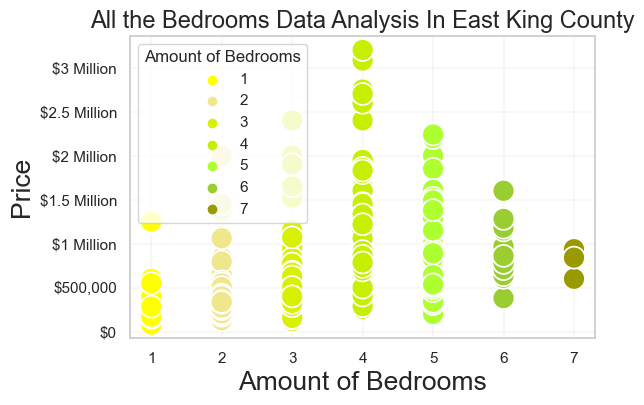

In [114]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.show()

<p style='font-weight:bold;'>There will be <span style="color:yellow">four models</span> that will be used to <span style="color:yellow">predict the sale of houses</span> based on the <span style="color:yellow">amount of bedrooms</span> each house has, from the <span style="color:yellow">'regression1'</span> dataaframe,  which are located in <span style="color:yellow">East King County</span>. The <span style="color:yellow">four predictive models</span> will then be combine using <span style="color:yellow">Weighted Averages</span> to creata a <span style="color:yellow">Meta Model</span> using a <span style="color:yellow">classification model</span> which is the <span style="color:yellow">mata-classifier</span>. The four predictive models that will be used are <span style="color:yellow">Poisson Regression, Bayesian Linear Regression, Quantile Regression(0.1, 0.5, 0.9) and Ridge Regression</span>. The <span style="color:yellow">meta-classifier</span> that will be used is <span style="color:yellow">Logistic Regression</span>. All five of these models will be combines to creata a Meta-model which will be the <span style="color:yellow">final prediction</span> of the <span style="color:yellow">price of houses</span> based on the <span style="color:yellow">amount of bedrooms</span> the house has.</p>

<h4 style='font-weight:bold;color:pink'>1. Logistic Regression Analysis</h4>
The <span style="color:pink">PoissenRegressor()</span> model will be used to <span style="color:pink">predict the prices</span> of the houses located in East King County based on the <span style="color:pink">amount of bedrooms</span> they have. Below the LogisticRegressor() model is called upon, then the X-axis and Y-axis is then trained using the model. The <span style="color:pink">X-axis</span> is the <span style="color:pink">amount of bedrooms</span> in each hosue and the <span style="color:pink">Y-axis</span> is the correspoding <span style="color:pink">price</span>. 

In [1076]:
model1 =  LogisticRegression(random_state=0)
model1.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

The <span style="color:pink">X-axis</span> which is the <span style="color:pink">amount of bedrooms</span> is computed to <span style="color:pink">predict the price</span> of each bedroom amount using the same model that fitted the <span style="color:pink">X-axis</span> (amount of bedrooms) and <span style="color:pink">Y-axis</span> (price of bedrooms). 

In [1077]:
x = regressiondata1[['Amount_of_Bedrooms']]
prediction1 = model1.predict(x)

The new dataframe called <span style="color:pink">'model_fit1'</span> is then created with <span style="color:pink">three coulnms</span>. The <span style="color:pink">first</span> colunm is <span style="color:pink">Amount_of_Bedrooms:</span> which is the <span style="color:pink">amount of bedrooms</span> each house has, the <span style="color:pink">second</span> column is <span style="color:pink">Price:</span> the <span style="color:pink">price</span> of each <span style="color:pink">bedroom</span> amount and the <span style="color:pink">third</span> column is <span style="color:pink">Preds:</span> the <span style="color:pink">predcitoons</span> made on the houses based on the amount of bedrooms they have using <span style="color:pink">Logistic Regression</span>.

In [1078]:
model_fit1 = regressiondata1
model_fit1['preds'] = prediction1

The new dataframe <span style="color:pink">'model_fit1'</span>.

In [1079]:
model_fit1 

,Amount_of_Bedrooms,Price,preds
0,3,510000.0,500000.0
1,3,400000.0,500000.0
2,3,395000.0,500000.0
3,3,580500.0,500000.0
4,3,488000.0,500000.0
...,...,...,...
2450,1,550000.0,325000.0
2451,1,283700.0,325000.0
2452,7,600000.0,675000.0
2453,7,936000.0,675000.0


Visualizing the <span style="color:pink">'model_fit1'</span> dataframe with a <span style="color:pink">scatter plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Poisson Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">350,000 to 650,000</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/1531724099.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$350,000','$400,000','$4500,000','$500,000','$550,000','$600,000','$650,000'])


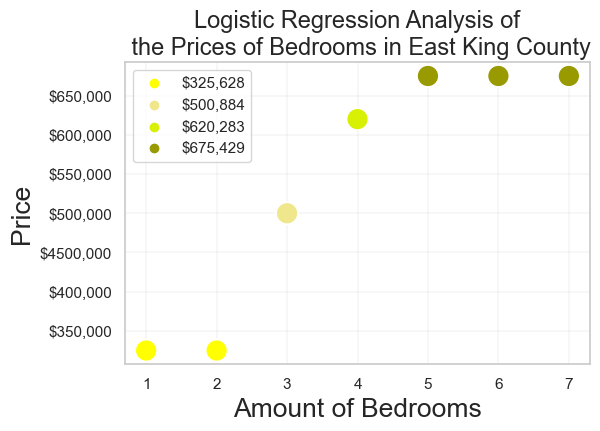

In [1080]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003','#999900',]# '#C6F003']#,'#ADFF2F',
          #'#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit1, x=x, y=y,s=250,hue='preds',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Logistic Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$325,628')
L.get_texts()[1].set_text('$500,884')
L.get_texts()[2].set_text('$620,283')
L.get_texts()[3].set_text('$675,429')


#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$350,000','$400,000','$4500,000','$500,000','$550,000','$600,000','$650,000'])
plt.show()

Visualizing the <span style="color:pink">'model_fit1'</span> dataframe with a <span style="color:pink">line plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Poisson Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">322,000 to 1.3 Million</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/661462410.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$350,000','$400,000','$4500,000','$500,000','$550,000','$600,000','$650,000'])


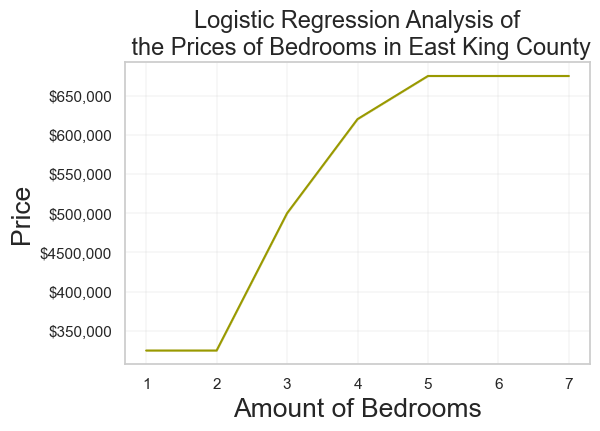

In [932]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit1, x=x, y=y,color='#999900')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Logistic Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$350,000','$400,000','$4500,000','$500,000','$550,000','$600,000','$650,000'])
plt.show()

This is the <span style="color:pink">MAPE</span> method which stands for <span style="color:pink">Mean Absolute Percentage Error</span>. This measures the <span style="color:pink">accuracy</span> of <span style="color:pink">predcitions</span> or <span style="color:pink">forcasting</span> methods. This method gives us the <span style="color:pink">average accucry</span> of each entry in the overall <span style="color:pink">Logistic Prediction</span> of the <span style="color:pink">prices</span> of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> each house has.

In [1003]:
print(mean_absolute_percentage_error(model_fit1['Price'],model_fit1['preds'])*100)

26.56319615247023


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Logistic Prediction in a <span style="color:pink">bar chart</span>.

In [934]:
i = 0
y= 0
x = []
while i <  73:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 27:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink"> Piosson Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">27%</span>.

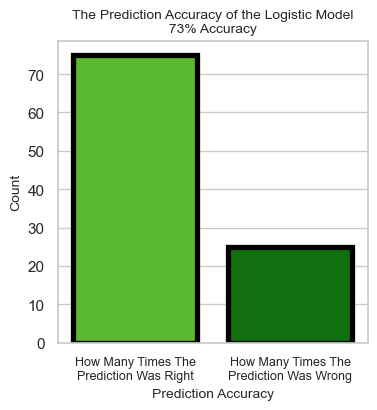

In [1241]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
sns.set_style("whitegrid",{"color":"black"})
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#52D017','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
plt.title('The Prediction Accuracy of the Logistic Model\n 73% Accuracy ',size=10)
plt.savefig('prediction_acur1.png', bbox_inches='tight')

<h4 style='font-weight:bold;color:pink'>2. Bayesian Linear Regression</h4>
The <span style="color:pink">BayesianRidge()</span> model will be used to <span style="color:pink">predict the prices</span> of the houses located in East King County based on the <span style="color:pink">amount of bedrooms</span> they have. Below the BayesianRidge() model is called upon, then the X-axis and Y-axis is then trained using the model. The <span style="color:pink">X-axis</span> is the <span style="color:pink">amount of bedrooms</span> in each hosue and the <span style="color:pink">Y-axis</span> is the correspoding <span style="color:pink">price</span>. 

In [1273]:
# Creating and training model
model2 = BayesianRidge()
model2.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']]) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

The <span style="color:pink">X-axis</span> which is the <span style="color:pink">amount of bedrooms</span> is computed to <span style="color:pink">predict the price</span> of each bedroom amount using the same model that fitted the <span style="color:pink">X-axis</span> (amount of bedrooms) and <span style="color:pink">Y-axis</span> (price of bedrooms). 

In [1274]:
# Model making a prediction on test data
prediction = model2.predict(regressiondata1[['Amount_of_Bedrooms']])

The new dataframe called <span style="color:pink">'model_fit2'</span> is then created with <span style="color:pink">three coulnms</span>. The <span style="color:pink">first</span> colunm is <span style="color:pink">Amount_of_Bedrooms:</span> which is the <span style="color:pink">amount of bedrooms</span> each house has, the <span style="color:pink">second</span> column is <span style="color:pink">Price:</span> the <span style="color:pink">price</span> of each <span style="color:pink">bedroom</span> amount and the <span style="color:pink">third</span> column is <span style="color:pink">Preds:</span> the <span style="color:pink">predcitoons</span> made on the houses based on the amount of bedrooms they have using <span style="color:pink">Bayesian Linear Regression</span>.

In [1275]:
model_fit2 = regressiondata1
model_fit2['preds'] = prediction

The new dataframe <span style="color:pink">'model_fit2'</span>.

In [1276]:
model_fit2

,Amount_of_Bedrooms,Price,preds
0,3,510000.0,5.272545e+05
1,3,400000.0,5.272545e+05
2,3,395000.0,5.272545e+05
3,3,580500.0,5.272545e+05
4,3,488000.0,5.272545e+05
...,...,...,...
2450,1,550000.0,2.302597e+05
2451,1,283700.0,2.302597e+05
2452,7,600000.0,1.121244e+06
2453,7,936000.0,1.121244e+06


Visualizing the <span style="color:pink">'model_fit2'</span> dataframe with a <span style="color:pink">scatter plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Bayesian Linear Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">230,000 to 1.1 Million</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_37052/3812539979.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

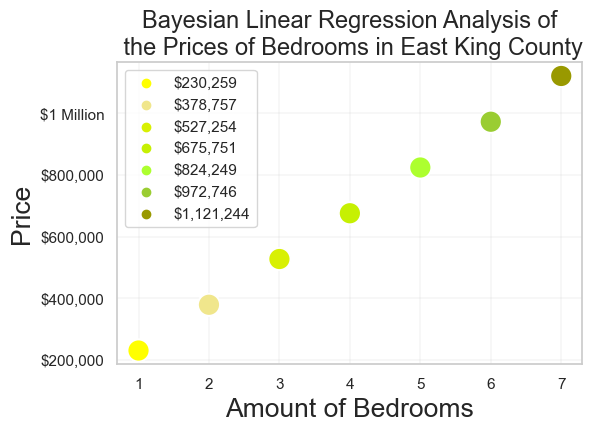

In [128]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit2, x=x, y=y,s=250,hue='preds',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$230,259')
L.get_texts()[1].set_text('$378,757')
L.get_texts()[2].set_text('$527,254')
L.get_texts()[3].set_text('$675,751')
L.get_texts()[4].set_text('$824,249')
L.get_texts()[5].set_text('$972,746')
L.get_texts()[6].set_text('$1,121,244')
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

Visualizing the <span style="color:pink">'model_fit2'</span> dataframe with a <span style="color:pink">line plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Bayesian Linear Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">230,000 to 1.1 Million</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_37052/3526471988.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

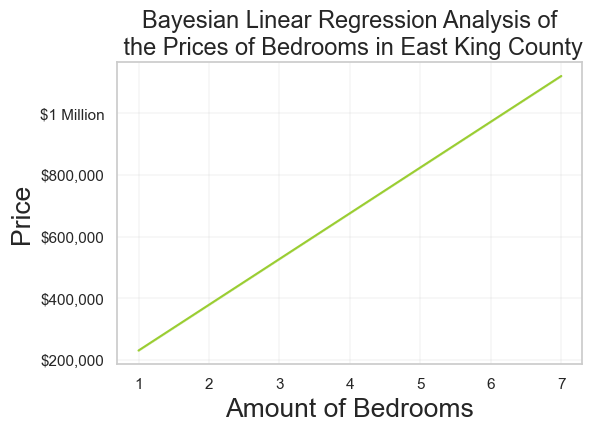

In [129]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit2, x=x, y=y,color='#9ACD32')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

This is the <span style="color:pink">MAPE</span> method which stands for <span style="color:pink">Mean Absolute Percentage Error</span>. This measures the <span style="color:pink">accuracy</span> of <span style="color:pink">predcitions</span> or <span style="color:pink">forcasting</span> methods. This method gives us the <span style="color:pink">average accucry</span> of each entry in the overall <span style="color:pink">Possion Prediction</span> of the <span style="color:pink">prices</span> of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> each house has.

In [996]:
print(mean_absolute_percentage_error(model_fit2['Price'],model_fit2['preds'])*100)

29.17032466248512


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Possion Prediction in a <span style="color:pink">bar chart</span>.

In [294]:
i = 0
y= 0
x = []
while i <  70:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 29.1:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink">  Bayesian Linear Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">29.1%</span>.

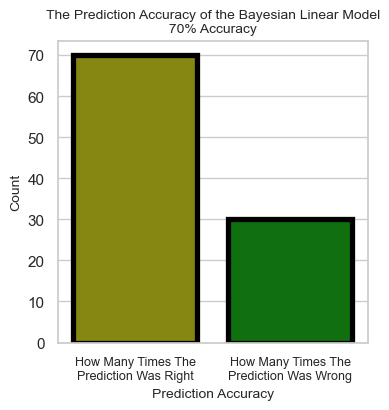

In [295]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#999900','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
plt.title('The Prediction Accuracy of the Bayesian Linear Model\n 70% Accuracy ',size=10)
plt.savefig('prediction_acur2.png', bbox_inches='tight')

<h4 style='font-weight:bold;color:pink'>3. Quantile Regression(.1,.5,.9)</h4>
The <span style="color:pink">QuantileRegressor(quantile=0.1), QuantileRegressor(quantile=0.5) and QuantileRegressor(quantile=0.9)</span> model will be used to <span style="color:pink">predict the prices</span> of the houses located in East King County based on the <span style="color:pink">amount of bedrooms</span> they have. Below the QuantileRegressor(quantile=0.1, alpha=0), QuantileRegressor(quantile=0.5, alpha=0) and QuantileRegressor(quantile=0.9, alpha=0) model is called upon, then the X-axis and Y-axis is then trained using the model. The <span style="color:pink">X-axis</span> is the <span style="color:pink">amount of bedrooms</span> in each hosue and the <span style="color:pink">Y-axis</span> is the correspoding <span style="color:pink">price</span>. 

In [1291]:
quantile = [0.05, 0.5, 0.95]
X = regressiondata1[['Amount_of_Bedrooms']]
y = regressiondata1[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

QuantileRegressor(alpha=0, quantile=0.9)

The <span style="color:pink">X-axis</span> which is the <span style="color:pink">amount of bedrooms</span> is computed to <span style="color:pink">predict the price</span> of each bedroom amount using the same model that fitted the <span style="color:pink">X-axis</span> (amount of bedrooms) and <span style="color:pink">Y-axis</span> (price of bedrooms). 

In [1292]:
y_pred_1 = qrf1.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_2 = qrf2.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_3 = qrf3.predict(regressiondata1[['Amount_of_Bedrooms']])

The new dataframe called <span style="color:pink">'Quantile_regression'</span> is then created with <span style="color:pink">five coulnms</span>. The <span style="color:pink">first</span> colunm is <span style="color:pink">Amount_of_Bedrooms:</span> which is the <span style="color:pink">amount of bedrooms</span> each house has, the <span style="color:pink">second</span> column is <span style="color:pink">0.1 Pred:</span> this is the prediction of the prices of each hosue based on the amount of bedrooms they have using the  <span style="color:pink">0.1 percentile in Quantile Regression</span>, the <span style="color:pink">third</span> column is <span style="color:pink">0.5 Pred:</span> tthis is the prediction of the prices of each hosue based on the amount of bedrooms they have using the  <span style="color:pink">0.5 percentile in Quantile Regressione</span>, the <span style="color:pink">fourth</span> column is <span style="color:pink">0.9 Pred:</span> this is the prediction of the prices of each hosue based on the amount of bedrooms they have using the  <span style="color:pink">0.9 percentile in Quantile Regression</span>, the <span style="color:pink">fivith</span> column is <span style="color:pink">Price:</span> the <span style="color:pink">price</span> of each <span style="color:pink">bedroom</span> amount based on the amount of bedrooms they have.

In [1293]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': regressiondata1['Amount_of_Bedrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata1['Price']})

The new dataframe <span style="color:pink">'Quantile_regression'</span>.

In [1294]:
Quantile_regression

,Amount_of_Bedrooms,0.1 Pred,0.5 Pred,0.9 Pred,Price
0,3,324004.486415,4.915138e+05,7.400030e+05,510000.0
1,3,324004.486415,4.915138e+05,7.400030e+05,400000.0
2,3,324004.486415,4.915138e+05,7.400030e+05,395000.0
3,3,324004.486415,4.915138e+05,7.400030e+05,580500.0
4,3,324004.486415,4.915138e+05,7.400030e+05,488000.0
...,...,...,...,...,...
2450,1,121996.855438,1.855469e+05,3.799934e+05,550000.0
2451,1,121996.855438,1.855469e+05,3.799934e+05,283700.0
2452,7,728019.748369,1.103448e+06,1.460022e+06,600000.0
2453,7,728019.748369,1.103448e+06,1.460022e+06,936000.0


Creating the <span style="color:pink">'Quantileregression_updated'</span> dataframe by getting the singel <span style="color:pink">0.1 predictions, 0.5 predictions and 0.9 predictions</span> of bedrooms from <span style="color:pink">1 to 7</span>. This dataframe is cretaed to cretae a <span style="color:pink">melted version</span> of this in order to plot it in a <span style="color:pink">scatter plot and line plot</span>. 

In [1025]:
Quantileregression_updated= Quantile_regression.loc[[2433,2079,0,1095,2220,2418,2452]]
Quantileregression_updated = Quantileregression_updated.drop('Price', axis=1)
Quantileregression_updated

,Amount_of_Bedrooms,0.1 Pred,0.5 Pred,0.9 Pred
2433,1,121996.855438,1.855469e+05,3.799934e+05
2079,2,223000.670927,3.385304e+05,5.599982e+05
0,3,324004.486415,4.915138e+05,7.400030e+05
1095,4,425008.301903,6.444973e+05,9.200078e+05
2220,5,526012.117392,7.974807e+05,1.100013e+06
2418,6,627015.932880,9.504642e+05,1.280017e+06
2452,7,728019.748369,1.103448e+06,1.460022e+06


Creating the <span style="color:pink">'melted_data'</span> dataframe by melting the <span style="color:pink">'Quantileregression_updated'</span> to plot the prediction of <span style="color:pink">Quantile Regression(0.1, 0.5, 0.9)</span> to a <span style="color:pink">scatter</span> and <span style="color:pink">line</span> lot.

In [1021]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bedrooms,Percentile,value
0,1,0.1 Pred,1.219969e+05
1,2,0.1 Pred,2.230007e+05
2,3,0.1 Pred,3.240045e+05
3,4,0.1 Pred,4.250083e+05
4,5,0.1 Pred,5.260121e+05
5,6,0.1 Pred,6.270159e+05
6,7,0.1 Pred,7.280197e+05
7,1,0.5 Pred,1.855469e+05
8,2,0.5 Pred,3.385304e+05
9,3,0.5 Pred,4.915138e+05


Visualizing the <span style="color:pink">'melted_data'</span> dataframe with a <span style="color:pink">scatter plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Bayesian Linear Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">200,000 to 1.4 Million</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/2041207776.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

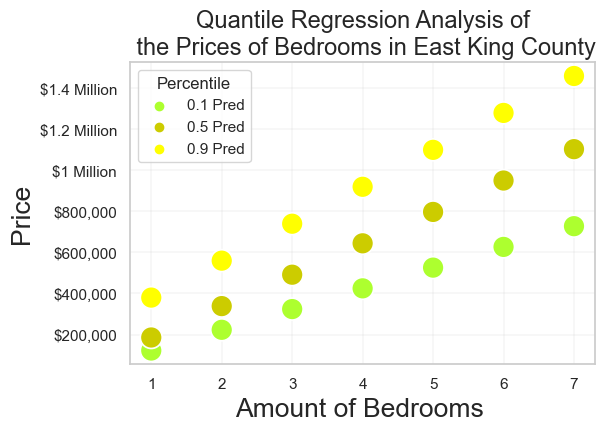

In [1022]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

Visualizing the <span style="color:pink">'melted_data'</span> dataframe with a <span style="color:pink">line plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Bayesian Linear Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">200,000 to 1.4 Million</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_37052/1759080761.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

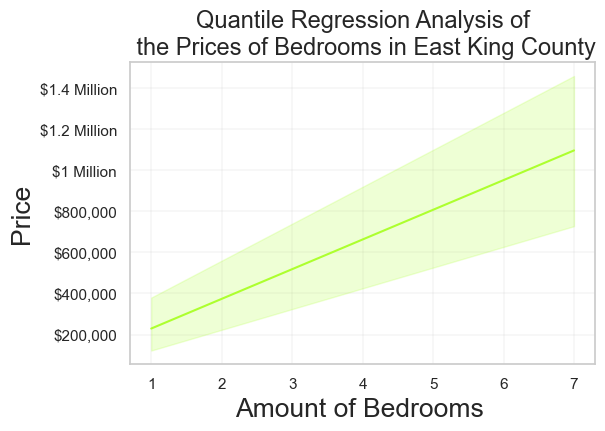

In [140]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.lineplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',color="#ADFF2F")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

This is the <span style="color:pink">MAPE</span> method which stands for <span style="color:pink">Mean Absolute Percentage Error</span>. This measures the <span style="color:pink">accuracy</span> of <span style="color:pink">predcitions</span> or <span style="color:pink">forcasting</span> methods. This method gives us the <span style="color:pink">average accucry</span> of each entry in the overall <span style="color:pink">Quantile Regression(0.1, 0.5, 0.9)</span> of the <span style="color:pink">prices</span> of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> each house has.

Using the <span style="color:pink">MAPE</span> method on the <span style="color:pink">Quantile Regression(0.1)</span>.

In [141]:
print(mean_absolute_percentage_error(Quantile_regression['Price'] 
                                     , Quantile_regression['0.1 Pred'])*100)

34.31975243749177


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Quantile Prediction in a <span style="color:pink">bar chart</span>.

In [941]:
i = 0
y= 0
x = []
while i <  66:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y <34:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink">  Quantile (0.1) Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">34%</span>.

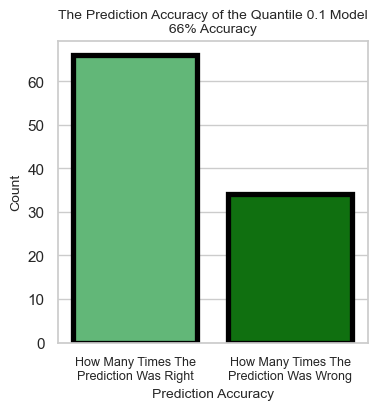

In [942]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#54C571','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 66% Accuracy ',size=10)
plt.savefig('prediction_acur3.png', bbox_inches='tight')

Using the <span style="color:pink">MAPE</span> method on the <span style="color:pink">Quantile Regression(0.5)</span>.

In [144]:
print(mean_absolute_percentage_error(Quantile_regression['Price'] 
                                     , Quantile_regression['0.5 Pred'])*100)

26.884746111478336


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Quantile Prediction in a <span style="color:pink">bar chart</span>.

In [490]:
i = 0
y= 0
x = []
while i <  73:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 27:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink">  Quantile (0.5) Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">26.8%</span>.

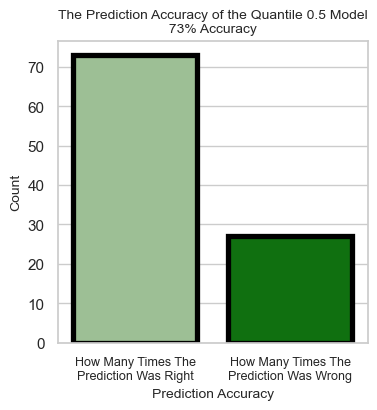

In [939]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#99C68E','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 73% Accuracy ',size=10)
plt.savefig('prediction_acur4.png', bbox_inches='tight')

Using the <span style="color:pink">MAPE</span> method on the <span style="color:pink">Quantile Regression(0.9)</span>.

In [147]:
print(mean_absolute_percentage_error(Quantile_regression['Price'] 
                                     , Quantile_regression['0.9 Pred'])*100)

60.6908318121118


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Quantile Prediction in a <span style="color:pink">bar chart</span>.

In [940]:
i = 0
y= 0
x = []
while i <  40:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 60:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink">  Quantile (0.9) Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">60.6%</span>.

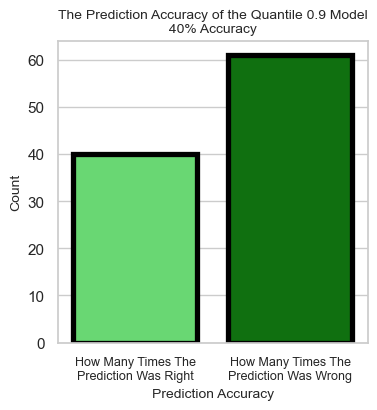

In [289]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#57E964','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 40% Accuracy ',size=10)
plt.savefig('prediction_acur5.png', bbox_inches='tight')

<h4 style='font-weight:bold;color:pink'>4. Neural Networks Analysis</h4>
The <span style="color:pink">MLPClassifier()</span> model will be used to <span style="color:pink">predict the prices</span> of the houses located in East King County based on the <span style="color:pink">amount of bedrooms</span> they have. Below the Ridge() model is called upon, then the X-axis and Y-axis is then trained using the model. The <span style="color:pink">X-axis</span> is the <span style="color:pink">amount of bedrooms</span> in each hosue and the <span style="color:pink">Y-axis</span> is the correspoding <span style="color:pink">price</span>. 

In [1215]:
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model4.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

The <span style="color:pink">X-axis</span> which is the <span style="color:pink">amount of bedrooms</span> is computed to <span style="color:pink">predict the price</span> of each bedroom amount using the same model that fitted the <span style="color:pink">X-axis</span> (amount of bedrooms) and <span style="color:pink">Y-axis</span> (price of bedrooms). 

In [1216]:
preds_4 = model4.predict(regressiondata1[['Amount_of_Bedrooms']])

The new dataframe called <span style="color:pink">'model_fit4'</span> is then created with <span style="color:pink">three coulnms</span>. The <span style="color:pink">first</span> colunm is <span style="color:pink">Amount_of_Bedrooms:</span> which is the <span style="color:pink">amount of bedrooms</span> each house has, the <span style="color:pink">second</span> column is <span style="color:pink">Price:</span> the <span style="color:pink">price</span> of each <span style="color:pink">bedroom</span> amount and the <span style="color:pink">third</span> column is <span style="color:pink">Preds:</span> the <span style="color:pink">predcitoons</span> made on the houses based on the amount of bedrooms they have using <span style="color:pink">Neural Networks Regression</span>.

In [1217]:
model_fit4 = regressiondata1
model_fit4['preds'] = preds_4

The new dataframe <span style="color:pink">'model_fit4'</span>.

In [1218]:
model_fit4

,Amount_of_Bedrooms,Price,preds
0,3,510000.0,325000.0
1,3,400000.0,325000.0
2,3,395000.0,325000.0
3,3,580500.0,325000.0
4,3,488000.0,325000.0
...,...,...,...
2450,1,550000.0,305000.0
2451,1,283700.0,305000.0
2452,7,600000.0,675000.0
2453,7,936000.0,675000.0


Visualizing the <span style="color:pink">'model_fit4'</span> dataframe with a <span style="color:pink">scatter plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Ridge Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">325,000 to 675,000</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/2724040750.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$350,000','$400,000','$450,000','$500,000','$550,000','$600,000',


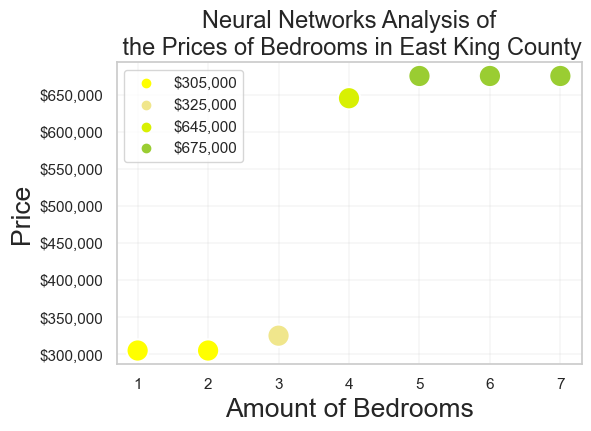

In [1220]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#9ACD32' ]#'#C6F003']#,'#ADFF2F',
          #'#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Neural Networks Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$305,000')
L.get_texts()[1].set_text('$325,000')
L.get_texts()[2].set_text('$645,000')
L.get_texts()[3].set_text('$675,000')
ax.set_yticklabels(['0','$300,000','$350,000','$400,000','$450,000','$500,000','$550,000','$600,000',
                     '$650,000'])
plt.show()

Visualizing the <span style="color:pink">'model_fit4'</span> dataframe with a <span style="color:pink">line plot</span> with the <span style="color:pink">X-axis</span> as amount of <span style="color:pink">bedrooms</span> and <span style="color:pink">Y-axis</span> as the <span style="color:pink">predicted prices</span> of the bedrooms using the Ridge Regression. The type of data the <span style="color:pink">X-axis</span> is, is <span style="color:pink">count data or discrete data</span> and the type of data the <span style="color:pink">Y-axis</span> is, is <span style="color:pink">continues data</span>. The <span style="color:pink">X-axis</span> geos from <span style="color:pink">1 to 7 bedrooms</span> and the <span style="color:pink">Y-axis</span> whcih is the predicted prices goes from <span style="color:pink">325,000 to 675,000</span>.

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/3229540532.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$350,000','$400,000','$450,000','$500,000','$550,000','$600,000',


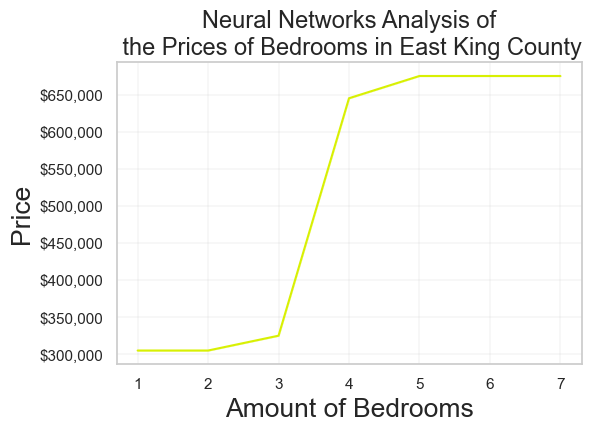

In [960]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Neural Networks Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$350,000','$400,000','$450,000','$500,000','$550,000','$600,000',
                     '$650,000'])
plt.show()

This is the <span style="color:pink">MAPE</span> method which stands for <span style="color:pink">Mean Absolute Percentage Error</span>. This measures the <span style="color:pink">accuracy</span> of <span style="color:pink">predcitions</span> or <span style="color:pink">forcasting</span> methods. This method gives us the <span style="color:pink">average accucry</span> of each entry in the overall <span style="color:pink">Neural Networks Prediction</span> of the <span style="color:pink">prices</span> of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> each house has.

In [995]:
print(mean_absolute_percentage_error(model_fit4['Price'],model_fit4['preds'])*100)

28.65735254500641


Creating a <span style="color:pink">dataframe</span> to plot the <span style="color:pink">accuracy</span> of the Possion Prediction in a <span style="color:pink">bar chart</span>.

In [962]:
i = 0
y= 0
x = []
while i <  72:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 28:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:pink">'df1'</span> which shows how <span style="color:pink">accucrate</span> the <span style="color:pink">  Neural Networks Prediction</span> on the prices of houses located in <span style="color:pink">East King County</span> based on the amount of <span style="color:pink">bedrooms</span> they had. The <span style="color:pink">MAPE</span> is <span style="color:pink">28%</span>.

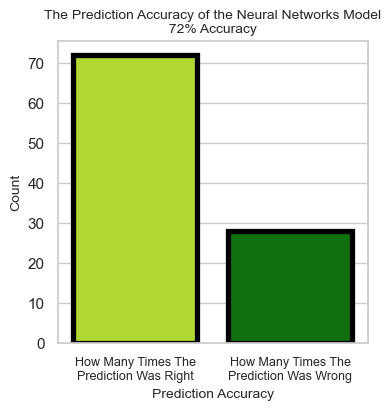

In [963]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#BDF516','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
ax.set_title('The Prediction Accuracy of the Neural Networks Model\n 72% Accuracy ',size=10)
plt.savefig('prediction_acur6.png', bbox_inches='tight')

The <span style="color:pink">'models_predictions'</span> is a dataframe of all the <span style="color:pink">6</span> models <span style="color:pink">('Poisson Regression', 'Bayesian Linear Regression', 'Quantile Regression 0.1', 'Quantile Regression 0.5', 'Quantile Regression 0.9', 'Ridge Regression')</span>  that were used to <span style="color:pink">predict the price</span> of each house based on the number of <span style="color:pink">bedrooms</span> they had, these houses are located in <span style="color:pink">East King County</span>. Each hosue has between <span style="color:pink">1-7 bedrooms</span> and the price range in the overall data was between <span style="color:pink">80,000 to 3.2 million</span>. 

In [974]:
openn = []
count = 0
while count < 8 :
    for x,i in enumerate(regressiondata1['Amount_of_Bedrooms']):
         if i == count:
            openn.append((x,i))
    count+=1

In [975]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [976]:
openn2 = []
for i in openn:openn2.append(i[1])

In [977]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [978]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [1004]:
log_var = model_fit1.iloc[final_indexx]
log_var = log_var.drop('Price', axis=1)
log_var[log_var.columns[1]] = ['${:,.0f}'.format(i) for i in log_var.preds]
log_var

,Amount_of_Bedrooms,preds
2433,1,"$325,000"
2079,2,"$325,000"
0,3,"$500,000"
1095,4,"$620,000"
2220,5,"$675,000"
2418,6,"$675,000"
2452,7,"$675,000"


In [981]:
bay_var = model_fit2.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

,Amount_of_Bedrooms,preds
2433,1,"$230,260"
2079,2,"$378,757"
0,3,"$527,254"
1095,4,"$675,752"
2220,5,"$824,249"
2418,6,"$972,747"
2452,7,"$1,121,244"


In [990]:
neural_var = model_fit4.iloc[final_indexx]
neural_var = neural_var.drop('Price', axis=1)
neural_var[neural_var.columns[1]] = ['${:,.0f}'.format(i) for i in neural_var.preds]
neural_var

,Amount_of_Bedrooms,preds
2433,1,"$305,000"
2079,2,"$305,000"
0,3,"$325,000"
1095,4,"$645,000"
2220,5,"$675,000"
2418,6,"$675,000"
2452,7,"$675,000"


In [1026]:
Quantileregression_updated[Quantileregression_updated.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated['0.1 Pred']]
Quantileregression_updated[Quantileregression_updated.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated['0.5 Pred']]
Quantileregression_updated[Quantileregression_updated.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated['0.9 Pred']]
Quantileregression_updated

,Amount_of_Bedrooms,0.1 Pred,0.5 Pred,0.9 Pred
2433,1,"$121,997","$185,547","$379,993"
2079,2,"$223,001","$338,530","$559,998"
0,3,"$324,004","$491,514","$740,003"
1095,4,"$425,008","$644,497","$920,008"
2220,5,"$526,012","$797,481","$1,100,013"
2418,6,"$627,016","$950,464","$1,280,017"
2452,7,"$728,020","$1,103,448","$1,460,022"


In [1014]:
bedroom_amount = [1,2,3,4,5,6,7]

In [1027]:
for x,i in enumerate(final_indexx):
    print('"',bedroom_amount[x],'Bedroom','":["',log_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated['0.5 Pred'][i],'"',',',
          '"',neural_var.preds[i],'"','],')

" 1 Bedroom ":[" $325,000 " , " $230,260 " , " $121,997 " , " $185,547 " , " $305,000 " ],
" 2 Bedroom ":[" $325,000 " , " $378,757 " , " $223,001 " , " $338,530 " , " $305,000 " ],
" 3 Bedroom ":[" $500,000 " , " $527,254 " , " $324,004 " , " $491,514 " , " $325,000 " ],
" 4 Bedroom ":[" $620,000 " , " $675,752 " , " $425,008 " , " $644,497 " , " $645,000 " ],
" 5 Bedroom ":[" $675,000 " , " $824,249 " , " $526,012 " , " $797,481 " , " $675,000 " ],
" 6 Bedroom ":[" $675,000 " , " $972,747 " , " $627,016 " , " $950,464 " , " $675,000 " ],
" 7 Bedroom ":[" $675,000 " , " $1,121,244 " , " $728,020 " , " $1,103,448 " , " $675,000 " ],


In [1666]:
# Creating the DataFrame
models_predictions = pd.DataFrame({" 1 Bedroom ":[" $325,000 " ,"","","", " $230,260 " ,"","","", " $121,997 " ,"","","", " $185,547 " ,"","","", " $305,000 " ],
" 2 Bedrooms ":[" $325,000 " ,"","","", " $378,757 " ,"","","", " $223,001 " ,"","","", " $338,530 " ,"","","", " $305,000 " ],
" 3 Bedrooms ":[" $500,000 " ,"","","", " $527,254 " , "","",""," $324,004 " ,"","","", " $491,514 " ,"","","", " $325,000 " ],
" 4 Bedrooms ":[" $620,000 " ,"","","", " $675,752 " , "","",""," $425,008 " ,"","","", " $644,497 " ,"","","", " $645,000 " ],
" 5 Bedrooms ":[" $675,000 " ,"","","", " $824,249 " , "","",""," $526,012 " ,"","","", " $797,481 " ,"","","", " $675,000 " ],
" 6 Bedrooms ":[" $675,000 " ,"","","", " $972,747 " , "","",""," $627,016 " ,"","","", " $950,464 " ,"","","", " $675,000 " ],
" 7 Bedrooms ":[" $675,000 " ,"","","", " $1,121,244 ", "","","", " $728,020 " ,"","","", " $1,103,448 " ,"","","", " $675,000 " ],
                  }) 
  
# Create the index
index_ = ['Logistic Regression',"","","", 'Bayesian Linear Regression',"","","",'Quantile Regression 0.1',"","","",
          'Quantile Regression 0.5',"","","", 'Neural Networks']
  
# Set the index
models_predictions.index = index_

The <span style="color:pink">'models_predictions'</span> dataframe.

In [1604]:
models_predictions

,1 Bedroom,2 Bedrooms,3 Bedrooms,4 Bedrooms,5 Bedrooms,6 Bedrooms,7 Bedrooms
Logistic Regression,"$325,000","$325,000","$500,000","$620,000","$675,000","$675,000","$675,000"
,,,,,,,
,,,,,,,
,,,,,,,
Bayesian Linear Regression,"$230,260","$378,757","$527,254","$675,752","$824,249","$972,747","$1,121,244"
,,,,,,,
,,,,,,,
,,,,,,,
Quantile Regression 0.1,"$121,997","$223,001","$324,004","$425,008","$526,012","$627,016","$728,020"
,,,,,,,


<h4 style='font-weight:bold;color:#FFD700'>Final Prediction: Meta-Model (stacking)</h4>

After using all <span style="color:#FFD700">6 models</span> to predict the prices of the houses in <span style="color:#FFD700">East King County</span> based on the <span style="color:#FFD700">amount of bedrooms</span> they had, all <span style="color:#FFD700">6</span> of the <span style="color:#FFD700">models predictions</span> will be combined to cretae a <span style="color:#FFD700">Meta Mosel</span> using <span style="color:#FFD700">stacking and weughted avergaes</span> to get the <span style="color:#FFD700">final prediction</span>.


The <span style="color:#FFD700">'StackingClassifier()'</span> model will be used to predict the <span style="color:#FFD700">final prediction</span> of the <span style="color:#FFD700">prices</span> of the houses located in <span style="color:#FFD700">East King County</span> based on the amount of <span style="color:#FFD700">bedrooms</span> they have. It will do so by comning all <span style="color:#FFD700">6 models</span> and a <span style="color:#FFD700">mata-classifier</span> called <span style="color:#FFD700">'LogisticRegression()'</span>.

Below the <span style="color:#FFD700">'StackingClassifier()'</span> model is called upon with the <span style="color:#FFD700">meta-classifier 'LogisticRegression()'</span>. The <span style="color:#FFD700">StackingClassifier()</span> has all the models with the the <span style="color:#FFD700">mata-classiefier</span> to crete a <span style="color:#FFD700">Meta-Model</span> which will be used to make the <span style="color:#FFD700">finasl prediction</span> of the price of houses in <span style="color:#FFD700">East King County</span> based on the amount of <span style="color:#FFD700">bedrooms</span> they have .

The <span style="color:#FFD700">X-axis</span> and <span style="color:#FFD700">Y-axis</span> is then trained using the <span style="color:#FFD700">StackingClassifier() Meta-Model</span> of all the other <span style="color:#FFD700">6 models</span> combined. The <span style="color:#FFD700">X-axis</span> is the <span style="color:#FFD700">amount of bedrooms</span> in each hosue and the <span style="color:#FFD700">Y-axis</span> is the correspoding <span style="color:#FFD700">price</span>. 

The <span style="color:#FFD700">X-axis</span> which is the <span style="color:#FFD700">amount of bedrooms</span> is computed to <span style="color:#FFD700">predict the price</span> of each bedroom amount using the same model that fitted the <span style="color:#FFD700">X-axis</span> (amount of bedrooms) and <span style="color:#FFD700">Y-axis</span> (price of bedrooms). 

The new dataframe called <span style="color:#FFD700">'model_fit5'</span> is then created with <span style="color:#FFD700">three coulnms</span>. The <span style="color:#FFD700">first</span> colunm is <span style="color:#FFD700">Amount_of_Bedrooms:</span> which is the <span style="color:#FFD700">amount of bedrooms</span> each house has, the <span style="color:#FFD700">second</span> column is <span style="color:#FFD700">Price:</span> the <span style="color:#FFD700">price</span> of each <span style="color:#FFD700">bedroom</span> amount and the <span style="color:#FFD700">third</span> column is <span style="color:#FFD700">Preds:</span> the <span style="color:#FFD700">predcitoons</span> made on the houses based on the amount of bedrooms they have using the <span style="color:#FFD700">Meta-Model</span> which consist of all models combined.

In [1221]:
preds1 = [prediction1, list(model_fit2.preds)
    , preds_4,list(Quantile_regression.iloc[0:,1]),list(Quantile_regression.iloc[0:,2]) ]

In [1222]:
all_preds = np.array(preds1)

In [1223]:
all_preds

array([[ 500000.        ,  500000.        ,  500000.        , ...,
         675000.        ,  675000.        ,  675000.        ],
       [ 527254.49673467,  527254.49673467,  527254.49673467, ...,
        1121244.02142903, 1121244.02142903, 1121244.02142903],
       [ 325000.        ,  325000.        ,  325000.        , ...,
         675000.        ,  675000.        ,  675000.        ],
       [ 324004.48641496,  324004.48641496,  324004.48641496, ...,
         728019.74836855,  728019.74836855,  728019.74836855],
       [ 491513.81579629,  491513.81579629,  491513.81579629, ...,
        1103447.60090117, 1103447.60090117, 1103447.60090117]])

In [1224]:
summed = np.average(all_preds, axis=0)

In [1249]:
summed

array([433554.55978918, 433554.55978918, 433554.55978918, ...,
       860542.27413975, 860542.27413975, 860542.27413975])

In [1226]:
model_fit5 = regressiondata1
model_fit5['preds'] = summed

The new dataframe <span style="color:#FFD700">'model_fit5'</span>.

In [1091]:
model_fit5

,Amount_of_Bedrooms,Price,preds
0,3,510000.0,433554.559789
1,3,400000.0,433554.559789
2,3,395000.0,433554.559789
3,3,580500.0,433554.559789
4,3,488000.0,433554.559789
...,...,...,...
2450,1,550000.0,233560.702614
2451,1,283700.0,233560.702614
2452,7,600000.0,860542.274140
2453,7,936000.0,860542.274140


Visualizing the <span style="color:#FFD700">'model_fit5'</span> dataframe with a <span style="color:#FFD700">scatter plot</span> with the <span style="color:#FFD700">X-axis</span> as amount of <span style="color:#FFD700">bedrooms</span> and <span style="color:#FFD700">Y-axis</span> as the <span style="color:#FFD700">predicted prices</span> of the bedrooms using the Meta-Model. The type of data the <span style="color:#FFD700">X-axis</span> is, is <span style="color:#FFD700">count data or discrete data</span> and the type of data the <span style="color:#FFD700">Y-axis</span> is, is <span style="color:#FFD700">continues data</span>. The <span style="color:#FFD700">X-axis</span> geos from <span style="color:#FFD700">1 to 7 bedrooms</span> and the <span style="color:#FFD700">Y-axis</span> whcih is the predicted prices goes from <span style="color:#FFD700">170,000 to 1.3 Million</span>.

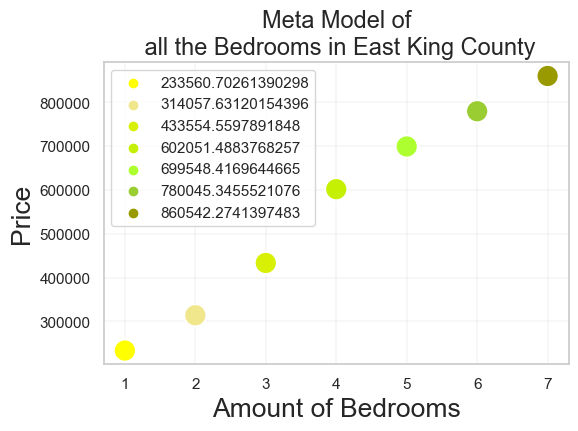

In [1092]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#999900','#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit5, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

#plt.gcf().set_size_inches((10,10))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

Visualizing the <span style="color:#FFD700">'model_fit5'</span> dataframe with a <span style="color:#FFD700">line plot</span> with the <span style="color:#FFD700">X-axis</span> as amount of <span style="color:#FFD700">bedrooms</span> and <span style="color:#FFD700">Y-axis</span> as the <span style="color:#FFD700">predicted prices</span> of the bedrooms using the Meta-Model. The type of data the <span style="color:#FFD700">X-axis</span> is, is <span style="color:#FFD700">count data or discrete data</span> and the type of data the <span style="color:#FFD700">Y-axis</span> is, is <span style="color:#FFD700">continues data</span>. The <span style="color:#FFD700">X-axis</span> geos from <span style="color:#FFD700">1 to 7 bedrooms</span> and the <span style="color:#FFD700">Y-axis</span> whcih is the predicted prices goes from <span style="color:#FFD700">170,000 to 1.3 Million</span>.

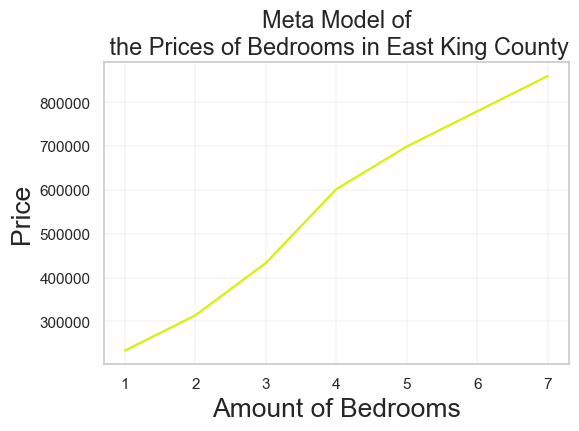

In [1094]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)

#plt.gcf().set_size_inches((10,10))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

This is the <span style="color:#FFD700">MAPE</span> method which stands for <span style="color:#FFD700">Mean Absolute Percentage Error</span>. This measures the <span style="color:#FFD700">accuracy</span> of <span style="color:#FFD700">predcitions</span> or <span style="color:#FFD700">forcasting</span> methods. This method gives us the <span style="color:#FFD700">average accucry</span> of each entry in the overall <span style="color:#FFD700">Meta-Model Prediction</span> of the <span style="color:#FFD700">prices</span> of houses located in <span style="color:#FFD700">East King County</span> based on the amount of <span style="color:#FFD700">bedrooms</span> each house has.

In [1227]:
print(mean_absolute_percentage_error(regressiondata1['Price'],summed)*100)

25.30458720971989


Creating a <span style="color:#FFD700">dataframe</span> to plot the <span style="color:#FFD700">accuracy</span> of the Possion Prediction in a <span style="color:#FFD700">bar chart</span>.

In [1096]:
i = 0
y= 0
x = []
while i <  75:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 25:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Plotting the dataframe <span style="color:#FFD700">'df1'</span> which shows how <span style="color:#FFD700">accucrate</span> the <span style="color:#FFD700">  Ridge Prediction</span> on the prices of houses located in <span style="color:#FFD700">East King County</span> based on the amount of <span style="color:#FFD700">bedrooms</span> they had. The <span style="color:#FFD700">MAPE</span> is <span style="color:#FFD700">25%</span>.

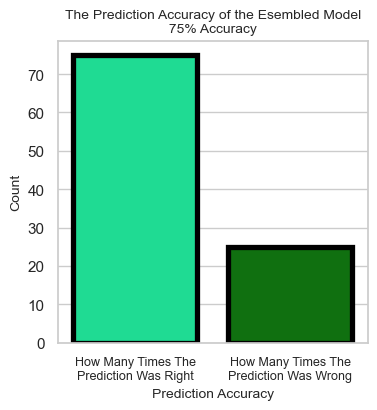

In [1097]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=3.8,edgecolor = ['black','black'],
                   palette=['#00FA9A','green'])

plt.gcf().set_size_inches((4,4))
wrap_labels(x,21)
plt.xticks(fontsize = 9)
plt.xlabel('Prediction Accuracy', fontsize='10')
plt.ylabel('Count', fontsize='10')
ax.set_title('The Prediction Accuracy of the Esembled Model\n 75% Accuracy ',size=10)
plt.savefig('prediction_acur7.png', bbox_inches='tight')

Creating a new dtaframe called 'Meta_midel1' to show the previous predictions from all the other predictions by getting it from 'models_predictions and adding the new preditions from the Meta-Model.

In [1667]:
meta_model1 = models_predictions

The new predtictions from Meta-model are added to the 'meta_model1' datframe

In [1668]:
meta_model1.loc[len(meta_model1.index)] = ["","","","","","",""]
meta_model1 = meta_model1.rename(index={17: ''})

meta_model1.loc[len(meta_model1.index)] = ["","","","","","",""]
meta_model1 = meta_model1.rename(index={18: ''})

meta_model1.loc[len(meta_model1.index)] = ['$233,560', '$314,057', '$433,554', '$602,051', '$699,548',
                                           '$780,045', '$860,542']
meta_model1 = meta_model1.rename(index={19: 'Final Prediction'})

The <span style="color:pink">'meta_model1'</span> dataframe.

In [1625]:
meta_model1

,1 Bedroom,2 Bedrooms,3 Bedrooms,4 Bedrooms,5 Bedrooms,6 Bedrooms,7 Bedrooms
Logistic Regression,"$325,000","$325,000","$500,000","$620,000","$675,000","$675,000","$675,000"
,,,,,,,
,,,,,,,
,,,,,,,
Bayesian Linear Regression,"$230,260","$378,757","$527,254","$675,752","$824,249","$972,747","$1,121,244"
,,,,,,,
,,,,,,,
,,,,,,,
Quantile Regression 0.1,"$121,997","$223,001","$324,004","$425,008","$526,012","$627,016","$728,020"
,,,,,,,


Using the .transpose() method to switch the colunms and index, to be able to melt the data and plot the data to a box plot of each model preductions.

In [1295]:
box_df = pd.DataFrame({"Logistic Regression":prediction1, "Bayesian Linear Regression":prediction, 
                       "Quantile Regression 0.1":Quantile_regression['0.1 Pred'], 
                       "Quantile Regression 0.5":Quantile_regression['0.5 Pred'], 
                       "Neural Networks":preds_4, "Final Prediction":summed, 
                       "Actual Price":regressiondata1['Price']})

In [1296]:
box_df

,Logistic Regression,Bayesian Linear Regression,Quantile Regression 0.1,Quantile Regression 0.5,Neural Networks,Final Prediction,Actual Price
0,500000.0,5.272545e+05,324004.486415,4.915138e+05,325000.0,433554.559789,510000.0
1,500000.0,5.272545e+05,324004.486415,4.915138e+05,325000.0,433554.559789,400000.0
2,500000.0,5.272545e+05,324004.486415,4.915138e+05,325000.0,433554.559789,395000.0
3,500000.0,5.272545e+05,324004.486415,4.915138e+05,325000.0,433554.559789,580500.0
4,500000.0,5.272545e+05,324004.486415,4.915138e+05,325000.0,433554.559789,488000.0
...,...,...,...,...,...,...,...
2450,325000.0,2.302597e+05,121996.855438,1.855469e+05,305000.0,233560.702614,550000.0
2451,325000.0,2.302597e+05,121996.855438,1.855469e+05,305000.0,233560.702614,283700.0
2452,675000.0,1.121244e+06,728019.748369,1.103448e+06,675000.0,860542.274140,600000.0
2453,675000.0,1.121244e+06,728019.748369,1.103448e+06,675000.0,860542.274140,936000.0


Melting the 'box_df' dataframe to be able to plot it inot a box plot

In [1301]:
melted_data1 = pd.melt(box_df, value_vars =  ['Logistic Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Neural Networks', 'Final Prediction', 'Actual Price'])
melted_data1 = melted_data1.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

Changing the string of the values in the 'Prediction' column to integer in the 'melted_dat1' dtaframe

In [1302]:
melted_data1[melted_data1.columns[1:]] = melted_data1[melted_data1.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

The 'Melted_data1' dataframe.

In [1303]:
melted_data1

,Prediction Model,Prediction
0,Logistic Regression,500000.0
1,Logistic Regression,500000.0
2,Logistic Regression,500000.0
3,Logistic Regression,500000.0
4,Logistic Regression,500000.0
...,...,...
17180,Actual Price,550000.0
17181,Actual Price,283700.0
17182,Actual Price,600000.0
17183,Actual Price,936000.0


Plotting the box chart of all the the 6 models including the mata-model

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/3036047.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(ylabels)


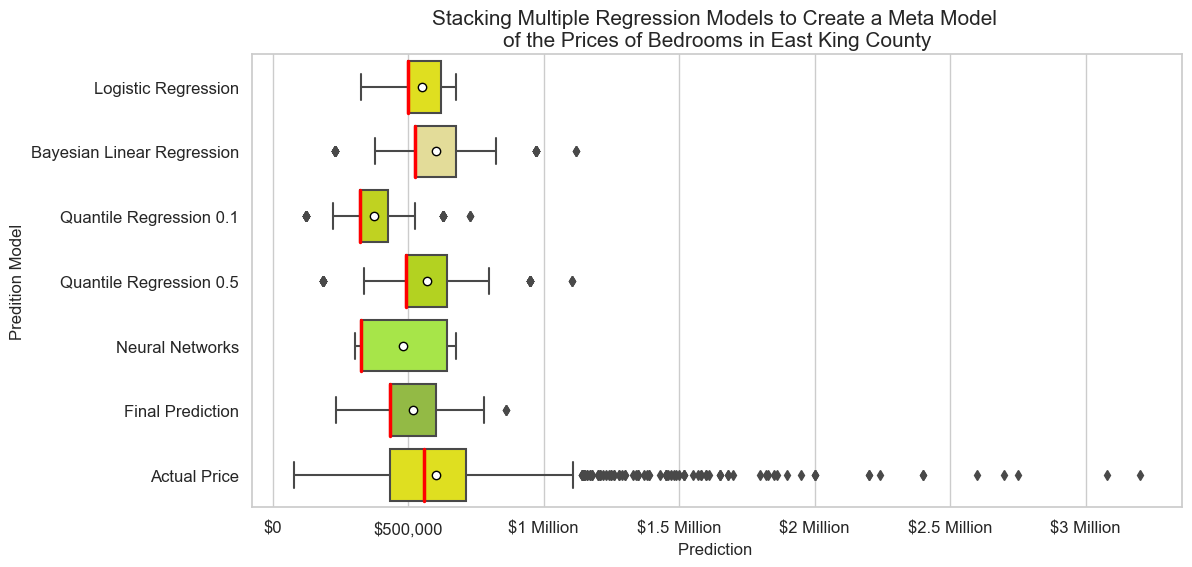

In [1370]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32']#,'#999900']#,'#808000','#666600','#333300']

plt.gcf().set_size_inches((12,6))
x = sns.boxplot( data=melted_data1,x='Prediction', y='Prediction Model', showfliers = True, 
             palette=flatui, medianprops=dict(color="red", linewidth=2.5, alpha=1),showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Prediction ', fontsize='12')
plt.ylabel('Predition Model', fontsize='12')
ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million', '$3 Million']
x.set_xticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bedrooms in East King County", size=15)
#wrap_labels(x, 10)
plt.savefig('meta_model.png', bbox_inches='tight')

In [1669]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0:3,:] = 'background-color:#FFFF00;color:black'#;border-bottom': 2px solid black;'
    #df.iloc[1,:] = 'background-color:#FFFFE0'
    df.iloc[4,:] = 'background-color:#F0E68C;color:black;border-bottom: 2px solid black;'
    #df.iloc[3,:] = 'background-color:#FFFFE0'
    df.iloc[8,:] = 'background-color:#D8F003;color:black;border-bottom: 2px solid black;'
    #df.iloc[5,:] = 'background-color:#FFFFE0'
    df.iloc[12,:] = 'background-color:#C6F003;color:black;border-bottom: 2px solid black;'
    #df.iloc[7,:] = 'background-color:#FFFFE0'
    df.iloc[16,:] = 'background-color:#ADFF2F;color:black;border-bottom: 2px solid black;'
    #df.iloc[9,:] = 'background-color:#FFFFE0'
    #df.iloc[5,:] = 'background-color:#9ACD32;color:black;border-bottom: 2px solid black'
    df.iloc[19,:] = 'background-color:#999900;color:white;'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model1=meta_model1.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #D8F003')]},
            {"selector":"thead", 'props':[("background-color","#D8F003"),("color","black")]},
                                         #("font-size", "50px")]},#headinig
            #{"selector": "tr", "props": "line-height: 12px;"},
            #{"selector": "td,th", "props": "line-height: inherit; padding: 0;"},
            {'selector':"td", "props":[("background-color","#E4D00A"),("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#999900'),('color','black')]}
                                                  #("font-size", "50px")]},#index
             ])\
            #.apply(highlight_cells13,axis=None)

In [1670]:
dfi.export(meta_model1, 'meta_model1.png')

In [1675]:
np.mean(box_df.iloc[:,0])

552089.6130346232

In [1690]:
np.mean(box_df.iloc[:,1])

603348.0631364367

In [1691]:
np.mean(box_df.iloc[:,2])

375761.2277120729

In [1692]:
np.mean(box_df.iloc[:,3])

569906.1479411103

In [1693]:
np.mean(box_df.iloc[:,4])

482751.52749490837

In [1694]:
np.mean(box_df.iloc[:,5])

516771.31586384034

In [1695]:
np.mean(box_df.iloc[:,6])

603348.0631364562

In [1676]:
np.median(box_df.iloc[:,0])

500000.0

In [1697]:
np.median(box_df.iloc[:,1])

527254.4967346743

In [1698]:
np.median(box_df.iloc[:,2])

324004.4864149628

In [1699]:
np.median(box_df.iloc[:,3])

491513.8157962868

In [1700]:
np.median(box_df.iloc[:,4])

325000.0

In [1701]:
np.median(box_df.iloc[:,5])

433554.5597891848

In [1702]:
np.median(box_df.iloc[:,6])

560000.0

In [1678]:
# Standard deviation of list
# Using pstdev()
statistics.pstdev(box_df.iloc[:,0])

88027.44500082733

In [1703]:
statistics.pstdev(box_df.iloc[:,1])

117282.51408368425

In [1708]:
statistics.pstdev(box_df.iloc[:,2])

79772.32540334195

In [1709]:
statistics.pstdev(box_df.iloc[:,3])

120825.58662423411

In [1706]:
statistics.pstdev(box_df.iloc[:,4])

164200.94543386003

In [1705]:
statistics.pstdev(box_df.iloc[:,5])

110665.84270632356

In [1749]:
np.sqrt(list(box_df.iloc[:,5]))

array([658.44860072, 658.44860072, 658.44860072, ..., 927.6541781 ,
       927.6541781 , 927.6541781 ])

In [1704]:
statistics.pstdev(box_df.iloc[:,6])

274645.73921575764

In [1680]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,0], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,0], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

120000.0

In [1687]:
Q1

500000.0

In [1689]:
Q3

620000.0

In [1723]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,1], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,1], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

148497.38117358857

In [1725]:
Q1

527254.4967346743

In [1724]:
Q3

675751.8779082629

In [1733]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,2], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,2], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

101003.81548839575

In [1734]:
Q1

324004.4864149628

In [1735]:
Q3

425008.30190335854

In [1736]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,3], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,3], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

152983.44627622014

In [1738]:
Q1

491513.8157962868

In [1737]:
Q3

644497.262072507

In [1739]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,4], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,4], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

320000.0

In [1740]:
Q1

325000.0

In [1741]:
Q3

645000.0

In [1730]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,5], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,5], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

168496.92858764093

In [1732]:
Q1

433554.5597891848

In [1731]:
Q3

602051.4883768257

In [1726]:
# First quartile (Q1)
Q1 = np.percentile(box_df.iloc[:,6], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(box_df.iloc[:,6], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR

279000.0

In [1728]:
Q1

435000.0

In [1729]:
Q3

714000.0

In [1722]:
skew(box_df.iloc[:,0], axis=0, bias=True)# more weight in the right tail of the distribution (skewness)

-0.7878185906397659

In [1710]:
skew(box_df.iloc[:,1], axis=0, bias=True)# more weight in the left tail of the distribution

0.15506364938685352

In [1711]:
skew(box_df.iloc[:,2], axis=0, bias=True)# more weight in the left tail of the distribution

0.15506364938685147

In [1712]:
skew(box_df.iloc[:,3], axis=0, bias=True)# more weight in the left tail of the distribution

0.15506364938685235

In [1713]:
skew(box_df.iloc[:,4], axis=0, bias=True)# more weight in the left tail of the distribution

0.04971015330545035

In [1714]:
skew(box_df.iloc[:,5], axis=0, bias=True)# more weight in the right tail of the distribution

-0.006688999304653561

In [1715]:
skew(box_df.iloc[:,6], axis=0, bias=True)#more weight in the left tail of the distribution

2.6775160063504173

In [1686]:
kurtosis(box_df.iloc[:,0], axis=0, bias=True)# playkurtic (kurtosis)

0.4176690365940061

In [1716]:
kurtosis(box_df.iloc[:,1], axis=0, bias=True)# playkurtic (kurtosis)

0.7830547745678658

In [1721]:
kurtosis(box_df.iloc[:,2], axis=0, bias=True)# playkurtic (kurtosis)

0.78305477456786

In [1720]:
kurtosis(box_df.iloc[:,3], axis=0, bias=True)# playkurtic (kurtosis)

0.7830547745678635

In [1719]:
kurtosis(box_df.iloc[:,4], axis=0, bias=True)# playkurtic (kurtosis)

-1.9831085282054404

In [1718]:
kurtosis(box_df.iloc[:,5], axis=0, bias=True)# playkurtic (kurtosis)

-0.8278391489955776

In [1717]:
kurtosis(box_df.iloc[:,6], axis=0, bias=True)# leptokurtic

14.674014793082112

<center><h3 style='color:yellow'>Descriptive Analysis on the predictive models and actual dataset of the priceses of houses located in East King County based on the amount of bedrooms they have.</h3></center>
<center><table style="display: inline-block;width:49%" ><tr><td><center><h4 style='color:white;'>Boxplots of all 5 of the predicitive models, the Esembled Model <span style='color:pink'>(all the 5 models combined through averaging)</span> and the actual price of the huses located in East King county based on the amount of bedrooms they have.</h4></center><center><img src="meta_model.png" style="width:auto;height:400px"></center></td></tr></table>

<table style="display: inline-block;width:49%" ><tr><td><center><h4 style='color:white;'>The Dataframe of all 5 of the predicitive models predictions and the Esembled Model which is the final prediction of all the 5 models combined through averging.</h4></center><center><img src="meta_model1.png" style="100%" ></center></td></tr></table></center>

<h4 style='color:pink'>Visuliztion: The Boxplot</h4> <p>The boxplots above consist of all 5 predictive models, Logistic Regression, Bayesian Linear Regression, Quantile Regression 0.1, Quantile Regression 0.5 and Neural Netwroks. It also consist of the Final Prediction which is a product of Esembled Modeling whih is combining multiple regression or predictive models through stacking, votting, bagging, blending, boosting, averging and weighted averaging. This particuler Esembled model was a product of combining all 6 predicitive models through averaging. The last boxplot is a boxplot of the actual dataset whihc is the prices of houses in east king county based on the amount of bedroom each house has. The boxplots avobe consist of the box, the whiskers, the red thick line which is the median value of each model, a white dot which is the mean value of each model, the black spots which are the outliers of each model, the lower and upper quartile value and the lower and upper adjacent value (these are also called the lower and upper whiskers). Below will be a descriptive statistics of all these attributes on each of the 7 boxplots.<p/> 

<p style='color:orange;display:inline'>The values of these 7 attributes will be given and explain of each boxplot below;</p><br>
<p><span style='color:yellow'>Mean:</span> The mean value of the predictive models or the dataset of the priceses of houses located in East King county is the average or the most common value in the predictive model or dataset, it also shows the central tendency.
<p><span style='color:yellow'>Median:</span> The median value of the predicitve models is the middle number when the predictive values from the model are in sequence. </p>
<p><span style='color:yellow'>Standard Deviation:</span> The standard deviation value of the predicitve models is how spread out the predictions are from the mean.</p>
<p><span style='color:yellow'>Interquartile Range:</span> The interquartile range value of the predictive models tells you the spread of the middle half of the distribution of the predictions.</p>
<p><span style='color:yellow'>Lower and Upper Quartile:</span> The value of the lower and upper quartile of the predictive models are 50% of where the values of the predictions lie.</p>
<p><span style='color:yellow'>Skewness:</span> The skewness of the predicitve models shows how asymmetric the distribution of the predictions are.</p>
<p><span style='color:yellow'>Kurtosis: </span> The kurtosis of the predicitve models shows wheter the predictions are heavy-tailed or light-tailed compred to a normal distribution.</p>

<center><h5 style='color:#B1FB17;width:100%'>The Dataset of the priceses of the houses located in East King County based on the amount of bedrooms they have.</h5></center>
<center><font size=3 style='color:#FAF884'>These are the decriptive analysis about the dataset.</font></center>
<center><font size=3><span style='color:#E75480'>The Mean:</span> In this Dataset the average or the most common value is <span style='color:#E75480'>603,348</span></font></center>
<center><font size=3><span style='color:#E75480'>The Median:</span> In this Dataset the center value is <span style='color:#E75480'>500,000</span></font></center>
<center><font size=3><span style='color:#E75480'>The Standard Deviation:</span> In this Dataset the priceses are <span style='color:#E75480'>274,645</span> away from the mean.</font></center>
<center><font size=3><span style='color:#E75480'>he Interquartile Range:</span> In this Dataset the middle half of the pricese are spread out by <span style='color:#E75480'> 279,000 </span>.</font></center>
<center><font size=3><span style='color:#E75480'>The Lower and Upper Quartile:</span> In this Dataset <span style='color:#E75480'>50%</span> of the dataset are between<span style='color:#E75480'> 435,000 to 714,008</span>.</font></center>
<center><font size=3><span style='color:#E75480'>The Skewness:</span> In this Dataset the skewness is <span style='color:#E75480'> Positively Skewed</span> , meaning the left side of the distribution carrys more wieght which also means the majority of the predictions are smaller in value.</font></center>
    <center><font size=3><span style='color:#E75480'>The Kurtosis:</span> The statistical distribution in this Dataset is <span style='color:#E75480'>Leptokurtic</span>. This means that this Dataset hs extreme low or high values.</font></center>

<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h4 style='color:yellow'>Model 1: Logistic Regression</h4>
<font size=3 style='color:orange'>The first predictive model is a Logistic Regression model. These are the decriptive analysis about this model.</font>
 <li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>522,089</span>.</font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>500,000</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are<span style='color:pink'> 88,027 </span> away from the mean.</font></li>    
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>120,665</span>.</font></li>
<li><font size=3><span style='color:pink'>The Lower and Upper Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'> 500,000 to 620,000 </span>.</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Positively Skewed</span>, meaning the left side of the distribution carrys more wieght which also means the majority of the predictions are smaller in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions.</font></li><br></ul></tr></table>


<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h4 style='color:yellow'>Model 2: Bayesian Linear Regression</h4>
<font size=3 style='color:orange'>The second predictive model is a Bayesian Linear Regression model. These are the decriptive analysis about this model.</font>
<li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>603,348</span>.</font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>527,254</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are <span style='color:pink'>117,282</span> away from the mean.</font></li> 
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>148,497</span>.</font></li>
<li><font size=3><span style='color:pink'>The Lower and Upper Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'> 527,254 to 675,751</span> .</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Negatively Skewed</span>, meaning the right side of the distribution carrys more wieght which also means the majority of the predictions are larger in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions. </font></li></ul></tr></table>

<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h4 style='color:yellow'>Model 3: Quantile Regression 0.1</h4>
<font size=3 style='color:orange'>The third predictive model is a Quantile Regression 0.1 model. These are the decriptive analysis about this model.</font>
<li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>375,761</span>.</font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>324,504</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are <span style='color:pink'>79,772</span>  away from the mean.</font></li> 
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>101,003</span>.</font></li>
<li><font size=3><span style='color:pink'>The Lower and Upper Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'>324,004 and 425,008</span>.</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Negatively Skewed</span>, meaning the left side of the distribution carrys more wieght which also means the majority of the predictions are smaller in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions. </font></li></ul></tr></table>
<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h5 style='color:yellow'>Model 4: Quantile Regression 0.5</h5>
<font size=3 style='color:orange'>The fourth predictive model is a Quantile Regression 0.5 model. These are the decriptive analysis about this model.</font>
<li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>569,906</span>.</font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>491,513</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are <span style='color:pink'>120,825</span>  away from the mean.</font></li> 
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>152,983</span>.</font></li>
<li><font size=3><span style='color:pink'>The Lower and Upper Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'>491,513 and 644,497</span>.</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Negatively Skewed</span>, meaning the left side of the distribution carrys more wieght which also means the majority of the predictions are smaller in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions. </font></li></ul></tr></table>

<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h5 style='color:yellow'>Model 5: Neural Networks</h5>
<font size=3 style='color:orange'>The fiveth predictive model is a Neural Networks model. These are the decriptive analysis about this model.</font>
<li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>482,751</span>.</font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>325,089</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are <span style='color:pink'>164,200</span>  away from the mean.</font></li> 
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>320,089</span>.</font></li>
<li><font size=3><span style='color:pink'>The Lower and Upper Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'>325,000 and 645,000</span>.</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Negatively Skewed</span>, meaning the left side of the distribution carrys more wieght which also means the majority of the predictions are smaller in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions. </font></li></ul></tr></table>

<table style="display: inline-block;width:49%" > 
       <tr><td>
           <ul><h4 style='color:yellow'>Model 6: Esembled Model <span style='color:pink'>(final predictions)</span></h4>
<font size=3 style='color:orange'>The sixth and final predictive model is combination of all 5 models combined through esbelemd modeling by averaging all the 5 models predictions. These are the decriptive analysis about this model.</font>
<li><font size=3><span style='color:pink'>The Mean:</span> In this model the average or the most common value is <span style='color:pink'>516,771</span></font></li>
<li><font size=3><span style='color:pink'>The Median:</span> In this model the center value is <span style='color:pink'>433,554</span>.</font></li>
<li><font size=3><span style='color:pink'>The Standard Deviation:</span> In this model the predictions are <span style='color:pink'>110,665</span>  away from the mean.</font></li> 
<li><font size=3><span style='color:pink'>The Interquartile Range:</span> In this model the middle half of the predcitions are spread out by <span style='color:pink'>168,496</span>.</font></li>
<li><font size=3><span style='color:pink'>The Upper and Lower Quartile:</span> In this model <span style='color:pink'>50%</span> of the predictions are between <span style='color:pink'>433,554 and 602,051</span>.</font></li>
<li><font size=3><span style='color:pink'>The Skewness:</span> In this model the skewness is <span style='color:pink'>Positively Skewed</span>, meaning the right side of the distribution carrys more wieght which also means the majority of the predictions are larger in value.</font></li>
<li><font size=3><span style='color:pink'>The Kurtosis:</span> The statistical distribution in this model is <span style='color:pink'>Playkurtic</span>. This means that this model does not have extreme low or high predictions. </font></li></ul></tr></table>

<h4 style='color:pink'>Comparison of the 5 Predictive Models and the Dataset of the pricese of the houses located in East King County based on the mount of bedrooms they have.</h4>

Boxplots gives was visula infromation about loction, dispersion and skewness espescially when you are comparing mutliptl models or datasets to one another. Thses are the four statistical descriptions that are used to compare the location, dispersion, skewness and potential outliers among datasets or predictive models.
1. <span style='color:pink'>Medians</span> will be used to compare location of the original datset with the predictive model that is closer to it then the other models.
2. <span style='color:pink'>Lower and Upper Quartiles</span> will be used to compare where 50% of the original dataset lies to where 50% of the predictive model that is closer to it then the other models.
3. <span style='color:pink'>Adjacent Values</span> will be used to compare Dispersion of the original dataset with the predictive model that is closer to it then the other models.
4. <span style='color:pink'>Skewness</span> will be used to compare how symmetric the original dataset is to the predictive model that is closer to it then the other models.
5. <span style='color:pink'>Means</span> will be used to compare the Central Tendency of the original datset with the predictive model that is closer to it then the other models. 


There are 5 predicitve models, <span style='color:yellow'>Logistic Regression, Bayesian Linear Regression,  Quantile Regression 0.1,
Quantile Regression 0.5 and Neural Networks</span>. Among these models the ones that are similar to the daatset will be selected and analysed below.

<span style='color:yellow'>Comparison of Central Tendency:</span> The Dataset has a mean of 603,348 and the predictive model that is the closet to that is  Bayesian Linear Regression with a mean of 603,348 which is exactly the same as the dataset. This is fanstastic as this shows that Bayesian Linear Regression was a good model pick for predicting the priceses of the houses located in East King County based on the amount of bedrooms they had. This model can also improve the overall prediction accuracy of this datset when combining the other models in esemble modeling.

<span style='color:yellow'>Comparison of location:</span> The Dataset has a median of 500,000 and the predictive model that is the closest to that is Logistic Regression with a median of 500,000 which is exactly the same as the dataset. This is fanstastic as this shows that Logistic Regression was  a good model pick for predicting the priceses of the houses located in East King County based on the amount of bedrooms they had. This model can also improve the overall prediction accuracy of this datset when combining the other models in esemble modeling.


<span style='color:yellow'>Where the Majority of the Predcitive models are located compared to the Dataset:</span> The Dataset has a Lower and Upper Quartiles of 435,000 and 714,008, this means 50% of the dataset are between 435,000 to 714,008. The predictive model that is the closest to that is Quantile Regression 0.5. Quantile Regression 0.5 has a Lower and Upper Quartiles of 491,513 and 644,497, which means 50% of its predictions are between 491,513 to 644,497. This means 50% of Quantile Regression 0.5 predictions are within the same range as 50% of the Dataset that are located between 435,000 to 714,008. This is a really good sign because it shows that without checking a accuracy score we cna already see that 50% of Quantile Regression 0.5 predictions are on the right track. This is fanstastic as this shows that Quantile Regression 0.5 was  a good model pick for predicting the priceses of the houses located in East King County based on the amount of bedrooms they had. This model can also improve the overall prediction accuracy of this datset when combining the other models in esemble modeling.

<span style='color:yellow'>Comparison of skewness:</span> Bayesian Linear Regression, Quantile Regression 0.1,
Quantile Regression 0.5 and Neural Networks. Bayesian Linear Regression closeer

<span style='color:yellow'>General conclusions:</span>


<h4 style='color:pink'>Comparison of the Final Prediction <span style='color:white'>(which is an Esbelemd Model consisting of all 5 Predictive Models combined through averaging)</span> and the Dataset of the priceses of the houses located in East King County based on the mount of bedrooms they have  </h4>

The same metricts that were used above will be used here but the compariosn will be bewtween the dataste and the final prediction which is a combination of all 5 predictive modeling using esemble mideling through avaeraging. 

Comparison of location:

Comparison of dispersion:

Comparison of skewness:

Comparison of potential outliers:

General conclusions:


<center><h3 style='color:yellow'>Evaluation of the Acurracy of the predictions of the prices of houses located in East King County based on how many bedrooms they have<h3/><center/>
<center><table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Logistic Model: 73% accuracy</h4></center><center><img src="prediction_acur1.png" style="width:100%"></center></td></tr></table>

<table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Bayesian Linear Model: 70% accuracy</h4><img src="prediction_acur2.png"  style="width:100%"></center></td></tr></table>

<table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Quantile 0.1 Model: 66% accuracy</h4><img src="prediction_acur3.png" style="width:100%" ></center></td></tr></table>

<table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Quantile 0.5 Model: 73% accuracy</h4><img src="prediction_acur4.png" style="width:100%" ></center></td></tr></table>
    
<table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Neural Networks Model: 72% accuracy</h4><img src="prediction_acur6.png" style="width:100%" ></center></td></tr></table>
    
<table style="display: inline-block;width:16%" ><tr><td><center><h4 style='color:white;'>Esembled Model (all the modles combined): 75% accuracy</h4><img src="prediction_acur7.png" style="width:100%" ></center></td></tr></table></center>
    
 

In [1229]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_eastking = []
for i in no_of_bathrooms:
    amount_bathrooms_eastking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_eastking= sum(amount_bathrooms_eastking, [])
len(amount_bathrooms_eastking)

2455

In [1230]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_eastking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bathroom_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_eastking = []
for i in no_of_bathrooms:
    price_bathroom_eastking.append(PRICE_BATHROOM(i))
price_bathroom_eastking = sum(price_bathroom_eastking, [])
len(price_bathroom_eastking)

2455

In [1231]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_eastking,
                                'Price':price_bathroom_eastking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

22

In [1232]:
regressiondata2

,Amount_of_Bathrooms,Price
0,2.50,580500.0
1,2.50,625000.0
2,2.50,488000.0
3,2.50,437500.0
4,2.50,597750.0
...,...,...
2450,5.50,1600000.0
2451,1.25,1250000.0
2452,6.00,1490000.0
2453,6.50,1180000.0


In [1233]:
regressiondata2.describe()

,Amount_of_Bathrooms,Price
count,2455.000000,2.455000e+03
mean,2.465682,6.033481e+05
std,0.703364,2.747017e+05
min,0.750000,8.000000e+04
25%,2.250000,4.350000e+05
50%,2.500000,5.600000e+05
75%,2.750000,7.140000e+05
max,6.500000,3.200000e+06


C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/2011722492.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])


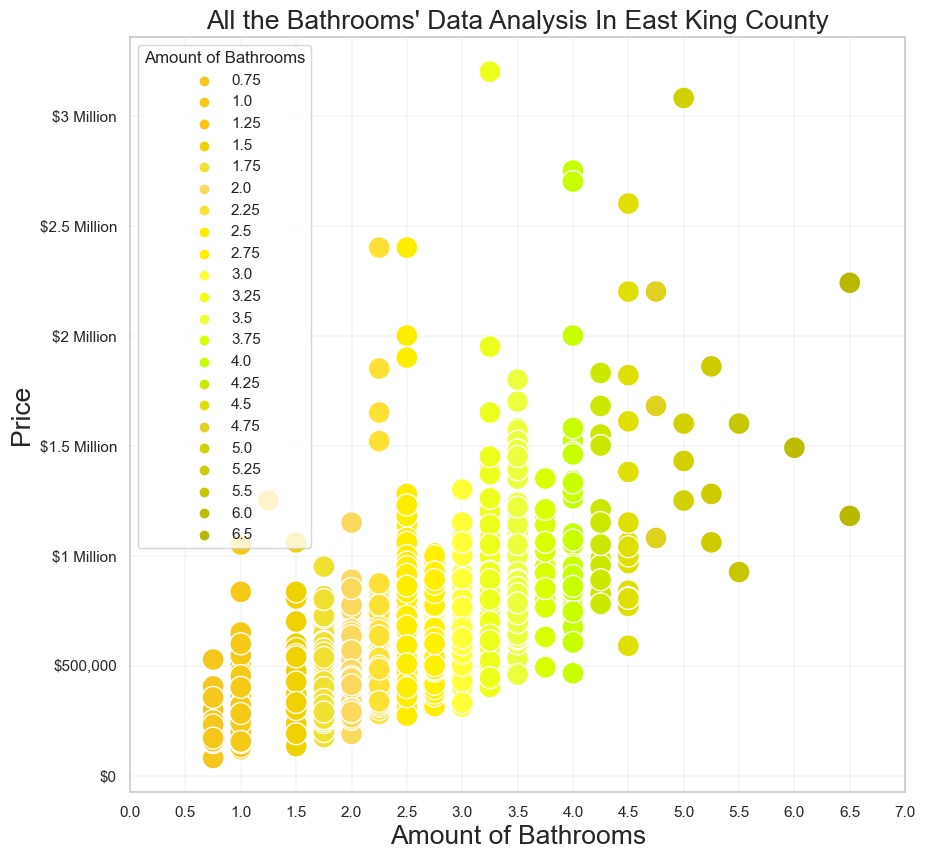

In [1234]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']



plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.5,0.5))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [1235]:
model6 = PoissonRegressor()

model6.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [1236]:
x = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]
prediction6 = model6.predict(x)

In [1237]:
model_fit6 = regressiondata2
model_fit6['preds'] = prediction6

In [1238]:
k = model_fit6.Amount_of_Bathrooms.value_counts()
len(k)

22

In [1239]:
model_fit6

,Amount_of_Bathrooms,Price,preds
0,2.50,580500.0,5.889610e+05
1,2.50,625000.0,5.889610e+05
2,2.50,488000.0,5.889610e+05
3,2.50,437500.0,5.889610e+05
4,2.50,597750.0,5.889610e+05
...,...,...,...
2450,5.50,1600000.0,1.823158e+06
2451,1.25,1250000.0,3.678007e+05
2452,6.00,1490000.0,2.200969e+06
2453,6.50,1180000.0,2.657073e+06


C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/2220392773.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


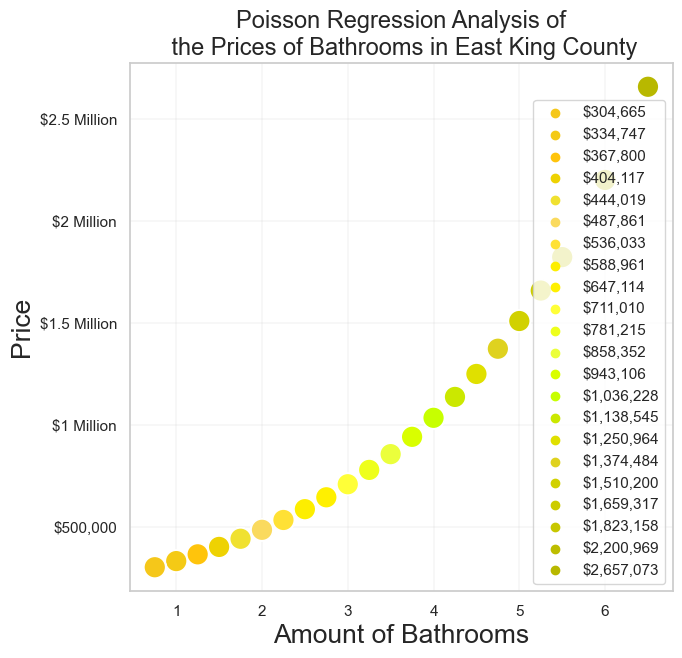

In [1240]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit6, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$304,665')
L.get_texts()[1].set_text('$334,747')
L.get_texts()[2].set_text('$367,800')
L.get_texts()[3].set_text('$404,117')
L.get_texts()[4].set_text('$444,019')
L.get_texts()[5].set_text('$487,861')
L.get_texts()[6].set_text('$536,033')
L.get_texts()[7].set_text('$588,961')
L.get_texts()[8].set_text('$647,114')
L.get_texts()[9].set_text('$711,010')
L.get_texts()[10].set_text('$781,215')
L.get_texts()[11].set_text('$858,352')
L.get_texts()[12].set_text('$943,106')
L.get_texts()[13].set_text('$1,036,228')
L.get_texts()[14].set_text('$1,138,545')
L.get_texts()[15].set_text('$1,250,964')
L.get_texts()[16].set_text('$1,374,484')
L.get_texts()[17].set_text('$1,510,200')
L.get_texts()[18].set_text('$1,659,317')
L.get_texts()[19].set_text('$1,823,158')
L.get_texts()[20].set_text('$2,200,969')
L.get_texts()[21].set_text('$2,657,073')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_16672/3140636638.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


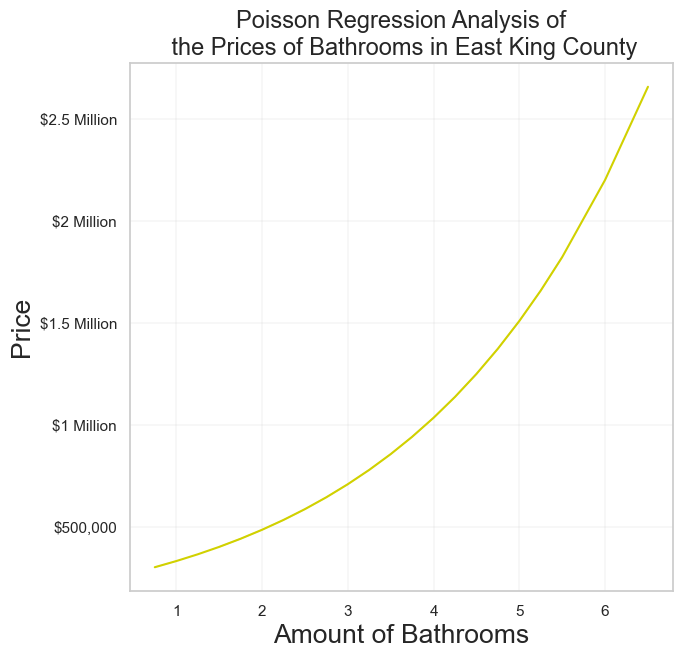

In [1359]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit6, x=x, y=y,color='#d1d100')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

In [1360]:
# Creating and training model
model7 = BayesianRidge()
model7.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
   
# Model making a prediction on test data
prediction = model7.predict(regressiondata2[['Amount_of_Bathrooms']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1361]:
model_fit7 = regressiondata2
model_fit7['preds'] = prediction

In [1362]:
model_fit7

,Amount_of_Bathrooms,Price,preds
0,2.50,580500.0,6.118722e+05
1,2.50,625000.0,6.118722e+05
2,2.50,488000.0,6.118722e+05
3,2.50,437500.0,6.118722e+05
4,2.50,597750.0,6.118722e+05
...,...,...,...
2450,5.50,1600000.0,1.357041e+06
2451,1.25,1250000.0,3.013853e+05
2452,6.00,1490000.0,1.481236e+06
2453,6.50,1180000.0,1.605430e+06


In [1363]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit7, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$177,190')
L.get_texts()[1].set_text('$239,287')
L.get_texts()[2].set_text('$301,385')
L.get_texts()[3].set_text('$363,482')
L.get_texts()[4].set_text('$425,580')
L.get_texts()[5].set_text('$487,677')
L.get_texts()[6].set_text('$549,774')
L.get_texts()[7].set_text('$611,872')
L.get_texts()[8].set_text('$673,969')
L.get_texts()[9].set_text('$736,066')
L.get_texts()[10].set_text('$798,164')
L.get_texts()[11].set_text('$860,261')
L.get_texts()[12].set_text('$922,359')
L.get_texts()[13].set_text('$984,456')
L.get_texts()[14].set_text('$1,046,553')
L.get_texts()[15].set_text('$1,108,651')
L.get_texts()[16].set_text('$1,170,748')
L.get_texts()[17].set_text('$1,232,846')
L.get_texts()[18].set_text('$1,294,943')
L.get_texts()[19].set_text('$1,357,040')
L.get_texts()[20].set_text('$1,481,235')
L.get_texts()[21].set_text('$1,605,430')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

ValueError: The palette list has the wrong number of colors.

In [ ]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit7, x=x, y=y,color='#eed202')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [ ]:
quantile = [0.1, 0.5, 0.9]
X = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_2 = qrf2.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_3 = qrf3.predict(regressiondata2[['Amount_of_Bathrooms']])


In [ ]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': regressiondata2['Amount_of_Bathrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata2['Price']})

In [ ]:
Quantile_regression1

In [ ]:
for x,i in enumerate(Quantile_regression1.Amount_of_Bathrooms):
    if i ==6.5:
        print(x,i)

In [ ]:
Quantileregression_updated1= Quantile_regression1.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
Quantileregression_updated1 = Quantileregression_updated1.drop('Price', axis=1)
Quantileregression_updated1

In [ ]:
melted_data1 = pd.melt(Quantileregression_updated1, id_vars=['Amount_of_Bathrooms'])
melted_data1 = melted_data1.dropna()
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',color="yellow")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

In [ ]:
model8 = Ridge(alpha=1.0)
model8.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
preds_8 = model8.predict(regressiondata2[['Amount_of_Bathrooms']])

In [ ]:
model_fit8 = regressiondata2
model_fit8['preds'] = preds_8

In [ ]:
model_fit8

In [ ]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit8, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$177,286')
L.get_texts()[1].set_text('$239,369')
L.get_texts()[2].set_text('$301,453')
L.get_texts()[3].set_text('$363,536')
L.get_texts()[4].set_text('$425,619')
L.get_texts()[5].set_text('$487,703')
L.get_texts()[6].set_text('$549,786')
L.get_texts()[7].set_text('$611,870')
L.get_texts()[8].set_text('$673,953')
L.get_texts()[9].set_text('$736,037')
L.get_texts()[10].set_text('$798,120')
L.get_texts()[11].set_text('$860,204')
L.get_texts()[12].set_text('$922,287')
L.get_texts()[13].set_text('$984,371')
L.get_texts()[14].set_text('$1,046,454')
L.get_texts()[15].set_text('$1,108,537')
L.get_texts()[16].set_text('$1,170,621')
L.get_texts()[17].set_text('$1,232,704')
L.get_texts()[18].set_text('$1,294,788')
L.get_texts()[19].set_text('$1,357,871')
L.get_texts()[20].set_text('$1,481,038')
L.get_texts()[21].set_text('$1,605,205')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

In [ ]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit8, x=x, y=y,color='#d9ff00')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

In [ ]:
pos_var = model_fit6.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit7.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
Quantileregression_updated1[Quantileregression_updated1.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated1['0.1 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.5 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.9 Pred']]
Quantileregression_updated1

In [ ]:
rid_var = model_fit8.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
bath = [0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,6,6.5]
index = [2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,1823, 1997, 2218, 2065, 2330, 2358, 2412, 
         2393, 2439, 2442, 2446, 2449, 2452, 2453]
for x,i in enumerate(index):
    print('"',bath[x],'Bathrooms":[','"',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated1['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions1 = pd.DataFrame({" 0.75 Bathrooms":[ " $304,665 " , " $177,191 " , " $111,167 " , " $206,584 " , " $298,998 " , " $177,286 " ],
" 1 Bathrooms":[ " $334,748 " , " $239,288 " , " $154,300 " , " $259,928 " , " $374,141 " , " $239,370 " ],
" 1.25 Bathrooms":[ " $367,801 " , " $301,385 " , " $197,433 " , " $313,273 " , " $449,284 " , " $301,453 " ],
" 1.5 Bathrooms":[ " $404,117 " , " $363,483 " , " $240,567 " , " $366,617 " , " $524,427 " , " $363,537 " ],
" 1.75 Bathrooms":[ " $444,020 " , " $425,580 " , " $283,700 " , " $419,961 " , " $599,570 " , " $425,620 " ],
" 2 Bathrooms":[ " $487,862 " , " $487,677 " , " $326,833 " , " $473,305 " , " $674,713 " , " $487,703 " ],
" 2.25 Bathrooms":[ " $536,033 " , " $549,775 " , " $369,966 " , " $526,649 " , " $749,856 " , " $549,787 " ],
" 2.5 Bathrooms":[ " $588,961 " , " $611,872 " , " $413,100 " , " $579,994 " , " $824,999 " , " $611,870 " ],
" 2.75 Bathrooms":[ " $647,115 " , " $673,970 " , " $456,233 " , " $633,338 " , " $900,142 " , " $673,954 " ],
" 3 Bathrooms":[ " $711,011 " , " $736,067 " , " $499,366 " , " $686,682 " , " $975,286 " , " $736,037 " ],
" 3.25 Bathrooms":[ " $781,216 " , " $798,164 " , " $542,500 " , " $740,026 " , " $1,050,429 " , " $798,121 " ],
" 3.5 Bathrooms":[ " $858,353 " , " $860,262 " , " $585,633 " , " $793,370 " , " $1,125,572 " , " $860,204 " ],
" 3.75 Bathrooms":[ " $943,106 " , " $922,359 " , " $628,766 " , " $846,714 " , " $1,200,715 " , " $922,288 " ],
" 4 Bathrooms":[ " $1,036,228 " , " $984,457 " , " $671,900 " , " $900,059 " , " $1,275,858 " , " $984,371 " ],
" 4.25 Bathrooms":[ " $1,138,545 " , " $1,046,554 " , " $715,033 " , " $953,403 " , " $1,351,001 " , " $1,046,454 " ],
" 4.5 Bathrooms":[ " $1,250,965 " , " $1,108,651 " , " $758,166 " , " $1,006,747 " , " $1,426,144 " , " $1,108,538 " ],
" 4.75 Bathrooms":[ " $1,374,485 " , " $1,170,749 " , " $801,299 " , " $1,060,091 " , " $1,501,287 " , " $1,170,621 " ],
" 5 Bathrooms":[ " $1,510,201 " , " $1,232,846 " , " $844,433 " , " $1,113,435 " , " $1,576,430 " , " $1,232,705 " ],
" 5.25 Bathrooms":[ " $1,659,318 " , " $1,294,943 " , " $887,566 " , " $1,166,780 " , " $1,651,573 " , " $1,294,788 " ],
" 5.5 Bathrooms":[ " $1,823,158 " , " $1,357,041 " , " $930,699 " , " $1,220,124 " , " $1,726,716 " , " $1,356,872 " ],
" 6 Bathrooms":[ " $2,200,969 " , " $1,481,236 " , " $1,016,966 " , " $1,326,812 " , " $1,877,002 " , " $1,481,039 " ],
" 6.5 Bathrooms":[ " $2,657,073 " , " $1,605,430 " , " $1,103,233 " , " $1,433,500 " , " $2,027,289 " , " $1,605,205 " ]})
# Create the index
index_ = ['Poisson_Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions1.index = index_

In [ ]:
models_predictions1

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X) 

In [ ]:
model_fit9 = regressiondata2
model_fit9['preds'] = pred_stack

In [ ]:
model_fit9

In [ ]:
meta_var = model_fit9.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.2f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000']#,'#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit9, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit9, x=x, y=y,color='#a8a800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model2 = models_predictions1

In [ ]:
meta_model2.loc[len(meta_model2.index)] = ['$150,000','$240,000','$300,000','$340,000','$310,000',
                                           '$500,000','$500,000','$550,000','$750,000','$695,000',
                                           '$695,000','$1,050,000','$1,050,000','$1,050,000',
                                           '$1,060,000', '$1,680,000','$2,200,000',
                                           '$1,600,000','$1,600,000',
                                           '$1,600,000','$1,180,000','$2,240,000']
meta_model2 = meta_model2.rename(index={6: 'Final Prediction'})

In [ ]:
meta_model2

In [ ]:
box_df1 = meta_model2.transpose()
box_df1

In [ ]:
melted_data2 = pd.melt(box_df1, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data2 = melted_data2.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data2[melted_data2.columns[1:]] = melted_data2[melted_data2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
melted_data2

In [ ]:
flatui = ['#f5c71a','#f0e130','#ffe135','#cbe800','#d1d100' ,'#b8b800','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data2,x='Prediction Model', y='Prediction',palette=flatui)
ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bathrooms in East King County", size=17)
wrap_labels(x, 10)


In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#f5c71a;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ffe135;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#cbe800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#ffc40c;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#CCCC00;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#b8b800;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model2 = meta_model2.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F1E5AC')]},
            {"selector":"thead", 'props':[("background-color","#F1E5AC"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F1E5AC'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model2, 'meta_model2.png')

In [ ]:
meta_model2

In [ ]:
%store Quantile_Regression_Prediction1
%store Weighted_Average_Prediction1

In [ ]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    
    floors_eastking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_eastking.append(i)
        elif locations[i] == zip_loca[1] : floors_eastking.append(i)
        elif locations[i] == zip_loca[2] : floors_eastking.append(i)
        elif locations[i] == zip_loca[3] : floors_eastking.append(i)
        elif locations[i] == zip_loca[4]: floors_eastking.append(i)
        elif locations[i] == zip_loca[5] : floors_eastking.append(i)
        elif locations[i] == zip_loca[6] : floors_eastking.append(i)
        elif locations[i] == zip_loca[7]: floors_eastking.append(i)
        elif locations[i] == zip_loca[8] : floors_eastking.append(i)
        

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in floors_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_eastking = []
for i in no_of_floors:
    price_floors_eastking.append(PRICE_FLOORS(i))
price_floors_eastking = sum(price_floors_eastking, [])
len(price_floors_eastking)

In [ ]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            

    
    

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_eastking = []
for i in no_of_floors:
    amount_floors_eastking.append(AMOUNT_FLOORS(i))
amount_floors_eastking= sum(amount_floors_eastking, [])
len(amount_floors_eastking)

In [ ]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_eastking,
                                'Price':price_floors_eastking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

In [ ]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.gcf().set_size_inches((7,7))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [ ]:
model10 = PoissonRegressor()

model10.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])

In [ ]:
x = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]
prediction3 = model10.predict(x)

In [ ]:
model_fit10 = regressiondata3
model_fit10['preds'] = prediction3

In [ ]:
model_fit10

In [ ]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit10, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Floors')
L=plt.legend()
L.get_texts()[0].set_text('$468,653')
L.get_texts()[1].set_text('$552,588')
L.get_texts()[2].set_text('$651,556')
L.get_texts()[3].set_text('$768,248')
L.get_texts()[4].set_text('$905,839')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [ ]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit10, x=x, y=y,color='#ffd800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [ ]:
(model_fit10['Price'] > model_fit10['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1421:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1034:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 57% Accuracy ',size=13)

In [ ]:
# Creating and training model
model11 = BayesianRidge()
model11.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
   
# Model making a prediction on test data
prediction4 = model11.predict(regressiondata3[['Amount_of_Floors']])

In [ ]:
model_fit11 = regressiondata3
model_fit11['preds'] = prediction4

In [ ]:
model_fit11

In [ ]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit11, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$466,202')
L.get_texts()[1].set_text('$559,650')
L.get_texts()[2].set_text('$653,098')
L.get_texts()[3].set_text('$746,546')
L.get_texts()[4].set_text('$839,994')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

In [ ]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit11, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

In [ ]:
(model_fit11['Price'] > model_fit11['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 58% Accuracy ',size=13)

In [ ]:
X = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata3[['Amount_of_Floors']])
y_pred_2 = qrf2.predict(regressiondata3[['Amount_of_Floors']])
y_pred_3 = qrf3.predict(regressiondata3[['Amount_of_Floors']])

In [ ]:
Quantile_regression3 = pd.DataFrame({'Amount_of_Floors': regressiondata3['Amount_of_Floors'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata3['Price']})

In [ ]:
Quantile_regression3

In [ ]:
for i,x in enumerate(Quantile_regression3.Amount_of_Floors):
    if x == 3:print(i)

In [ ]:
Quantileregression_updated3= Quantile_regression3.loc[[0,2310,632,2434,2414]]
Quantileregression_updated3 = Quantileregression_updated3.drop('Price', axis=1)
Quantileregression_updated3

In [ ]:
melted_data3 = pd.melt(Quantileregression_updated3, id_vars=['Amount_of_Floors'])
melted_data3 = melted_data3.dropna()
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',color='#80910E')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [ ]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  244:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2211:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [ ]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1235:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1220:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [ ]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  2209:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 246:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [ ]:
model12 = Ridge(alpha=1.0)
model12.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
preds_12 = model12.predict(regressiondata3[['Amount_of_Floors']])

In [ ]:
model_fit12 = regressiondata3
model_fit12['preds'] = preds_12

In [ ]:
model_fit12

In [ ]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit12, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('$465,948')
L.get_texts()[1].set_text('$559,569')
L.get_texts()[2].set_text('$653,190')
L.get_texts()[3].set_text('$746,811')
L.get_texts()[4].set_text('$840,431')
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$450,000','$500,000','$550,000','$600,000','$650,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

In [ ]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit12, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

In [ ]:
(model_fit12['Price'] > model_fit12['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [ ]:
# Creating the DataFrame
models_predictions3 = pd.DataFrame({"1 Floor":['$468,653','$466,202','$270,000','$434,991','$653,449','$465,948'], 
                   "1.5 Floors":['$552,588','$559,650','$332,500','$522,488','$786,701','$559,569'], 
                   "2 Floors":['$651,556','$653,098','$394,999','$609,985','$919,953','$653,190'], 
                   "2.5 Floors":['$768,248','$746,546','$457,499','$697,481','$1,053,206','$746,811'],
                   "3 Floors":['$905,839','$839,994','$519,999','$784,978','$1,186,458','$840,431'], 
                        }) 
  
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions3.index = index_

In [ ]:
models_predictions3

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model3_stack = clf_stack.fit(X, y)   # training of stacked model
pred3_stack = model3_stack.predict(X) 

In [ ]:
model_fit13 = regressiondata3
model_fit13['preds'] = pred3_stack

In [ ]:
model_fit13

In [ ]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit13, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

In [ ]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit13, x=x, y=y,color='#80910E')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

In [ ]:
meta_model3 = models_predictions3

In [ ]:
meta_model3.loc[len(meta_model3.index)] = ['$390,000', '$500,000',
                                           '$695,000', '$1,060,000','$288,790']
meta_model3 = meta_model3.rename(index={6: 'Final Prediction'})

In [ ]:
meta_model3

In [ ]:
box_df3 = meta_model3.transpose()
box_df3

In [ ]:
melted_data3= pd.melt(box_df3, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data3 = melted_data3.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data3[melted_data3.columns[1:]] = melted_data3[melted_data3.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
melted_data3

In [ ]:
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data3,x='Prediction Model', y='Prediction',
             palette=flatui)#,hue='Prediction Model',width=1.9)
             #hue='Prediction Model')
#x.set_xticklabels(x.get_xticklabels(), rotation=45,horizontalalignment='right')
ylabels = ['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million']
x.set_yticklabels(ylabels)
#x.set_ylabel('0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million')
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Floors\' in East King County", size=17)
wrap_labels(x, 10)
#x.set_xticklabels(rotation=30)

In [ ]:
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#FFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ECFD00;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#AFCB20;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#80910E;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model3 = meta_model3.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F2FFD1')]},
            {"selector":"thead", 'props':[("background-color","#F2FFD1"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F2FFD1'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model3, 'meta_model3.png')

In [ ]:
meta_model3

In [ ]:
%store Quantile_Regression_Prediction2
%store Weighted_Average_Prediction2

In [ ]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    years_built_eastking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[1] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[2] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[3] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[4]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[5] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[6] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[7]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[8] : years_built_eastking.append(i)
       


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in years_built_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_eastking = []
for i in no_of_Year:
    price_Year_eastking.append(PRICE_YEARS_BUILT(i))
price_Year_eastking = sum(price_Year_eastking, [])
len(price_Year_eastking)

In [ ]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
       

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_eastking = []
for i in no_of_years:
    amount_years_eastking.append(AMOUNT_YEARS_BUILT(i))
amount_years_eastking= sum(amount_years_eastking, [])
len(amount_years_eastking)

In [ ]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_eastking,
                      'Price':price_Year_eastking})
regressiondata4

In [ ]:
regressiondata4
re4 = regressiondata4
x = re4.Year_Built.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

In [ ]:
year = regressiondata4['Year_Built'].value_counts()
year

In [ ]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_eastking):
    if x == 1900:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(536751.0)
year1.remove(2013)

In [ ]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata44
for i,x in enumerate(regressiondata44.Year_Built):print(i,x,reg1[i])

In [ ]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
x= regressiondata44.Year_Built.value_counts()
len(x)

#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])

In [ ]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1938:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(589000.0)
year1.remove(1981)

In [ ]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45
for i,x in enumerate(regressiondata45.Year_Built):print(i,x,reg1[i])

In [ ]:
x= regressiondata45.Year_Built.value_counts()
len(x)

In [ ]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1976:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_eastking[i])
        year1.append(x)

In [ ]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

In [ ]:
flatui1 = [ '#f7d64e','#f3d451','#fad94f','#fbcc06','#f5c80a','#f0c718',
          '#eed04f','#e3bf27','#E9DB0D','#E1D41E','#DBD14B','#D0C318',
           
           '#dcc358','#d3c278','#e0cd7f', '#E8E3C1','#E6E3CA','#F4F3ED',
           '#E8E7DE','#F4F3ED','#F4F3ED','#E8E3C1','#DFD8AD','#d1aa06', 
           
           '#b7960c','#b39519','#a78d21','#937704','#9d810c', '#86721e']#,
           #'#806b12']#,'#7d6c23','#645102','#635108','#666600', '#333300','#3c3723']
len(flatui1)#37

In [ ]:
flatui2 = ['#ffff00','#ffff1a','#ffff33','#ffff4d','#ffff66','#ffff66',
           '#fdf623','#ede622','#ebe775','#e8e110','#e4e063','#e5df34',
           
           '#d8d22a','#e7e59c','#ebe891','#e9e8cb','#f0efd9','#ECEADE',
           '#f2f2e4', '#F4F3ED','#E8E5D4','#E6E3CA','#E6E5A8','#c6c639',
           
           '#bfbf40','#c5c035','#9e990e','#97942b','#757613','#6a6716',
          '#6d6a10','#686913','#39390C','#373805','#3C3C18','#494A25']#,'#4D4E1E']#38
len(flatui2)

In [ ]:
flatui3 = ['#D6FF00','#D6F825','#DBF844','#C1E504','#C3E21E','#DDF65C',
          '#C5E130','#CBE448','#BBD62E','#ACCD03','#A1BD0D','#95AE15',
          
          '#94AE0B','#8DA50F','#B3C169',
           '#DBE1BC','#E5E8D4','#ECF2CB',
          '#F2F4E5','#EEF0E5','#E3E8C7','#E5E8D4','#DDE6A8','#819806',
          
          '#768524','#768916','#708501','#5E6920','#586612','#536204',
          '#444C1E','#424A15','#3A430B','#323B03','#303511','#323A09','#2E3603']#37

In [ ]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$100,000','$200,000','$300,000','$400,000','$500,000','$600,000',
                    '$700,000','$800,000','$900,000'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million',
'$1.5 Million','$1.75 Million','$2 Million',])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [ ]:
# Create linear regression object
model14 = PoissonRegressor()

# Train the model using the training sets
model14.fit(regressiondata4[['Year_Built']],regressiondata4[['Price']])

In [ ]:
x = regressiondata4[['Year_Built']]
y = regressiondata4[['Price']]
prediction14 = model14.predict(x)

In [ ]:
model_fit14 = regressiondata4
model_fit14['preds'] = prediction14

In [ ]:
model_fit14

In [ ]:
# Importing modules that are required
# Creating and training model
model15 = BayesianRidge()
model15.fit(regressiondata4[['Year_Built']],regressiondata4[['Price']])
   
# Model making a prediction on test data
prediction15 = model15.predict(regressiondata4[['Year_Built']])

In [ ]:
model_fit15 = regressiondata4
model_fit15['preds'] = prediction15

In [ ]:
model_fit15

In [ ]:
X = regressiondata4[['Year_Built']]
y = regressiondata4[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata4[['Year_Built']])
y_pred_2 = qrf2.predict(regressiondata4[['Year_Built']])
y_pred_3 = qrf3.predict(regressiondata4[['Year_Built']])

In [ ]:
Quantile_regression4 = pd.DataFrame({'Year_Built': regressiondata4['Year_Built'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata4['Price']})

In [ ]:
no = []
for i in Counter(regressiondata4['Year_Built']):no.append(i)

In [ ]:
min(no)

In [ ]:
openn = []
count = 1900
while count < 2016 :
    for x,i in enumerate(regressiondata4['Year_Built']):
         if i == count:
            openn.append((x,i))
    count+=1

In [ ]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [ ]:
openn2 = []
for i in openn:openn2.append(i[1])

In [ ]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [ ]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [ ]:
Quantileregression_updated4 = Quantile_regression4.loc[final_indexx]
Quantileregression_updated4 = Quantileregression_updated4.drop('Price', axis=1)
Quantileregression_updated4

In [ ]:
melted_data4 = pd.melt(Quantileregression_updated4, id_vars=['Year_Built'])
melted_data4 = melted_data4.dropna()
melted_data4 = melted_data4.rename(columns={'variable': 'Percentile'})
melted_data4

In [ ]:
model16 = Ridge(alpha=1.0)
model16.fit(regressiondata4[['Year_Built']],regressiondata4[['Price']])
preds_16 = model16.predict(regressiondata4[['Year_Built']])

In [ ]:
model_fit16 = regressiondata4
model_fit16['preds'] = preds_16

In [ ]:
model_fit16

In [ ]:
size_above = []
for i in final_indexx:
    size_above.append(regressiondata4['Year_Built'][i])

In [ ]:
pos_var = model_fit14.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit15.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
rid_var = model_fit16.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
Quantileregression_updated4[Quantileregression_updated4.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated4['0.1 Pred']]
Quantileregression_updated4[Quantileregression_updated4.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated4['0.5 Pred']]
Quantileregression_updated4[Quantileregression_updated4.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated4['0.9 Pred']]
Quantileregression_updated4

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Year Built',size_above[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated4['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated4['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated4['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions4 = pd.DataFrame({
" Year Built 1900 ":[" $603,348 " , " $195,336 " , " $113,739 " , " $177,944 " , " $344,941 " , " $193,775 " ],
" Year Built 1903 ":[" $603,348 " , " $208,837 " , " $121,523 " , " $190,766 " , " $361,841 " , " $207,327 " ],
" Year Built 1906 ":[" $603,348 " , " $222,338 " , " $129,307 " , " $203,588 " , " $378,742 " , " $220,880 " ],
" Year Built 1908 ":[" $603,348 " , " $231,339 " , " $134,496 " , " $212,136 " , " $390,008 " , " $229,915 " ],
" Year Built 1909 ":[" $603,348 " , " $235,839 " , " $137,090 " , " $216,411 " , " $395,642 " , " $234,433 " ],
" Year Built 1910 ":[" $603,348 " , " $240,340 " , " $139,685 " , " $220,685 " , " $401,275 " , " $238,951 " ],
" Year Built 1911 ":[" $603,348 " , " $244,840 " , " $142,279 " , " $224,959 " , " $406,909 " , " $243,468 " ],
" Year Built 1912 ":[" $603,348 " , " $249,340 " , " $144,874 " , " $229,233 " , " $412,542 " , " $247,986 " ],
" Year Built 1913 ":[" $603,348 " , " $253,841 " , " $147,468 " , " $233,507 " , " $418,175 " , " $252,504 " ],
" Year Built 1914 ":[" $603,348 " , " $258,341 " , " $150,063 " , " $237,781 " , " $423,809 " , " $257,021 " ],
" Year Built 1915 ":[" $603,348 " , " $262,842 " , " $152,658 " , " $242,055 " , " $429,442 " , " $261,539 " ],
" Year Built 1916 ":[" $603,348 " , " $267,342 " , " $155,252 " , " $246,329 " , " $435,075 " , " $266,056 " ],
" Year Built 1917 ":[" $603,348 " , " $271,842 " , " $157,847 " , " $250,603 " , " $440,709 " , " $270,574 " ],
" Year Built 1919 ":[" $603,348 " , " $280,843 " , " $163,036 " , " $259,151 " , " $451,976 " , " $279,609 " ],
" Year Built 1920 ":[" $603,348 " , " $285,344 " , " $165,630 " , " $263,426 " , " $457,609 " , " $284,127 " ],
" Year Built 1921 ":[" $603,348 " , " $289,844 " , " $168,225 " , " $267,700 " , " $463,242 " , " $288,644 " ],
" Year Built 1922 ":[" $603,348 " , " $294,344 " , " $170,820 " , " $271,974 " , " $468,876 " , " $293,162 " ],
" Year Built 1923 ":[" $603,348 " , " $298,845 " , " $173,414 " , " $276,248 " , " $474,509 " , " $297,680 " ],
" Year Built 1924 ":[" $603,348 " , " $303,345 " , " $176,009 " , " $280,522 " , " $480,142 " , " $302,197 " ],
" Year Built 1925 ":[" $603,348 " , " $307,846 " , " $178,603 " , " $284,796 " , " $485,776 " , " $306,715 " ],
" Year Built 1927 ":[" $603,348 " , " $316,846 " , " $183,792 " , " $293,344 " , " $497,043 " , " $315,750 " ],
" Year Built 1928 ":[" $603,348 " , " $321,347 " , " $186,387 " , " $297,618 " , " $502,676 " , " $320,268 " ],
" Year Built 1929 ":[" $603,348 " , " $325,847 " , " $188,981 " , " $301,892 " , " $508,309 " , " $324,785 " ],
" Year Built 1930 ":[" $603,348 " , " $330,347 " , " $191,576 " , " $306,166 " , " $513,943 " , " $329,303 " ],
" Year Built 1931 ":[" $603,348 " , " $334,848 " , " $194,171 " , " $310,441 " , " $519,576 " , " $333,821 " ],
" Year Built 1932 ":[" $603,348 " , " $339,348 " , " $196,765 " , " $314,715 " , " $525,209 " , " $338,338 " ],
" Year Built 1933 ":[" $603,348 " , " $343,849 " , " $199,360 " , " $318,989 " , " $530,843 " , " $342,856 " ],
" Year Built 1934 ":[" $603,348 " , " $348,349 " , " $201,954 " , " $323,263 " , " $536,476 " , " $347,373 " ],
" Year Built 1935 ":[" $603,348 " , " $352,849 " , " $204,549 " , " $327,537 " , " $542,110 " , " $351,891 " ],
" Year Built 1936 ":[" $603,348 " , " $357,350 " , " $207,143 " , " $331,811 " , " $547,743 " , " $356,409 " ],
" Year Built 1937 ":[" $603,348 " , " $361,850 " , " $209,738 " , " $336,085 " , " $553,376 " , " $360,926 " ],
" Year Built 1938 ":[" $603,348 " , " $366,351 " , " $212,333 " , " $340,359 " , " $559,010 " , " $365,444 " ],
" Year Built 1939 ":[" $603,348 " , " $370,851 " , " $214,927 " , " $344,633 " , " $564,643 " , " $369,961 " ],
" Year Built 1940 ":[" $603,348 " , " $375,351 " , " $217,522 " , " $348,907 " , " $570,277 " , " $374,479 " ],
" Year Built 1941 ":[" $603,348 " , " $379,852 " , " $220,116 " , " $353,181 " , " $575,910 " , " $378,997 " ],
" Year Built 1942 ":[" $603,348 " , " $384,352 " , " $222,711 " , " $357,456 " , " $581,543 " , " $383,514 " ],
" Year Built 1943 ":[" $603,348 " , " $388,853 " , " $225,305 " , " $361,730 " , " $587,177 " , " $388,032 " ],
" Year Built 1944 ":[" $603,348 " , " $393,353 " , " $227,900 " , " $366,004 " , " $592,810 " , " $392,549 " ],
" Year Built 1945 ":[" $603,348 " , " $397,853 " , " $230,494 " , " $370,278 " , " $598,443 " , " $397,067 " ],
" Year Built 1946 ":[" $603,348 " , " $402,354 " , " $233,089 " , " $374,552 " , " $604,077 " , " $401,585 " ],
" Year Built 1947 ":[" $603,348 " , " $406,854 " , " $235,684 " , " $378,826 " , " $609,710 " , " $406,102 " ],
" Year Built 1948 ":[" $603,348 " , " $411,355 " , " $238,278 " , " $383,100 " , " $615,344 " , " $410,620 " ],
" Year Built 1949 ":[" $603,348 " , " $415,855 " , " $240,873 " , " $387,374 " , " $620,977 " , " $415,138 " ],
" Year Built 1950 ":[" $603,348 " , " $420,355 " , " $243,467 " , " $391,648 " , " $626,610 " , " $419,655 " ],
" Year Built 1951 ":[" $603,348 " , " $424,856 " , " $246,062 " , " $395,922 " , " $632,244 " , " $424,173 " ],
" Year Built 1952 ":[" $603,348 " , " $429,356 " , " $248,656 " , " $400,196 " , " $637,877 " , " $428,690 " ],
" Year Built 1953 ":[" $603,348 " , " $433,857 " , " $251,251 " , " $404,470 " , " $643,510 " , " $433,208 " ],
" Year Built 1954 ":[" $603,348 " , " $438,357 " , " $253,846 " , " $408,745 " , " $649,144 " , " $437,726 " ],
" Year Built 1955 ":[" $603,348 " , " $442,857 " , " $256,440 " , " $413,019 " , " $654,777 " , " $442,243 " ],
" Year Built 1957 ":[" $603,348 " , " $451,858 " , " $261,629 " , " $421,567 " , " $666,044 " , " $451,278 " ],
" Year Built 1958 ":[" $603,348 " , " $456,358 " , " $264,224 " , " $425,841 " , " $671,677 " , " $455,796 " ],
" Year Built 1959 ":[" $603,348 " , " $460,859 " , " $266,818 " , " $430,115 " , " $677,311 " , " $460,314 " ],
" Year Built 1960 ":[" $603,348 " , " $465,359 " , " $269,413 " , " $434,389 " , " $682,944 " , " $464,831 " ],
" Year Built 1961 ":[" $603,348 " , " $469,860 " , " $272,007 " , " $438,663 " , " $688,577 " , " $469,349 " ],
" Year Built 1962 ":[" $603,348 " , " $474,360 " , " $274,602 " , " $442,937 " , " $694,211 " , " $473,867 " ],
" Year Built 1963 ":[" $603,348 " , " $478,860 " , " $277,197 " , " $447,211 " , " $699,844 " , " $478,384 " ],
" Year Built 1964 ":[" $603,348 " , " $483,361 " , " $279,791 " , " $451,485 " , " $705,478 " , " $482,902 " ],
" Year Built 1965 ":[" $603,348 " , " $487,861 " , " $282,386 " , " $455,760 " , " $711,111 " , " $487,419 " ],
" Year Built 1966 ":[" $603,348 " , " $492,362 " , " $284,980 " , " $460,034 " , " $716,744 " , " $491,937 " ],
" Year Built 1967 ":[" $603,348 " , " $496,862 " , " $287,575 " , " $464,308 " , " $722,378 " , " $496,455 " ],
" Year Built 1968 ":[" $603,348 " , " $501,362 " , " $290,169 " , " $468,582 " , " $728,011 " , " $500,972 " ],
" Year Built 1969 ":[" $603,348 " , " $505,863 " , " $292,764 " , " $472,856 " , " $733,645 " , " $505,490 " ],
" Year Built 1970 ":[" $603,348 " , " $510,363 " , " $295,359 " , " $477,130 " , " $739,278 " , " $510,007 " ],
" Year Built 1971 ":[" $603,348 " , " $514,864 " , " $297,953 " , " $481,404 " , " $744,911 " , " $514,525 " ],
" Year Built 1972 ":[" $603,348 " , " $519,364 " , " $300,548 " , " $485,678 " , " $750,545 " , " $519,043 " ],
" Year Built 1973 ":[" $603,348 " , " $523,864 " , " $303,142 " , " $489,952 " , " $756,178 " , " $523,560 " ],
" Year Built 1974 ":[" $603,348 " , " $528,365 " , " $305,737 " , " $494,226 " , " $761,811 " , " $528,078 " ],
" Year Built 1975 ":[" $603,348 " , " $532,865 " , " $308,331 " , " $498,500 " , " $767,445 " , " $532,595 " ],
" Year Built 1976 ":[" $603,348 " , " $537,366 " , " $310,926 " , " $502,775 " , " $773,078 " , " $537,113 " ],
" Year Built 1977 ":[" $603,348 " , " $541,866 " , " $313,520 " , " $507,049 " , " $778,712 " , " $541,631 " ],
" Year Built 1978 ":[" $603,348 " , " $546,366 " , " $316,115 " , " $511,323 " , " $784,345 " , " $546,148 " ],
" Year Built 1979 ":[" $603,348 " , " $550,867 " , " $318,710 " , " $515,597 " , " $789,978 " , " $550,666 " ],
" Year Built 1980 ":[" $603,348 " , " $555,367 " , " $321,304 " , " $519,871 " , " $795,612 " , " $555,184 " ],
" Year Built 1981 ":[" $603,348 " , " $559,867 " , " $323,899 " , " $524,145 " , " $801,245 " , " $559,701 " ],
" Year Built 1982 ":[" $603,348 " , " $564,368 " , " $326,493 " , " $528,419 " , " $806,878 " , " $564,219 " ],
" Year Built 1983 ":[" $603,348 " , " $568,868 " , " $329,088 " , " $532,693 " , " $812,512 " , " $568,736 " ],
" Year Built 1984 ":[" $603,348 " , " $573,369 " , " $331,682 " , " $536,967 " , " $818,145 " , " $573,254 " ],
" Year Built 1985 ":[" $603,348 " , " $577,869 " , " $334,277 " , " $541,241 " , " $823,779 " , " $577,772 " ],
" Year Built 1986 ":[" $603,348 " , " $582,369 " , " $336,872 " , " $545,515 " , " $829,412 " , " $582,289 " ],
" Year Built 1987 ":[" $603,348 " , " $586,870 " , " $339,466 " , " $549,790 " , " $835,045 " , " $586,807 " ],
" Year Built 1988 ":[" $603,348 " , " $591,370 " , " $342,061 " , " $554,064 " , " $840,679 " , " $591,324 " ],
" Year Built 1989 ":[" $603,348 " , " $595,871 " , " $344,655 " , " $558,338 " , " $846,312 " , " $595,842 " ],
" Year Built 1990 ":[" $603,348 " , " $600,371 " , " $347,250 " , " $562,612 " , " $851,945 " , " $600,360 " ],
" Year Built 1991 ":[" $603,348 " , " $604,871 " , " $349,844 " , " $566,886 " , " $857,579 " , " $604,877 " ],
" Year Built 1992 ":[" $603,348 " , " $609,372 " , " $352,439 " , " $571,160 " , " $863,212 " , " $609,395 " ],
" Year Built 1993 ":[" $603,348 " , " $613,872 " , " $355,034 " , " $575,434 " , " $868,846 " , " $613,912 " ],
" Year Built 1994 ":[" $603,348 " , " $618,373 " , " $357,628 " , " $579,708 " , " $874,479 " , " $618,430 " ],
" Year Built 1995 ":[" $603,348 " , " $622,873 " , " $360,223 " , " $583,982 " , " $880,112 " , " $622,948 " ],
" Year Built 1996 ":[" $603,348 " , " $627,373 " , " $362,817 " , " $588,256 " , " $885,746 " , " $627,465 " ],
" Year Built 1997 ":[" $603,348 " , " $631,874 " , " $365,412 " , " $592,530 " , " $891,379 " , " $631,983 " ],
" Year Built 1998 ":[" $603,348 " , " $636,374 " , " $368,006 " , " $596,805 " , " $897,013 " , " $636,501 " ],
" Year Built 1999 ":[" $603,348 " , " $640,875 " , " $370,601 " , " $601,079 " , " $902,646 " , " $641,018 " ],
" Year Built 2000 ":[" $603,348 " , " $645,375 " , " $373,195 " , " $605,353 " , " $908,279 " , " $645,536 " ],
" Year Built 2001 ":[" $603,348 " , " $649,875 " , " $375,790 " , " $609,627 " , " $913,913 " , " $650,053 " ],
" Year Built 2002 ":[" $603,348 " , " $654,376 " , " $378,385 " , " $613,901 " , " $919,546 " , " $654,571 " ],
" Year Built 2003 ":[" $603,348 " , " $658,876 " , " $380,979 " , " $618,175 " , " $925,179 " , " $659,089 " ],
" Year Built 2004 ":[" $603,348 " , " $663,377 " , " $383,574 " , " $622,449 " , " $930,813 " , " $663,606 " ],
" Year Built 2005 ":[" $603,348 " , " $667,877 " , " $386,168 " , " $626,723 " , " $936,446 " , " $668,124 " ],
" Year Built 2006 ":[" $603,348 " , " $672,377 " , " $388,763 " , " $630,997 " , " $942,080 " , " $672,641 " ],
" Year Built 2007 ":[" $603,348 " , " $676,878 " , " $391,357 " , " $635,271 " , " $947,713 " , " $677,159 " ],
" Year Built 2008 ":[" $603,348 " , " $681,378 " , " $393,952 " , " $639,545 " , " $953,346 " , " $681,677 " ],
" Year Built 2009 ":[" $603,348 " , " $685,878 " , " $396,547 " , " $643,819 " , " $958,980 " , " $686,194 " ],
" Year Built 2010 ":[" $603,348 " , " $690,379 " , " $399,141 " , " $648,094 " , " $964,613 " , " $690,712 " ],
" Year Built 2011 ":[" $603,348 " , " $694,879 " , " $401,736 " , " $652,368 " , " $970,246 " , " $695,229 " ],
" Year Built 2012 ":[" $603,348 " , " $699,380 " , " $404,330 " , " $656,642 " , " $975,880 " , " $699,747 " ],
" Year Built 2013 ":[" $603,348 " , " $703,880 " , " $406,925 " , " $660,916 " , " $981,513 " , " $704,265 " ],
" Year Built 2014 ":[" $603,348 " , " $708,380 " , " $409,519 " , " $665,190 " , " $987,147 " , " $708,782 " ],
" Year Built 2015 ":[" $603,348 " , " $712,881 " , " $412,114 " , " $669,464 " , " $992,780 " , " $713,300 " ],})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions4.index = index_

In [ ]:
models_predictions4

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata4[['Year_Built']],regressiondata4[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack4 = clf_stack.fit(X, y) 

In [ ]:
  # training of stacked model
pred_stack4 = model_stack4.predict(X) 

In [ ]:
model_fit4 = regressiondata4
model_fit4['preds'] = pred_stack4

In [ ]:
model_fit4

In [ ]:
meta_var = model_fit4.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit4['Year_Built']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Year Built in East King County',size=17)
plt.xlabel("Year Built", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model4 = models_predictions4

In [ ]:
meta_model4

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model4.loc[len(meta_model4.index)] = vals
meta_model4 = meta_model4.rename(index={6: 'Final Prediction'})

In [ ]:
box_df4 = meta_model4.transpose()
box_df4

In [ ]:
melted_data4 = pd.melt(box_df4, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data4 = melted_data4.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data4[melted_data4.columns[1:]] = melted_data4[melted_data4.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
melted_data4

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data4,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices based on the Year Built of the houses in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#DFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#E4D00A;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#DFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#E4D00A;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#DFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#E4D00A;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#808000;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model4 = meta_model4.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F9E79F')]},
            {"selector":"thead", 'props':[("background-color","#F9E79F"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F9E79F'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model4,'meta_model4.png',max_cols=-1)

In [ ]:
meta_model4

In [ ]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
        
    index = []        
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    year_eastking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_eastking.append(i)
        elif locations[i] == zip_loca[1] : year_eastking.append(i)
        elif locations[i] == zip_loca[2] : year_eastking.append(i)
        elif locations[i] == zip_loca[3] : year_eastking.append(i)
        elif locations[i] == zip_loca[4] : year_eastking.append(i)
        elif locations[i] == zip_loca[5] : year_eastking.append(i)
        elif locations[i] == zip_loca[6] : year_eastking.append(i)
        elif locations[i] == zip_loca[7]: year_eastking.append(i)
        elif locations[i] == zip_loca[8] : year_eastking.append(i)
        
       

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in year_eastking:price_eastking.append(price[i])
    return(price_eastking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_eastking = []
for i in year_renovated:
    yearrenov_Price_eastking.append(YEAR_RENOVATED(i))
yearrenov_Price_eastking = sum(yearrenov_Price_eastking, [])
len(yearrenov_Price_eastking)

In [ ]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   


    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_eastking = []
for i in year:
    year_eastking.append(AMOUNT_YEAR_RENOVATED(i))
year_eastking= sum(year_eastking, [])
len(year_eastking)

In [ ]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_eastking,
                                'Price':yearrenov_Price_eastking})
regressiondata5
re5 = regressiondata5
re5
x = re5.Year_Renoveted.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

In [ ]:
regressiondata5=regressiondata5.replace(0,2015.0)
regressiondata5

In [ ]:
flatui = ['#342906','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#7f6618']
          
         
            #flatui = ['#fef3d1','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          #'#efe6ca','#e6dbb6','#ebe0bb','#f1e6c3','#f4e8c4',
          
          #'#f6eac2','#f8eabe','#fcedbf','#fef1c8','#f0e3ba',
          #'#f5e8c1','#faedc5','#fdf0c4','#f6e4ab','#fce6a1',
          
          #'#f9de87']#,'#e8d497']#,'#e9d28a','#ecd280','#f4d77c',
          #'#fadb7b','#fedc70','#ffd44f','#f9d050','#f4d061',
          
          #'#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          #'#e5bd42','#f0b601','#cba018','#cca425','#c9a638',
          
          #'#c99903','#bb8f08','#ad860c','#9d7d1a','#b89424',
          #'#ac8f38','#a47d03','#8c6c08','#80640e','#7f6618',
          
         # '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#3a2d02','#342906']
len(flatui)#58
len(flatui)#58

In [ ]:
x = regressiondata5['Year_Renoveted']
y = regressiondata5['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         #'$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [ ]:
model18 = PoissonRegressor()

model18.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])

In [ ]:
x = regressiondata5[['Year_Renoveted']]
y = regressiondata5[['Price']]
prediction18 = model18.predict(x)

In [ ]:
model_fit18 = regressiondata5
model_fit18['preds'] = prediction18

In [ ]:
model_fit18

In [ ]:
x = model_fit18['Year_Renoveted']
y = model_fit18['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit18, x=x, y=y,s=250,color='#f2c330')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])
plt.show()

In [ ]:
x = model_fit18['Year_Renoveted']
y = model_fit18['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit18, x=x, y=y,color='#f2c330')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])
plt.show()

In [ ]:
(model_fit18['Price'] > model_fit18['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1176:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 845:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#C5E1B3','green'],
                   palette=['#C5E1B3','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 60% Accuracy ',size=13)

In [ ]:
# Creating and training model
model19 = BayesianRidge()
model19.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])
   
# Model making a prediction on test data
prediction19 = model19.predict(regressiondata5[['Year_Renoveted']])
#score = model3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score

In [ ]:
model_fit19 = regressiondata5
model_fit19['preds'] = prediction19

In [ ]:
model_fit19

In [ ]:
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
          


x = model_fit19['Year_Renoveted']
y = model_fit19['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit19, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

In [ ]:
x = model_fit19['Year_Renoveted']
y = model_fit19['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit19, x=x, y=y,color='#7f6618')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)



plt.gcf().set_size_inches((7,7))

In [ ]:
(model_fit19['Price'] > model_fit19['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1176:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 845:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ',size=13)

In [ ]:
X = regressiondata5[['Year_Renoveted']]
y = regressiondata5[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata5[['Year_Renoveted']])
y_pred_2 = qrf2.predict(regressiondata5[['Year_Renoveted']])
y_pred_3 = qrf3.predict(regressiondata5[['Year_Renoveted']])

In [ ]:
Quantile_regression5 = pd.DataFrame({'Year_Renoveted': regressiondata5['Year_Renoveted'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata5['Price']})

In [ ]:
Quantile_regression5

In [ ]:
openn = []
count = 1951
while count < 2016 :
    for x,i in enumerate(regressiondata5['Year_Renoveted']):
         if i == count:
            openn.append((x,i))
    count+=1

In [ ]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [ ]:
openn2 = []
for i in openn:openn2.append(i[1])

In [ ]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [ ]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [ ]:
Quantileregression_updated5 = Quantile_regression5.loc[final_indexx]
Quantileregression_updated5 = Quantileregression_updated5.drop('Price', axis=1)
Quantileregression_updated5

In [ ]:
melted_data5 = pd.melt(Quantileregression_updated5, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.dropna()
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data5, x="Year_Renoveted", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Mi

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.lineplot(data=melted_data5, x="Year_Renoveted",color='#f2c330',
                     y='value')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted ", size=19)
plt.ylabel("Price", size=19)

In [ ]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  201:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1820:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [ ]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1012:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1009:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [ ]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9 Pred']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1020:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 201:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [ ]:
model20 = Ridge(alpha=1.0)
model20.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])
preds_20 = model20.predict(regressiondata5[['Year_Renoveted']])

In [ ]:
model_fit20 = regressiondata5
model_fit20['preds'] = preds_20

In [ ]:
model_fit20

In [ ]:
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']


x = model_fit20['Year_Renoveted']
y = model_fit20['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit20, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [ ]:
x = model_fit20['Year_Renoveted']
y = model_fit20['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit20, x=x, y=y,color='#fdc517')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [ ]:
(model_fit20['Price'] > model_fit20['preds']).value_counts()

In [ ]:
i = 0
y= 0
x = []
while i <  1170:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 851:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [ ]:
years = []
for i in indexx:years.append(openn[i][1])
years

In [ ]:
pos_var = model_fit18.loc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit19.loc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
Quantileregression_updated5[Quantileregression_updated5.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated5['0.1 Pred']]
Quantileregression_updated5[Quantileregression_updated5.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated5['0.5 Pred']]
Quantileregression_updated5[Quantileregression_updated5.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated5['0.9 Pred']]
Quantileregression_updated5

In [ ]:
rid_var = model_fit20.loc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Renoveted in',years[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated5['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated5['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated5['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions5 = pd.DataFrame({
" Didn't Need It ":[" $606,103 " , " $606,103 " , " $330,803 " , " $565,012 " , " $875,928 " , " $607,659 " ],
" Renoveted in 1951 ":[" $606,103 " , " $606,102 " , " $178,125 " , " $307,694 " , " $286,636 " , " $305,443 " ],
" Renoveted in 1964":[" $606,103 " , " $606,102 " , " $209,138 " , " $359,962 " , " $406,336 " , " $366,831 " ],
" Renoveted in 1978 ":[" $606,103 " , " $606,102 " , " $242,536 " , " $416,250 " , " $535,244 " , " $432,940 " ],
" Renoveted in 1980":[" $606,103 " , " $606,102 " , " $247,307 " , " $424,291 " , " $553,659 " , " $442,385 " ],
" Renoveted in 1984 ":[" $606,103 " , " $606,102 " , " $256,850 " , " $440,374 " , " $590,490 " , " $461,273 " ],
" Renoveted in 1986 ":[" $606,103 " , " $606,102 " , " $261,621 " , " $448,415 " , " $608,905 " , " $470,717 " ],
" Renoveted in 1987 ":[" $606,103 " , " $606,102 " , " $264,007 " , " $452,435 " , " $618,113 " , " $475,439 " ],
" Renoveted in 1989 ":[" $606,103 " , " $606,102 " , " $268,778 " , " $460,477 " , " $636,528 " , " $484,884 " ],
" Renoveted in 1992 ":[" $606,103 " , " $606,103 " , " $275,935 " , " $472,538 " , " $664,151 " , " $499,050 " ],
" Renoveted in 1995 ":[" $606,103 " , " $606,103 " , " $283,091 " , " $484,600 " , " $691,774 " , " $513,216 " ],
" Renoveted in 1996 ":[" $606,103 " , " $606,103 " , " $285,477 " , " $488,621 " , " $700,982 " , " $517,938 " ],
" Renoveted in 1999 ":[" $606,103 " , " $606,103 " , " $292,634 " , " $500,682 " , " $728,605 " , " $532,105 " ],
" Renoveted in 2000 ":[" $606,103 " , " $606,103 " , " $295,019 " , " $504,703 " , " $737,813 " , " $536,827 " ],
" Renoveted in 2001 ":[" $606,103 " , " $606,103 " , " $297,405 " , " $508,724 " , " $747,021 " , " $541,549 " ],
" Renoveted in 2002 ":[" $606,103 " , " $606,103 " , " $299,791 " , " $512,744 " , " $756,228 " , " $546,271 " ],
" Renoveted in 2003 ":[" $606,103 " , " $606,103 " , " $302,176 " , " $516,765 " , " $765,436 " , " $550,993 " ],
" Renoveted in 2005 ":[" $606,103 " , " $606,103 " , " $306,947 " , " $524,806 " , " $783,851 " , " $560,438 " ],
" Renoveted in 2007 ":[" $606,103 " , " $606,103 " , " $311,719 " , " $532,847 " , " $802,267 " , " $569,882 " ],
" Renoveted in 2009 ":[" $606,103 " , " $606,103 " , " $316,490 " , " $540,888 " , " $820,682 " , " $579,326 " ],
" Renoveted in 2012 ":[" $606,103 " , " $606,103 " , " $323,647 " , " $552,950 " , " $848,305 " , " $593,492 " ],
" Renoveted in 2014 ":[" $606,103 " , " $606,103 " , " $328,418 " , " $560,991 " , " $866,720 " , " $602,937 " ],})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions5.index = index_

In [ ]:
models_predictions5

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata5[['Year_Renoveted']],regressiondata5[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack5 = clf_stack.fit(X, y)   # training of stacked model
pred_stack5 = model_stack5.predict(X) 

In [ ]:
model_fit21 = regressiondata5
model_fit21['preds'] = pred_stack5

In [ ]:
model_fit21

In [ ]:
final_indexx1 = [0,2020,2018,2019,2016,2004,2009,2008,1999,2010,2012,2014,2007,1995,2005,2003,1990,
 1996,1992,1997,2015,1988]

In [ ]:
meta_var = model_fit21.loc[final_indexx1]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit21['Year_Renoveted']
y = model_fit21['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit21, x=x, y=y,s=250,hue='preds',palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
x = model_fit21['Year_Renoveted']
y = model_fit21['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit21, x=x, y=y,color='#f1b703')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
#L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model5 = models_predictions5

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model5.loc[len(meta_model5.index)] = vals
meta_model5 = meta_model5.rename(index={6: 'Final Prediction'})

In [ ]:
meta_model5

In [ ]:
box_df5 = meta_model5.transpose()
box_df5

In [ ]:
melted_data5 = pd.melt(box_df5, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data5 = melted_data5.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data5[melted_data5.columns[1:]] = melted_data5[melted_data5.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
melted_data5

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data5,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the  Years\' Renoveted in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#666F06 ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model5= meta_model5.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #D2E57D')]},
            {"selector":"thead", 'props':[("background-color","#D2E57D"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#D2E57D'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model5, 'meta_model5.png')

In [ ]:
meta_model5

In [ ]:
%store Quantile_Regression_Prediction4
%store Weighted_Average_Prediction4

In [ ]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Size of Above'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
   
    level_eastking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_eastking.append(i)
        elif locations[i] == zip_loca[1] : level_eastking.append(i)
        elif locations[i] == zip_loca[2] : level_eastking.append(i)
        elif locations[i] == zip_loca[3] : level_eastking.append(i)
        elif locations[i] == zip_loca[4] : level_eastking.append(i)
        elif locations[i] == zip_loca[5] : level_eastking.append(i)
        elif locations[i] == zip_loca[6] : level_eastking.append(i)
        elif locations[i] == zip_loca[7]: level_eastking.append(i)
        elif locations[i] == zip_loca[8] : level_eastking.append(i)
        

    
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in level_eastking:price_eastking.append(price[i])
    return(price_eastking)

condition_level = house_info["Size of Above"].value_counts().index.tolist()
level_eastking = []
for i in condition_level:
    level_eastking.append(CONDITION(i))
level_eastking= sum(level_eastking, [])
len(level_eastking)

In [ ]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Size of Above"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
        
    index = []    
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Size of Above"].value_counts().index.tolist()
condtition_level_eastking = []
for i in level:
    condtition_level_eastking.append(AMOUNT_LEVEL(i))
condtition_level_eastking= sum(condtition_level_eastking, [])
len(condtition_level_eastking)

In [ ]:
regressiondata6 = pd.DataFrame({'Size_of_Above':condtition_level_eastking,
                                'Price':level_eastking})
regressiondata6

In [ ]:
regressiondata6
re6 = regressiondata6
x = re6.Size_of_Above.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

In [ ]:
flatui = ['#F3F4DB','#FFFF66','#FFDA03','#c1bd07','#7c7906',]

x = regressiondata6['Size_of_Above']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Size_of_Above')#,palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Size of Above", size=19)
plt.legend(title='Size of Above')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million',
                    '$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
#xticks=ax.xaxis.get_major_ticks()
plt.show()

In [ ]:
# Create linear regression object
model22 = PoissonRegressor()

# Train the model using the training sets
model22.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])

In [ ]:
x = regressiondata6[['Size_of_Above']]
y = regressiondata6[['Price']]
prediction22 = model22.predict(x)

In [ ]:
model_fit22 = regressiondata6
model_fit22['preds'] = prediction22

In [ ]:
model_fit22

In [ ]:
x = model_fit22['Size_of_Above']
y = model_fit22['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit22, x=x, y=y)#,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
#plt.legend(title='Size of Above')
#L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [ ]:
# Importing modules that are required
# Creating and training model
model23 = BayesianRidge()
model23.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])
   
# Model making a prediction on test data
prediction23 = model23.predict(regressiondata6[['Size_of_Above']])

In [ ]:
model_fit23 = regressiondata6
model_fit23['preds'] = prediction23

In [ ]:
model_fit23

In [ ]:
x = model_fit23['Size_of_Above']
y = model_fit23['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit23, x=x, y=y,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000', '$700,000','$750,000','$800,000','$850,000'])

In [ ]:
X = regressiondata6[['Size_of_Above']]
y = regressiondata6[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata6[['Size_of_Above']])
y_pred_2 = qrf2.predict(regressiondata6[['Size_of_Above']])
y_pred_3 = qrf3.predict(regressiondata6[['Size_of_Above']])

In [ ]:
Quantile_regression6 = pd.DataFrame({'Size_of_Above': regressiondata6['Size_of_Above'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata6['Price']})

In [ ]:
Quantile_regression6

In [ ]:
no = []
for i in Counter(regressiondata6['Size_of_Above']):no.append(i)

In [ ]:
max(no)

In [ ]:
openn = []
count = 430
while count < 7851 :
    for x,i in enumerate(regressiondata6['Size_of_Above']):
         if i == count:
            openn.append((x,i))
    count+=1

In [ ]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [ ]:
openn2 = []
for i in openn:openn2.append(i[1])

In [ ]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [ ]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [ ]:
Quantileregression_updated6 = Quantile_regression6.loc[final_indexx]
Quantileregression_updated6 = Quantileregression_updated6.drop('Price', axis=1)
Quantileregression_updated6

In [ ]:
melted_data6 = pd.melt(Quantileregression_updated6, id_vars=['Size_of_Above'])
melted_data6 = melted_data6.dropna()
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

In [ ]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data6, x="Size_of_Above", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Size of Above in East King County',size=17)
plt.xlabel("Size of Above'", size=19)
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Mi

In [ ]:
model24 = Ridge(alpha=1.0)
model24.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])
preds_24 = model24.predict(regressiondata6[['Size_of_Above']])

In [ ]:
model_fit24 = regressiondata6
model_fit24['preds'] = preds_24

In [ ]:
model_fit24

In [ ]:
x = model_fit24['Size_of_Above']
y = model_fit24['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit24, x=x, y=y,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Size of Above in East King County',size=17)
plt.xlabel("Size of Above'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000', '$700,000','$750,000','$800,000','$850,000'])

In [ ]:
size_above = []
for i in final_indexx:
    size_above.append(regressiondata6['Size_of_Above'][i])

In [ ]:
pos_var = model_fit22.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit23.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
rid_var = model_fit24.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
Quantileregression_updated6[Quantileregression_updated6.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated6['0.1 Pred']]
Quantileregression_updated6[Quantileregression_updated6.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated6['0.5 Pred']]
Quantileregression_updated6[Quantileregression_updated6.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated6['0.9 Pred']]
Quantileregression_updated6

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Living Above',size_above[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated6['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated6['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated6['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions6 = pd.DataFrame({
" Living Above 430 ":[" $603,348 " , " $186,333 " , " $115,367 " , " $195,809 " , " $285,982 " , " $186,191 " ],
" Living Above 470 ":[" $603,348 " , " $195,239 " , " $122,357 " , " $204,106 " , " $296,182 " , " $195,100 " ],
" Living Above 480 ":[" $603,348 " , " $197,465 " , " $124,104 " , " $206,181 " , " $298,732 " , " $197,327 " ],
" Living Above 490 ":[" $603,348 " , " $199,691 " , " $125,852 " , " $208,255 " , " $301,283 " , " $199,554 " ],
" Living Above 530 ":[" $603,348 " , " $208,597 " , " $132,842 " , " $216,552 " , " $311,483 " , " $208,462 " ],
" Living Above 560 ":[" $603,348 " , " $215,276 " , " $138,085 " , " $222,775 " , " $319,133 " , " $215,143 " ],
" Living Above 580 ":[" $603,348 " , " $219,728 " , " $141,580 " , " $226,924 " , " $324,234 " , " $219,598 " ],
" Living Above 600 ":[" $603,348 " , " $224,181 " , " $145,075 " , " $231,072 " , " $329,334 " , " $224,052 " ],
" Living Above 620 ":[" $603,348 " , " $228,633 " , " $148,570 " , " $235,221 " , " $334,434 " , " $228,506 " ],
" Living Above 670 ":[" $603,348 " , " $239,765 " , " $157,308 " , " $245,593 " , " $347,185 " , " $239,641 " ],
" Living Above 710 ":[" $603,348 " , " $248,670 " , " $164,298 " , " $253,890 " , " $357,385 " , " $248,550 " ],
" Living Above 720 ":[" $603,348 " , " $250,897 " , " $166,046 " , " $255,964 " , " $359,935 " , " $250,777 " ],
" Living Above 750 ":[" $603,348 " , " $257,576 " , " $171,289 " , " $262,187 " , " $367,586 " , " $257,458 " ],
" Living Above 760 ":[" $603,348 " , " $259,802 " , " $173,036 " , " $264,261 " , " $370,136 " , " $259,685 " ],
" Living Above 770 ":[" $603,348 " , " $262,028 " , " $174,784 " , " $266,336 " , " $372,686 " , " $261,912 " ],
" Living Above 780 ":[" $603,348 " , " $264,255 " , " $176,531 " , " $268,410 " , " $375,236 " , " $264,139 " ],
" Living Above 790 ":[" $603,348 " , " $266,481 " , " $178,279 " , " $270,484 " , " $377,786 " , " $266,366 " ],
" Living Above 800 ":[" $603,348 " , " $268,707 " , " $180,026 " , " $272,559 " , " $380,336 " , " $268,593 " ],
" Living Above 820 ":[" $603,348 " , " $273,160 " , " $183,521 " , " $276,707 " , " $385,436 " , " $273,048 " ],
" Living Above 840 ":[" $603,348 " , " $277,613 " , " $187,017 " , " $280,856 " , " $390,537 " , " $277,502 " ],
" Living Above 850 ":[" $603,348 " , " $279,839 " , " $188,764 " , " $282,930 " , " $393,087 " , " $279,729 " ],
" Living Above 860 ":[" $603,348 " , " $282,065 " , " $190,512 " , " $285,005 " , " $395,637 " , " $281,956 " ],
" Living Above 866 ":[" $603,348 " , " $283,401 " , " $191,560 " , " $286,249 " , " $397,167 " , " $283,292 " ],
" Living Above 870 ":[" $603,348 " , " $284,292 " , " $192,259 " , " $287,079 " , " $398,187 " , " $284,183 " ],
" Living Above 890 ":[" $603,348 " , " $288,744 " , " $195,754 " , " $291,228 " , " $403,287 " , " $288,637 " ],
" Living Above 900 ":[" $603,348 " , " $290,971 " , " $197,502 " , " $293,302 " , " $405,837 " , " $290,864 " ],
" Living Above 910 ":[" $603,348 " , " $293,197 " , " $199,249 " , " $295,376 " , " $408,388 " , " $293,091 " ],
" Living Above 920 ":[" $603,348 " , " $295,423 " , " $200,997 " , " $297,451 " , " $410,938 " , " $295,318 " ],
" Living Above 930 ":[" $603,348 " , " $297,650 " , " $202,745 " , " $299,525 " , " $413,488 " , " $297,546 " ],
" Living Above 940 ":[" $603,348 " , " $299,876 " , " $204,492 " , " $301,599 " , " $416,038 " , " $299,773 " ],
" Living Above 950 ":[" $603,348 " , " $302,102 " , " $206,240 " , " $303,673 " , " $418,588 " , " $302,000 " ],
" Living Above 960 ":[" $603,348 " , " $304,329 " , " $207,987 " , " $305,748 " , " $421,138 " , " $304,227 " ],
" Living Above 970 ":[" $603,348 " , " $306,555 " , " $209,735 " , " $307,822 " , " $423,688 " , " $306,454 " ],
" Living Above 980 ":[" $603,348 " , " $308,781 " , " $211,482 " , " $309,896 " , " $426,238 " , " $308,681 " ],
" Living Above 990 ":[" $603,348 " , " $311,008 " , " $213,230 " , " $311,971 " , " $428,789 " , " $310,908 " ],
" Living Above 1000 ":[" $603,348 " , " $313,234 " , " $214,978 " , " $314,045 " , " $431,339 " , " $313,135 " ],
" Living Above 1010 ":[" $603,348 " , " $315,460 " , " $216,725 " , " $316,119 " , " $433,889 " , " $315,362 " ],
" Living Above 1020 ":[" $603,348 " , " $317,687 " , " $218,473 " , " $318,194 " , " $436,439 " , " $317,589 " ],
" Living Above 1030 ":[" $603,348 " , " $319,913 " , " $220,220 " , " $320,268 " , " $438,989 " , " $319,816 " ],
" Living Above 1040 ":[" $603,348 " , " $322,139 " , " $221,968 " , " $322,342 " , " $441,539 " , " $322,044 " ],
" Living Above 1050 ":[" $603,348 " , " $324,366 " , " $223,715 " , " $324,417 " , " $444,089 " , " $324,271 " ],
" Living Above 1060 ":[" $603,348 " , " $326,592 " , " $225,463 " , " $326,491 " , " $446,639 " , " $326,498 " ],
" Living Above 1070 ":[" $603,348 " , " $328,818 " , " $227,210 " , " $328,565 " , " $449,189 " , " $328,725 " ],
" Living Above 1080 ":[" $603,348 " , " $331,045 " , " $228,958 " , " $330,640 " , " $451,740 " , " $330,952 " ],
" Living Above 1090 ":[" $603,348 " , " $333,271 " , " $230,706 " , " $332,714 " , " $454,290 " , " $333,179 " ],
" Living Above 1100 ":[" $603,348 " , " $335,497 " , " $232,453 " , " $334,788 " , " $456,840 " , " $335,406 " ],
" Living Above 1110 ":[" $603,348 " , " $337,724 " , " $234,201 " , " $336,863 " , " $459,390 " , " $337,633 " ],
" Living Above 1120 ":[" $603,348 " , " $339,950 " , " $235,948 " , " $338,937 " , " $461,940 " , " $339,860 " ],
" Living Above 1130 ":[" $603,348 " , " $342,176 " , " $237,696 " , " $341,011 " , " $464,490 " , " $342,087 " ],
" Living Above 1140 ":[" $603,348 " , " $344,403 " , " $239,443 " , " $343,086 " , " $467,040 " , " $344,314 " ],
" Living Above 1150 ":[" $603,348 " , " $346,629 " , " $241,191 " , " $345,160 " , " $469,590 " , " $346,541 " ],
" Living Above 1160 ":[" $603,348 " , " $348,855 " , " $242,938 " , " $347,234 " , " $472,141 " , " $348,769 " ],
" Living Above 1170 ":[" $603,348 " , " $351,082 " , " $244,686 " , " $349,308 " , " $474,691 " , " $350,996 " ],
" Living Above 1180 ":[" $603,348 " , " $353,308 " , " $246,434 " , " $351,383 " , " $477,241 " , " $353,223 " ],
" Living Above 1190 ":[" $603,348 " , " $355,534 " , " $248,181 " , " $353,457 " , " $479,791 " , " $355,450 " ],
" Living Above 1200 ":[" $603,348 " , " $357,761 " , " $249,929 " , " $355,531 " , " $482,341 " , " $357,677 " ],
" Living Above 1210 ":[" $603,348 " , " $359,987 " , " $251,676 " , " $357,606 " , " $484,891 " , " $359,904 " ],
" Living Above 1220 ":[" $603,348 " , " $362,213 " , " $253,424 " , " $359,680 " , " $487,441 " , " $362,131 " ],
" Living Above 1230 ":[" $603,348 " , " $364,440 " , " $255,171 " , " $361,754 " , " $489,991 " , " $364,358 " ],
" Living Above 1240 ":[" $603,348 " , " $366,666 " , " $256,919 " , " $363,829 " , " $492,542 " , " $366,585 " ],
" Living Above 1250 ":[" $603,348 " , " $368,892 " , " $258,667 " , " $365,903 " , " $495,092 " , " $368,812 " ],
" Living Above 1260 ":[" $603,348 " , " $371,119 " , " $260,414 " , " $367,977 " , " $497,642 " , " $371,039 " ],
" Living Above 1270 ":[" $603,348 " , " $373,345 " , " $262,162 " , " $370,052 " , " $500,192 " , " $373,267 " ],
" Living Above 1280 ":[" $603,348 " , " $375,571 " , " $263,909 " , " $372,126 " , " $502,742 " , " $375,494 " ],
" Living Above 1290 ":[" $603,348 " , " $377,797 " , " $265,657 " , " $374,200 " , " $505,292 " , " $377,721 " ],
" Living Above 1300 ":[" $603,348 " , " $380,024 " , " $267,404 " , " $376,275 " , " $507,842 " , " $379,948 " ],
" Living Above 1310 ":[" $603,348 " , " $382,250 " , " $269,152 " , " $378,349 " , " $510,392 " , " $382,175 " ],
" Living Above 1320 ":[" $603,348 " , " $384,476 " , " $270,899 " , " $380,423 " , " $512,942 " , " $384,402 " ],
" Living Above 1330 ":[" $603,348 " , " $386,703 " , " $272,647 " , " $382,498 " , " $515,493 " , " $386,629 " ],
" Living Above 1340 ":[" $603,348 " , " $388,929 " , " $274,395 " , " $384,572 " , " $518,043 " , " $388,856 " ],
" Living Above 1350 ":[" $603,348 " , " $391,155 " , " $276,142 " , " $386,646 " , " $520,593 " , " $391,083 " ],
" Living Above 1355 ":[" $603,348 " , " $392,269 " , " $277,016 " , " $387,683 " , " $521,868 " , " $392,197 " ],
" Living Above 1360 ":[" $603,348 " , " $393,382 " , " $277,890 " , " $388,720 " , " $523,143 " , " $393,310 " ],
" Living Above 1370 ":[" $603,348 " , " $395,608 " , " $279,637 " , " $390,795 " , " $525,693 " , " $395,537 " ],
" Living Above 1380 ":[" $603,348 " , " $397,834 " , " $281,385 " , " $392,869 " , " $528,243 " , " $397,764 " ],
" Living Above 1390 ":[" $603,348 " , " $400,061 " , " $283,132 " , " $394,943 " , " $530,793 " , " $399,992 " ],
" Living Above 1400 ":[" $603,348 " , " $402,287 " , " $284,880 " , " $397,018 " , " $533,343 " , " $402,219 " ],
" Living Above 1410 ":[" $603,348 " , " $404,513 " , " $286,627 " , " $399,092 " , " $535,894 " , " $404,446 " ],
" Living Above 1420 ":[" $603,348 " , " $406,740 " , " $288,375 " , " $401,166 " , " $538,444 " , " $406,673 " ],
" Living Above 1430 ":[" $603,348 " , " $408,966 " , " $290,123 " , " $403,241 " , " $540,994 " , " $408,900 " ],
" Living Above 1440 ":[" $603,348 " , " $411,192 " , " $291,870 " , " $405,315 " , " $543,544 " , " $411,127 " ],
" Living Above 1450 ":[" $603,348 " , " $413,419 " , " $293,618 " , " $407,389 " , " $546,094 " , " $413,354 " ],
" Living Above 1460 ":[" $603,348 " , " $415,645 " , " $295,365 " , " $409,464 " , " $548,644 " , " $415,581 " ],
" Living Above 1470 ":[" $603,348 " , " $417,871 " , " $297,113 " , " $411,538 " , " $551,194 " , " $417,808 " ],
" Living Above 1480 ":[" $603,348 " , " $420,098 " , " $298,860 " , " $413,612 " , " $553,744 " , " $420,035 " ],
" Living Above 1490 ":[" $603,348 " , " $422,324 " , " $300,608 " , " $415,687 " , " $556,294 " , " $422,262 " ],
" Living Above 1500 ":[" $603,348 " , " $424,550 " , " $302,356 " , " $417,761 " , " $558,845 " , " $424,490 " ],
" Living Above 1510 ":[" $603,348 " , " $426,777 " , " $304,103 " , " $419,835 " , " $561,395 " , " $426,717 " ],
" Living Above 1520 ":[" $603,348 " , " $429,003 " , " $305,851 " , " $421,910 " , " $563,945 " , " $428,944 " ],
" Living Above 1530 ":[" $603,348 " , " $431,229 " , " $307,598 " , " $423,984 " , " $566,495 " , " $431,171 " ],
" Living Above 1540 ":[" $603,348 " , " $433,456 " , " $309,346 " , " $426,058 " , " $569,045 " , " $433,398 " ],
" Living Above 1550 ":[" $603,348 " , " $435,682 " , " $311,093 " , " $428,133 " , " $571,595 " , " $435,625 " ],
" Living Above 1560 ":[" $603,348 " , " $437,908 " , " $312,841 " , " $430,207 " , " $574,145 " , " $437,852 " ],
" Living Above 1570 ":[" $603,348 " , " $440,135 " , " $314,588 " , " $432,281 " , " $576,695 " , " $440,079 " ],
" Living Above 1580 ":[" $603,348 " , " $442,361 " , " $316,336 " , " $434,355 " , " $579,246 " , " $442,306 " ],
" Living Above 1590 ":[" $603,348 " , " $444,587 " , " $318,084 " , " $436,430 " , " $581,796 " , " $444,533 " ],
" Living Above 1600 ":[" $603,348 " , " $446,814 " , " $319,831 " , " $438,504 " , " $584,346 " , " $446,760 " ],
" Living Above 1610 ":[" $603,348 " , " $449,040 " , " $321,579 " , " $440,578 " , " $586,896 " , " $448,987 " ],
" Living Above 1620 ":[" $603,348 " , " $451,266 " , " $323,326 " , " $442,653 " , " $589,446 " , " $451,215 " ],
" Living Above 1630 ":[" $603,348 " , " $453,493 " , " $325,074 " , " $444,727 " , " $591,996 " , " $453,442 " ],
" Living Above 1640 ":[" $603,348 " , " $455,719 " , " $326,821 " , " $446,801 " , " $594,546 " , " $455,669 " ],
" Living Above 1650 ":[" $603,348 " , " $457,945 " , " $328,569 " , " $448,876 " , " $597,096 " , " $457,896 " ],
" Living Above 1660 ":[" $603,348 " , " $460,172 " , " $330,316 " , " $450,950 " , " $599,647 " , " $460,123 " ],
" Living Above 1670 ":[" $603,348 " , " $462,398 " , " $332,064 " , " $453,024 " , " $602,197 " , " $462,350 " ],
" Living Above 1676 ":[" $603,348 " , " $463,734 " , " $333,113 " , " $454,269 " , " $603,727 " , " $463,686 " ],
" Living Above 1680 ":[" $603,348 " , " $464,624 " , " $333,812 " , " $455,099 " , " $604,747 " , " $464,577 " ],
" Living Above 1690 ":[" $603,348 " , " $466,851 " , " $335,559 " , " $457,173 " , " $607,297 " , " $466,804 " ],
" Living Above 1700 ":[" $603,348 " , " $469,077 " , " $337,307 " , " $459,247 " , " $609,847 " , " $469,031 " ],
" Living Above 1710 ":[" $603,348 " , " $471,303 " , " $339,054 " , " $461,322 " , " $612,397 " , " $471,258 " ],
" Living Above 1720 ":[" $603,348 " , " $473,530 " , " $340,802 " , " $463,396 " , " $614,947 " , " $473,485 " ],
" Living Above 1730 ":[" $603,348 " , " $475,756 " , " $342,549 " , " $465,470 " , " $617,497 " , " $475,712 " ],
" Living Above 1740 ":[" $603,348 " , " $477,982 " , " $344,297 " , " $467,545 " , " $620,047 " , " $477,940 " ],
" Living Above 1750 ":[" $603,348 " , " $480,209 " , " $346,045 " , " $469,619 " , " $622,598 " , " $480,167 " ],
" Living Above 1760 ":[" $603,348 " , " $482,435 " , " $347,792 " , " $471,693 " , " $625,148 " , " $482,394 " ],
" Living Above 1770 ":[" $603,348 " , " $484,661 " , " $349,540 " , " $473,767 " , " $627,698 " , " $484,621 " ],
" Living Above 1778 ":[" $603,348 " , " $486,442 " , " $350,938 " , " $475,427 " , " $629,738 " , " $486,403 " ],
" Living Above 1780 ":[" $603,348 " , " $486,888 " , " $351,287 " , " $475,842 " , " $630,248 " , " $486,848 " ],
" Living Above 1790 ":[" $603,348 " , " $489,114 " , " $353,035 " , " $477,916 " , " $632,798 " , " $489,075 " ],
" Living Above 1800 ":[" $603,348 " , " $491,340 " , " $354,782 " , " $479,990 " , " $635,348 " , " $491,302 " ],
" Living Above 1810 ":[" $603,348 " , " $493,567 " , " $356,530 " , " $482,065 " , " $637,898 " , " $493,529 " ],
" Living Above 1820 ":[" $603,348 " , " $495,793 " , " $358,277 " , " $484,139 " , " $640,448 " , " $495,756 " ],
" Living Above 1830 ":[" $603,348 " , " $498,019 " , " $360,025 " , " $486,213 " , " $642,999 " , " $497,983 " ],
" Living Above 1840 ":[" $603,348 " , " $500,246 " , " $361,773 " , " $488,288 " , " $645,549 " , " $500,210 " ],
" Living Above 1850 ":[" $603,348 " , " $502,472 " , " $363,520 " , " $490,362 " , " $648,099 " , " $502,438 " ],
" Living Above 1860 ":[" $603,348 " , " $504,698 " , " $365,268 " , " $492,436 " , " $650,649 " , " $504,665 " ],
" Living Above 1870 ":[" $603,348 " , " $506,925 " , " $367,015 " , " $494,511 " , " $653,199 " , " $506,892 " ],
" Living Above 1880 ":[" $603,348 " , " $509,151 " , " $368,763 " , " $496,585 " , " $655,749 " , " $509,119 " ],
" Living Above 1890 ":[" $603,348 " , " $511,377 " , " $370,510 " , " $498,659 " , " $658,299 " , " $511,346 " ],
" Living Above 1900 ":[" $603,348 " , " $513,604 " , " $372,258 " , " $500,734 " , " $660,849 " , " $513,573 " ],
" Living Above 1910 ":[" $603,348 " , " $515,830 " , " $374,005 " , " $502,808 " , " $663,400 " , " $515,800 " ],
" Living Above 1920 ":[" $603,348 " , " $518,056 " , " $375,753 " , " $504,882 " , " $665,950 " , " $518,027 " ],
" Living Above 1930 ":[" $603,348 " , " $520,283 " , " $377,501 " , " $506,957 " , " $668,500 " , " $520,254 " ],
" Living Above 1940 ":[" $603,348 " , " $522,509 " , " $379,248 " , " $509,031 " , " $671,050 " , " $522,481 " ],
" Living Above 1950 ":[" $603,348 " , " $524,735 " , " $380,996 " , " $511,105 " , " $673,600 " , " $524,708 " ],
" Living Above 1960 ":[" $603,348 " , " $526,962 " , " $382,743 " , " $513,180 " , " $676,150 " , " $526,935 " ],
" Living Above 1970 ":[" $603,348 " , " $529,188 " , " $384,491 " , " $515,254 " , " $678,700 " , " $529,163 " ],
" Living Above 1980 ":[" $603,348 " , " $531,414 " , " $386,238 " , " $517,328 " , " $681,250 " , " $531,390 " ],
" Living Above 1990 ":[" $603,348 " , " $533,640 " , " $387,986 " , " $519,402 " , " $683,800 " , " $533,617 " ],
" Living Above 2000 ":[" $603,348 " , " $535,867 " , " $389,734 " , " $521,477 " , " $686,351 " , " $535,844 " ],
" Living Above 2010 ":[" $603,348 " , " $538,093 " , " $391,481 " , " $523,551 " , " $688,901 " , " $538,071 " ],
" Living Above 2020 ":[" $603,348 " , " $540,319 " , " $393,229 " , " $525,625 " , " $691,451 " , " $540,298 " ],
" Living Above 2030 ":[" $603,348 " , " $542,546 " , " $394,976 " , " $527,700 " , " $694,001 " , " $542,525 " ],
" Living Above 2040 ":[" $603,348 " , " $544,772 " , " $396,724 " , " $529,774 " , " $696,551 " , " $544,752 " ],
" Living Above 2050 ":[" $603,348 " , " $546,998 " , " $398,471 " , " $531,848 " , " $699,101 " , " $546,979 " ],
" Living Above 2060 ":[" $603,348 " , " $549,225 " , " $400,219 " , " $533,923 " , " $701,651 " , " $549,206 " ],
" Living Above 2070 ":[" $603,348 " , " $551,451 " , " $401,966 " , " $535,997 " , " $704,201 " , " $551,433 " ],
" Living Above 2075 ":[" $603,348 " , " $552,564 " , " $402,840 " , " $537,034 " , " $705,476 " , " $552,547 " ],
" Living Above 2080 ":[" $603,348 " , " $553,677 " , " $403,714 " , " $538,071 " , " $706,752 " , " $553,661 " ],
" Living Above 2090 ":[" $603,348 " , " $555,904 " , " $405,462 " , " $540,146 " , " $709,302 " , " $555,888 " ],
" Living Above 2100 ":[" $603,348 " , " $558,130 " , " $407,209 " , " $542,220 " , " $711,852 " , " $558,115 " ],
" Living Above 2110 ":[" $603,348 " , " $560,356 " , " $408,957 " , " $544,294 " , " $714,402 " , " $560,342 " ],
" Living Above 2120 ":[" $603,348 " , " $562,583 " , " $410,704 " , " $546,369 " , " $716,952 " , " $562,569 " ],
" Living Above 2130 ":[" $603,348 " , " $564,809 " , " $412,452 " , " $548,443 " , " $719,502 " , " $564,796 " ],
" Living Above 2134 ":[" $603,348 " , " $565,700 " , " $413,151 " , " $549,273 " , " $720,522 " , " $565,687 " ],
" Living Above 2140 ":[" $603,348 " , " $567,035 " , " $414,199 " , " $550,517 " , " $722,052 " , " $567,023 " ],
" Living Above 2150 ":[" $603,348 " , " $569,262 " , " $415,947 " , " $552,592 " , " $724,602 " , " $569,250 " ],
" Living Above 2160 ":[" $603,348 " , " $571,488 " , " $417,694 " , " $554,666 " , " $727,153 " , " $571,477 " ],
" Living Above 2170 ":[" $603,348 " , " $573,714 " , " $419,442 " , " $556,740 " , " $729,703 " , " $573,704 " ],
" Living Above 2180 ":[" $603,348 " , " $575,941 " , " $421,190 " , " $558,814 " , " $732,253 " , " $575,931 " ],
" Living Above 2190 ":[" $603,348 " , " $578,167 " , " $422,937 " , " $560,889 " , " $734,803 " , " $578,158 " ],
" Living Above 2200 ":[" $603,348 " , " $580,393 " , " $424,685 " , " $562,963 " , " $737,353 " , " $580,386 " ],
" Living Above 2210 ":[" $603,348 " , " $582,620 " , " $426,432 " , " $565,037 " , " $739,903 " , " $582,613 " ],
" Living Above 2220 ":[" $603,348 " , " $584,846 " , " $428,180 " , " $567,112 " , " $742,453 " , " $584,840 " ],
" Living Above 2230 ":[" $603,348 " , " $587,072 " , " $429,927 " , " $569,186 " , " $745,003 " , " $587,067 " ],
" Living Above 2240 ":[" $603,348 " , " $589,299 " , " $431,675 " , " $571,260 " , " $747,553 " , " $589,294 " ],
" Living Above 2250 ":[" $603,348 " , " $591,525 " , " $433,423 " , " $573,335 " , " $750,104 " , " $591,521 " ],
" Living Above 2260 ":[" $603,348 " , " $593,751 " , " $435,170 " , " $575,409 " , " $752,654 " , " $593,748 " ],
" Living Above 2270 ":[" $603,348 " , " $595,978 " , " $436,918 " , " $577,483 " , " $755,204 " , " $595,975 " ],
" Living Above 2280 ":[" $603,348 " , " $598,204 " , " $438,665 " , " $579,558 " , " $757,754 " , " $598,202 " ],
" Living Above 2290 ":[" $603,348 " , " $600,430 " , " $440,413 " , " $581,632 " , " $760,304 " , " $600,429 " ],
" Living Above 2300 ":[" $603,348 " , " $602,657 " , " $442,160 " , " $583,706 " , " $762,854 " , " $602,656 " ],
" Living Above 2303 ":[" $603,348 " , " $603,325 " , " $442,685 " , " $584,329 " , " $763,619 " , " $603,325 " ],
" Living Above 2310 ":[" $603,348 " , " $604,883 " , " $443,908 " , " $585,781 " , " $765,404 " , " $604,884 " ],
" Living Above 2320 ":[" $603,348 " , " $607,109 " , " $445,655 " , " $587,855 " , " $767,954 " , " $607,111 " ],
" Living Above 2330 ":[" $603,348 " , " $609,336 " , " $447,403 " , " $589,929 " , " $770,505 " , " $609,338 " ],
" Living Above 2340 ":[" $603,348 " , " $611,562 " , " $449,151 " , " $592,004 " , " $773,055 " , " $611,565 " ],
" Living Above 2350 ":[" $603,348 " , " $613,788 " , " $450,898 " , " $594,078 " , " $775,605 " , " $613,792 " ],
" Living Above 2360 ":[" $603,348 " , " $616,015 " , " $452,646 " , " $596,152 " , " $778,155 " , " $616,019 " ],
" Living Above 2370 ":[" $603,348 " , " $618,241 " , " $454,393 " , " $598,227 " , " $780,705 " , " $618,246 " ],
" Living Above 2380 ":[" $603,348 " , " $620,467 " , " $456,141 " , " $600,301 " , " $783,255 " , " $620,473 " ],
" Living Above 2390 ":[" $603,348 " , " $622,694 " , " $457,888 " , " $602,375 " , " $785,805 " , " $622,700 " ],
" Living Above 2400 ":[" $603,348 " , " $624,920 " , " $459,636 " , " $604,449 " , " $788,355 " , " $624,927 " ],
" Living Above 2410 ":[" $603,348 " , " $627,146 " , " $461,383 " , " $606,524 " , " $790,905 " , " $627,154 " ],
" Living Above 2420 ":[" $603,348 " , " $629,373 " , " $463,131 " , " $608,598 " , " $793,456 " , " $629,381 " ],
" Living Above 2430 ":[" $603,348 " , " $631,599 " , " $464,879 " , " $610,672 " , " $796,006 " , " $631,609 " ],
" Living Above 2440 ":[" $603,348 " , " $633,825 " , " $466,626 " , " $612,747 " , " $798,556 " , " $633,836 " ],
" Living Above 2450 ":[" $603,348 " , " $636,052 " , " $468,374 " , " $614,821 " , " $801,106 " , " $636,063 " ],
" Living Above 2460 ":[" $603,348 " , " $638,278 " , " $470,121 " , " $616,895 " , " $803,656 " , " $638,290 " ],
" Living Above 2470 ":[" $603,348 " , " $640,504 " , " $471,869 " , " $618,970 " , " $806,206 " , " $640,517 " ],
" Living Above 2480 ":[" $603,348 " , " $642,731 " , " $473,616 " , " $621,044 " , " $808,756 " , " $642,744 " ],
" Living Above 2490 ":[" $603,348 " , " $644,957 " , " $475,364 " , " $623,118 " , " $811,306 " , " $644,971 " ],
" Living Above 2495 ":[" $603,348 " , " $646,070 " , " $476,238 " , " $624,155 " , " $812,582 " , " $646,085 " ],
" Living Above 2500 ":[" $603,348 " , " $647,183 " , " $477,112 " , " $625,193 " , " $813,857 " , " $647,198 " ],
" Living Above 2510 ":[" $603,348 " , " $649,410 " , " $478,859 " , " $627,267 " , " $816,407 " , " $649,425 " ],
" Living Above 2518 ":[" $603,348 " , " $651,191 " , " $480,257 " , " $628,926 " , " $818,447 " , " $651,207 " ],
" Living Above 2520 ":[" $603,348 " , " $651,636 " , " $480,607 " , " $629,341 " , " $818,957 " , " $651,652 " ],
" Living Above 2530 ":[" $603,348 " , " $653,862 " , " $482,354 " , " $631,416 " , " $821,507 " , " $653,879 " ],
" Living Above 2540 ":[" $603,348 " , " $656,089 " , " $484,102 " , " $633,490 " , " $824,057 " , " $656,107 " ],
" Living Above 2550 ":[" $603,348 " , " $658,315 " , " $485,849 " , " $635,564 " , " $826,607 " , " $658,334 " ],
" Living Above 2560 ":[" $603,348 " , " $660,541 " , " $487,597 " , " $637,639 " , " $829,157 " , " $660,561 " ],
" Living Above 2570 ":[" $603,348 " , " $662,768 " , " $489,344 " , " $639,713 " , " $831,707 " , " $662,788 " ],
" Living Above 2580 ":[" $603,348 " , " $664,994 " , " $491,092 " , " $641,787 " , " $834,258 " , " $665,015 " ],
" Living Above 2590 ":[" $603,348 " , " $667,220 " , " $492,840 " , " $643,861 " , " $836,808 " , " $667,242 " ],
" Living Above 2600 ":[" $603,348 " , " $669,447 " , " $494,587 " , " $645,936 " , " $839,358 " , " $669,469 " ],
" Living Above 2610 ":[" $603,348 " , " $671,673 " , " $496,335 " , " $648,010 " , " $841,908 " , " $671,696 " ],
" Living Above 2620 ":[" $603,348 " , " $673,899 " , " $498,082 " , " $650,084 " , " $844,458 " , " $673,923 " ],
" Living Above 2630 ":[" $603,348 " , " $676,126 " , " $499,830 " , " $652,159 " , " $847,008 " , " $676,150 " ],
" Living Above 2640 ":[" $603,348 " , " $678,352 " , " $501,577 " , " $654,233 " , " $849,558 " , " $678,377 " ],
" Living Above 2650 ":[" $603,348 " , " $680,578 " , " $503,325 " , " $656,307 " , " $852,108 " , " $680,604 " ],
" Living Above 2660 ":[" $603,348 " , " $682,805 " , " $505,072 " , " $658,382 " , " $854,658 " , " $682,832 " ],
" Living Above 2670 ":[" $603,348 " , " $685,031 " , " $506,820 " , " $660,456 " , " $857,209 " , " $685,059 " ],
" Living Above 2675 ":[" $603,348 " , " $686,144 " , " $507,694 " , " $661,493 " , " $858,484 " , " $686,172 " ],
" Living Above 2680 ":[" $603,348 " , " $687,257 " , " $508,568 " , " $662,530 " , " $859,759 " , " $687,286 " ],
" Living Above 2690 ":[" $603,348 " , " $689,483 " , " $510,315 " , " $664,605 " , " $862,309 " , " $689,513 " ],
" Living Above 2700 ":[" $603,348 " , " $691,710 " , " $512,063 " , " $666,679 " , " $864,859 " , " $691,740 " ],
" Living Above 2710 ":[" $603,348 " , " $693,936 " , " $513,810 " , " $668,753 " , " $867,409 " , " $693,967 " ],
" Living Above 2720 ":[" $603,348 " , " $696,162 " , " $515,558 " , " $670,828 " , " $869,959 " , " $696,194 " ],
" Living Above 2730 ":[" $603,348 " , " $698,389 " , " $517,305 " , " $672,902 " , " $872,509 " , " $698,421 " ],
" Living Above 2740 ":[" $603,348 " , " $700,615 " , " $519,053 " , " $674,976 " , " $875,059 " , " $700,648 " ],
" Living Above 2750 ":[" $603,348 " , " $702,841 " , " $520,801 " , " $677,051 " , " $877,610 " , " $702,875 " ],
" Living Above 2755 ":[" $603,348 " , " $703,955 " , " $521,674 " , " $678,088 " , " $878,885 " , " $703,989 " ],
" Living Above 2760 ":[" $603,348 " , " $705,068 " , " $522,548 " , " $679,125 " , " $880,160 " , " $705,102 " ],
" Living Above 2770 ":[" $603,348 " , " $707,294 " , " $524,296 " , " $681,199 " , " $882,710 " , " $707,330 " ],
" Living Above 2780 ":[" $603,348 " , " $709,520 " , " $526,043 " , " $683,273 " , " $885,260 " , " $709,557 " ],
" Living Above 2790 ":[" $603,348 " , " $711,747 " , " $527,791 " , " $685,348 " , " $887,810 " , " $711,784 " ],
" Living Above 2795 ":[" $603,348 " , " $712,860 " , " $528,665 " , " $686,385 " , " $889,085 " , " $712,897 " ],
" Living Above 2800 ":[" $603,348 " , " $713,973 " , " $529,538 " , " $687,422 " , " $890,360 " , " $714,011 " ],
" Living Above 2810 ":[" $603,348 " , " $716,199 " , " $531,286 " , " $689,496 " , " $892,910 " , " $716,238 " ],
" Living Above 2820 ":[" $603,348 " , " $718,426 " , " $533,033 " , " $691,571 " , " $895,460 " , " $718,465 " ],
" Living Above 2830 ":[" $603,348 " , " $720,652 " , " $534,781 " , " $693,645 " , " $898,011 " , " $720,692 " ],
" Living Above 2840 ":[" $603,348 " , " $722,878 " , " $536,529 " , " $695,719 " , " $900,561 " , " $722,919 " ],
" Living Above 2849 ":[" $603,348 " , " $724,882 " , " $538,101 " , " $697,586 " , " $902,856 " , " $724,924 " ],
" Living Above 2850 ":[" $603,348 " , " $725,105 " , " $538,276 " , " $697,794 " , " $903,111 " , " $725,146 " ],
" Living Above 2860 ":[" $603,348 " , " $727,331 " , " $540,024 " , " $699,868 " , " $905,661 " , " $727,373 " ],
" Living Above 2870 ":[" $603,348 " , " $729,557 " , " $541,771 " , " $701,942 " , " $908,211 " , " $729,600 " ],
" Living Above 2880 ":[" $603,348 " , " $731,784 " , " $543,519 " , " $704,017 " , " $910,761 " , " $731,827 " ],
" Living Above 2885 ":[" $603,348 " , " $732,897 " , " $544,393 " , " $705,054 " , " $912,036 " , " $732,941 " ],
" Living Above 2890 ":[" $603,348 " , " $734,010 " , " $545,266 " , " $706,091 " , " $913,311 " , " $734,055 " ],
" Living Above 2900 ":[" $603,348 " , " $736,236 " , " $547,014 " , " $708,165 " , " $915,861 " , " $736,282 " ],
" Living Above 2910 ":[" $603,348 " , " $738,463 " , " $548,761 " , " $710,240 " , " $918,411 " , " $738,509 " ],
" Living Above 2920 ":[" $603,348 " , " $740,689 " , " $550,509 " , " $712,314 " , " $920,962 " , " $740,736 " ],
" Living Above 2927 ":[" $603,348 " , " $742,247 " , " $551,732 " , " $713,766 " , " $922,747 " , " $742,295 " ],
" Living Above 2930 ":[" $603,348 " , " $742,915 " , " $552,257 " , " $714,388 " , " $923,512 " , " $742,963 " ],
" Living Above 2940 ":[" $603,348 " , " $745,142 " , " $554,004 " , " $716,463 " , " $926,062 " , " $745,190 " ],
" Living Above 2950 ":[" $603,348 " , " $747,368 " , " $555,752 " , " $718,537 " , " $928,612 " , " $747,417 " ],
" Living Above 2960 ":[" $603,348 " , " $749,594 " , " $557,499 " , " $720,611 " , " $931,162 " , " $749,644 " ],
" Living Above 2961 ":[" $603,348 " , " $749,817 " , " $557,674 " , " $720,819 " , " $931,417 " , " $749,867 " ],
" Living Above 2970 ":[" $603,348 " , " $751,821 " , " $559,247 " , " $722,686 " , " $933,712 " , " $751,871 " ],
" Living Above 2980 ":[" $603,348 " , " $754,047 " , " $560,994 " , " $724,760 " , " $936,262 " , " $754,098 " ],
" Living Above 2990 ":[" $603,348 " , " $756,273 " , " $562,742 " , " $726,834 " , " $938,812 " , " $756,325 " ],
" Living Above 3000 ":[" $603,348 " , " $758,500 " , " $564,490 " , " $728,908 " , " $941,363 " , " $758,553 " ],
" Living Above 3010 ":[" $603,348 " , " $760,726 " , " $566,237 " , " $730,983 " , " $943,913 " , " $760,780 " ],
" Living Above 3020 ":[" $603,348 " , " $762,952 " , " $567,985 " , " $733,057 " , " $946,463 " , " $763,007 " ],
" Living Above 3030 ":[" $603,348 " , " $765,179 " , " $569,732 " , " $735,131 " , " $949,013 " , " $765,234 " ],
" Living Above 3040 ":[" $603,348 " , " $767,405 " , " $571,480 " , " $737,206 " , " $951,563 " , " $767,461 " ],
" Living Above 3050 ":[" $603,348 " , " $769,631 " , " $573,227 " , " $739,280 " , " $954,113 " , " $769,688 " ],
" Living Above 3060 ":[" $603,348 " , " $771,858 " , " $574,975 " , " $741,354 " , " $956,663 " , " $771,915 " ],
" Living Above 3070 ":[" $603,348 " , " $774,084 " , " $576,722 " , " $743,429 " , " $959,213 " , " $774,142 " ],
" Living Above 3080 ":[" $603,348 " , " $776,310 " , " $578,470 " , " $745,503 " , " $961,763 " , " $776,369 " ],
" Living Above 3090 ":[" $603,348 " , " $778,537 " , " $580,218 " , " $747,577 " , " $964,314 " , " $778,596 " ],
" Living Above 3100 ":[" $603,348 " , " $780,763 " , " $581,965 " , " $749,652 " , " $966,864 " , " $780,823 " ],
" Living Above 3110 ":[" $603,348 " , " $782,989 " , " $583,713 " , " $751,726 " , " $969,414 " , " $783,050 " ],
" Living Above 3120 ":[" $603,348 " , " $785,216 " , " $585,460 " , " $753,800 " , " $971,964 " , " $785,278 " ],
" Living Above 3130 ":[" $603,348 " , " $787,442 " , " $587,208 " , " $755,875 " , " $974,514 " , " $787,505 " ],
" Living Above 3140 ":[" $603,348 " , " $789,668 " , " $588,955 " , " $757,949 " , " $977,064 " , " $789,732 " ],
" Living Above 3150 ":[" $603,348 " , " $791,895 " , " $590,703 " , " $760,023 " , " $979,614 " , " $791,959 " ],
" Living Above 3160 ":[" $603,348 " , " $794,121 " , " $592,450 " , " $762,098 " , " $982,164 " , " $794,186 " ],
" Living Above 3170 ":[" $603,348 " , " $796,347 " , " $594,198 " , " $764,172 " , " $984,715 " , " $796,413 " ],
" Living Above 3180 ":[" $603,348 " , " $798,574 " , " $595,946 " , " $766,246 " , " $987,265 " , " $798,640 " ],
" Living Above 3190 ":[" $603,348 " , " $800,800 " , " $597,693 " , " $768,320 " , " $989,815 " , " $800,867 " ],
" Living Above 3200 ":[" $603,348 " , " $803,026 " , " $599,441 " , " $770,395 " , " $992,365 " , " $803,094 " ],
" Living Above 3210 ":[" $603,348 " , " $805,253 " , " $601,188 " , " $772,469 " , " $994,915 " , " $805,321 " ],
" Living Above 3220 ":[" $603,348 " , " $807,479 " , " $602,936 " , " $774,543 " , " $997,465 " , " $807,548 " ],
" Living Above 3230 ":[" $603,348 " , " $809,705 " , " $604,683 " , " $776,618 " , " $1,000,015 " , " $809,776 " ],
" Living Above 3240 ":[" $603,348 " , " $811,932 " , " $606,431 " , " $778,692 " , " $1,002,565 " , " $812,003 " ],
" Living Above 3250 ":[" $603,348 " , " $814,158 " , " $608,178 " , " $780,766 " , " $1,005,116 " , " $814,230 " ],
" Living Above 3260 ":[" $603,348 " , " $816,384 " , " $609,926 " , " $782,841 " , " $1,007,666 " , " $816,457 " ],
" Living Above 3270 ":[" $603,348 " , " $818,611 " , " $611,674 " , " $784,915 " , " $1,010,216 " , " $818,684 " ],
" Living Above 3280 ":[" $603,348 " , " $820,837 " , " $613,421 " , " $786,989 " , " $1,012,766 " , " $820,911 " ],
" Living Above 3290 ":[" $603,348 " , " $823,063 " , " $615,169 " , " $789,064 " , " $1,015,316 " , " $823,138 " ],
" Living Above 3300 ":[" $603,348 " , " $825,290 " , " $616,916 " , " $791,138 " , " $1,017,866 " , " $825,365 " ],
" Living Above 3310 ":[" $603,348 " , " $827,516 " , " $618,664 " , " $793,212 " , " $1,020,416 " , " $827,592 " ],
" Living Above 3320 ":[" $603,348 " , " $829,742 " , " $620,411 " , " $795,287 " , " $1,022,966 " , " $829,819 " ],
" Living Above 3330 ":[" $603,348 " , " $831,969 " , " $622,159 " , " $797,361 " , " $1,025,516 " , " $832,046 " ],
" Living Above 3340 ":[" $603,348 " , " $834,195 " , " $623,907 " , " $799,435 " , " $1,028,067 " , " $834,273 " ],
" Living Above 3350 ":[" $603,348 " , " $836,421 " , " $625,654 " , " $801,510 " , " $1,030,617 " , " $836,501 " ],
" Living Above 3360 ":[" $603,348 " , " $838,648 " , " $627,402 " , " $803,584 " , " $1,033,167 " , " $838,728 " ],
" Living Above 3370 ":[" $603,348 " , " $840,874 " , " $629,149 " , " $805,658 " , " $1,035,717 " , " $840,955 " ],
" Living Above 3390 ":[" $603,348 " , " $845,326 " , " $632,644 " , " $809,807 " , " $1,040,817 " , " $845,409 " ],
" Living Above 3400 ":[" $603,348 " , " $847,553 " , " $634,392 " , " $811,881 " , " $1,043,367 " , " $847,636 " ],
" Living Above 3410 ":[" $603,348 " , " $849,779 " , " $636,139 " , " $813,955 " , " $1,045,917 " , " $849,863 " ],
" Living Above 3420 ":[" $603,348 " , " $852,005 " , " $637,887 " , " $816,030 " , " $1,048,468 " , " $852,090 " ],
" Living Above 3430 ":[" $603,348 " , " $854,232 " , " $639,635 " , " $818,104 " , " $1,051,018 " , " $854,317 " ],
" Living Above 3440 ":[" $603,348 " , " $856,458 " , " $641,382 " , " $820,178 " , " $1,053,568 " , " $856,544 " ],
" Living Above 3450 ":[" $603,348 " , " $858,684 " , " $643,130 " , " $822,253 " , " $1,056,118 " , " $858,771 " ],
" Living Above 3460 ":[" $603,348 " , " $860,911 " , " $644,877 " , " $824,327 " , " $1,058,668 " , " $860,999 " ],
" Living Above 3470 ":[" $603,348 " , " $863,137 " , " $646,625 " , " $826,401 " , " $1,061,218 " , " $863,226 " ],
" Living Above 3480 ":[" $603,348 " , " $865,363 " , " $648,372 " , " $828,476 " , " $1,063,768 " , " $865,453 " ],
" Living Above 3488 ":[" $603,348 " , " $867,145 " , " $649,770 " , " $830,135 " , " $1,065,808 " , " $867,234 " ],
" Living Above 3490 ":[" $603,348 " , " $867,590 " , " $650,120 " , " $830,550 " , " $1,066,318 " , " $867,680 " ],
" Living Above 3500 ":[" $603,348 " , " $869,816 " , " $651,867 " , " $832,624 " , " $1,068,869 " , " $869,907 " ],
" Living Above 3510 ":[" $603,348 " , " $872,042 " , " $653,615 " , " $834,699 " , " $1,071,419 " , " $872,134 " ],
" Living Above 3520 ":[" $603,348 " , " $874,269 " , " $655,363 " , " $836,773 " , " $1,073,969 " , " $874,361 " ],
" Living Above 3526 ":[" $603,348 " , " $875,605 " , " $656,411 " , " $838,018 " , " $1,075,499 " , " $875,697 " ],
" Living Above 3530 ":[" $603,348 " , " $876,495 " , " $657,110 " , " $838,847 " , " $1,076,519 " , " $876,588 " ],
" Living Above 3540 ":[" $603,348 " , " $878,721 " , " $658,858 " , " $840,922 " , " $1,079,069 " , " $878,815 " ],
" Living Above 3550 ":[" $603,348 " , " $880,948 " , " $660,605 " , " $842,996 " , " $1,081,619 " , " $881,042 " ],
" Living Above 3560 ":[" $603,348 " , " $883,174 " , " $662,353 " , " $845,070 " , " $1,084,169 " , " $883,269 " ],
" Living Above 3570 ":[" $603,348 " , " $885,400 " , " $664,100 " , " $847,145 " , " $1,086,719 " , " $885,496 " ],
" Living Above 3580 ":[" $603,348 " , " $887,627 " , " $665,848 " , " $849,219 " , " $1,089,269 " , " $887,724 " ],
" Living Above 3590 ":[" $603,348 " , " $889,853 " , " $667,596 " , " $851,293 " , " $1,091,820 " , " $889,951 " ],
" Living Above 3600 ":[" $603,348 " , " $892,079 " , " $669,343 " , " $853,367 " , " $1,094,370 " , " $892,178 " ],
" Living Above 3605 ":[" $603,348 " , " $893,193 " , " $670,217 " , " $854,405 " , " $1,095,645 " , " $893,291 " ],
" Living Above 3610 ":[" $603,348 " , " $894,306 " , " $671,091 " , " $855,442 " , " $1,096,920 " , " $894,405 " ],
" Living Above 3620 ":[" $603,348 " , " $896,532 " , " $672,838 " , " $857,516 " , " $1,099,470 " , " $896,632 " ],
" Living Above 3630 ":[" $603,348 " , " $898,758 " , " $674,586 " , " $859,590 " , " $1,102,020 " , " $898,859 " ],
" Living Above 3640 ":[" $603,348 " , " $900,985 " , " $676,333 " , " $861,665 " , " $1,104,570 " , " $901,086 " ],
" Living Above 3650 ":[" $603,348 " , " $903,211 " , " $678,081 " , " $863,739 " , " $1,107,120 " , " $903,313 " ],
" Living Above 3660 ":[" $603,348 " , " $905,437 " , " $679,828 " , " $865,813 " , " $1,109,670 " , " $905,540 " ],
" Living Above 3670 ":[" $603,348 " , " $907,664 " , " $681,576 " , " $867,888 " , " $1,112,221 " , " $907,767 " ],
" Living Above 3680 ":[" $603,348 " , " $909,890 " , " $683,324 " , " $869,962 " , " $1,114,771 " , " $909,994 " ],
" Living Above 3690 ":[" $603,348 " , " $912,116 " , " $685,071 " , " $872,036 " , " $1,117,321 " , " $912,222 " ],
" Living Above 3691 ":[" $603,348 " , " $912,339 " , " $685,246 " , " $872,244 " , " $1,117,576 " , " $912,444 " ],
" Living Above 3700 ":[" $603,348 " , " $914,343 " , " $686,819 " , " $874,111 " , " $1,119,871 " , " $914,449 " ],
" Living Above 3710 ":[" $603,348 " , " $916,569 " , " $688,566 " , " $876,185 " , " $1,122,421 " , " $916,676 " ],
" Living Above 3720 ":[" $603,348 " , " $918,795 " , " $690,314 " , " $878,259 " , " $1,124,971 " , " $918,903 " ],
" Living Above 3730 ":[" $603,348 " , " $921,022 " , " $692,061 " , " $880,334 " , " $1,127,521 " , " $921,130 " ],
" Living Above 3740 ":[" $603,348 " , " $923,248 " , " $693,809 " , " $882,408 " , " $1,130,071 " , " $923,357 " ],
" Living Above 3750 ":[" $603,348 " , " $925,474 " , " $695,556 " , " $884,482 " , " $1,132,622 " , " $925,584 " ],
" Living Above 3780 ":[" $603,348 " , " $932,153 " , " $700,799 " , " $890,705 " , " $1,140,272 " , " $932,265 " ],
" Living Above 3790 ":[" $603,348 " , " $934,380 " , " $702,547 " , " $892,780 " , " $1,142,822 " , " $934,492 " ],
" Living Above 3800 ":[" $603,348 " , " $936,606 " , " $704,294 " , " $894,854 " , " $1,145,372 " , " $936,719 " ],
" Living Above 3810 ":[" $603,348 " , " $938,832 " , " $706,042 " , " $896,928 " , " $1,147,922 " , " $938,947 " ],
" Living Above 3820 ":[" $603,348 " , " $941,059 " , " $707,789 " , " $899,002 " , " $1,150,472 " , " $941,174 " ],
" Living Above 3830 ":[" $603,348 " , " $943,285 " , " $709,537 " , " $901,077 " , " $1,153,022 " , " $943,401 " ],
" Living Above 3840 ":[" $603,348 " , " $945,511 " , " $711,285 " , " $903,151 " , " $1,155,573 " , " $945,628 " ],
" Living Above 3860 ":[" $603,348 " , " $949,964 " , " $714,780 " , " $907,300 " , " $1,160,673 " , " $950,082 " ],
" Living Above 3870 ":[" $603,348 " , " $952,190 " , " $716,527 " , " $909,374 " , " $1,163,223 " , " $952,309 " ],
" Living Above 3880 ":[" $603,348 " , " $954,417 " , " $718,275 " , " $911,448 " , " $1,165,773 " , " $954,536 " ],
" Living Above 3890 ":[" $603,348 " , " $956,643 " , " $720,022 " , " $913,523 " , " $1,168,323 " , " $956,763 " ],
" Living Above 3900 ":[" $603,348 " , " $958,869 " , " $721,770 " , " $915,597 " , " $1,170,873 " , " $958,990 " ],
" Living Above 3910 ":[" $603,348 " , " $961,096 " , " $723,517 " , " $917,671 " , " $1,173,423 " , " $961,217 " ],
" Living Above 3920 ":[" $603,348 " , " $963,322 " , " $725,265 " , " $919,746 " , " $1,175,974 " , " $963,444 " ],
" Living Above 3930 ":[" $603,348 " , " $965,548 " , " $727,013 " , " $921,820 " , " $1,178,524 " , " $965,672 " ],
" Living Above 3940 ":[" $603,348 " , " $967,775 " , " $728,760 " , " $923,894 " , " $1,181,074 " , " $967,899 " ],
" Living Above 3950 ":[" $603,348 " , " $970,001 " , " $730,508 " , " $925,969 " , " $1,183,624 " , " $970,126 " ],
" Living Above 3960 ":[" $603,348 " , " $972,227 " , " $732,255 " , " $928,043 " , " $1,186,174 " , " $972,353 " ],
" Living Above 3970 ":[" $603,348 " , " $974,454 " , " $734,003 " , " $930,117 " , " $1,188,724 " , " $974,580 " ],
" Living Above 3980 ":[" $603,348 " , " $976,680 " , " $735,750 " , " $932,192 " , " $1,191,274 " , " $976,807 " ],
" Living Above 4000 ":[" $603,348 " , " $981,133 " , " $739,245 " , " $936,340 " , " $1,196,374 " , " $981,261 " ],
" Living Above 4010 ":[" $603,348 " , " $983,359 " , " $740,993 " , " $938,414 " , " $1,198,925 " , " $983,488 " ],
" Living Above 4020 ":[" $603,348 " , " $985,585 " , " $742,741 " , " $940,489 " , " $1,201,475 " , " $985,715 " ],
" Living Above 4030 ":[" $603,348 " , " $987,812 " , " $744,488 " , " $942,563 " , " $1,204,025 " , " $987,942 " ],
" Living Above 4040 ":[" $603,348 " , " $990,038 " , " $746,236 " , " $944,637 " , " $1,206,575 " , " $990,170 " ],
" Living Above 4050 ":[" $603,348 " , " $992,264 " , " $747,983 " , " $946,712 " , " $1,209,125 " , " $992,397 " ],
" Living Above 4060 ":[" $603,348 " , " $994,490 " , " $749,731 " , " $948,786 " , " $1,211,675 " , " $994,624 " ],
" Living Above 4070 ":[" $603,348 " , " $996,717 " , " $751,478 " , " $950,860 " , " $1,214,225 " , " $996,851 " ],
" Living Above 4080 ":[" $603,348 " , " $998,943 " , " $753,226 " , " $952,935 " , " $1,216,775 " , " $999,078 " ],
" Living Above 4090 ":[" $603,348 " , " $1,001,169 " , " $754,974 " , " $955,009 " , " $1,219,326 " , " $1,001,305 " ],
" Living Above 4100 ":[" $603,348 " , " $1,003,396 " , " $756,721 " , " $957,083 " , " $1,221,876 " , " $1,003,532 " ],
" Living Above 4120 ":[" $603,348 " , " $1,007,848 " , " $760,216 " , " $961,232 " , " $1,226,976 " , " $1,007,986 " ],
" Living Above 4130 ":[" $603,348 " , " $1,010,075 " , " $761,964 " , " $963,306 " , " $1,229,526 " , " $1,010,213 " ],
" Living Above 4133 ":[" $603,348 " , " $1,010,743 " , " $762,488 " , " $963,929 " , " $1,230,291 " , " $1,010,881 " ],
" Living Above 4140 ":[" $603,348 " , " $1,012,301 " , " $763,711 " , " $965,381 " , " $1,232,076 " , " $1,012,440 " ],
" Living Above 4150 ":[" $603,348 " , " $1,014,527 " , " $765,459 " , " $967,455 " , " $1,234,626 " , " $1,014,667 " ],
" Living Above 4180 ":[" $603,348 " , " $1,021,206 " , " $770,702 " , " $973,678 " , " $1,242,277 " , " $1,021,349 " ],
" Living Above 4190 ":[" $603,348 " , " $1,023,433 " , " $772,449 " , " $975,752 " , " $1,244,827 " , " $1,023,576 " ],
" Living Above 4200 ":[" $603,348 " , " $1,025,659 " , " $774,197 " , " $977,827 " , " $1,247,377 " , " $1,025,803 " ],
" Living Above 4210 ":[" $603,348 " , " $1,027,885 " , " $775,944 " , " $979,901 " , " $1,249,927 " , " $1,028,030 " ],
" Living Above 4220 ":[" $603,348 " , " $1,030,112 " , " $777,692 " , " $981,975 " , " $1,252,477 " , " $1,030,257 " ],
" Living Above 4225 ":[" $603,348 " , " $1,031,225 " , " $778,566 " , " $983,012 " , " $1,253,752 " , " $1,031,371 " ],
" Living Above 4240 ":[" $603,348 " , " $1,034,564 " , " $781,187 " , " $986,124 " , " $1,257,577 " , " $1,034,711 " ],
" Living Above 4260 ":[" $603,348 " , " $1,039,017 " , " $784,682 " , " $990,272 " , " $1,262,678 " , " $1,039,165 " ],
" Living Above 4270 ":[" $603,348 " , " $1,041,243 " , " $786,430 " , " $992,347 " , " $1,265,228 " , " $1,041,393 " ],
" Living Above 4280 ":[" $603,348 " , " $1,043,470 " , " $788,177 " , " $994,421 " , " $1,267,778 " , " $1,043,620 " ],
" Living Above 4290 ":[" $603,348 " , " $1,045,696 " , " $789,925 " , " $996,495 " , " $1,270,328 " , " $1,045,847 " ],
" Living Above 4300 ":[" $603,348 " , " $1,047,922 " , " $791,672 " , " $998,570 " , " $1,272,878 " , " $1,048,074 " ],
" Living Above 4330 ":[" $603,348 " , " $1,054,601 " , " $796,915 " , " $1,004,793 " , " $1,280,528 " , " $1,054,755 " ],
" Living Above 4350 ":[" $603,348 " , " $1,059,054 " , " $800,410 " , " $1,008,941 " , " $1,285,629 " , " $1,059,209 " ],
" Living Above 4360 ":[" $603,348 " , " $1,061,280 " , " $802,158 " , " $1,011,016 " , " $1,288,179 " , " $1,061,436 " ],
" Living Above 4370 ":[" $603,348 " , " $1,063,507 " , " $803,905 " , " $1,013,090 " , " $1,290,729 " , " $1,063,663 " ],
" Living Above 4380 ":[" $603,348 " , " $1,065,733 " , " $805,653 " , " $1,015,164 " , " $1,293,279 " , " $1,065,890 " ],
" Living Above 4400 ":[" $603,348 " , " $1,070,186 " , " $809,148 " , " $1,019,313 " , " $1,298,379 " , " $1,070,345 " ],
" Living Above 4420 ":[" $603,348 " , " $1,074,638 " , " $812,643 " , " $1,023,461 " , " $1,303,480 " , " $1,074,799 " ],
" Living Above 4460 ":[" $603,348 " , " $1,083,544 " , " $819,633 " , " $1,031,759 " , " $1,313,680 " , " $1,083,707 " ],
" Living Above 4500 ":[" $603,348 " , " $1,092,449 " , " $826,623 " , " $1,040,056 " , " $1,323,880 " , " $1,092,616 " ],
" Living Above 4570 ":[" $603,348 " , " $1,108,033 " , " $838,856 " , " $1,054,576 " , " $1,341,731 " , " $1,108,205 " ],
" Living Above 4580 ":[" $603,348 " , " $1,110,260 " , " $840,604 " , " $1,056,651 " , " $1,344,281 " , " $1,110,432 " ],
" Living Above 4610 ":[" $603,348 " , " $1,116,939 " , " $845,847 " , " $1,062,873 " , " $1,351,932 " , " $1,117,113 " ],
" Living Above 4620 ":[" $603,348 " , " $1,119,165 " , " $847,594 " , " $1,064,948 " , " $1,354,482 " , " $1,119,341 " ],
" Living Above 4630 ":[" $603,348 " , " $1,121,391 " , " $849,342 " , " $1,067,022 " , " $1,357,032 " , " $1,121,568 " ],
" Living Above 4670 ":[" $603,348 " , " $1,130,297 " , " $856,332 " , " $1,075,319 " , " $1,367,232 " , " $1,130,476 " ],
" Living Above 4700 ":[" $603,348 " , " $1,136,976 " , " $861,575 " , " $1,081,542 " , " $1,374,883 " , " $1,137,157 " ],
" Living Above 4740 ":[" $603,348 " , " $1,145,881 " , " $868,565 " , " $1,089,840 " , " $1,385,083 " , " $1,146,066 " ],
" Living Above 4750 ":[" $603,348 " , " $1,148,107 " , " $870,312 " , " $1,091,914 " , " $1,387,633 " , " $1,148,293 " ],
" Living Above 4790 ":[" $603,348 " , " $1,157,012 " , " $877,303 " , " $1,100,211 " , " $1,397,834 " , " $1,157,201 " ],
" Living Above 4840 ":[" $603,348 " , " $1,168,144 " , " $886,041 " , " $1,110,583 " , " $1,410,585 " , " $1,168,336 " ],
" Living Above 4860 ":[" $603,348 " , " $1,172,597 " , " $889,536 " , " $1,114,731 " , " $1,415,685 " , " $1,172,791 " ],
" Living Above 4930 ":[" $603,348 " , " $1,188,181 " , " $901,769 " , " $1,129,252 " , " $1,433,536 " , " $1,188,380 " ],
" Living Above 4950 ":[" $603,348 " , " $1,192,634 " , " $905,264 " , " $1,133,400 " , " $1,438,636 " , " $1,192,834 " ],
" Living Above 4980 ":[" $603,348 " , " $1,199,313 " , " $910,506 " , " $1,139,623 " , " $1,446,286 " , " $1,199,516 " ],
" Living Above 5000 ":[" $603,348 " , " $1,203,765 " , " $914,001 " , " $1,143,772 " , " $1,451,386 " , " $1,203,970 " ],
" Living Above 5020 ":[" $603,348 " , " $1,208,218 " , " $917,497 " , " $1,147,920 " , " $1,456,487 " , " $1,208,424 " ],
" Living Above 5050 ":[" $603,348 " , " $1,214,897 " , " $922,739 " , " $1,154,143 " , " $1,464,137 " , " $1,215,105 " ],
" Living Above 5190 ":[" $603,348 " , " $1,246,066 " , " $947,205 " , " $1,183,184 " , " $1,499,839 " , " $1,246,285 " ],
" Living Above 5240 ":[" $603,348 " , " $1,257,197 " , " $955,943 " , " $1,193,555 " , " $1,512,589 " , " $1,257,420 " ],
" Living Above 5320 ":[" $603,348 " , " $1,275,008 " , " $969,923 " , " $1,210,150 " , " $1,532,990 " , " $1,275,237 " ],
" Living Above 5370 ":[" $603,348 " , " $1,286,140 " , " $978,661 " , " $1,220,522 " , " $1,545,741 " , " $1,286,372 " ],
" Living Above 5584 ":[" $603,348 " , " $1,333,783 " , " $1,016,059 " , " $1,264,912 " , " $1,600,313 " , " $1,334,032 " ],
" Living Above 5830 ":[" $603,348 " , " $1,388,551 " , " $1,059,049 " , " $1,315,940 " , " $1,663,046 " , " $1,388,818 " ],
" Living Above 6050 ":[" $603,348 " , " $1,437,530 " , " $1,097,495 " , " $1,361,575 " , " $1,719,149 " , " $1,437,814 " ],
" Living Above 6070 ":[" $603,348 " , " $1,441,983 " , " $1,100,990 " , " $1,365,724 " , " $1,724,249 " , " $1,442,268 " ],
" Living Above 6085 ":[" $603,348 " , " $1,445,322 " , " $1,103,612 " , " $1,368,835 " , " $1,728,074 " , " $1,445,609 " ],
" Living Above 6370 ":[" $603,348 " , " $1,508,772 " , " $1,153,417 " , " $1,427,953 " , " $1,800,753 " , " $1,509,081 " ],
" Living Above 6380 ":[" $603,348 " , " $1,510,999 " , " $1,155,165 " , " $1,430,028 " , " $1,803,303 " , " $1,511,308 " ],
" Living Above 6420 ":[" $603,348 " , " $1,519,904 " , " $1,162,155 " , " $1,438,325 " , " $1,813,503 " , " $1,520,216 " ],
" Living Above 6530 ":[" $603,348 " , " $1,544,394 " , " $1,181,378 " , " $1,461,142 " , " $1,841,555 " , " $1,544,714 " ],
" Living Above 7420 ":[" $603,348 " , " $1,742,537 " , " $1,336,911 " , " $1,645,757 " , " $2,068,515 " , " $1,742,925 " ],
" Living Above 7850 ":[" $603,348 " , " $1,838,269 " , " $1,412,056 " , " $1,734,952 " , " $2,178,171 " , " $1,838,690 " ]})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions6.index = index_

In [ ]:
models_predictions6

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata6[['Size_of_Above']],regressiondata6[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack6 = clf_stack.fit(X, y) 

In [ ]:
  # training of stacked model
pred_stack6 = model_stack6.predict(X) 

In [ ]:
model_fit25 = regressiondata6
model_fit25['preds'] = pred_stack6

In [ ]:
model_fit25

In [ ]:
meta_var = model_fit25.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit25['Size_of_Above']
y = model_fit25['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit25, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model6 = models_predictions6

In [ ]:
meta_model6

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model6.loc[len(meta_model6.index)] = vals
meta_model6 = meta_model6.rename(index={6: 'Final Prediction'})

In [ ]:
box_df6 = meta_model6.transpose()
box_df6

In [ ]:
melted_data6 = pd.melt(box_df6, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data6 = melted_data6.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data6[melted_data6.columns[1:]] = melted_data6[melted_data6.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data6,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the Sqft Above in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#088F8F ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model6=meta_model6.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #ECFFDC')]},
            {"selector":"thead", 'props':[("background-color","#ECFFDC"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#ECFFDC'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model6,'meta_model6.png',max_cols=-1)

In [ ]:
meta_model6

In [ ]:
def SQFT_LIVING(SQFT_LIVINGS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    
    living_index = []
    for i,x in enumerate(sqft_living):
        if x == SQFT_LIVINGS:living_index.append(i)

    living_eastking = []
    for i in living_index:
        if locations[i] == zip_loca[0] : living_eastking.append(i)
        elif locations[i] == zip_loca[1] : living_eastking.append(i)
        elif locations[i] == zip_loca[2] : living_eastking.append(i)
        elif locations[i] == zip_loca[3] : living_eastking.append(i)
        elif locations[i] == zip_loca[4] : living_eastking.append(i)
        elif locations[i] == zip_loca[5] : living_eastking.append(i)
        elif locations[i] == zip_loca[6] : living_eastking.append(i)
        elif locations[i] == zip_loca[7]: living_eastking.append(i)
        elif locations[i] == zip_loca[8] : living_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in living_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
price_living_eastking = []
for i in no_of_sqft_living:
    price_living_eastking.append(SQFT_LIVING(i))
price_living_eastking= sum(price_living_eastking, [])
len(price_living_eastking)

In [ ]:
def AMOUNT_LIVING(AMOUNT_LIVINGS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    X_value = []
    living_index = []
      
    for i,x in enumerate(sqft_living):
        if x == AMOUNT_LIVINGS:living_index.append(i)

    for i in living_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LIVINGS)
    return X_value

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
amount_living_eastking = []
for i in no_of_sqft_living:
    amount_living_eastking.append(AMOUNT_LIVING(i))
amount_living_eastking= sum(amount_living_eastking, [])
len(amount_living_eastking)

In [ ]:
regressiondata7 = pd.DataFrame({'Amount_of_sqft_living':amount_living_eastking,
                                'Price':price_living_eastking})
regressiondata7

In [ ]:
regressiondata7
re7 = regressiondata7
x = re7.Amount_of_sqft_living.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

In [ ]:
x = regressiondata7['Amount_of_sqft_living']
y = regressiondata7['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("green", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata7, x=x, y=y,s=250,hue='Amount_of_sqft_living',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Sqft Living')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()

In [ ]:
# Create linear regression object
model26 = PoissonRegressor()

# Train the model using the training sets
model26.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])

In [ ]:
x = regressiondata7[['Amount_of_sqft_living']]
y = regressiondata7[['Price']]
prediction26 = model26.predict(x)

In [ ]:
model_fit26 = regressiondata7
model_fit26['preds'] = prediction26

In [ ]:
model_fit26

In [ ]:
# Importing modules that are required
# Creating and training model
model27 = BayesianRidge()
model27.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])
   
# Model making a prediction on test data
prediction27 = model27.predict(regressiondata7[['Amount_of_sqft_living']])

In [ ]:
model_fit27 = regressiondata7
model_fit27['preds'] = prediction27

In [ ]:
model_fit27

In [ ]:
X = regressiondata7[['Amount_of_sqft_living']]
y = regressiondata7[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata7[['Amount_of_sqft_living']])
y_pred_2 = qrf2.predict(regressiondata7[['Amount_of_sqft_living']])
y_pred_3 = qrf3.predict(regressiondata7[['Amount_of_sqft_living']])

In [ ]:
Quantile_regression8 = pd.DataFrame({'Amount_of_sqft_living': regressiondata7['Amount_of_sqft_living'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata7['Price']})

In [ ]:
no = []
for i in Counter(regressiondata7['Amount_of_sqft_living']):no.append(i)

In [ ]:
min(no)

In [ ]:
openn = []
count = 430
while count < 7851 :
    for x,i in enumerate(regressiondata7['Amount_of_sqft_living']):
         if i == count:
            openn.append((x,i))
    count+=1

In [ ]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [ ]:
openn2 = []
for i in openn:openn2.append(i[1])

In [ ]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [ ]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [ ]:
Quantileregression_updated8 = Quantile_regression8.loc[final_indexx]
Quantileregression_updated8 = Quantileregression_updated8.drop('Price', axis=1)
Quantileregression_updated8

In [ ]:
melted_data8 = pd.melt(Quantileregression_updated8, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.dropna()
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

In [ ]:
model28 = Ridge(alpha=1.0)
model28.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])
preds_28 = model28.predict(regressiondata7[['Amount_of_sqft_living']])

In [ ]:
model_fit28 = regressiondata7
model_fit28['preds'] = preds_28

In [ ]:
model_fit28

In [ ]:
size_above = []
for i in final_indexx:
    size_above.append(regressiondata7['Amount_of_sqft_living'][i])

In [ ]:
pos_var = model_fit26.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit27.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
rid_var = model_fit28.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
Quantileregression_updated8[Quantileregression_updated8.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated8['0.1 Pred']]
Quantileregression_updated8[Quantileregression_updated8.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated8['0.5 Pred']]
Quantileregression_updated8[Quantileregression_updated8.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated8['0.9 Pred']]
Quantileregression_updated8

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Sqft Living ',size_above[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated8['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated8['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated8['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions7 = pd.DataFrame({
" Sqft Living  430 ":[" $603,348 " , " $138,495 " , " $119,188 " , " $159,574 " , " $201,493 " , " $138,384 " ],
" Sqft Living  470 ":[" $603,348 " , " $147,486 " , " $125,578 " , " $168,058 " , " $211,879 " , " $147,377 " ],
" Sqft Living  480 ":[" $603,348 " , " $149,734 " , " $127,175 " , " $170,179 " , " $214,476 " , " $149,625 " ],
" Sqft Living  490 ":[" $603,348 " , " $151,981 " , " $128,773 " , " $172,300 " , " $217,073 " , " $151,873 " ],
" Sqft Living  530 ":[" $603,348 " , " $160,972 " , " $135,163 " , " $180,784 " , " $227,460 " , " $160,866 " ],
" Sqft Living  560 ":[" $603,348 " , " $167,715 " , " $139,955 " , " $187,147 " , " $235,250 " , " $167,611 " ],
" Sqft Living  600 ":[" $603,348 " , " $176,706 " , " $146,345 " , " $195,631 " , " $245,636 " , " $176,604 " ],
" Sqft Living  670 ":[" $603,348 " , " $192,440 " , " $157,527 " , " $210,478 " , " $263,813 " , " $192,342 " ],
" Sqft Living  710 ":[" $603,348 " , " $201,431 " , " $163,917 " , " $218,962 " , " $274,200 " , " $201,335 " ],
" Sqft Living  720 ":[" $603,348 " , " $203,679 " , " $165,515 " , " $221,083 " , " $276,797 " , " $203,583 " ],
" Sqft Living  750 ":[" $603,348 " , " $210,422 " , " $170,307 " , " $227,446 " , " $284,587 " , " $210,328 " ],
" Sqft Living  760 ":[" $603,348 " , " $212,670 " , " $171,904 " , " $229,567 " , " $287,183 " , " $212,576 " ],
" Sqft Living  770 ":[" $603,348 " , " $214,917 " , " $173,502 " , " $231,688 " , " $289,780 " , " $214,824 " ],
" Sqft Living  780 ":[" $603,348 " , " $217,165 " , " $175,099 " , " $233,810 " , " $292,377 " , " $217,072 " ],
" Sqft Living  820 ":[" $603,348 " , " $226,156 " , " $181,489 " , " $242,294 " , " $302,763 " , " $226,065 " ],
" Sqft Living  850 ":[" $603,348 " , " $232,899 " , " $186,282 " , " $248,657 " , " $310,554 " , " $232,810 " ],
" Sqft Living  860 ":[" $603,348 " , " $235,147 " , " $187,879 " , " $250,778 " , " $313,150 " , " $235,058 " ],
" Sqft Living  890 ":[" $603,348 " , " $241,890 " , " $192,671 " , " $257,141 " , " $320,940 " , " $241,803 " ],
" Sqft Living  900 ":[" $603,348 " , " $244,138 " , " $194,269 " , " $259,262 " , " $323,537 " , " $244,051 " ],
" Sqft Living  910 ":[" $603,348 " , " $246,385 " , " $195,866 " , " $261,383 " , " $326,134 " , " $246,300 " ],
" Sqft Living  920 ":[" $603,348 " , " $248,633 " , " $197,464 " , " $263,504 " , " $328,730 " , " $248,548 " ],
" Sqft Living  930 ":[" $603,348 " , " $250,881 " , " $199,061 " , " $265,625 " , " $331,327 " , " $250,796 " ],
" Sqft Living  940 ":[" $603,348 " , " $253,128 " , " $200,659 " , " $267,746 " , " $333,924 " , " $253,044 " ],
" Sqft Living  950 ":[" $603,348 " , " $255,376 " , " $202,256 " , " $269,867 " , " $336,520 " , " $255,293 " ],
" Sqft Living  960 ":[" $603,348 " , " $257,624 " , " $203,854 " , " $271,988 " , " $339,117 " , " $257,541 " ],
" Sqft Living  970 ":[" $603,348 " , " $259,872 " , " $205,451 " , " $274,109 " , " $341,714 " , " $259,789 " ],
" Sqft Living  980 ":[" $603,348 " , " $262,119 " , " $207,049 " , " $276,230 " , " $344,311 " , " $262,037 " ],
" Sqft Living  1000 ":[" $603,348 " , " $266,615 " , " $210,243 " , " $280,472 " , " $349,504 " , " $266,534 " ],
" Sqft Living  1010 ":[" $603,348 " , " $268,862 " , " $211,841 " , " $282,593 " , " $352,101 " , " $268,782 " ],
" Sqft Living  1020 ":[" $603,348 " , " $271,110 " , " $213,438 " , " $284,714 " , " $354,697 " , " $271,030 " ],
" Sqft Living  1040 ":[" $603,348 " , " $275,605 " , " $216,633 " , " $288,956 " , " $359,891 " , " $275,527 " ],
" Sqft Living  1050 ":[" $603,348 " , " $277,853 " , " $218,231 " , " $291,077 " , " $362,487 " , " $277,775 " ],
" Sqft Living  1060 ":[" $603,348 " , " $280,101 " , " $219,828 " , " $293,198 " , " $365,084 " , " $280,023 " ],
" Sqft Living  1070 ":[" $603,348 " , " $282,349 " , " $221,426 " , " $295,319 " , " $367,681 " , " $282,272 " ],
" Sqft Living  1090 ":[" $603,348 " , " $286,844 " , " $224,621 " , " $299,561 " , " $372,874 " , " $286,768 " ],
" Sqft Living  1100 ":[" $603,348 " , " $289,092 " , " $226,218 " , " $301,682 " , " $375,471 " , " $289,016 " ],
" Sqft Living  1110 ":[" $603,348 " , " $291,339 " , " $227,816 " , " $303,803 " , " $378,067 " , " $291,265 " ],
" Sqft Living  1120 ":[" $603,348 " , " $293,587 " , " $229,413 " , " $305,924 " , " $380,664 " , " $293,513 " ],
" Sqft Living  1140 ":[" $603,348 " , " $298,083 " , " $232,608 " , " $310,166 " , " $385,858 " , " $298,009 " ],
" Sqft Living  1150 ":[" $603,348 " , " $300,330 " , " $234,205 " , " $312,287 " , " $388,454 " , " $300,258 " ],
" Sqft Living  1160 ":[" $603,348 " , " $302,578 " , " $235,803 " , " $314,409 " , " $391,051 " , " $302,506 " ],
" Sqft Living  1170 ":[" $603,348 " , " $304,826 " , " $237,400 " , " $316,530 " , " $393,648 " , " $304,754 " ],
" Sqft Living  1180 ":[" $603,348 " , " $307,073 " , " $238,998 " , " $318,651 " , " $396,244 " , " $307,002 " ],
" Sqft Living  1190 ":[" $603,348 " , " $309,321 " , " $240,595 " , " $320,772 " , " $398,841 " , " $309,251 " ],
" Sqft Living  1200 ":[" $603,348 " , " $311,569 " , " $242,193 " , " $322,893 " , " $401,438 " , " $311,499 " ],
" Sqft Living  1210 ":[" $603,348 " , " $313,817 " , " $243,790 " , " $325,014 " , " $404,034 " , " $313,747 " ],
" Sqft Living  1220 ":[" $603,348 " , " $316,064 " , " $245,388 " , " $327,135 " , " $406,631 " , " $315,995 " ],
" Sqft Living  1230 ":[" $603,348 " , " $318,312 " , " $246,985 " , " $329,256 " , " $409,228 " , " $318,244 " ],
" Sqft Living  1240 ":[" $603,348 " , " $320,560 " , " $248,583 " , " $331,377 " , " $411,824 " , " $320,492 " ],
" Sqft Living  1250 ":[" $603,348 " , " $322,807 " , " $250,180 " , " $333,498 " , " $414,421 " , " $322,740 " ],
" Sqft Living  1260 ":[" $603,348 " , " $325,055 " , " $251,777 " , " $335,619 " , " $417,018 " , " $324,988 " ],
" Sqft Living  1270 ":[" $603,348 " , " $327,303 " , " $253,375 " , " $337,740 " , " $419,614 " , " $327,237 " ],
" Sqft Living  1280 ":[" $603,348 " , " $329,551 " , " $254,972 " , " $339,861 " , " $422,211 " , " $329,485 " ],
" Sqft Living  1290 ":[" $603,348 " , " $331,798 " , " $256,570 " , " $341,982 " , " $424,808 " , " $331,733 " ],
" Sqft Living  1300 ":[" $603,348 " , " $334,046 " , " $258,167 " , " $344,103 " , " $427,405 " , " $333,981 " ],
" Sqft Living  1310 ":[" $603,348 " , " $336,294 " , " $259,765 " , " $346,224 " , " $430,001 " , " $336,230 " ],
" Sqft Living  1320 ":[" $603,348 " , " $338,541 " , " $261,362 " , " $348,345 " , " $432,598 " , " $338,478 " ],
" Sqft Living  1330 ":[" $603,348 " , " $340,789 " , " $262,960 " , " $350,466 " , " $435,195 " , " $340,726 " ],
" Sqft Living  1340 ":[" $603,348 " , " $343,037 " , " $264,557 " , " $352,587 " , " $437,791 " , " $342,974 " ],
" Sqft Living  1350 ":[" $603,348 " , " $345,285 " , " $266,155 " , " $354,708 " , " $440,388 " , " $345,223 " ],
" Sqft Living  1360 ":[" $603,348 " , " $347,532 " , " $267,752 " , " $356,829 " , " $442,985 " , " $347,471 " ],
" Sqft Living  1370 ":[" $603,348 " , " $349,780 " , " $269,350 " , " $358,950 " , " $445,581 " , " $349,719 " ],
" Sqft Living  1380 ":[" $603,348 " , " $352,028 " , " $270,947 " , " $361,071 " , " $448,178 " , " $351,967 " ],
" Sqft Living  1390 ":[" $603,348 " , " $354,275 " , " $272,544 " , " $363,192 " , " $450,775 " , " $354,216 " ],
" Sqft Living  1400 ":[" $603,348 " , " $356,523 " , " $274,142 " , " $365,313 " , " $453,371 " , " $356,464 " ],
" Sqft Living  1410 ":[" $603,348 " , " $358,771 " , " $275,739 " , " $367,434 " , " $455,968 " , " $358,712 " ],
" Sqft Living  1420 ":[" $603,348 " , " $361,018 " , " $277,337 " , " $369,555 " , " $458,565 " , " $360,960 " ],
" Sqft Living  1430 ":[" $603,348 " , " $363,266 " , " $278,934 " , " $371,676 " , " $461,161 " , " $363,208 " ],
" Sqft Living  1440 ":[" $603,348 " , " $365,514 " , " $280,532 " , " $373,797 " , " $463,758 " , " $365,457 " ],
" Sqft Living  1445 ":[" $603,348 " , " $366,638 " , " $281,330 " , " $374,858 " , " $465,057 " , " $366,581 " ],
" Sqft Living  1450 ":[" $603,348 " , " $367,762 " , " $282,129 " , " $375,918 " , " $466,355 " , " $367,705 " ],
" Sqft Living  1460 ":[" $603,348 " , " $370,009 " , " $283,727 " , " $378,039 " , " $468,952 " , " $369,953 " ],
" Sqft Living  1470 ":[" $603,348 " , " $372,257 " , " $285,324 " , " $380,160 " , " $471,548 " , " $372,201 " ],
" Sqft Living  1480 ":[" $603,348 " , " $374,505 " , " $286,922 " , " $382,281 " , " $474,145 " , " $374,450 " ],
" Sqft Living  1490 ":[" $603,348 " , " $376,752 " , " $288,519 " , " $384,402 " , " $476,742 " , " $376,698 " ],
" Sqft Living  1500 ":[" $603,348 " , " $379,000 " , " $290,117 " , " $386,523 " , " $479,338 " , " $378,946 " ],
" Sqft Living  1510 ":[" $603,348 " , " $381,248 " , " $291,714 " , " $388,644 " , " $481,935 " , " $381,194 " ],
" Sqft Living  1520 ":[" $603,348 " , " $383,496 " , " $293,311 " , " $390,765 " , " $484,532 " , " $383,443 " ],
" Sqft Living  1530 ":[" $603,348 " , " $385,743 " , " $294,909 " , " $392,886 " , " $487,128 " , " $385,691 " ],
" Sqft Living  1540 ":[" $603,348 " , " $387,991 " , " $296,506 " , " $395,008 " , " $489,725 " , " $387,939 " ],
" Sqft Living  1550 ":[" $603,348 " , " $390,239 " , " $298,104 " , " $397,129 " , " $492,322 " , " $390,187 " ],
" Sqft Living  1560 ":[" $603,348 " , " $392,486 " , " $299,701 " , " $399,250 " , " $494,918 " , " $392,436 " ],
" Sqft Living  1570 ":[" $603,348 " , " $394,734 " , " $301,299 " , " $401,371 " , " $497,515 " , " $394,684 " ],
" Sqft Living  1580 ":[" $603,348 " , " $396,982 " , " $302,896 " , " $403,492 " , " $500,112 " , " $396,932 " ],
" Sqft Living  1590 ":[" $603,348 " , " $399,230 " , " $304,494 " , " $405,613 " , " $502,709 " , " $399,180 " ],
" Sqft Living  1600 ":[" $603,348 " , " $401,477 " , " $306,091 " , " $407,734 " , " $505,305 " , " $401,429 " ],
" Sqft Living  1610 ":[" $603,348 " , " $403,725 " , " $307,689 " , " $409,855 " , " $507,902 " , " $403,677 " ],
" Sqft Living  1620 ":[" $603,348 " , " $405,973 " , " $309,286 " , " $411,976 " , " $510,499 " , " $405,925 " ],
" Sqft Living  1630 ":[" $603,348 " , " $408,220 " , " $310,884 " , " $414,097 " , " $513,095 " , " $408,173 " ],
" Sqft Living  1640 ":[" $603,348 " , " $410,468 " , " $312,481 " , " $416,218 " , " $515,692 " , " $410,422 " ],
" Sqft Living  1650 ":[" $603,348 " , " $412,716 " , " $314,078 " , " $418,339 " , " $518,289 " , " $412,670 " ],
" Sqft Living  1660 ":[" $603,348 " , " $414,964 " , " $315,676 " , " $420,460 " , " $520,885 " , " $414,918 " ],
" Sqft Living  1670 ":[" $603,348 " , " $417,211 " , " $317,273 " , " $422,581 " , " $523,482 " , " $417,166 " ],
" Sqft Living  1676 ":[" $603,348 " , " $418,560 " , " $318,232 " , " $423,853 " , " $525,040 " , " $418,515 " ],
" Sqft Living  1680 ":[" $603,348 " , " $419,459 " , " $318,871 " , " $424,702 " , " $526,079 " , " $419,415 " ],
" Sqft Living  1690 ":[" $603,348 " , " $421,707 " , " $320,468 " , " $426,823 " , " $528,675 " , " $421,663 " ],
" Sqft Living  1700 ":[" $603,348 " , " $423,954 " , " $322,066 " , " $428,944 " , " $531,272 " , " $423,911 " ],
" Sqft Living  1710 ":[" $603,348 " , " $426,202 " , " $323,663 " , " $431,065 " , " $533,869 " , " $426,159 " ],
" Sqft Living  1720 ":[" $603,348 " , " $428,450 " , " $325,261 " , " $433,186 " , " $536,465 " , " $428,408 " ],
" Sqft Living  1730 ":[" $603,348 " , " $430,697 " , " $326,858 " , " $435,307 " , " $539,062 " , " $430,656 " ],
" Sqft Living  1740 ":[" $603,348 " , " $432,945 " , " $328,456 " , " $437,428 " , " $541,659 " , " $432,904 " ],
" Sqft Living  1750 ":[" $603,348 " , " $435,193 " , " $330,053 " , " $439,549 " , " $544,256 " , " $435,152 " ],
" Sqft Living  1760 ":[" $603,348 " , " $437,441 " , " $331,651 " , " $441,670 " , " $546,852 " , " $437,401 " ],
" Sqft Living  1770 ":[" $603,348 " , " $439,688 " , " $333,248 " , " $443,791 " , " $549,449 " , " $439,649 " ],
" Sqft Living  1778 ":[" $603,348 " , " $441,486 " , " $334,526 " , " $445,488 " , " $551,526 " , " $441,448 " ],
" Sqft Living  1780 ":[" $603,348 " , " $441,936 " , " $334,845 " , " $445,912 " , " $552,046 " , " $441,897 " ],
" Sqft Living  1790 ":[" $603,348 " , " $444,184 " , " $336,443 " , " $448,033 " , " $554,642 " , " $444,145 " ],
" Sqft Living  1800 ":[" $603,348 " , " $446,431 " , " $338,040 " , " $450,154 " , " $557,239 " , " $446,394 " ],
" Sqft Living  1810 ":[" $603,348 " , " $448,679 " , " $339,638 " , " $452,275 " , " $559,836 " , " $448,642 " ],
" Sqft Living  1820 ":[" $603,348 " , " $450,927 " , " $341,235 " , " $454,396 " , " $562,432 " , " $450,890 " ],
" Sqft Living  1830 ":[" $603,348 " , " $453,175 " , " $342,833 " , " $456,517 " , " $565,029 " , " $453,138 " ],
" Sqft Living  1840 ":[" $603,348 " , " $455,422 " , " $344,430 " , " $458,638 " , " $567,626 " , " $455,387 " ],
" Sqft Living  1850 ":[" $603,348 " , " $457,670 " , " $346,028 " , " $460,759 " , " $570,222 " , " $457,635 " ],
" Sqft Living  1860 ":[" $603,348 " , " $459,918 " , " $347,625 " , " $462,880 " , " $572,819 " , " $459,883 " ],
" Sqft Living  1870 ":[" $603,348 " , " $462,165 " , " $349,223 " , " $465,001 " , " $575,416 " , " $462,131 " ],
" Sqft Living  1880 ":[" $603,348 " , " $464,413 " , " $350,820 " , " $467,122 " , " $578,012 " , " $464,380 " ],
" Sqft Living  1890 ":[" $603,348 " , " $466,661 " , " $352,418 " , " $469,243 " , " $580,609 " , " $466,628 " ],
" Sqft Living  1900 ":[" $603,348 " , " $468,909 " , " $354,015 " , " $471,364 " , " $583,206 " , " $468,876 " ],
" Sqft Living  1910 ":[" $603,348 " , " $471,156 " , " $355,612 " , " $473,485 " , " $585,803 " , " $471,124 " ],
" Sqft Living  1920 ":[" $603,348 " , " $473,404 " , " $357,210 " , " $475,607 " , " $588,399 " , " $473,373 " ],
" Sqft Living  1930 ":[" $603,348 " , " $475,652 " , " $358,807 " , " $477,728 " , " $590,996 " , " $475,621 " ],
" Sqft Living  1940 ":[" $603,348 " , " $477,899 " , " $360,405 " , " $479,849 " , " $593,593 " , " $477,869 " ],
" Sqft Living  1950 ":[" $603,348 " , " $480,147 " , " $362,002 " , " $481,970 " , " $596,189 " , " $480,117 " ],
" Sqft Living  1960 ":[" $603,348 " , " $482,395 " , " $363,600 " , " $484,091 " , " $598,786 " , " $482,366 " ],
" Sqft Living  1970 ":[" $603,348 " , " $484,643 " , " $365,197 " , " $486,212 " , " $601,383 " , " $484,614 " ],
" Sqft Living  1980 ":[" $603,348 " , " $486,890 " , " $366,795 " , " $488,333 " , " $603,979 " , " $486,862 " ],
" Sqft Living  1990 ":[" $603,348 " , " $489,138 " , " $368,392 " , " $490,454 " , " $606,576 " , " $489,110 " ],
" Sqft Living  2000 ":[" $603,348 " , " $491,386 " , " $369,990 " , " $492,575 " , " $609,173 " , " $491,359 " ],
" Sqft Living  2010 ":[" $603,348 " , " $493,633 " , " $371,587 " , " $494,696 " , " $611,769 " , " $493,607 " ],
" Sqft Living  2020 ":[" $603,348 " , " $495,881 " , " $373,185 " , " $496,817 " , " $614,366 " , " $495,855 " ],
" Sqft Living  2030 ":[" $603,348 " , " $498,129 " , " $374,782 " , " $498,938 " , " $616,963 " , " $498,103 " ],
" Sqft Living  2040 ":[" $603,348 " , " $500,376 " , " $376,379 " , " $501,059 " , " $619,559 " , " $500,352 " ],
" Sqft Living  2050 ":[" $603,348 " , " $502,624 " , " $377,977 " , " $503,180 " , " $622,156 " , " $502,600 " ],
" Sqft Living  2060 ":[" $603,348 " , " $504,872 " , " $379,574 " , " $505,301 " , " $624,753 " , " $504,848 " ],
" Sqft Living  2070 ":[" $603,348 " , " $507,120 " , " $381,172 " , " $507,422 " , " $627,350 " , " $507,096 " ],
" Sqft Living  2075 ":[" $603,348 " , " $508,243 " , " $381,971 " , " $508,482 " , " $628,648 " , " $508,221 " ],
" Sqft Living  2080 ":[" $603,348 " , " $509,367 " , " $382,769 " , " $509,543 " , " $629,946 " , " $509,345 " ],
" Sqft Living  2085 ":[" $603,348 " , " $510,491 " , " $383,568 " , " $510,603 " , " $631,245 " , " $510,469 " ],
" Sqft Living  2090 ":[" $603,348 " , " $511,615 " , " $384,367 " , " $511,664 " , " $632,543 " , " $511,593 " ],
" Sqft Living  2100 ":[" $603,348 " , " $513,863 " , " $385,964 " , " $513,785 " , " $635,140 " , " $513,841 " ],
" Sqft Living  2110 ":[" $603,348 " , " $516,110 " , " $387,562 " , " $515,906 " , " $637,736 " , " $516,089 " ],
" Sqft Living  2120 ":[" $603,348 " , " $518,358 " , " $389,159 " , " $518,027 " , " $640,333 " , " $518,338 " ],
" Sqft Living  2130 ":[" $603,348 " , " $520,606 " , " $390,757 " , " $520,148 " , " $642,930 " , " $520,586 " ],
" Sqft Living  2134 ":[" $603,348 " , " $521,505 " , " $391,396 " , " $520,996 " , " $643,968 " , " $521,485 " ],
" Sqft Living  2140 ":[" $603,348 " , " $522,854 " , " $392,354 " , " $522,269 " , " $645,526 " , " $522,834 " ],
" Sqft Living  2150 ":[" $603,348 " , " $525,101 " , " $393,952 " , " $524,390 " , " $648,123 " , " $525,082 " ],
" Sqft Living  2160 ":[" $603,348 " , " $527,349 " , " $395,549 " , " $526,511 " , " $650,720 " , " $527,331 " ],
" Sqft Living  2170 ":[" $603,348 " , " $529,597 " , " $397,146 " , " $528,632 " , " $653,316 " , " $529,579 " ],
" Sqft Living  2180 ":[" $603,348 " , " $531,844 " , " $398,744 " , " $530,753 " , " $655,913 " , " $531,827 " ],
" Sqft Living  2190 ":[" $603,348 " , " $534,092 " , " $400,341 " , " $532,874 " , " $658,510 " , " $534,075 " ],
" Sqft Living  2200 ":[" $603,348 " , " $536,340 " , " $401,939 " , " $534,995 " , " $661,107 " , " $536,324 " ],
" Sqft Living  2206 ":[" $603,348 " , " $537,688 " , " $402,897 " , " $536,268 " , " $662,665 " , " $537,673 " ],
" Sqft Living  2210 ":[" $603,348 " , " $538,588 " , " $403,536 " , " $537,116 " , " $663,703 " , " $538,572 " ],
" Sqft Living  2220 ":[" $603,348 " , " $540,835 " , " $405,134 " , " $539,237 " , " $666,300 " , " $540,820 " ],
" Sqft Living  2230 ":[" $603,348 " , " $543,083 " , " $406,731 " , " $541,358 " , " $668,897 " , " $543,068 " ],
" Sqft Living  2240 ":[" $603,348 " , " $545,331 " , " $408,329 " , " $543,479 " , " $671,493 " , " $545,317 " ],
" Sqft Living  2250 ":[" $603,348 " , " $547,578 " , " $409,926 " , " $545,600 " , " $674,090 " , " $547,565 " ],
" Sqft Living  2260 ":[" $603,348 " , " $549,826 " , " $411,524 " , " $547,721 " , " $676,687 " , " $549,813 " ],
" Sqft Living  2270 ":[" $603,348 " , " $552,074 " , " $413,121 " , " $549,842 " , " $679,283 " , " $552,061 " ],
" Sqft Living  2280 ":[" $603,348 " , " $554,322 " , " $414,719 " , " $551,963 " , " $681,880 " , " $554,310 " ],
" Sqft Living  2290 ":[" $603,348 " , " $556,569 " , " $416,316 " , " $554,084 " , " $684,477 " , " $556,558 " ],
" Sqft Living  2300 ":[" $603,348 " , " $558,817 " , " $417,913 " , " $556,206 " , " $687,073 " , " $558,806 " ],
" Sqft Living  2303 ":[" $603,348 " , " $559,491 " , " $418,393 " , " $556,842 " , " $687,852 " , " $559,481 " ],
" Sqft Living  2310 ":[" $603,348 " , " $561,065 " , " $419,511 " , " $558,327 " , " $689,670 " , " $561,054 " ],
" Sqft Living  2320 ":[" $603,348 " , " $563,312 " , " $421,108 " , " $560,448 " , " $692,267 " , " $563,303 " ],
" Sqft Living  2330 ":[" $603,348 " , " $565,560 " , " $422,706 " , " $562,569 " , " $694,863 " , " $565,551 " ],
" Sqft Living  2340 ":[" $603,348 " , " $567,808 " , " $424,303 " , " $564,690 " , " $697,460 " , " $567,799 " ],
" Sqft Living  2350 ":[" $603,348 " , " $570,055 " , " $425,901 " , " $566,811 " , " $700,057 " , " $570,047 " ],
" Sqft Living  2360 ":[" $603,348 " , " $572,303 " , " $427,498 " , " $568,932 " , " $702,654 " , " $572,296 " ],
" Sqft Living  2370 ":[" $603,348 " , " $574,551 " , " $429,096 " , " $571,053 " , " $705,250 " , " $574,544 " ],
" Sqft Living  2380 ":[" $603,348 " , " $576,799 " , " $430,693 " , " $573,174 " , " $707,847 " , " $576,792 " ],
" Sqft Living  2390 ":[" $603,348 " , " $579,046 " , " $432,291 " , " $575,295 " , " $710,444 " , " $579,040 " ],
" Sqft Living  2400 ":[" $603,348 " , " $581,294 " , " $433,888 " , " $577,416 " , " $713,040 " , " $581,289 " ],
" Sqft Living  2410 ":[" $603,348 " , " $583,542 " , " $435,486 " , " $579,537 " , " $715,637 " , " $583,537 " ],
" Sqft Living  2420 ":[" $603,348 " , " $585,789 " , " $437,083 " , " $581,658 " , " $718,234 " , " $585,785 " ],
" Sqft Living  2430 ":[" $603,348 " , " $588,037 " , " $438,680 " , " $583,779 " , " $720,830 " , " $588,033 " ],
" Sqft Living  2440 ":[" $603,348 " , " $590,285 " , " $440,278 " , " $585,900 " , " $723,427 " , " $590,282 " ],
" Sqft Living  2450 ":[" $603,348 " , " $592,533 " , " $441,875 " , " $588,021 " , " $726,024 " , " $592,530 " ],
" Sqft Living  2460 ":[" $603,348 " , " $594,780 " , " $443,473 " , " $590,142 " , " $728,620 " , " $594,778 " ],
" Sqft Living  2470 ":[" $603,348 " , " $597,028 " , " $445,070 " , " $592,263 " , " $731,217 " , " $597,026 " ],
" Sqft Living  2480 ":[" $603,348 " , " $599,276 " , " $446,668 " , " $594,384 " , " $733,814 " , " $599,275 " ],
" Sqft Living  2490 ":[" $603,348 " , " $601,523 " , " $448,265 " , " $596,505 " , " $736,410 " , " $601,523 " ],
" Sqft Living  2495 ":[" $603,348 " , " $602,647 " , " $449,064 " , " $597,566 " , " $737,709 " , " $602,647 " ],
" Sqft Living  2500 ":[" $603,348 " , " $603,771 " , " $449,863 " , " $598,626 " , " $739,007 " , " $603,771 " ],
" Sqft Living  2510 ":[" $603,348 " , " $606,019 " , " $451,460 " , " $600,747 " , " $741,604 " , " $606,019 " ],
" Sqft Living  2518 ":[" $603,348 " , " $607,817 " , " $452,738 " , " $602,444 " , " $743,681 " , " $607,818 " ],
" Sqft Living  2520 ":[" $603,348 " , " $608,267 " , " $453,058 " , " $602,868 " , " $744,201 " , " $608,268 " ],
" Sqft Living  2530 ":[" $603,348 " , " $610,514 " , " $454,655 " , " $604,989 " , " $746,797 " , " $610,516 " ],
" Sqft Living  2540 ":[" $603,348 " , " $612,762 " , " $456,253 " , " $607,110 " , " $749,394 " , " $612,764 " ],
" Sqft Living  2550 ":[" $603,348 " , " $615,010 " , " $457,850 " , " $609,231 " , " $751,991 " , " $615,012 " ],
" Sqft Living  2560 ":[" $603,348 " , " $617,257 " , " $459,447 " , " $611,352 " , " $754,587 " , " $617,261 " ],
" Sqft Living  2570 ":[" $603,348 " , " $619,505 " , " $461,045 " , " $613,473 " , " $757,184 " , " $619,509 " ],
" Sqft Living  2580 ":[" $603,348 " , " $621,753 " , " $462,642 " , " $615,594 " , " $759,781 " , " $621,757 " ],
" Sqft Living  2590 ":[" $603,348 " , " $624,001 " , " $464,240 " , " $617,715 " , " $762,377 " , " $624,005 " ],
" Sqft Living  2600 ":[" $603,348 " , " $626,248 " , " $465,837 " , " $619,836 " , " $764,974 " , " $626,254 " ],
" Sqft Living  2605 ":[" $603,348 " , " $627,372 " , " $466,636 " , " $620,897 " , " $766,272 " , " $627,378 " ],
" Sqft Living  2610 ":[" $603,348 " , " $628,496 " , " $467,435 " , " $621,957 " , " $767,571 " , " $628,502 " ],
" Sqft Living  2620 ":[" $603,348 " , " $630,744 " , " $469,032 " , " $624,078 " , " $770,167 " , " $630,750 " ],
" Sqft Living  2630 ":[" $603,348 " , " $632,991 " , " $470,630 " , " $626,199 " , " $772,764 " , " $632,998 " ],
" Sqft Living  2640 ":[" $603,348 " , " $635,239 " , " $472,227 " , " $628,320 " , " $775,361 " , " $635,247 " ],
" Sqft Living  2650 ":[" $603,348 " , " $637,487 " , " $473,825 " , " $630,441 " , " $777,957 " , " $637,495 " ],
" Sqft Living  2660 ":[" $603,348 " , " $639,735 " , " $475,422 " , " $632,562 " , " $780,554 " , " $639,743 " ],
" Sqft Living  2670 ":[" $603,348 " , " $641,982 " , " $477,020 " , " $634,683 " , " $783,151 " , " $641,991 " ],
" Sqft Living  2675 ":[" $603,348 " , " $643,106 " , " $477,818 " , " $635,744 " , " $784,449 " , " $643,116 " ],
" Sqft Living  2680 ":[" $603,348 " , " $644,230 " , " $478,617 " , " $636,805 " , " $785,748 " , " $644,240 " ],
" Sqft Living  2690 ":[" $603,348 " , " $646,478 " , " $480,214 " , " $638,926 " , " $788,344 " , " $646,488 " ],
" Sqft Living  2700 ":[" $603,348 " , " $648,725 " , " $481,812 " , " $641,047 " , " $790,941 " , " $648,736 " ],
" Sqft Living  2710 ":[" $603,348 " , " $650,973 " , " $483,409 " , " $643,168 " , " $793,538 " , " $650,984 " ],
" Sqft Living  2720 ":[" $603,348 " , " $653,221 " , " $485,007 " , " $645,289 " , " $796,134 " , " $653,233 " ],
" Sqft Living  2730 ":[" $603,348 " , " $655,468 " , " $486,604 " , " $647,410 " , " $798,731 " , " $655,481 " ],
" Sqft Living  2740 ":[" $603,348 " , " $657,716 " , " $488,202 " , " $649,531 " , " $801,328 " , " $657,729 " ],
" Sqft Living  2750 ":[" $603,348 " , " $659,964 " , " $489,799 " , " $651,652 " , " $803,924 " , " $659,977 " ],
" Sqft Living  2755 ":[" $603,348 " , " $661,088 " , " $490,598 " , " $652,712 " , " $805,223 " , " $661,102 " ],
" Sqft Living  2760 ":[" $603,348 " , " $662,212 " , " $491,397 " , " $653,773 " , " $806,521 " , " $662,226 " ],
" Sqft Living  2770 ":[" $603,348 " , " $664,459 " , " $492,994 " , " $655,894 " , " $809,118 " , " $664,474 " ],
" Sqft Living  2780 ":[" $603,348 " , " $666,707 " , " $494,592 " , " $658,015 " , " $811,714 " , " $666,722 " ],
" Sqft Living  2790 ":[" $603,348 " , " $668,955 " , " $496,189 " , " $660,136 " , " $814,311 " , " $668,970 " ],
" Sqft Living  2795 ":[" $603,348 " , " $670,079 " , " $496,988 " , " $661,196 " , " $815,609 " , " $670,095 " ],
" Sqft Living  2800 ":[" $603,348 " , " $671,202 " , " $497,787 " , " $662,257 " , " $816,908 " , " $671,219 " ],
" Sqft Living  2810 ":[" $603,348 " , " $673,450 " , " $499,384 " , " $664,378 " , " $819,504 " , " $673,467 " ],
" Sqft Living  2820 ":[" $603,348 " , " $675,698 " , " $500,981 " , " $666,499 " , " $822,101 " , " $675,715 " ],
" Sqft Living  2830 ":[" $603,348 " , " $677,946 " , " $502,579 " , " $668,620 " , " $824,698 " , " $677,963 " ],
" Sqft Living  2840 ":[" $603,348 " , " $680,193 " , " $504,176 " , " $670,741 " , " $827,295 " , " $680,212 " ],
" Sqft Living  2849 ":[" $603,348 " , " $682,216 " , " $505,614 " , " $672,650 " , " $829,632 " , " $682,235 " ],
" Sqft Living  2850 ":[" $603,348 " , " $682,441 " , " $505,774 " , " $672,862 " , " $829,891 " , " $682,460 " ],
" Sqft Living  2860 ":[" $603,348 " , " $684,689 " , " $507,371 " , " $674,983 " , " $832,488 " , " $684,708 " ],
" Sqft Living  2870 ":[" $603,348 " , " $686,936 " , " $508,969 " , " $677,104 " , " $835,085 " , " $686,956 " ],
" Sqft Living  2880 ":[" $603,348 " , " $689,184 " , " $510,566 " , " $679,225 " , " $837,681 " , " $689,205 " ],
" Sqft Living  2885 ":[" $603,348 " , " $690,308 " , " $511,365 " , " $680,286 " , " $838,980 " , " $690,329 " ],
" Sqft Living  2890 ":[" $603,348 " , " $691,432 " , " $512,164 " , " $681,346 " , " $840,278 " , " $691,453 " ],
" Sqft Living  2900 ":[" $603,348 " , " $693,680 " , " $513,761 " , " $683,467 " , " $842,875 " , " $693,701 " ],
" Sqft Living  2910 ":[" $603,348 " , " $695,927 " , " $515,359 " , " $685,588 " , " $845,471 " , " $695,949 " ],
" Sqft Living  2920 ":[" $603,348 " , " $698,175 " , " $516,956 " , " $687,709 " , " $848,068 " , " $698,198 " ],
" Sqft Living  2927 ":[" $603,348 " , " $699,748 " , " $518,074 " , " $689,194 " , " $849,886 " , " $699,772 " ],
" Sqft Living  2930 ":[" $603,348 " , " $700,423 " , " $518,554 " , " $689,830 " , " $850,665 " , " $700,446 " ],
" Sqft Living  2940 ":[" $603,348 " , " $702,670 " , " $520,151 " , " $691,951 " , " $853,261 " , " $702,694 " ],
" Sqft Living  2950 ":[" $603,348 " , " $704,918 " , " $521,748 " , " $694,072 " , " $855,858 " , " $704,942 " ],
" Sqft Living  2960 ":[" $603,348 " , " $707,166 " , " $523,346 " , " $696,193 " , " $858,455 " , " $707,191 " ],
" Sqft Living  2961 ":[" $603,348 " , " $707,391 " , " $523,506 " , " $696,405 " , " $858,714 " , " $707,416 " ],
" Sqft Living  2970 ":[" $603,348 " , " $709,414 " , " $524,943 " , " $698,314 " , " $861,052 " , " $709,439 " ],
" Sqft Living  2980 ":[" $603,348 " , " $711,661 " , " $526,541 " , " $700,435 " , " $863,648 " , " $711,687 " ],
" Sqft Living  2990 ":[" $603,348 " , " $713,909 " , " $528,138 " , " $702,556 " , " $866,245 " , " $713,935 " ],
" Sqft Living  3000 ":[" $603,348 " , " $716,157 " , " $529,736 " , " $704,677 " , " $868,842 " , " $716,184 " ],
" Sqft Living  3010 ":[" $603,348 " , " $718,404 " , " $531,333 " , " $706,798 " , " $871,438 " , " $718,432 " ],
" Sqft Living  3020 ":[" $603,348 " , " $720,652 " , " $532,931 " , " $708,919 " , " $874,035 " , " $720,680 " ],
" Sqft Living  3030 ":[" $603,348 " , " $722,900 " , " $534,528 " , " $711,040 " , " $876,632 " , " $722,928 " ],
" Sqft Living  3040 ":[" $603,348 " , " $725,147 " , " $536,126 " , " $713,161 " , " $879,228 " , " $725,177 " ],
" Sqft Living  3050 ":[" $603,348 " , " $727,395 " , " $537,723 " , " $715,283 " , " $881,825 " , " $727,425 " ],
" Sqft Living  3060 ":[" $603,348 " , " $729,643 " , " $539,321 " , " $717,404 " , " $884,422 " , " $729,673 " ],
" Sqft Living  3070 ":[" $603,348 " , " $731,891 " , " $540,918 " , " $719,525 " , " $887,018 " , " $731,921 " ],
" Sqft Living  3080 ":[" $603,348 " , " $734,138 " , " $542,515 " , " $721,646 " , " $889,615 " , " $734,170 " ],
" Sqft Living  3090 ":[" $603,348 " , " $736,386 " , " $544,113 " , " $723,767 " , " $892,212 " , " $736,418 " ],
" Sqft Living  3100 ":[" $603,348 " , " $738,634 " , " $545,710 " , " $725,888 " , " $894,808 " , " $738,666 " ],
" Sqft Living  3110 ":[" $603,348 " , " $740,881 " , " $547,308 " , " $728,009 " , " $897,405 " , " $740,914 " ],
" Sqft Living  3120 ":[" $603,348 " , " $743,129 " , " $548,905 " , " $730,130 " , " $900,002 " , " $743,163 " ],
" Sqft Living  3130 ":[" $603,348 " , " $745,377 " , " $550,503 " , " $732,251 " , " $902,599 " , " $745,411 " ],
" Sqft Living  3140 ":[" $603,348 " , " $747,625 " , " $552,100 " , " $734,372 " , " $905,195 " , " $747,659 " ],
" Sqft Living  3150 ":[" $603,348 " , " $749,872 " , " $553,698 " , " $736,493 " , " $907,792 " , " $749,907 " ],
" Sqft Living  3160 ":[" $603,348 " , " $752,120 " , " $555,295 " , " $738,614 " , " $910,389 " , " $752,156 " ],
" Sqft Living  3170 ":[" $603,348 " , " $754,368 " , " $556,893 " , " $740,735 " , " $912,985 " , " $754,404 " ],
" Sqft Living  3180 ":[" $603,348 " , " $756,615 " , " $558,490 " , " $742,856 " , " $915,582 " , " $756,652 " ],
" Sqft Living  3190 ":[" $603,348 " , " $758,863 " , " $560,088 " , " $744,977 " , " $918,179 " , " $758,900 " ],
" Sqft Living  3200 ":[" $603,348 " , " $761,111 " , " $561,685 " , " $747,098 " , " $920,775 " , " $761,149 " ],
" Sqft Living  3210 ":[" $603,348 " , " $763,359 " , " $563,282 " , " $749,219 " , " $923,372 " , " $763,397 " ],
" Sqft Living  3220 ":[" $603,348 " , " $765,606 " , " $564,880 " , " $751,340 " , " $925,969 " , " $765,645 " ],
" Sqft Living  3230 ":[" $603,348 " , " $767,854 " , " $566,477 " , " $753,461 " , " $928,565 " , " $767,893 " ],
" Sqft Living  3240 ":[" $603,348 " , " $770,102 " , " $568,075 " , " $755,582 " , " $931,162 " , " $770,142 " ],
" Sqft Living  3250 ":[" $603,348 " , " $772,349 " , " $569,672 " , " $757,703 " , " $933,759 " , " $772,390 " ],
" Sqft Living  3260 ":[" $603,348 " , " $774,597 " , " $571,270 " , " $759,824 " , " $936,355 " , " $774,638 " ],
" Sqft Living  3270 ":[" $603,348 " , " $776,845 " , " $572,867 " , " $761,945 " , " $938,952 " , " $776,886 " ],
" Sqft Living  3280 ":[" $603,348 " , " $779,093 " , " $574,465 " , " $764,066 " , " $941,549 " , " $779,135 " ],
" Sqft Living  3290 ":[" $603,348 " , " $781,340 " , " $576,062 " , " $766,187 " , " $944,146 " , " $781,383 " ],
" Sqft Living  3300 ":[" $603,348 " , " $783,588 " , " $577,660 " , " $768,308 " , " $946,742 " , " $783,631 " ],
" Sqft Living  3310 ":[" $603,348 " , " $785,836 " , " $579,257 " , " $770,429 " , " $949,339 " , " $785,879 " ],
" Sqft Living  3320 ":[" $603,348 " , " $788,083 " , " $580,855 " , " $772,550 " , " $951,936 " , " $788,128 " ],
" Sqft Living  3330 ":[" $603,348 " , " $790,331 " , " $582,452 " , " $774,671 " , " $954,532 " , " $790,376 " ],
" Sqft Living  3340 ":[" $603,348 " , " $792,579 " , " $584,049 " , " $776,792 " , " $957,129 " , " $792,624 " ],
" Sqft Living  3350 ":[" $603,348 " , " $794,826 " , " $585,647 " , " $778,913 " , " $959,726 " , " $794,872 " ],
" Sqft Living  3360 ":[" $603,348 " , " $797,074 " , " $587,244 " , " $781,034 " , " $962,322 " , " $797,121 " ],
" Sqft Living  3370 ":[" $603,348 " , " $799,322 " , " $588,842 " , " $783,155 " , " $964,919 " , " $799,369 " ],
" Sqft Living  3380 ":[" $603,348 " , " $801,570 " , " $590,439 " , " $785,276 " , " $967,516 " , " $801,617 " ],
" Sqft Living  3390 ":[" $603,348 " , " $803,817 " , " $592,037 " , " $787,397 " , " $970,112 " , " $803,865 " ],
" Sqft Living  3400 ":[" $603,348 " , " $806,065 " , " $593,634 " , " $789,518 " , " $972,709 " , " $806,114 " ],
" Sqft Living  3410 ":[" $603,348 " , " $808,313 " , " $595,232 " , " $791,639 " , " $975,306 " , " $808,362 " ],
" Sqft Living  3420 ":[" $603,348 " , " $810,560 " , " $596,829 " , " $793,760 " , " $977,902 " , " $810,610 " ],
" Sqft Living  3430 ":[" $603,348 " , " $812,808 " , " $598,427 " , " $795,882 " , " $980,499 " , " $812,858 " ],
" Sqft Living  3440 ":[" $603,348 " , " $815,056 " , " $600,024 " , " $798,003 " , " $983,096 " , " $815,107 " ],
" Sqft Living  3450 ":[" $603,348 " , " $817,304 " , " $601,622 " , " $800,124 " , " $985,693 " , " $817,355 " ],
" Sqft Living  3460 ":[" $603,348 " , " $819,551 " , " $603,219 " , " $802,245 " , " $988,289 " , " $819,603 " ],
" Sqft Living  3470 ":[" $603,348 " , " $821,799 " , " $604,816 " , " $804,366 " , " $990,886 " , " $821,851 " ],
" Sqft Living  3480 ":[" $603,348 " , " $824,047 " , " $606,414 " , " $806,487 " , " $993,483 " , " $824,100 " ],
" Sqft Living  3488 ":[" $603,348 " , " $825,845 " , " $607,692 " , " $808,183 " , " $995,560 " , " $825,898 " ],
" Sqft Living  3490 ":[" $603,348 " , " $826,294 " , " $608,011 " , " $808,608 " , " $996,079 " , " $826,348 " ],
" Sqft Living  3500 ":[" $603,348 " , " $828,542 " , " $609,609 " , " $810,729 " , " $998,676 " , " $828,596 " ],
" Sqft Living  3510 ":[" $603,348 " , " $830,790 " , " $611,206 " , " $812,850 " , " $1,001,273 " , " $830,844 " ],
" Sqft Living  3520 ":[" $603,348 " , " $833,038 " , " $612,804 " , " $814,971 " , " $1,003,869 " , " $833,093 " ],
" Sqft Living  3526 ":[" $603,348 " , " $834,386 " , " $613,762 " , " $816,243 " , " $1,005,427 " , " $834,442 " ],
" Sqft Living  3530 ":[" $603,348 " , " $835,285 " , " $614,401 " , " $817,092 " , " $1,006,466 " , " $835,341 " ],
" Sqft Living  3540 ":[" $603,348 " , " $837,533 " , " $615,999 " , " $819,213 " , " $1,009,063 " , " $837,589 " ],
" Sqft Living  3545 ":[" $603,348 " , " $838,657 " , " $616,797 " , " $820,273 " , " $1,010,361 " , " $838,713 " ],
" Sqft Living  3550 ":[" $603,348 " , " $839,781 " , " $617,596 " , " $821,334 " , " $1,011,659 " , " $839,837 " ],
" Sqft Living  3560 ":[" $603,348 " , " $842,028 " , " $619,194 " , " $823,455 " , " $1,014,256 " , " $842,086 " ],
" Sqft Living  3570 ":[" $603,348 " , " $844,276 " , " $620,791 " , " $825,576 " , " $1,016,853 " , " $844,334 " ],
" Sqft Living  3580 ":[" $603,348 " , " $846,524 " , " $622,389 " , " $827,697 " , " $1,019,450 " , " $846,582 " ],
" Sqft Living  3590 ":[" $603,348 " , " $848,772 " , " $623,986 " , " $829,818 " , " $1,022,046 " , " $848,830 " ],
" Sqft Living  3600 ":[" $603,348 " , " $851,019 " , " $625,583 " , " $831,939 " , " $1,024,643 " , " $851,079 " ],
" Sqft Living  3610 ":[" $603,348 " , " $853,267 " , " $627,181 " , " $834,060 " , " $1,027,240 " , " $853,327 " ],
" Sqft Living  3620 ":[" $603,348 " , " $855,515 " , " $628,778 " , " $836,181 " , " $1,029,836 " , " $855,575 " ],
" Sqft Living  3630 ":[" $603,348 " , " $857,762 " , " $630,376 " , " $838,302 " , " $1,032,433 " , " $857,823 " ],
" Sqft Living  3640 ":[" $603,348 " , " $860,010 " , " $631,973 " , " $840,423 " , " $1,035,030 " , " $860,072 " ],
" Sqft Living  3650 ":[" $603,348 " , " $862,258 " , " $633,571 " , " $842,544 " , " $1,037,626 " , " $862,320 " ],
" Sqft Living  3660 ":[" $603,348 " , " $864,506 " , " $635,168 " , " $844,665 " , " $1,040,223 " , " $864,568 " ],
" Sqft Living  3670 ":[" $603,348 " , " $866,753 " , " $636,766 " , " $846,786 " , " $1,042,820 " , " $866,816 " ],
" Sqft Living  3680 ":[" $603,348 " , " $869,001 " , " $638,363 " , " $848,907 " , " $1,045,416 " , " $869,065 " ],
" Sqft Living  3690 ":[" $603,348 " , " $871,249 " , " $639,961 " , " $851,028 " , " $1,048,013 " , " $871,313 " ],
" Sqft Living  3691 ":[" $603,348 " , " $871,473 " , " $640,120 " , " $851,240 " , " $1,048,273 " , " $871,538 " ],
" Sqft Living  3700 ":[" $603,348 " , " $873,496 " , " $641,558 " , " $853,149 " , " $1,050,610 " , " $873,561 " ],
" Sqft Living  3710 ":[" $603,348 " , " $875,744 " , " $643,156 " , " $855,270 " , " $1,053,206 " , " $875,809 " ],
" Sqft Living  3720 ":[" $603,348 " , " $877,992 " , " $644,753 " , " $857,391 " , " $1,055,803 " , " $878,058 " ],
" Sqft Living  3730 ":[" $603,348 " , " $880,239 " , " $646,350 " , " $859,512 " , " $1,058,400 " , " $880,306 " ],
" Sqft Living  3740 ":[" $603,348 " , " $882,487 " , " $647,948 " , " $861,633 " , " $1,060,997 " , " $882,554 " ],
" Sqft Living  3750 ":[" $603,348 " , " $884,735 " , " $649,545 " , " $863,754 " , " $1,063,593 " , " $884,802 " ],
" Sqft Living  3760 ":[" $603,348 " , " $886,983 " , " $651,143 " , " $865,875 " , " $1,066,190 " , " $887,051 " ],
" Sqft Living  3770 ":[" $603,348 " , " $889,230 " , " $652,740 " , " $867,996 " , " $1,068,787 " , " $889,299 " ],
" Sqft Living  3780 ":[" $603,348 " , " $891,478 " , " $654,338 " , " $870,117 " , " $1,071,383 " , " $891,547 " ],
" Sqft Living  3790 ":[" $603,348 " , " $893,726 " , " $655,935 " , " $872,238 " , " $1,073,980 " , " $893,795 " ],
" Sqft Living  3800 ":[" $603,348 " , " $895,973 " , " $657,533 " , " $874,359 " , " $1,076,577 " , " $896,044 " ],
" Sqft Living  3810 ":[" $603,348 " , " $898,221 " , " $659,130 " , " $876,481 " , " $1,079,173 " , " $898,292 " ],
" Sqft Living  3820 ":[" $603,348 " , " $900,469 " , " $660,728 " , " $878,602 " , " $1,081,770 " , " $900,540 " ],
" Sqft Living  3830 ":[" $603,348 " , " $902,717 " , " $662,325 " , " $880,723 " , " $1,084,367 " , " $902,788 " ],
" Sqft Living  3840 ":[" $603,348 " , " $904,964 " , " $663,923 " , " $882,844 " , " $1,086,963 " , " $905,037 " ],
" Sqft Living  3850 ":[" $603,348 " , " $907,212 " , " $665,520 " , " $884,965 " , " $1,089,560 " , " $907,285 " ],
" Sqft Living  3860 ":[" $603,348 " , " $909,460 " , " $667,117 " , " $887,086 " , " $1,092,157 " , " $909,533 " ],
" Sqft Living  3870 ":[" $603,348 " , " $911,707 " , " $668,715 " , " $889,207 " , " $1,094,753 " , " $911,781 " ],
" Sqft Living  3880 ":[" $603,348 " , " $913,955 " , " $670,312 " , " $891,328 " , " $1,097,350 " , " $914,030 " ],
" Sqft Living  3890 ":[" $603,348 " , " $916,203 " , " $671,910 " , " $893,449 " , " $1,099,947 " , " $916,278 " ],
" Sqft Living  3900 ":[" $603,348 " , " $918,451 " , " $673,507 " , " $895,570 " , " $1,102,544 " , " $918,526 " ],
" Sqft Living  3910 ":[" $603,348 " , " $920,698 " , " $675,105 " , " $897,691 " , " $1,105,140 " , " $920,774 " ],
" Sqft Living  3920 ":[" $603,348 " , " $922,946 " , " $676,702 " , " $899,812 " , " $1,107,737 " , " $923,023 " ],
" Sqft Living  3930 ":[" $603,348 " , " $925,194 " , " $678,300 " , " $901,933 " , " $1,110,334 " , " $925,271 " ],
" Sqft Living  3940 ":[" $603,348 " , " $927,441 " , " $679,897 " , " $904,054 " , " $1,112,930 " , " $927,519 " ],
" Sqft Living  3950 ":[" $603,348 " , " $929,689 " , " $681,495 " , " $906,175 " , " $1,115,527 " , " $929,767 " ],
" Sqft Living  3960 ":[" $603,348 " , " $931,937 " , " $683,092 " , " $908,296 " , " $1,118,124 " , " $932,016 " ],
" Sqft Living  3970 ":[" $603,348 " , " $934,185 " , " $684,690 " , " $910,417 " , " $1,120,720 " , " $934,264 " ],
" Sqft Living  3980 ":[" $603,348 " , " $936,432 " , " $686,287 " , " $912,538 " , " $1,123,317 " , " $936,512 " ],
" Sqft Living  3990 ":[" $603,348 " , " $938,680 " , " $687,884 " , " $914,659 " , " $1,125,914 " , " $938,760 " ],
" Sqft Living  4000 ":[" $603,348 " , " $940,928 " , " $689,482 " , " $916,780 " , " $1,128,510 " , " $941,009 " ],
" Sqft Living  4010 ":[" $603,348 " , " $943,175 " , " $691,079 " , " $918,901 " , " $1,131,107 " , " $943,257 " ],
" Sqft Living  4020 ":[" $603,348 " , " $945,423 " , " $692,677 " , " $921,022 " , " $1,133,704 " , " $945,505 " ],
" Sqft Living  4030 ":[" $603,348 " , " $947,671 " , " $694,274 " , " $923,143 " , " $1,136,300 " , " $947,753 " ],
" Sqft Living  4040 ":[" $603,348 " , " $949,918 " , " $695,872 " , " $925,264 " , " $1,138,897 " , " $950,002 " ],
" Sqft Living  4050 ":[" $603,348 " , " $952,166 " , " $697,469 " , " $927,385 " , " $1,141,494 " , " $952,250 " ],
" Sqft Living  4060 ":[" $603,348 " , " $954,414 " , " $699,067 " , " $929,506 " , " $1,144,091 " , " $954,498 " ],
" Sqft Living  4070 ":[" $603,348 " , " $956,662 " , " $700,664 " , " $931,627 " , " $1,146,687 " , " $956,746 " ],
" Sqft Living  4080 ":[" $603,348 " , " $958,909 " , " $702,262 " , " $933,748 " , " $1,149,284 " , " $958,995 " ],
" Sqft Living  4090 ":[" $603,348 " , " $961,157 " , " $703,859 " , " $935,869 " , " $1,151,881 " , " $961,243 " ],
" Sqft Living  4100 ":[" $603,348 " , " $963,405 " , " $705,457 " , " $937,990 " , " $1,154,477 " , " $963,491 " ],
" Sqft Living  4120 ":[" $603,348 " , " $967,900 " , " $708,651 " , " $942,232 " , " $1,159,671 " , " $967,988 " ],
" Sqft Living  4130 ":[" $603,348 " , " $970,148 " , " $710,249 " , " $944,353 " , " $1,162,267 " , " $970,236 " ],
" Sqft Living  4133 ":[" $603,348 " , " $970,822 " , " $710,728 " , " $944,990 " , " $1,163,046 " , " $970,910 " ],
" Sqft Living  4140 ":[" $603,348 " , " $972,396 " , " $711,846 " , " $946,474 " , " $1,164,864 " , " $972,484 " ],
" Sqft Living  4150 ":[" $603,348 " , " $974,643 " , " $713,444 " , " $948,595 " , " $1,167,461 " , " $974,732 " ],
" Sqft Living  4160 ":[" $603,348 " , " $976,891 " , " $715,041 " , " $950,716 " , " $1,170,057 " , " $976,981 " ],
" Sqft Living  4170 ":[" $603,348 " , " $979,139 " , " $716,639 " , " $952,837 " , " $1,172,654 " , " $979,229 " ],
" Sqft Living  4180 ":[" $603,348 " , " $981,386 " , " $718,236 " , " $954,958 " , " $1,175,251 " , " $981,477 " ],
" Sqft Living  4190 ":[" $603,348 " , " $983,634 " , " $719,834 " , " $957,080 " , " $1,177,847 " , " $983,725 " ],
" Sqft Living  4200 ":[" $603,348 " , " $985,882 " , " $721,431 " , " $959,201 " , " $1,180,444 " , " $985,974 " ],
" Sqft Living  4210 ":[" $603,348 " , " $988,130 " , " $723,029 " , " $961,322 " , " $1,183,041 " , " $988,222 " ],
" Sqft Living  4220 ":[" $603,348 " , " $990,377 " , " $724,626 " , " $963,443 " , " $1,185,638 " , " $990,470 " ],
" Sqft Living  4225 ":[" $603,348 " , " $991,501 " , " $725,425 " , " $964,503 " , " $1,186,936 " , " $991,594 " ],
" Sqft Living  4230 ":[" $603,348 " , " $992,625 " , " $726,224 " , " $965,564 " , " $1,188,234 " , " $992,718 " ],
" Sqft Living  4240 ":[" $603,348 " , " $994,873 " , " $727,821 " , " $967,685 " , " $1,190,831 " , " $994,967 " ],
" Sqft Living  4260 ":[" $603,348 " , " $999,368 " , " $731,016 " , " $971,927 " , " $1,196,024 " , " $999,463 " ],
" Sqft Living  4270 ":[" $603,348 " , " $1,001,616 " , " $732,613 " , " $974,048 " , " $1,198,621 " , " $1,001,711 " ],
" Sqft Living  4280 ":[" $603,348 " , " $1,003,864 " , " $734,211 " , " $976,169 " , " $1,201,218 " , " $1,003,960 " ],
" Sqft Living  4290 ":[" $603,348 " , " $1,006,111 " , " $735,808 " , " $978,290 " , " $1,203,814 " , " $1,006,208 " ],
" Sqft Living  4300 ":[" $603,348 " , " $1,008,359 " , " $737,406 " , " $980,411 " , " $1,206,411 " , " $1,008,456 " ],
" Sqft Living  4310 ":[" $603,348 " , " $1,010,607 " , " $739,003 " , " $982,532 " , " $1,209,008 " , " $1,010,704 " ],
" Sqft Living  4320 ":[" $603,348 " , " $1,012,854 " , " $740,601 " , " $984,653 " , " $1,211,604 " , " $1,012,953 " ],
" Sqft Living  4330 ":[" $603,348 " , " $1,015,102 " , " $742,198 " , " $986,774 " , " $1,214,201 " , " $1,015,201 " ],
" Sqft Living  4350 ":[" $603,348 " , " $1,019,597 " , " $745,393 " , " $991,016 " , " $1,219,395 " , " $1,019,697 " ],
" Sqft Living  4360 ":[" $603,348 " , " $1,021,845 " , " $746,991 " , " $993,137 " , " $1,221,991 " , " $1,021,946 " ],
" Sqft Living  4370 ":[" $603,348 " , " $1,024,093 " , " $748,588 " , " $995,258 " , " $1,224,588 " , " $1,024,194 " ],
" Sqft Living  4380 ":[" $603,348 " , " $1,026,341 " , " $750,185 " , " $997,379 " , " $1,227,185 " , " $1,026,442 " ],
" Sqft Living  4390 ":[" $603,348 " , " $1,028,588 " , " $751,783 " , " $999,500 " , " $1,229,781 " , " $1,028,690 " ],
" Sqft Living  4400 ":[" $603,348 " , " $1,030,836 " , " $753,380 " , " $1,001,621 " , " $1,232,378 " , " $1,030,939 " ],
" Sqft Living  4410 ":[" $603,348 " , " $1,033,084 " , " $754,978 " , " $1,003,742 " , " $1,234,975 " , " $1,033,187 " ],
" Sqft Living  4420 ":[" $603,348 " , " $1,035,331 " , " $756,575 " , " $1,005,863 " , " $1,237,571 " , " $1,035,435 " ],
" Sqft Living  4460 ":[" $603,348 " , " $1,044,322 " , " $762,965 " , " $1,014,347 " , " $1,247,958 " , " $1,044,428 " ],
" Sqft Living  4490 ":[" $603,348 " , " $1,051,065 " , " $767,758 " , " $1,020,710 " , " $1,255,748 " , " $1,051,173 " ],
" Sqft Living  4500 ":[" $603,348 " , " $1,053,313 " , " $769,355 " , " $1,022,831 " , " $1,258,345 " , " $1,053,421 " ],
" Sqft Living  4510 ":[" $603,348 " , " $1,055,561 " , " $770,952 " , " $1,024,952 " , " $1,260,942 " , " $1,055,669 " ],
" Sqft Living  4550 ":[" $603,348 " , " $1,064,552 " , " $777,342 " , " $1,033,436 " , " $1,271,328 " , " $1,064,662 " ],
" Sqft Living  4560 ":[" $603,348 " , " $1,066,799 " , " $778,940 " , " $1,035,557 " , " $1,273,925 " , " $1,066,911 " ],
" Sqft Living  4570 ":[" $603,348 " , " $1,069,047 " , " $780,537 " , " $1,037,679 " , " $1,276,522 " , " $1,069,159 " ],
" Sqft Living  4580 ":[" $603,348 " , " $1,071,295 " , " $782,135 " , " $1,039,800 " , " $1,279,118 " , " $1,071,407 " ],
" Sqft Living  4600 ":[" $603,348 " , " $1,075,790 " , " $785,330 " , " $1,044,042 " , " $1,284,312 " , " $1,075,904 " ],
" Sqft Living  4610 ":[" $603,348 " , " $1,078,038 " , " $786,927 " , " $1,046,163 " , " $1,286,908 " , " $1,078,152 " ],
" Sqft Living  4620 ":[" $603,348 " , " $1,080,286 " , " $788,525 " , " $1,048,284 " , " $1,289,505 " , " $1,080,400 " ],
" Sqft Living  4630 ":[" $603,348 " , " $1,082,533 " , " $790,122 " , " $1,050,405 " , " $1,292,102 " , " $1,082,648 " ],
" Sqft Living  4640 ":[" $603,348 " , " $1,084,781 " , " $791,719 " , " $1,052,526 " , " $1,294,698 " , " $1,084,897 " ],
" Sqft Living  4650 ":[" $603,348 " , " $1,087,029 " , " $793,317 " , " $1,054,647 " , " $1,297,295 " , " $1,087,145 " ],
" Sqft Living  4670 ":[" $603,348 " , " $1,091,524 " , " $796,512 " , " $1,058,889 " , " $1,302,489 " , " $1,091,641 " ],
" Sqft Living  4690 ":[" $603,348 " , " $1,096,020 " , " $799,707 " , " $1,063,131 " , " $1,307,682 " , " $1,096,138 " ],
" Sqft Living  4700 ":[" $603,348 " , " $1,098,267 " , " $801,304 " , " $1,065,252 " , " $1,310,279 " , " $1,098,386 " ],
" Sqft Living  4720 ":[" $603,348 " , " $1,102,763 " , " $804,499 " , " $1,069,494 " , " $1,315,472 " , " $1,102,883 " ],
" Sqft Living  4740 ":[" $603,348 " , " $1,107,258 " , " $807,694 " , " $1,073,736 " , " $1,320,665 " , " $1,107,379 " ],
" Sqft Living  4790 ":[" $603,348 " , " $1,118,497 " , " $815,681 " , " $1,084,341 " , " $1,333,649 " , " $1,118,620 " ],
" Sqft Living  4860 ":[" $603,348 " , " $1,134,231 " , " $826,864 " , " $1,099,188 " , " $1,351,826 " , " $1,134,358 " ],
" Sqft Living  4870 ":[" $603,348 " , " $1,136,478 " , " $828,461 " , " $1,101,309 " , " $1,354,422 " , " $1,136,606 " ],
" Sqft Living  4910 ":[" $603,348 " , " $1,145,469 " , " $834,851 " , " $1,109,793 " , " $1,364,809 " , " $1,145,599 " ],
" Sqft Living  4920 ":[" $603,348 " , " $1,147,717 " , " $836,448 " , " $1,111,914 " , " $1,367,406 " , " $1,147,848 " ],
" Sqft Living  4930 ":[" $603,348 " , " $1,149,965 " , " $838,046 " , " $1,114,035 " , " $1,370,002 " , " $1,150,096 " ],
" Sqft Living  4980 ":[" $603,348 " , " $1,161,203 " , " $846,033 " , " $1,124,641 " , " $1,382,986 " , " $1,161,337 " ],
" Sqft Living  5000 ":[" $603,348 " , " $1,165,699 " , " $849,228 " , " $1,128,883 " , " $1,388,179 " , " $1,165,834 " ],
" Sqft Living  5010 ":[" $603,348 " , " $1,167,946 " , " $850,826 " , " $1,131,004 " , " $1,390,776 " , " $1,168,082 " ],
" Sqft Living  5020 ":[" $603,348 " , " $1,170,194 " , " $852,423 " , " $1,133,125 " , " $1,393,373 " , " $1,170,330 " ],
" Sqft Living  5050 ":[" $603,348 " , " $1,176,937 " , " $857,215 " , " $1,139,488 " , " $1,401,163 " , " $1,177,075 " ],
" Sqft Living  5100 ":[" $603,348 " , " $1,188,176 " , " $865,203 " , " $1,150,093 " , " $1,414,146 " , " $1,188,316 " ],
" Sqft Living  5180 ":[" $603,348 " , " $1,206,157 " , " $877,982 " , " $1,167,061 " , " $1,434,920 " , " $1,206,302 " ],
" Sqft Living  5190 ":[" $603,348 " , " $1,208,405 " , " $879,580 " , " $1,169,182 " , " $1,437,516 " , " $1,208,550 " ],
" Sqft Living  5220 ":[" $603,348 " , " $1,215,148 " , " $884,372 " , " $1,175,545 " , " $1,445,306 " , " $1,215,295 " ],
" Sqft Living  5240 ":[" $603,348 " , " $1,219,644 " , " $887,567 " , " $1,179,787 " , " $1,450,500 " , " $1,219,792 " ],
" Sqft Living  5270 ":[" $603,348 " , " $1,226,387 " , " $892,360 " , " $1,186,150 " , " $1,458,290 " , " $1,226,536 " ],
" Sqft Living  5320 ":[" $603,348 " , " $1,237,625 " , " $900,347 " , " $1,196,755 " , " $1,471,273 " , " $1,237,778 " ],
" Sqft Living  5330 ":[" $603,348 " , " $1,239,873 " , " $901,944 " , " $1,198,877 " , " $1,473,870 " , " $1,240,026 " ],
" Sqft Living  5360 ":[" $603,348 " , " $1,246,616 " , " $906,737 " , " $1,205,240 " , " $1,481,660 " , " $1,246,771 " ],
" Sqft Living  5370 ":[" $603,348 " , " $1,248,864 " , " $908,334 " , " $1,207,361 " , " $1,484,257 " , " $1,249,019 " ],
" Sqft Living  5545 ":[" $603,348 " , " $1,288,199 " , " $936,290 " , " $1,244,479 " , " $1,529,699 " , " $1,288,363 " ],
" Sqft Living  5584 ":[" $603,348 " , " $1,296,965 " , " $942,520 " , " $1,252,751 " , " $1,539,826 " , " $1,297,132 " ],
" Sqft Living  5610 ":[" $603,348 " , " $1,302,809 " , " $946,673 " , " $1,258,265 " , " $1,546,577 " , " $1,302,977 " ],
" Sqft Living  5660 ":[" $603,348 " , " $1,314,047 " , " $954,661 " , " $1,268,870 " , " $1,559,561 " , " $1,314,218 " ],
" Sqft Living  5730 ":[" $603,348 " , " $1,329,781 " , " $965,843 " , " $1,283,718 " , " $1,577,738 " , " $1,329,956 " ],
" Sqft Living  5830 ":[" $603,348 " , " $1,352,259 " , " $981,817 " , " $1,304,928 " , " $1,603,704 " , " $1,352,438 " ],
" Sqft Living  5840 ":[" $603,348 " , " $1,354,506 " , " $983,415 " , " $1,307,049 " , " $1,606,301 " , " $1,354,687 " ],
" Sqft Living  5930 ":[" $603,348 " , " $1,374,736 " , " $997,792 " , " $1,326,138 " , " $1,629,671 " , " $1,374,921 " ],
" Sqft Living  5940 ":[" $603,348 " , " $1,376,983 " , " $999,389 " , " $1,328,259 " , " $1,632,268 " , " $1,377,169 " ],
" Sqft Living  5960 ":[" $603,348 " , " $1,381,479 " , " $1,002,584 " , " $1,332,501 " , " $1,637,461 " , " $1,381,666 " ],
" Sqft Living  5990 ":[" $603,348 " , " $1,388,222 " , " $1,007,377 " , " $1,338,864 " , " $1,645,251 " , " $1,388,410 " ],
" Sqft Living  6040 ":[" $603,348 " , " $1,399,460 " , " $1,015,364 " , " $1,349,469 " , " $1,658,235 " , " $1,399,652 " ],
" Sqft Living  6050 ":[" $603,348 " , " $1,401,708 " , " $1,016,962 " , " $1,351,590 " , " $1,660,832 " , " $1,401,900 " ],
" Sqft Living  6070 ":[" $603,348 " , " $1,406,204 " , " $1,020,156 " , " $1,355,832 " , " $1,666,025 " , " $1,406,396 " ],
" Sqft Living  6085 ":[" $603,348 " , " $1,409,575 " , " $1,022,553 " , " $1,359,014 " , " $1,669,920 " , " $1,409,769 " ],
" Sqft Living  6160 ":[" $603,348 " , " $1,426,433 " , " $1,034,534 " , " $1,374,922 " , " $1,689,395 " , " $1,426,631 " ],
" Sqft Living  6260 ":[" $603,348 " , " $1,448,910 " , " $1,050,508 " , " $1,396,132 " , " $1,715,362 " , " $1,449,113 " ],
" Sqft Living  6370 ":[" $603,348 " , " $1,473,635 " , " $1,068,080 " , " $1,419,463 " , " $1,743,926 " , " $1,473,844 " ],
" Sqft Living  6380 ":[" $603,348 " , " $1,475,883 " , " $1,069,678 " , " $1,421,584 " , " $1,746,522 " , " $1,476,092 " ],
" Sqft Living  6530 ":[" $603,348 " , " $1,509,598 " , " $1,093,640 " , " $1,453,400 " , " $1,785,473 " , " $1,509,816 " ],
" Sqft Living  6880 ":[" $603,348 " , " $1,588,268 " , " $1,149,551 " , " $1,527,636 " , " $1,876,357 " , " $1,588,505 " ],
" Sqft Living  7000 ":[" $603,348 " , " $1,615,241 " , " $1,168,720 " , " $1,553,088 " , " $1,907,517 " , " $1,615,484 " ],
" Sqft Living  7270 ":[" $603,348 " , " $1,675,929 " , " $1,211,852 " , " $1,610,356 " , " $1,977,628 " , " $1,676,186 " ],
" Sqft Living  7350 ":[" $603,348 " , " $1,693,910 " , " $1,224,632 " , " $1,627,324 " , " $1,998,401 " , " $1,694,172 " ],
" Sqft Living  7420 ":[" $603,348 " , " $1,709,644 " , " $1,235,814 " , " $1,642,171 " , " $2,016,578 " , " $1,709,910 " ],
" Sqft Living  7850 ":[" $603,348 " , " $1,806,296 " , " $1,304,505 " , " $1,733,375 " , " $2,128,235 " , " $1,806,585 " ],})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions7.index = index_

In [ ]:
models_predictions7

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack7 = clf_stack.fit(X, y) 

In [ ]:
  # training of stacked model
pred_stack7 = model_stack7.predict(X) 

In [ ]:
model_fit29 = regressiondata7
model_fit29['preds'] = pred_stack7

In [ ]:
model_fit29

In [ ]:
meta_var = model_fit29.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit29['Amount_of_sqft_living']
y = model_fit29['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit29, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Amount of Sqft Living  in East King County',size=17)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model7 = models_predictions7

In [ ]:
meta_model7

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model7.loc[len(meta_model7.index)] = vals
meta_model7 = meta_model7.rename(index={6: 'Final Prediction'})

In [ ]:
box_df7 = meta_model7.transpose()
box_df7

In [ ]:
melted_data7 = pd.melt(box_df7, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data7 = melted_data7.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data7[melted_data7.columns[1:]] = melted_data7[melted_data7.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data7,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the Sqft Living in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#008000 ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model7 = meta_model7.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #90EE90')]},
            {"selector":"thead", 'props':[("background-color","#90EE90"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#90EE90'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model7,'meta_model7.png',max_cols=-1)

In [ ]:
meta_model7

In [ ]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)
            
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    
    lot_eastking = []
    for i in lot_index:
        if locations[i] == zip_loca[0] : lot_eastking.append(i)
        elif locations[i] == zip_loca[1] : lot_eastking.append(i)
        elif locations[i] == zip_loca[2] : lot_eastking.append(i)
        elif locations[i] == zip_loca[3] : lot_eastking.append(i)
        elif locations[i] == zip_loca[4] : lot_eastking.append(i)
        elif locations[i] == zip_loca[5] : lot_eastking.append(i)
        elif locations[i] == zip_loca[6] : lot_eastking.append(i)
        elif locations[i] == zip_loca[7]: lot_eastking.append(i)
        elif locations[i] == zip_loca[8] : lot_eastking.append(i)
        
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in lot_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_eastking = []
for i in no_of_sqft_lot:
    price_lot_eastking.append(SQFT_LOT(i))
price_lot_eastking= sum(price_lot_eastking, [])
len(price_lot_eastking)

In [ ]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LOTS)
        
       

    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_eastking = []
for i in no_of_sqft_lot:
    amount_lot_eastking.append(AMOUNT_LOT(i))
amount_lot_eastking= sum(amount_lot_eastking, [])
len(amount_lot_eastking)

In [ ]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_eastking,
                                'Price':price_lot_eastking})

In [ ]:
regressiondata8

In [ ]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#32CD32", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot',
                      palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()

In [ ]:
# Create linear regression object
model30 = PoissonRegressor()

# Train the model using the training sets
model30.fit(regressiondata8[['Amount_of_Lot']],regressiondata8[['Price']])

In [ ]:
x = regressiondata8[['Amount_of_Lot']]
y = regressiondata8[['Price']]
prediction30 = model30.predict(x)

In [ ]:
model_fit30 = regressiondata8
model_fit30['preds'] = prediction30

In [ ]:
model_fit30

In [ ]:
# Importing modules that are required
# Creating and training model
model31 = BayesianRidge()
model31.fit(regressiondata8[['Amount_of_Lot']],regressiondata8[['Price']])
   
# Model making a prediction on test data
prediction31 = model31.predict(regressiondata8[['Amount_of_Lot']])

In [ ]:
model_fit31 = regressiondata8
model_fit31['preds'] = prediction31

In [ ]:
model_fit31

In [ ]:
X = regressiondata8[['Amount_of_Lot']]
y = regressiondata8[['Price']]

qrf1 = QuantileRegressor(quantile=0.1)
qrf1.fit(X,y)

In [ ]:
qrf2 = QuantileRegressor(quantile=0.5)
qrf2.fit(X,y)

In [ ]:
qrf3 = QuantileRegressor(quantile=0.9)
qrf3.fit(X,y)

In [ ]:
y_pred_1 = qrf1.predict(regressiondata8[['Amount_of_Lot']])
y_pred_2 = qrf2.predict(regressiondata8[['Amount_of_Lot']])
y_pred_3 = qrf3.predict(regressiondata8[['Amount_of_Lot']])

In [ ]:
Quantile_regression9 = pd.DataFrame({'Amount_of_Lot': regressiondata8['Amount_of_Lot'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata8['Price']})

In [ ]:
no = []
for i in Counter(regressiondata8['Amount_of_Lot']):no.append(i)

In [ ]:
len(no)

In [ ]:
max(no)

In [ ]:
integer = []
for i in regressiondata8['Amount_of_Lot']: integer.append(int(float(i)))

In [ ]:
element = []
for i in Counter(integer):element.append(i)

In [ ]:
element.sort()

In [ ]:
final_indexx = []
for i in element: final_indexx.append(integer.index(i))

In [ ]:
Quantileregression_updated9 = Quantile_regression9.loc[final_indexx]
Quantileregression_updated9 = Quantileregression_updated9.drop('Price', axis=1)
Quantileregression_updated9

In [ ]:
melted_data9 = pd.melt(Quantileregression_updated9, id_vars=['Amount_of_Lot'])
melted_data9 = melted_data9.dropna()
melted_data9 = melted_data9.rename(columns={'variable': 'Percentile'})
melted_data9

In [ ]:
model32 = Ridge(alpha=1.0)
model32.fit(regressiondata8[['Amount_of_Lot']],regressiondata8[['Price']])
preds_32 = model32.predict(regressiondata8[['Amount_of_Lot']])

In [ ]:
model_fit32 = regressiondata8
model_fit32['preds'] = preds_32

In [ ]:
model_fit32

In [ ]:
amount_lot = []
for i in final_indexx:
    amount_lot.append(regressiondata8['Amount_of_Lot'][i])

In [ ]:
pos_var = model_fit30.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit31.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
rid_var = model_fit32.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
Quantileregression_updated9[Quantileregression_updated9.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated9['0.1 Pred']]
Quantileregression_updated9[Quantileregression_updated9.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated9['0.5 Pred']]
Quantileregression_updated9[Quantileregression_updated9.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated9['0.9 Pred']]
Quantileregression_updated9

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Amount of Lot',amount_lot[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated9['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated9['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated9['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions8 = pd.DataFrame({
" Amount of Lot 683 ":[" $603,348 " , " $587,395 " , " $328,716 " , " $548,894 " , " $848,102 " , " $587,127 " ],
" Amount of Lot 698 ":[" $603,348 " , " $587,403 " , " $328,717 " , " $548,900 " , " $848,121 " , " $587,135 " ],
" Amount of Lot 705 ":[" $603,348 " , " $587,407 " , " $328,718 " , " $548,903 " , " $848,130 " , " $587,139 " ],
" Amount of Lot 711 ":[" $603,348 " , " $587,410 " , " $328,718 " , " $548,905 " , " $848,137 " , " $587,142 " ],
" Amount of Lot 720 ":[" $603,348 " , " $587,415 " , " $328,719 " , " $548,909 " , " $848,149 " , " $587,147 " ],
" Amount of Lot 745 ":[" $603,348 " , " $587,429 " , " $328,721 " , " $548,919 " , " $848,180 " , " $587,161 " ],
" Amount of Lot 750 ":[" $603,348 " , " $587,431 " , " $328,722 " , " $548,921 " , " $848,187 " , " $587,164 " ],
" Amount of Lot 758 ":[" $603,348 " , " $587,436 " , " $328,722 " , " $548,924 " , " $848,197 " , " $587,168 " ],
" Amount of Lot 865 ":[" $603,348 " , " $587,494 " , " $328,731 " , " $548,966 " , " $848,333 " , " $587,227 " ],
" Amount of Lot 923 ":[" $603,348 " , " $587,525 " , " $328,736 " , " $548,989 " , " $848,406 " , " $587,259 " ],
" Amount of Lot 942 ":[" $603,348 " , " $587,536 " , " $328,738 " , " $548,996 " , " $848,431 " , " $587,270 " ],
" Amount of Lot 955 ":[" $603,348 " , " $587,543 " , " $328,739 " , " $549,001 " , " $848,447 " , " $587,277 " ],
" Amount of Lot 997 ":[" $603,348 " , " $587,566 " , " $328,743 " , " $549,018 " , " $848,500 " , " $587,300 " ],
" Amount of Lot 998 ":[" $603,348 " , " $587,566 " , " $328,743 " , " $549,018 " , " $848,502 " , " $587,301 " ],
" Amount of Lot 1005 ":[" $603,348 " , " $587,570 " , " $328,743 " , " $549,021 " , " $848,511 " , " $587,305 " ],
" Amount of Lot 1011 ":[" $603,348 " , " $587,573 " , " $328,744 " , " $549,023 " , " $848,518 " , " $587,308 " ],
" Amount of Lot 1028 ":[" $603,348 " , " $587,582 " , " $328,745 " , " $549,030 " , " $848,540 " , " $587,317 " ],
" Amount of Lot 1032 ":[" $603,348 " , " $587,585 " , " $328,746 " , " $549,032 " , " $848,545 " , " $587,320 " ],
" Amount of Lot 1040 ":[" $603,348 " , " $587,589 " , " $328,746 " , " $549,035 " , " $848,555 " , " $587,324 " ],
" Amount of Lot 1057 ":[" $603,348 " , " $587,598 " , " $328,748 " , " $549,041 " , " $848,577 " , " $587,333 " ],
" Amount of Lot 1058 ":[" $603,348 " , " $587,599 " , " $328,748 " , " $549,042 " , " $848,578 " , " $587,334 " ],
" Amount of Lot 1075 ":[" $603,348 " , " $587,608 " , " $328,749 " , " $549,048 " , " $848,600 " , " $587,343 " ],
" Amount of Lot 1078 ":[" $603,348 " , " $587,610 " , " $328,750 " , " $549,050 " , " $848,603 " , " $587,345 " ],
" Amount of Lot 1087 ":[" $603,348 " , " $587,615 " , " $328,750 " , " $549,053 " , " $848,615 " , " $587,350 " ],
" Amount of Lot 1107 ":[" $603,348 " , " $587,625 " , " $328,752 " , " $549,061 " , " $848,640 " , " $587,361 " ],
" Amount of Lot 1111 ":[" $603,348 " , " $587,628 " , " $328,752 " , " $549,063 " , " $848,645 " , " $587,363 " ],
" Amount of Lot 1161 ":[" $603,348 " , " $587,655 " , " $328,757 " , " $549,082 " , " $848,709 " , " $587,391 " ],
" Amount of Lot 1168 ":[" $603,348 " , " $587,659 " , " $328,757 " , " $549,085 " , " $848,718 " , " $587,395 " ],
" Amount of Lot 1189 ":[" $603,348 " , " $587,670 " , " $328,759 " , " $549,093 " , " $848,744 " , " $587,406 " ],
" Amount of Lot 1237 ":[" $603,348 " , " $587,696 " , " $328,763 " , " $549,112 " , " $848,805 " , " $587,433 " ],
" Amount of Lot 1286 ":[" $603,348 " , " $587,723 " , " $328,767 " , " $549,131 " , " $848,868 " , " $587,460 " ],
" Amount of Lot 1287 ":[" $603,348 " , " $587,723 " , " $328,767 " , " $549,132 " , " $848,869 " , " $587,461 " ],
" Amount of Lot 1290 ":[" $603,348 " , " $587,725 " , " $328,768 " , " $549,133 " , " $848,873 " , " $587,462 " ],
" Amount of Lot 1332 ":[" $603,348 " , " $587,748 " , " $328,771 " , " $549,149 " , " $848,926 " , " $587,486 " ],
" Amount of Lot 1377 ":[" $603,348 " , " $587,772 " , " $328,775 " , " $549,167 " , " $848,983 " , " $587,510 " ],
" Amount of Lot 1386 ":[" $603,348 " , " $587,777 " , " $328,776 " , " $549,171 " , " $848,995 " , " $587,515 " ],
" Amount of Lot 1407 ":[" $603,348 " , " $587,789 " , " $328,778 " , " $549,179 " , " $849,021 " , " $587,527 " ],
" Amount of Lot 1425 ":[" $603,348 " , " $587,798 " , " $328,779 " , " $549,186 " , " $849,044 " , " $587,537 " ],
" Amount of Lot 1426 ":[" $603,348 " , " $587,799 " , " $328,779 " , " $549,186 " , " $849,045 " , " $587,538 " ],
" Amount of Lot 1445 ":[" $603,348 " , " $587,809 " , " $328,781 " , " $549,194 " , " $849,069 " , " $587,548 " ],
" Amount of Lot 1471 ":[" $603,348 " , " $587,823 " , " $328,783 " , " $549,204 " , " $849,102 " , " $587,562 " ],
" Amount of Lot 1487 ":[" $603,348 " , " $587,832 " , " $328,784 " , " $549,210 " , " $849,123 " , " $587,571 " ],
" Amount of Lot 1500 ":[" $603,348 " , " $587,839 " , " $328,786 " , " $549,215 " , " $849,139 " , " $587,579 " ],
" Amount of Lot 1512 ":[" $603,348 " , " $587,846 " , " $328,787 " , " $549,220 " , " $849,155 " , " $587,585 " ],
" Amount of Lot 1529 ":[" $603,348 " , " $587,855 " , " $328,788 " , " $549,227 " , " $849,176 " , " $587,595 " ],
" Amount of Lot 1606 ":[" $603,348 " , " $587,897 " , " $328,795 " , " $549,257 " , " $849,274 " , " $587,637 " ],
" Amount of Lot 1609 ":[" $603,348 " , " $587,899 " , " $328,795 " , " $549,258 " , " $849,278 " , " $587,639 " ],
" Amount of Lot 1613 ":[" $603,348 " , " $587,901 " , " $328,795 " , " $549,260 " , " $849,283 " , " $587,641 " ],
" Amount of Lot 1618 ":[" $603,348 " , " $587,903 " , " $328,796 " , " $549,262 " , " $849,289 " , " $587,644 " ],
" Amount of Lot 1635 ":[" $603,348 " , " $587,913 " , " $328,797 " , " $549,269 " , " $849,311 " , " $587,653 " ],
" Amount of Lot 1679 ":[" $603,348 " , " $587,937 " , " $328,801 " , " $549,286 " , " $849,367 " , " $587,678 " ],
" Amount of Lot 1689 ":[" $603,348 " , " $587,942 " , " $328,802 " , " $549,290 " , " $849,379 " , " $587,683 " ],
" Amount of Lot 1703 ":[" $603,348 " , " $587,950 " , " $328,803 " , " $549,295 " , " $849,397 " , " $587,691 " ],
" Amount of Lot 1741 ":[" $603,348 " , " $587,970 " , " $328,806 " , " $549,310 " , " $849,445 " , " $587,712 " ],
" Amount of Lot 1767 ":[" $603,348 " , " $587,984 " , " $328,808 " , " $549,320 " , " $849,478 " , " $587,726 " ],
" Amount of Lot 1779 ":[" $603,348 " , " $587,991 " , " $328,809 " , " $549,325 " , " $849,494 " , " $587,733 " ],
" Amount of Lot 1827 ":[" $603,348 " , " $588,017 " , " $328,813 " , " $549,344 " , " $849,555 " , " $587,759 " ],
" Amount of Lot 1836 ":[" $603,348 " , " $588,022 " , " $328,814 " , " $549,348 " , " $849,566 " , " $587,764 " ],
" Amount of Lot 1841 ":[" $603,348 " , " $588,025 " , " $328,815 " , " $549,350 " , " $849,572 " , " $587,767 " ],
" Amount of Lot 1842 ":[" $603,348 " , " $588,025 " , " $328,815 " , " $549,350 " , " $849,574 " , " $587,768 " ],
" Amount of Lot 1850 ":[" $603,348 " , " $588,030 " , " $328,815 " , " $549,353 " , " $849,584 " , " $587,772 " ],
" Amount of Lot 1860 ":[" $603,348 " , " $588,035 " , " $328,816 " , " $549,357 " , " $849,597 " , " $587,778 " ],
" Amount of Lot 1863 ":[" $603,348 " , " $588,037 " , " $328,817 " , " $549,358 " , " $849,600 " , " $587,779 " ],
" Amount of Lot 1870 ":[" $603,348 " , " $588,040 " , " $328,817 " , " $549,361 " , " $849,609 " , " $587,783 " ],
" Amount of Lot 1944 ":[" $603,348 " , " $588,081 " , " $328,823 " , " $549,390 " , " $849,703 " , " $587,824 " ],
" Amount of Lot 1960 ":[" $603,348 " , " $588,089 " , " $328,825 " , " $549,396 " , " $849,724 " , " $587,833 " ],
" Amount of Lot 1961 ":[" $603,348 " , " $588,090 " , " $328,825 " , " $549,397 " , " $849,725 " , " $587,834 " ],
" Amount of Lot 1984 ":[" $603,348 " , " $588,103 " , " $328,827 " , " $549,406 " , " $849,754 " , " $587,846 " ],
" Amount of Lot 1994 ":[" $603,348 " , " $588,108 " , " $328,828 " , " $549,410 " , " $849,767 " , " $587,852 " ],
" Amount of Lot 2042 ":[" $603,348 " , " $588,134 " , " $328,832 " , " $549,429 " , " $849,828 " , " $587,878 " ],
" Amount of Lot 2060 ":[" $603,348 " , " $588,144 " , " $328,833 " , " $549,436 " , " $849,851 " , " $587,888 " ],
" Amount of Lot 2074 ":[" $603,348 " , " $588,151 " , " $328,834 " , " $549,441 " , " $849,868 " , " $587,896 " ],
" Amount of Lot 2091 ":[" $603,348 " , " $588,161 " , " $328,836 " , " $549,448 " , " $849,890 " , " $587,905 " ],
" Amount of Lot 2147 ":[" $603,348 " , " $588,191 " , " $328,841 " , " $549,470 " , " $849,961 " , " $587,936 " ],
" Amount of Lot 2155 ":[" $603,348 " , " $588,196 " , " $328,841 " , " $549,473 " , " $849,971 " , " $587,941 " ],
" Amount of Lot 2163 ":[" $603,348 " , " $588,200 " , " $328,842 " , " $549,476 " , " $849,981 " , " $587,945 " ],
" Amount of Lot 2212 ":[" $603,348 " , " $588,227 " , " $328,846 " , " $549,495 " , " $850,044 " , " $587,972 " ],
" Amount of Lot 2255 ":[" $603,348 " , " $588,250 " , " $328,850 " , " $549,512 " , " $850,098 " , " $587,996 " ],
" Amount of Lot 2261 ":[" $603,348 " , " $588,253 " , " $328,850 " , " $549,515 " , " $850,106 " , " $587,999 " ],
" Amount of Lot 2287 ":[" $603,348 " , " $588,267 " , " $328,853 " , " $549,525 " , " $850,139 " , " $588,014 " ],
" Amount of Lot 2289 ":[" $603,348 " , " $588,268 " , " $328,853 " , " $549,526 " , " $850,141 " , " $588,015 " ],
" Amount of Lot 2314 ":[" $603,348 " , " $588,282 " , " $328,855 " , " $549,535 " , " $850,173 " , " $588,029 " ],
" Amount of Lot 2356 ":[" $603,348 " , " $588,305 " , " $328,859 " , " $549,552 " , " $850,227 " , " $588,052 " ],
" Amount of Lot 2375 ":[" $603,348 " , " $588,315 " , " $328,860 " , " $549,559 " , " $850,251 " , " $588,063 " ],
" Amount of Lot 2381 ":[" $603,348 " , " $588,318 " , " $328,861 " , " $549,562 " , " $850,258 " , " $588,066 " ],
" Amount of Lot 2383 ":[" $603,348 " , " $588,320 " , " $328,861 " , " $549,563 " , " $850,261 " , " $588,067 " ],
" Amount of Lot 2386 ":[" $603,348 " , " $588,321 " , " $328,861 " , " $549,564 " , " $850,265 " , " $588,069 " ],
" Amount of Lot 2388 ":[" $603,348 " , " $588,322 " , " $328,861 " , " $549,565 " , " $850,267 " , " $588,070 " ],
" Amount of Lot 2500 ":[" $603,348 " , " $588,383 " , " $328,871 " , " $549,609 " , " $850,409 " , " $588,132 " ],
" Amount of Lot 2502 ":[" $603,348 " , " $588,384 " , " $328,871 " , " $549,609 " , " $850,412 " , " $588,133 " ],
" Amount of Lot 2513 ":[" $603,348 " , " $588,390 " , " $328,872 " , " $549,614 " , " $850,426 " , " $588,139 " ],
" Amount of Lot 2520 ":[" $603,348 " , " $588,394 " , " $328,872 " , " $549,616 " , " $850,435 " , " $588,143 " ],
" Amount of Lot 2552 ":[" $603,348 " , " $588,411 " , " $328,875 " , " $549,629 " , " $850,475 " , " $588,160 " ],
" Amount of Lot 2556 ":[" $603,348 " , " $588,414 " , " $328,876 " , " $549,631 " , " $850,481 " , " $588,163 " ],
" Amount of Lot 2575 ":[" $603,348 " , " $588,424 " , " $328,877 " , " $549,638 " , " $850,505 " , " $588,173 " ],
" Amount of Lot 2577 ":[" $603,348 " , " $588,425 " , " $328,877 " , " $549,639 " , " $850,507 " , " $588,174 " ],
" Amount of Lot 2589 ":[" $603,348 " , " $588,432 " , " $328,878 " , " $549,644 " , " $850,522 " , " $588,181 " ],
" Amount of Lot 2610 ":[" $603,348 " , " $588,443 " , " $328,880 " , " $549,652 " , " $850,549 " , " $588,192 " ],
" Amount of Lot 2625 ":[" $603,348 " , " $588,451 " , " $328,881 " , " $549,658 " , " $850,568 " , " $588,201 " ],
" Amount of Lot 2699 ":[" $603,348 " , " $588,491 " , " $328,888 " , " $549,687 " , " $850,662 " , " $588,242 " ],
" Amount of Lot 2700 ":[" $603,348 " , " $588,492 " , " $328,888 " , " $549,687 " , " $850,663 " , " $588,242 " ],
" Amount of Lot 2710 ":[" $603,348 " , " $588,497 " , " $328,889 " , " $549,691 " , " $850,676 " , " $588,248 " ],
" Amount of Lot 2731 ":[" $603,348 " , " $588,509 " , " $328,890 " , " $549,699 " , " $850,703 " , " $588,259 " ],
" Amount of Lot 2772 ":[" $603,348 " , " $588,531 " , " $328,894 " , " $549,716 " , " $850,755 " , " $588,282 " ],
" Amount of Lot 2778 ":[" $603,348 " , " $588,534 " , " $328,894 " , " $549,718 " , " $850,762 " , " $588,285 " ],
" Amount of Lot 2787 ":[" $603,348 " , " $588,539 " , " $328,895 " , " $549,721 " , " $850,774 " , " $588,290 " ],
" Amount of Lot 2805 ":[" $603,348 " , " $588,549 " , " $328,897 " , " $549,728 " , " $850,797 " , " $588,300 " ],
" Amount of Lot 2810 ":[" $603,348 " , " $588,552 " , " $328,897 " , " $549,730 " , " $850,803 " , " $588,303 " ],
" Amount of Lot 2812 ":[" $603,348 " , " $588,553 " , " $328,897 " , " $549,731 " , " $850,806 " , " $588,304 " ],
" Amount of Lot 2839 ":[" $603,348 " , " $588,568 " , " $328,900 " , " $549,742 " , " $850,840 " , " $588,319 " ],
" Amount of Lot 2856 ":[" $603,348 " , " $588,577 " , " $328,901 " , " $549,749 " , " $850,862 " , " $588,329 " ],
" Amount of Lot 2867 ":[" $603,348 " , " $588,583 " , " $328,902 " , " $549,753 " , " $850,876 " , " $588,335 " ],
" Amount of Lot 2873 ":[" $603,348 " , " $588,586 " , " $328,903 " , " $549,755 " , " $850,883 " , " $588,338 " ],
" Amount of Lot 2935 ":[" $603,348 " , " $588,620 " , " $328,908 " , " $549,780 " , " $850,962 " , " $588,372 " ],
" Amount of Lot 2970 ":[" $603,348 " , " $588,639 " , " $328,911 " , " $549,793 " , " $851,006 " , " $588,392 " ],
" Amount of Lot 2980 ":[" $603,348 " , " $588,644 " , " $328,912 " , " $549,797 " , " $851,019 " , " $588,397 " ],
" Amount of Lot 3000 ":[" $603,348 " , " $588,655 " , " $328,913 " , " $549,805 " , " $851,044 " , " $588,408 " ],
" Amount of Lot 3002 ":[" $603,348 " , " $588,656 " , " $328,914 " , " $549,806 " , " $851,047 " , " $588,409 " ],
" Amount of Lot 3006 ":[" $603,348 " , " $588,658 " , " $328,914 " , " $549,807 " , " $851,052 " , " $588,412 " ],
" Amount of Lot 3031 ":[" $603,348 " , " $588,672 " , " $328,916 " , " $549,817 " , " $851,084 " , " $588,425 " ],
" Amount of Lot 3075 ":[" $603,348 " , " $588,696 " , " $328,920 " , " $549,835 " , " $851,140 " , " $588,450 " ],
" Amount of Lot 3078 ":[" $603,348 " , " $588,698 " , " $328,920 " , " $549,836 " , " $851,144 " , " $588,451 " ],
" Amount of Lot 3082 ":[" $603,348 " , " $588,700 " , " $328,920 " , " $549,837 " , " $851,149 " , " $588,454 " ],
" Amount of Lot 3088 ":[" $603,348 " , " $588,703 " , " $328,921 " , " $549,840 " , " $851,156 " , " $588,457 " ],
" Amount of Lot 3097 ":[" $603,348 " , " $588,708 " , " $328,922 " , " $549,843 " , " $851,168 " , " $588,462 " ],
" Amount of Lot 3104 ":[" $603,348 " , " $588,712 " , " $328,922 " , " $549,846 " , " $851,177 " , " $588,466 " ],
" Amount of Lot 3120 ":[" $603,348 " , " $588,720 " , " $328,924 " , " $549,852 " , " $851,197 " , " $588,475 " ],
" Amount of Lot 3127 ":[" $603,348 " , " $588,724 " , " $328,924 " , " $549,855 " , " $851,206 " , " $588,478 " ],
" Amount of Lot 3128 ":[" $603,348 " , " $588,725 " , " $328,924 " , " $549,855 " , " $851,207 " , " $588,479 " ],
" Amount of Lot 3134 ":[" $603,348 " , " $588,728 " , " $328,925 " , " $549,858 " , " $851,215 " , " $588,482 " ],
" Amount of Lot 3143 ":[" $603,348 " , " $588,733 " , " $328,926 " , " $549,861 " , " $851,226 " , " $588,487 " ],
" Amount of Lot 3150 ":[" $603,348 " , " $588,737 " , " $328,926 " , " $549,864 " , " $851,235 " , " $588,491 " ],
" Amount of Lot 3168 ":[" $603,348 " , " $588,747 " , " $328,928 " , " $549,871 " , " $851,258 " , " $588,501 " ],
" Amount of Lot 3172 ":[" $603,348 " , " $588,749 " , " $328,928 " , " $549,873 " , " $851,263 " , " $588,503 " ],
" Amount of Lot 3192 ":[" $603,348 " , " $588,760 " , " $328,930 " , " $549,881 " , " $851,288 " , " $588,514 " ],
" Amount of Lot 3196 ":[" $603,348 " , " $588,762 " , " $328,930 " , " $549,882 " , " $851,293 " , " $588,517 " ],
" Amount of Lot 3200 ":[" $603,348 " , " $588,764 " , " $328,930 " , " $549,884 " , " $851,298 " , " $588,519 " ],
" Amount of Lot 3211 ":[" $603,348 " , " $588,770 " , " $328,931 " , " $549,888 " , " $851,312 " , " $588,525 " ],
" Amount of Lot 3237 ":[" $603,348 " , " $588,784 " , " $328,934 " , " $549,898 " , " $851,345 " , " $588,539 " ],
" Amount of Lot 3240 ":[" $603,348 " , " $588,786 " , " $328,934 " , " $549,899 " , " $851,349 " , " $588,541 " ],
" Amount of Lot 3250 ":[" $603,348 " , " $588,791 " , " $328,935 " , " $549,903 " , " $851,362 " , " $588,546 " ],
" Amount of Lot 3265 ":[" $603,348 " , " $588,799 " , " $328,936 " , " $549,909 " , " $851,381 " , " $588,555 " ],
" Amount of Lot 3290 ":[" $603,348 " , " $588,813 " , " $328,938 " , " $549,919 " , " $851,413 " , " $588,569 " ],
" Amount of Lot 3292 ":[" $603,348 " , " $588,814 " , " $328,938 " , " $549,920 " , " $851,415 " , " $588,570 " ],
" Amount of Lot 3315 ":[" $603,348 " , " $588,827 " , " $328,940 " , " $549,929 " , " $851,445 " , " $588,582 " ],
" Amount of Lot 3323 ":[" $603,348 " , " $588,831 " , " $328,941 " , " $549,932 " , " $851,455 " , " $588,587 " ],
" Amount of Lot 3326 ":[" $603,348 " , " $588,833 " , " $328,941 " , " $549,933 " , " $851,459 " , " $588,589 " ],
" Amount of Lot 3359 ":[" $603,348 " , " $588,850 " , " $328,944 " , " $549,946 " , " $851,500 " , " $588,607 " ],
" Amount of Lot 3370 ":[" $603,348 " , " $588,856 " , " $328,945 " , " $549,951 " , " $851,514 " , " $588,613 " ],
" Amount of Lot 3381 ":[" $603,348 " , " $588,862 " , " $328,946 " , " $549,955 " , " $851,528 " , " $588,619 " ],
" Amount of Lot 3411 ":[" $603,348 " , " $588,879 " , " $328,948 " , " $549,967 " , " $851,566 " , " $588,636 " ],
" Amount of Lot 3444 ":[" $603,348 " , " $588,897 " , " $328,951 " , " $549,980 " , " $851,608 " , " $588,654 " ],
" Amount of Lot 3462 ":[" $603,348 " , " $588,907 " , " $328,953 " , " $549,987 " , " $851,631 " , " $588,664 " ],
" Amount of Lot 3466 ":[" $603,348 " , " $588,909 " , " $328,953 " , " $549,988 " , " $851,636 " , " $588,666 " ],
" Amount of Lot 3469 ":[" $603,348 " , " $588,910 " , " $328,953 " , " $549,989 " , " $851,640 " , " $588,668 " ],
" Amount of Lot 3474 ":[" $603,348 " , " $588,913 " , " $328,954 " , " $549,991 " , " $851,646 " , " $588,670 " ],
" Amount of Lot 3475 ":[" $603,348 " , " $588,914 " , " $328,954 " , " $549,992 " , " $851,648 " , " $588,671 " ],
" Amount of Lot 3485 ":[" $603,348 " , " $588,919 " , " $328,955 " , " $549,996 " , " $851,660 " , " $588,676 " ],
" Amount of Lot 3496 ":[" $603,348 " , " $588,925 " , " $328,956 " , " $550,000 " , " $851,674 " , " $588,683 " ],
" Amount of Lot 3507 ":[" $603,348 " , " $588,931 " , " $328,957 " , " $550,004 " , " $851,688 " , " $588,689 " ],
" Amount of Lot 3517 ":[" $603,348 " , " $588,936 " , " $328,957 " , " $550,008 " , " $851,701 " , " $588,694 " ],
" Amount of Lot 3574 ":[" $603,348 " , " $588,967 " , " $328,962 " , " $550,031 " , " $851,773 " , " $588,726 " ],
" Amount of Lot 3582 ":[" $603,348 " , " $588,972 " , " $328,963 " , " $550,034 " , " $851,784 " , " $588,730 " ],
" Amount of Lot 3600 ":[" $603,348 " , " $588,982 " , " $328,965 " , " $550,041 " , " $851,807 " , " $588,740 " ],
" Amount of Lot 3608 ":[" $603,348 " , " $588,986 " , " $328,965 " , " $550,044 " , " $851,817 " , " $588,745 " ],
" Amount of Lot 3610 ":[" $603,348 " , " $588,987 " , " $328,965 " , " $550,045 " , " $851,819 " , " $588,746 " ],
" Amount of Lot 3615 ":[" $603,348 " , " $588,990 " , " $328,966 " , " $550,047 " , " $851,826 " , " $588,748 " ],
" Amount of Lot 3628 ":[" $603,348 " , " $588,997 " , " $328,967 " , " $550,052 " , " $851,842 " , " $588,756 " ],
" Amount of Lot 3634 ":[" $603,348 " , " $589,000 " , " $328,967 " , " $550,054 " , " $851,850 " , " $588,759 " ],
" Amount of Lot 3640 ":[" $603,348 " , " $589,003 " , " $328,968 " , " $550,057 " , " $851,857 " , " $588,762 " ],
" Amount of Lot 3655 ":[" $603,348 " , " $589,012 " , " $328,969 " , " $550,063 " , " $851,876 " , " $588,771 " ],
" Amount of Lot 3658 ":[" $603,348 " , " $589,013 " , " $328,969 " , " $550,064 " , " $851,880 " , " $588,772 " ],
" Amount of Lot 3665 ":[" $603,348 " , " $589,017 " , " $328,970 " , " $550,067 " , " $851,889 " , " $588,776 " ],
" Amount of Lot 3667 ":[" $603,348 " , " $589,018 " , " $328,970 " , " $550,067 " , " $851,892 " , " $588,777 " ],
" Amount of Lot 3680 ":[" $603,348 " , " $589,025 " , " $328,971 " , " $550,072 " , " $851,908 " , " $588,784 " ],
" Amount of Lot 3690 ":[" $603,348 " , " $589,031 " , " $328,972 " , " $550,076 " , " $851,921 " , " $588,790 " ],
" Amount of Lot 3720 ":[" $603,348 " , " $589,047 " , " $328,975 " , " $550,088 " , " $851,959 " , " $588,806 " ],
" Amount of Lot 3730 ":[" $603,348 " , " $589,052 " , " $328,976 " , " $550,092 " , " $851,972 " , " $588,812 " ],
" Amount of Lot 3737 ":[" $603,348 " , " $589,056 " , " $328,976 " , " $550,095 " , " $851,981 " , " $588,816 " ],
" Amount of Lot 3748 ":[" $603,348 " , " $589,062 " , " $328,977 " , " $550,099 " , " $851,994 " , " $588,822 " ],
" Amount of Lot 3754 ":[" $603,348 " , " $589,065 " , " $328,978 " , " $550,102 " , " $852,002 " , " $588,825 " ],
" Amount of Lot 3757 ":[" $603,348 " , " $589,067 " , " $328,978 " , " $550,103 " , " $852,006 " , " $588,827 " ],
" Amount of Lot 3766 ":[" $603,348 " , " $589,072 " , " $328,979 " , " $550,106 " , " $852,017 " , " $588,832 " ],
" Amount of Lot 3770 ":[" $603,348 " , " $589,074 " , " $328,979 " , " $550,108 " , " $852,022 " , " $588,834 " ],
" Amount of Lot 3795 ":[" $603,348 " , " $589,088 " , " $328,981 " , " $550,118 " , " $852,054 " , " $588,848 " ],
" Amount of Lot 3798 ":[" $603,348 " , " $589,089 " , " $328,981 " , " $550,119 " , " $852,058 " , " $588,850 " ],
" Amount of Lot 3811 ":[" $603,348 " , " $589,096 " , " $328,982 " , " $550,124 " , " $852,074 " , " $588,857 " ],
" Amount of Lot 3817 ":[" $603,348 " , " $589,100 " , " $328,983 " , " $550,126 " , " $852,082 " , " $588,860 " ],
" Amount of Lot 3821 ":[" $603,348 " , " $589,102 " , " $328,983 " , " $550,128 " , " $852,087 " , " $588,862 " ],
" Amount of Lot 3840 ":[" $603,348 " , " $589,112 " , " $328,985 " , " $550,135 " , " $852,111 " , " $588,873 " ],
" Amount of Lot 3850 ":[" $603,348 " , " $589,118 " , " $328,986 " , " $550,139 " , " $852,124 " , " $588,878 " ],
" Amount of Lot 3853 ":[" $603,348 " , " $589,119 " , " $328,986 " , " $550,140 " , " $852,128 " , " $588,880 " ],
" Amount of Lot 3866 ":[" $603,348 " , " $589,126 " , " $328,987 " , " $550,146 " , " $852,144 " , " $588,887 " ],
" Amount of Lot 3867 ":[" $603,348 " , " $589,127 " , " $328,987 " , " $550,146 " , " $852,146 " , " $588,888 " ],
" Amount of Lot 3870 ":[" $603,348 " , " $589,128 " , " $328,988 " , " $550,147 " , " $852,149 " , " $588,889 " ],
" Amount of Lot 3885 ":[" $603,348 " , " $589,137 " , " $328,989 " , " $550,153 " , " $852,168 " , " $588,898 " ],
" Amount of Lot 3896 ":[" $603,348 " , " $589,143 " , " $328,990 " , " $550,157 " , " $852,182 " , " $588,904 " ],
" Amount of Lot 3898 ":[" $603,348 " , " $589,144 " , " $328,990 " , " $550,158 " , " $852,185 " , " $588,905 " ],
" Amount of Lot 3899 ":[" $603,348 " , " $589,144 " , " $328,990 " , " $550,159 " , " $852,186 " , " $588,905 " ],
" Amount of Lot 3905 ":[" $603,348 " , " $589,147 " , " $328,991 " , " $550,161 " , " $852,194 " , " $588,909 " ],
" Amount of Lot 3917 ":[" $603,348 " , " $589,154 " , " $328,992 " , " $550,166 " , " $852,209 " , " $588,915 " ],
" Amount of Lot 3920 ":[" $603,348 " , " $589,156 " , " $328,992 " , " $550,167 " , " $852,213 " , " $588,917 " ],
" Amount of Lot 3930 ":[" $603,348 " , " $589,161 " , " $328,993 " , " $550,171 " , " $852,226 " , " $588,923 " ],
" Amount of Lot 3933 ":[" $603,348 " , " $589,163 " , " $328,993 " , " $550,172 " , " $852,229 " , " $588,924 " ],
" Amount of Lot 3938 ":[" $603,348 " , " $589,165 " , " $328,993 " , " $550,174 " , " $852,236 " , " $588,927 " ],
" Amount of Lot 3960 ":[" $603,348 " , " $589,177 " , " $328,995 " , " $550,182 " , " $852,264 " , " $588,939 " ],
" Amount of Lot 3974 ":[" $603,348 " , " $589,185 " , " $328,996 " , " $550,188 " , " $852,282 " , " $588,947 " ],
" Amount of Lot 3976 ":[" $603,348 " , " $589,186 " , " $328,997 " , " $550,189 " , " $852,284 " , " $588,948 " ],
" Amount of Lot 3980 ":[" $603,348 " , " $589,188 " , " $328,997 " , " $550,190 " , " $852,289 " , " $588,950 " ],
" Amount of Lot 3982 ":[" $603,348 " , " $589,189 " , " $328,997 " , " $550,191 " , " $852,292 " , " $588,951 " ],
" Amount of Lot 3984 ":[" $603,348 " , " $589,190 " , " $328,997 " , " $550,192 " , " $852,294 " , " $588,952 " ],
" Amount of Lot 3986 ":[" $603,348 " , " $589,192 " , " $328,997 " , " $550,193 " , " $852,297 " , " $588,954 " ],
" Amount of Lot 3993 ":[" $603,348 " , " $589,195 " , " $328,998 " , " $550,195 " , " $852,306 " , " $588,957 " ],
" Amount of Lot 3995 ":[" $603,348 " , " $589,196 " , " $328,998 " , " $550,196 " , " $852,308 " , " $588,959 " ],
" Amount of Lot 3999 ":[" $603,348 " , " $589,199 " , " $328,999 " , " $550,198 " , " $852,313 " , " $588,961 " ],
" Amount of Lot 4000 ":[" $603,348 " , " $589,199 " , " $328,999 " , " $550,198 " , " $852,315 " , " $588,961 " ],
" Amount of Lot 4002 ":[" $603,348 " , " $589,200 " , " $328,999 " , " $550,199 " , " $852,317 " , " $588,962 " ],
" Amount of Lot 4004 ":[" $603,348 " , " $589,201 " , " $328,999 " , " $550,200 " , " $852,320 " , " $588,964 " ],
" Amount of Lot 4006 ":[" $603,348 " , " $589,202 " , " $328,999 " , " $550,201 " , " $852,322 " , " $588,965 " ],
" Amount of Lot 4007 ":[" $603,348 " , " $589,203 " , " $328,999 " , " $550,201 " , " $852,323 " , " $588,965 " ],
" Amount of Lot 4008 ":[" $603,348 " , " $589,204 " , " $328,999 " , " $550,201 " , " $852,325 " , " $588,966 " ],
" Amount of Lot 4036 ":[" $603,348 " , " $589,219 " , " $329,002 " , " $550,212 " , " $852,360 " , " $588,981 " ],
" Amount of Lot 4038 ":[" $603,348 " , " $589,220 " , " $329,002 " , " $550,213 " , " $852,363 " , " $588,982 " ],
" Amount of Lot 4050 ":[" $603,348 " , " $589,226 " , " $329,003 " , " $550,218 " , " $852,378 " , " $588,989 " ],
" Amount of Lot 4058 ":[" $603,348 " , " $589,231 " , " $329,004 " , " $550,221 " , " $852,388 " , " $588,993 " ],
" Amount of Lot 4065 ":[" $603,348 " , " $589,235 " , " $329,004 " , " $550,224 " , " $852,397 " , " $588,997 " ],
" Amount of Lot 4074 ":[" $603,348 " , " $589,239 " , " $329,005 " , " $550,227 " , " $852,409 " , " $589,002 " ],
" Amount of Lot 4090 ":[" $603,348 " , " $589,248 " , " $329,006 " , " $550,234 " , " $852,429 " , " $589,011 " ],
" Amount of Lot 4102 ":[" $603,348 " , " $589,255 " , " $329,007 " , " $550,238 " , " $852,444 " , " $589,018 " ],
" Amount of Lot 4104 ":[" $603,348 " , " $589,256 " , " $329,007 " , " $550,239 " , " $852,447 " , " $589,019 " ],
" Amount of Lot 4106 ":[" $603,348 " , " $589,257 " , " $329,008 " , " $550,240 " , " $852,449 " , " $589,020 " ],
" Amount of Lot 4119 ":[" $603,348 " , " $589,264 " , " $329,009 " , " $550,245 " , " $852,466 " , " $589,027 " ],
" Amount of Lot 4125 ":[" $603,348 " , " $589,267 " , " $329,009 " , " $550,247 " , " $852,473 " , " $589,030 " ],
" Amount of Lot 4126 ":[" $603,348 " , " $589,268 " , " $329,009 " , " $550,248 " , " $852,475 " , " $589,031 " ],
" Amount of Lot 4132 ":[" $603,348 " , " $589,271 " , " $329,010 " , " $550,250 " , " $852,482 " , " $589,034 " ],
" Amount of Lot 4139 ":[" $603,348 " , " $589,275 " , " $329,010 " , " $550,253 " , " $852,491 " , " $589,038 " ],
" Amount of Lot 4140 ":[" $603,348 " , " $589,275 " , " $329,011 " , " $550,253 " , " $852,492 " , " $589,039 " ],
" Amount of Lot 4155 ":[" $603,348 " , " $589,283 " , " $329,012 " , " $550,259 " , " $852,511 " , " $589,047 " ],
" Amount of Lot 4161 ":[" $603,348 " , " $589,287 " , " $329,012 " , " $550,262 " , " $852,519 " , " $589,050 " ],
" Amount of Lot 4165 ":[" $603,348 " , " $589,289 " , " $329,013 " , " $550,263 " , " $852,524 " , " $589,053 " ],
" Amount of Lot 4169 ":[" $603,348 " , " $589,291 " , " $329,013 " , " $550,265 " , " $852,529 " , " $589,055 " ],
" Amount of Lot 4185 ":[" $603,348 " , " $589,300 " , " $329,014 " , " $550,271 " , " $852,550 " , " $589,064 " ],
" Amount of Lot 4187 ":[" $603,348 " , " $589,301 " , " $329,015 " , " $550,272 " , " $852,552 " , " $589,065 " ],
" Amount of Lot 4200 ":[" $603,348 " , " $589,308 " , " $329,016 " , " $550,277 " , " $852,569 " , " $589,072 " ],
" Amount of Lot 4203 ":[" $603,348 " , " $589,310 " , " $329,016 " , " $550,278 " , " $852,572 " , " $589,074 " ],
" Amount of Lot 4218 ":[" $603,348 " , " $589,318 " , " $329,017 " , " $550,284 " , " $852,591 " , " $589,082 " ],
" Amount of Lot 4232 ":[" $603,348 " , " $589,325 " , " $329,018 " , " $550,289 " , " $852,609 " , " $589,090 " ],
" Amount of Lot 4242 ":[" $603,348 " , " $589,331 " , " $329,019 " , " $550,293 " , " $852,622 " , " $589,095 " ],
" Amount of Lot 4270 ":[" $603,348 " , " $589,346 " , " $329,022 " , " $550,304 " , " $852,657 " , " $589,111 " ],
" Amount of Lot 4273 ":[" $603,348 " , " $589,348 " , " $329,022 " , " $550,306 " , " $852,661 " , " $589,112 " ],
" Amount of Lot 4287 ":[" $603,348 " , " $589,355 " , " $329,023 " , " $550,311 " , " $852,679 " , " $589,120 " ],
" Amount of Lot 4293 ":[" $603,348 " , " $589,359 " , " $329,024 " , " $550,313 " , " $852,687 " , " $589,123 " ],
" Amount of Lot 4297 ":[" $603,348 " , " $589,361 " , " $329,024 " , " $550,315 " , " $852,692 " , " $589,126 " ],
" Amount of Lot 4307 ":[" $603,348 " , " $589,366 " , " $329,025 " , " $550,319 " , " $852,704 " , " $589,131 " ],
" Amount of Lot 4308 ":[" $603,348 " , " $589,367 " , " $329,025 " , " $550,319 " , " $852,706 " , " $589,132 " ],
" Amount of Lot 4310 ":[" $603,348 " , " $589,368 " , " $329,025 " , " $550,320 " , " $852,708 " , " $589,133 " ],
" Amount of Lot 4322 ":[" $603,348 " , " $589,374 " , " $329,026 " , " $550,325 " , " $852,724 " , " $589,139 " ],
" Amount of Lot 4332 ":[" $603,348 " , " $589,380 " , " $329,027 " , " $550,329 " , " $852,736 " , " $589,145 " ],
" Amount of Lot 4334 ":[" $603,348 " , " $589,381 " , " $329,027 " , " $550,330 " , " $852,739 " , " $589,146 " ],
" Amount of Lot 4337 ":[" $603,348 " , " $589,382 " , " $329,027 " , " $550,331 " , " $852,743 " , " $589,148 " ],
" Amount of Lot 4338 ":[" $603,348 " , " $589,383 " , " $329,027 " , " $550,331 " , " $852,744 " , " $589,148 " ],
" Amount of Lot 4343 ":[" $603,348 " , " $589,386 " , " $329,028 " , " $550,333 " , " $852,750 " , " $589,151 " ],
" Amount of Lot 4345 ":[" $603,348 " , " $589,387 " , " $329,028 " , " $550,334 " , " $852,753 " , " $589,152 " ],
" Amount of Lot 4357 ":[" $603,348 " , " $589,393 " , " $329,029 " , " $550,339 " , " $852,768 " , " $589,159 " ],
" Amount of Lot 4363 ":[" $603,348 " , " $589,397 " , " $329,030 " , " $550,341 " , " $852,776 " , " $589,162 " ],
" Amount of Lot 4364 ":[" $603,348 " , " $589,397 " , " $329,030 " , " $550,341 " , " $852,777 " , " $589,163 " ],
" Amount of Lot 4368 ":[" $603,348 " , " $589,399 " , " $329,030 " , " $550,343 " , " $852,782 " , " $589,165 " ],
" Amount of Lot 4379 ":[" $603,348 " , " $589,405 " , " $329,031 " , " $550,347 " , " $852,796 " , " $589,171 " ],
" Amount of Lot 4385 ":[" $603,348 " , " $589,409 " , " $329,031 " , " $550,350 " , " $852,804 " , " $589,174 " ],
" Amount of Lot 4394 ":[" $603,348 " , " $589,414 " , " $329,032 " , " $550,353 " , " $852,815 " , " $589,179 " ],
" Amount of Lot 4399 ":[" $603,348 " , " $589,416 " , " $329,033 " , " $550,355 " , " $852,821 " , " $589,182 " ],
" Amount of Lot 4400 ":[" $603,348 " , " $589,417 " , " $329,033 " , " $550,355 " , " $852,823 " , " $589,183 " ],
" Amount of Lot 4408 ":[" $603,348 " , " $589,421 " , " $329,033 " , " $550,359 " , " $852,833 " , " $589,187 " ],
" Amount of Lot 4410 ":[" $603,348 " , " $589,422 " , " $329,034 " , " $550,359 " , " $852,835 " , " $589,188 " ],
" Amount of Lot 4411 ":[" $603,348 " , " $589,423 " , " $329,034 " , " $550,360 " , " $852,837 " , " $589,189 " ],
" Amount of Lot 4427 ":[" $603,348 " , " $589,431 " , " $329,035 " , " $550,366 " , " $852,857 " , " $589,198 " ],
" Amount of Lot 4443 ":[" $603,348 " , " $589,440 " , " $329,036 " , " $550,372 " , " $852,877 " , " $589,206 " ],
" Amount of Lot 4445 ":[" $603,348 " , " $589,441 " , " $329,037 " , " $550,373 " , " $852,880 " , " $589,207 " ],
" Amount of Lot 4456 ":[" $603,348 " , " $589,447 " , " $329,037 " , " $550,377 " , " $852,894 " , " $589,214 " ],
" Amount of Lot 4468 ":[" $603,348 " , " $589,454 " , " $329,038 " , " $550,382 " , " $852,909 " , " $589,220 " ],
" Amount of Lot 4488 ":[" $603,348 " , " $589,465 " , " $329,040 " , " $550,390 " , " $852,934 " , " $589,231 " ],
" Amount of Lot 4499 ":[" $603,348 " , " $589,471 " , " $329,041 " , " $550,394 " , " $852,948 " , " $589,237 " ],
" Amount of Lot 4500 ":[" $603,348 " , " $589,471 " , " $329,041 " , " $550,395 " , " $852,950 " , " $589,238 " ],
" Amount of Lot 4515 ":[" $603,348 " , " $589,479 " , " $329,042 " , " $550,401 " , " $852,969 " , " $589,246 " ],
" Amount of Lot 4534 ":[" $603,348 " , " $589,490 " , " $329,044 " , " $550,408 " , " $852,993 " , " $589,257 " ],
" Amount of Lot 4539 ":[" $603,348 " , " $589,492 " , " $329,045 " , " $550,410 " , " $852,999 " , " $589,259 " ],
" Amount of Lot 4543 ":[" $603,348 " , " $589,495 " , " $329,045 " , " $550,412 " , " $853,004 " , " $589,262 " ],
" Amount of Lot 4544 ":[" $603,348 " , " $589,495 " , " $329,045 " , " $550,412 " , " $853,005 " , " $589,262 " ],
" Amount of Lot 4555 ":[" $603,348 " , " $589,501 " , " $329,046 " , " $550,416 " , " $853,019 " , " $589,268 " ],
" Amount of Lot 4556 ":[" $603,348 " , " $589,502 " , " $329,046 " , " $550,417 " , " $853,021 " , " $589,269 " ],
" Amount of Lot 4560 ":[" $603,348 " , " $589,504 " , " $329,046 " , " $550,418 " , " $853,026 " , " $589,271 " ],
" Amount of Lot 4561 ":[" $603,348 " , " $589,504 " , " $329,046 " , " $550,419 " , " $853,027 " , " $589,272 " ],
" Amount of Lot 4573 ":[" $603,348 " , " $589,511 " , " $329,047 " , " $550,423 " , " $853,042 " , " $589,278 " ],
" Amount of Lot 4580 ":[" $603,348 " , " $589,515 " , " $329,048 " , " $550,426 " , " $853,051 " , " $589,282 " ],
" Amount of Lot 4587 ":[" $603,348 " , " $589,518 " , " $329,049 " , " $550,429 " , " $853,060 " , " $589,286 " ],
" Amount of Lot 4592 ":[" $603,348 " , " $589,521 " , " $329,049 " , " $550,431 " , " $853,066 " , " $589,289 " ],
" Amount of Lot 4602 ":[" $603,348 " , " $589,527 " , " $329,050 " , " $550,435 " , " $853,079 " , " $589,294 " ],
" Amount of Lot 4604 ":[" $603,348 " , " $589,528 " , " $329,050 " , " $550,436 " , " $853,082 " , " $589,295 " ],
" Amount of Lot 4611 ":[" $603,348 " , " $589,532 " , " $329,051 " , " $550,438 " , " $853,091 " , " $589,299 " ],
" Amount of Lot 4630 ":[" $603,348 " , " $589,542 " , " $329,052 " , " $550,446 " , " $853,115 " , " $589,310 " ],
" Amount of Lot 4636 ":[" $603,348 " , " $589,545 " , " $329,053 " , " $550,448 " , " $853,122 " , " $589,313 " ],
" Amount of Lot 4637 ":[" $603,348 " , " $589,546 " , " $329,053 " , " $550,449 " , " $853,124 " , " $589,314 " ],
" Amount of Lot 4644 ":[" $603,348 " , " $589,549 " , " $329,053 " , " $550,451 " , " $853,132 " , " $589,318 " ],
" Amount of Lot 4648 ":[" $603,348 " , " $589,552 " , " $329,054 " , " $550,453 " , " $853,138 " , " $589,320 " ],
" Amount of Lot 4653 ":[" $603,348 " , " $589,554 " , " $329,054 " , " $550,455 " , " $853,144 " , " $589,323 " ],
" Amount of Lot 4656 ":[" $603,348 " , " $589,556 " , " $329,054 " , " $550,456 " , " $853,148 " , " $589,324 " ],
" Amount of Lot 4663 ":[" $603,348 " , " $589,560 " , " $329,055 " , " $550,459 " , " $853,157 " , " $589,328 " ],
" Amount of Lot 4667 ":[" $603,348 " , " $589,562 " , " $329,055 " , " $550,460 " , " $853,162 " , " $589,330 " ],
" Amount of Lot 4668 ":[" $603,348 " , " $589,563 " , " $329,056 " , " $550,461 " , " $853,163 " , " $589,331 " ],
" Amount of Lot 4670 ":[" $603,348 " , " $589,564 " , " $329,056 " , " $550,462 " , " $853,166 " , " $589,332 " ],
" Amount of Lot 4675 ":[" $603,348 " , " $589,566 " , " $329,056 " , " $550,464 " , " $853,172 " , " $589,335 " ],
" Amount of Lot 4682 ":[" $603,348 " , " $589,570 " , " $329,057 " , " $550,466 " , " $853,181 " , " $589,339 " ],
" Amount of Lot 4684 ":[" $603,348 " , " $589,571 " , " $329,057 " , " $550,467 " , " $853,183 " , " $589,340 " ],
" Amount of Lot 4694 ":[" $603,348 " , " $589,577 " , " $329,058 " , " $550,471 " , " $853,196 " , " $589,345 " ],
" Amount of Lot 4697 ":[" $603,348 " , " $589,578 " , " $329,058 " , " $550,472 " , " $853,200 " , " $589,347 " ],
" Amount of Lot 4700 ":[" $603,348 " , " $589,580 " , " $329,058 " , " $550,473 " , " $853,204 " , " $589,349 " ],
" Amount of Lot 4709 ":[" $603,348 " , " $589,585 " , " $329,059 " , " $550,477 " , " $853,215 " , " $589,353 " ],
" Amount of Lot 4713 ":[" $603,348 " , " $589,587 " , " $329,059 " , " $550,478 " , " $853,220 " , " $589,356 " ],
" Amount of Lot 4721 ":[" $603,348 " , " $589,591 " , " $329,060 " , " $550,482 " , " $853,230 " , " $589,360 " ],
" Amount of Lot 4724 ":[" $603,348 " , " $589,593 " , " $329,060 " , " $550,483 " , " $853,234 " , " $589,362 " ],
" Amount of Lot 4738 ":[" $603,348 " , " $589,601 " , " $329,061 " , " $550,488 " , " $853,252 " , " $589,370 " ],
" Amount of Lot 4747 ":[" $603,348 " , " $589,606 " , " $329,062 " , " $550,492 " , " $853,263 " , " $589,375 " ],
" Amount of Lot 4750 ":[" $603,348 " , " $589,607 " , " $329,063 " , " $550,493 " , " $853,267 " , " $589,376 " ],
" Amount of Lot 4757 ":[" $603,348 " , " $589,611 " , " $329,063 " , " $550,496 " , " $853,276 " , " $589,380 " ],
" Amount of Lot 4759 ":[" $603,348 " , " $589,612 " , " $329,063 " , " $550,497 " , " $853,279 " , " $589,381 " ],
" Amount of Lot 4777 ":[" $603,348 " , " $589,622 " , " $329,065 " , " $550,504 " , " $853,301 " , " $589,391 " ],
" Amount of Lot 4780 ":[" $603,348 " , " $589,623 " , " $329,065 " , " $550,505 " , " $853,305 " , " $589,393 " ],
" Amount of Lot 4789 ":[" $603,348 " , " $589,628 " , " $329,066 " , " $550,508 " , " $853,317 " , " $589,398 " ],
" Amount of Lot 4808 ":[" $603,348 " , " $589,639 " , " $329,067 " , " $550,516 " , " $853,341 " , " $589,408 " ],
" Amount of Lot 4812 ":[" $603,348 " , " $589,641 " , " $329,068 " , " $550,517 " , " $853,346 " , " $589,410 " ],
" Amount of Lot 4819 ":[" $603,348 " , " $589,645 " , " $329,068 " , " $550,520 " , " $853,355 " , " $589,414 " ],
" Amount of Lot 4825 ":[" $603,348 " , " $589,648 " , " $329,069 " , " $550,523 " , " $853,362 " , " $589,418 " ],
" Amount of Lot 4832 ":[" $603,348 " , " $589,652 " , " $329,069 " , " $550,525 " , " $853,371 " , " $589,422 " ],
" Amount of Lot 4874 ":[" $603,348 " , " $589,675 " , " $329,073 " , " $550,542 " , " $853,425 " , " $589,445 " ],
" Amount of Lot 4900 ":[" $603,348 " , " $589,689 " , " $329,075 " , " $550,552 " , " $853,458 " , " $589,459 " ],
" Amount of Lot 4904 ":[" $603,348 " , " $589,691 " , " $329,076 " , " $550,554 " , " $853,463 " , " $589,461 " ],
" Amount of Lot 4910 ":[" $603,348 " , " $589,694 " , " $329,076 " , " $550,556 " , " $853,470 " , " $589,465 " ],
" Amount of Lot 4919 ":[" $603,348 " , " $589,699 " , " $329,077 " , " $550,559 " , " $853,482 " , " $589,470 " ],
" Amount of Lot 4922 ":[" $603,348 " , " $589,701 " , " $329,077 " , " $550,561 " , " $853,486 " , " $589,471 " ],
" Amount of Lot 4924 ":[" $603,348 " , " $589,702 " , " $329,077 " , " $550,561 " , " $853,488 " , " $589,472 " ],
" Amount of Lot 4926 ":[" $603,348 " , " $589,703 " , " $329,078 " , " $550,562 " , " $853,491 " , " $589,474 " ],
" Amount of Lot 4931 ":[" $603,348 " , " $589,706 " , " $329,078 " , " $550,564 " , " $853,497 " , " $589,476 " ],
" Amount of Lot 4936 ":[" $603,348 " , " $589,708 " , " $329,078 " , " $550,566 " , " $853,503 " , " $589,479 " ],
" Amount of Lot 4941 ":[" $603,348 " , " $589,711 " , " $329,079 " , " $550,568 " , " $853,510 " , " $589,482 " ],
" Amount of Lot 4942 ":[" $603,348 " , " $589,712 " , " $329,079 " , " $550,569 " , " $853,511 " , " $589,482 " ],
" Amount of Lot 4944 ":[" $603,348 " , " $589,713 " , " $329,079 " , " $550,569 " , " $853,514 " , " $589,483 " ],
" Amount of Lot 4945 ":[" $603,348 " , " $589,713 " , " $329,079 " , " $550,570 " , " $853,515 " , " $589,484 " ],
" Amount of Lot 4949 ":[" $603,348 " , " $589,715 " , " $329,079 " , " $550,571 " , " $853,520 " , " $589,486 " ],
" Amount of Lot 4950 ":[" $603,348 " , " $589,716 " , " $329,080 " , " $550,572 " , " $853,521 " , " $589,487 " ],
" Amount of Lot 4951 ":[" $603,348 " , " $589,716 " , " $329,080 " , " $550,572 " , " $853,522 " , " $589,487 " ],
" Amount of Lot 4960 ":[" $603,348 " , " $589,721 " , " $329,080 " , " $550,576 " , " $853,534 " , " $589,492 " ],
" Amount of Lot 4964 ":[" $603,348 " , " $589,724 " , " $329,081 " , " $550,577 " , " $853,539 " , " $589,495 " ],
" Amount of Lot 4975 ":[" $603,348 " , " $589,730 " , " $329,082 " , " $550,581 " , " $853,553 " , " $589,501 " ],
" Amount of Lot 4976 ":[" $603,348 " , " $589,730 " , " $329,082 " , " $550,582 " , " $853,554 " , " $589,501 " ],
" Amount of Lot 4978 ":[" $603,348 " , " $589,731 " , " $329,082 " , " $550,583 " , " $853,557 " , " $589,502 " ],
" Amount of Lot 4983 ":[" $603,348 " , " $589,734 " , " $329,082 " , " $550,585 " , " $853,563 " , " $589,505 " ],
" Amount of Lot 4987 ":[" $603,348 " , " $589,736 " , " $329,083 " , " $550,586 " , " $853,568 " , " $589,507 " ],
" Amount of Lot 4997 ":[" $603,348 " , " $589,742 " , " $329,084 " , " $550,590 " , " $853,581 " , " $589,513 " ],
" Amount of Lot 5000 ":[" $603,348 " , " $589,743 " , " $329,084 " , " $550,591 " , " $853,585 " , " $589,514 " ],
" Amount of Lot 5001 ":[" $603,348 " , " $589,744 " , " $329,084 " , " $550,592 " , " $853,586 " , " $589,515 " ],
" Amount of Lot 5002 ":[" $603,348 " , " $589,744 " , " $329,084 " , " $550,592 " , " $853,587 " , " $589,516 " ],
" Amount of Lot 5004 ":[" $603,348 " , " $589,745 " , " $329,084 " , " $550,593 " , " $853,590 " , " $589,517 " ],
" Amount of Lot 5012 ":[" $603,348 " , " $589,750 " , " $329,085 " , " $550,596 " , " $853,600 " , " $589,521 " ],
" Amount of Lot 5013 ":[" $603,348 " , " $589,750 " , " $329,085 " , " $550,596 " , " $853,601 " , " $589,522 " ],
" Amount of Lot 5017 ":[" $603,348 " , " $589,752 " , " $329,085 " , " $550,598 " , " $853,606 " , " $589,524 " ],
" Amount of Lot 5021 ":[" $603,348 " , " $589,755 " , " $329,086 " , " $550,600 " , " $853,611 " , " $589,526 " ],
" Amount of Lot 5027 ":[" $603,348 " , " $589,758 " , " $329,086 " , " $550,602 " , " $853,619 " , " $589,529 " ],
" Amount of Lot 5028 ":[" $603,348 " , " $589,758 " , " $329,086 " , " $550,602 " , " $853,620 " , " $589,530 " ],
" Amount of Lot 5029 ":[" $603,348 " , " $589,759 " , " $329,086 " , " $550,603 " , " $853,621 " , " $589,530 " ],
" Amount of Lot 5040 ":[" $603,348 " , " $589,765 " , " $329,087 " , " $550,607 " , " $853,635 " , " $589,537 " ],
" Amount of Lot 5043 ":[" $603,348 " , " $589,767 " , " $329,087 " , " $550,608 " , " $853,639 " , " $589,538 " ],
" Amount of Lot 5050 ":[" $603,348 " , " $589,770 " , " $329,088 " , " $550,611 " , " $853,648 " , " $589,542 " ],
" Amount of Lot 5070 ":[" $603,348 " , " $589,781 " , " $329,090 " , " $550,619 " , " $853,674 " , " $589,553 " ],
" Amount of Lot 5071 ":[" $603,348 " , " $589,782 " , " $329,090 " , " $550,619 " , " $853,675 " , " $589,554 " ],
" Amount of Lot 5080 ":[" $603,348 " , " $589,787 " , " $329,091 " , " $550,623 " , " $853,686 " , " $589,559 " ],
" Amount of Lot 5082 ":[" $603,348 " , " $589,788 " , " $329,091 " , " $550,624 " , " $853,689 " , " $589,560 " ],
" Amount of Lot 5085 ":[" $603,348 " , " $589,789 " , " $329,091 " , " $550,625 " , " $853,693 " , " $589,561 " ],
" Amount of Lot 5088 ":[" $603,348 " , " $589,791 " , " $329,091 " , " $550,626 " , " $853,696 " , " $589,563 " ],
" Amount of Lot 5099 ":[" $603,348 " , " $589,797 " , " $329,092 " , " $550,630 " , " $853,710 " , " $589,569 " ],
" Amount of Lot 5100 ":[" $603,348 " , " $589,798 " , " $329,092 " , " $550,631 " , " $853,712 " , " $589,570 " ],
" Amount of Lot 5104 ":[" $603,348 " , " $589,800 " , " $329,093 " , " $550,632 " , " $853,717 " , " $589,572 " ],
" Amount of Lot 5108 ":[" $603,348 " , " $589,802 " , " $329,093 " , " $550,634 " , " $853,722 " , " $589,574 " ],
" Amount of Lot 5110 ":[" $603,348 " , " $589,803 " , " $329,093 " , " $550,635 " , " $853,724 " , " $589,575 " ],
" Amount of Lot 5112 ":[" $603,348 " , " $589,804 " , " $329,093 " , " $550,635 " , " $853,727 " , " $589,576 " ],
" Amount of Lot 5118 ":[" $603,348 " , " $589,807 " , " $329,094 " , " $550,638 " , " $853,735 " , " $589,580 " ],
" Amount of Lot 5122 ":[" $603,348 " , " $589,810 " , " $329,094 " , " $550,639 " , " $853,740 " , " $589,582 " ],
" Amount of Lot 5125 ":[" $603,348 " , " $589,811 " , " $329,094 " , " $550,640 " , " $853,743 " , " $589,584 " ],
" Amount of Lot 5128 ":[" $603,348 " , " $589,813 " , " $329,095 " , " $550,642 " , " $853,747 " , " $589,585 " ],
" Amount of Lot 5130 ":[" $603,348 " , " $589,814 " , " $329,095 " , " $550,642 " , " $853,750 " , " $589,586 " ],
" Amount of Lot 5146 ":[" $603,348 " , " $589,823 " , " $329,096 " , " $550,649 " , " $853,770 " , " $589,595 " ],
" Amount of Lot 5149 ":[" $603,348 " , " $589,824 " , " $329,097 " , " $550,650 " , " $853,774 " , " $589,597 " ],
" Amount of Lot 5150 ":[" $603,348 " , " $589,825 " , " $329,097 " , " $550,650 " , " $853,775 " , " $589,597 " ],
" Amount of Lot 5155 ":[" $603,348 " , " $589,827 " , " $329,097 " , " $550,652 " , " $853,781 " , " $589,600 " ],
" Amount of Lot 5159 ":[" $603,348 " , " $589,830 " , " $329,097 " , " $550,654 " , " $853,787 " , " $589,602 " ],
" Amount of Lot 5171 ":[" $603,348 " , " $589,836 " , " $329,098 " , " $550,659 " , " $853,802 " , " $589,609 " ],
" Amount of Lot 5191 ":[" $603,348 " , " $589,847 " , " $329,100 " , " $550,666 " , " $853,827 " , " $589,620 " ],
" Amount of Lot 5196 ":[" $603,348 " , " $589,850 " , " $329,101 " , " $550,668 " , " $853,834 " , " $589,623 " ],
" Amount of Lot 5200 ":[" $603,348 " , " $589,852 " , " $329,101 " , " $550,670 " , " $853,839 " , " $589,625 " ],
" Amount of Lot 5205 ":[" $603,348 " , " $589,855 " , " $329,101 " , " $550,672 " , " $853,845 " , " $589,628 " ],
" Amount of Lot 5211 ":[" $603,348 " , " $589,858 " , " $329,102 " , " $550,674 " , " $853,853 " , " $589,631 " ],
" Amount of Lot 5225 ":[" $603,348 " , " $589,866 " , " $329,103 " , " $550,680 " , " $853,870 " , " $589,639 " ],
" Amount of Lot 5246 ":[" $603,348 " , " $589,877 " , " $329,105 " , " $550,688 " , " $853,897 " , " $589,651 " ],
" Amount of Lot 5249 ":[" $603,348 " , " $589,879 " , " $329,105 " , " $550,689 " , " $853,901 " , " $589,652 " ],
" Amount of Lot 5250 ":[" $603,348 " , " $589,879 " , " $329,105 " , " $550,690 " , " $853,902 " , " $589,653 " ],
" Amount of Lot 5259 ":[" $603,348 " , " $589,884 " , " $329,106 " , " $550,693 " , " $853,914 " , " $589,658 " ],
" Amount of Lot 5260 ":[" $603,348 " , " $589,885 " , " $329,106 " , " $550,694 " , " $853,915 " , " $589,658 " ],
" Amount of Lot 5267 ":[" $603,348 " , " $589,888 " , " $329,107 " , " $550,696 " , " $853,924 " , " $589,662 " ],
" Amount of Lot 5280 ":[" $603,348 " , " $589,895 " , " $329,108 " , " $550,701 " , " $853,940 " , " $589,669 " ],
" Amount of Lot 5283 ":[" $603,348 " , " $589,897 " , " $329,108 " , " $550,703 " , " $853,944 " , " $589,671 " ],
" Amount of Lot 5284 ":[" $603,348 " , " $589,898 " , " $329,108 " , " $550,703 " , " $853,945 " , " $589,672 " ],
" Amount of Lot 5298 ":[" $603,348 " , " $589,905 " , " $329,109 " , " $550,708 " , " $853,963 " , " $589,679 " ],
" Amount of Lot 5314 ":[" $603,348 " , " $589,914 " , " $329,111 " , " $550,715 " , " $853,983 " , " $589,688 " ],
" Amount of Lot 5324 ":[" $603,348 " , " $589,919 " , " $329,111 " , " $550,719 " , " $853,996 " , " $589,694 " ],
" Amount of Lot 5333 ":[" $603,348 " , " $589,924 " , " $329,112 " , " $550,722 " , " $854,008 " , " $589,699 " ],
" Amount of Lot 5335 ":[" $603,348 " , " $589,925 " , " $329,112 " , " $550,723 " , " $854,010 " , " $589,700 " ],
" Amount of Lot 5337 ":[" $603,348 " , " $589,926 " , " $329,113 " , " $550,724 " , " $854,013 " , " $589,701 " ],
" Amount of Lot 5342 ":[" $603,348 " , " $589,929 " , " $329,113 " , " $550,726 " , " $854,019 " , " $589,704 " ],
" Amount of Lot 5344 ":[" $603,348 " , " $589,930 " , " $329,113 " , " $550,727 " , " $854,022 " , " $589,705 " ],
" Amount of Lot 5348 ":[" $603,348 " , " $589,932 " , " $329,113 " , " $550,728 " , " $854,027 " , " $589,707 " ],
" Amount of Lot 5353 ":[" $603,348 " , " $589,935 " , " $329,114 " , " $550,730 " , " $854,033 " , " $589,710 " ],
" Amount of Lot 5368 ":[" $603,348 " , " $589,943 " , " $329,115 " , " $550,736 " , " $854,052 " , " $589,718 " ],
" Amount of Lot 5375 ":[" $603,348 " , " $589,947 " , " $329,116 " , " $550,739 " , " $854,061 " , " $589,722 " ],
" Amount of Lot 5395 ":[" $603,348 " , " $589,958 " , " $329,117 " , " $550,747 " , " $854,086 " , " $589,733 " ],
" Amount of Lot 5398 ":[" $603,348 " , " $589,960 " , " $329,118 " , " $550,748 " , " $854,090 " , " $589,735 " ],
" Amount of Lot 5400 ":[" $603,348 " , " $589,961 " , " $329,118 " , " $550,749 " , " $854,093 " , " $589,736 " ],
" Amount of Lot 5401 ":[" $603,348 " , " $589,961 " , " $329,118 " , " $550,749 " , " $854,094 " , " $589,736 " ],
" Amount of Lot 5402 ":[" $603,348 " , " $589,962 " , " $329,118 " , " $550,749 " , " $854,095 " , " $589,737 " ],
" Amount of Lot 5408 ":[" $603,348 " , " $589,965 " , " $329,119 " , " $550,752 " , " $854,103 " , " $589,740 " ],
" Amount of Lot 5415 ":[" $603,348 " , " $589,969 " , " $329,119 " , " $550,754 " , " $854,112 " , " $589,744 " ],
" Amount of Lot 5423 ":[" $603,348 " , " $589,973 " , " $329,120 " , " $550,758 " , " $854,122 " , " $589,748 " ],
" Amount of Lot 5425 ":[" $603,348 " , " $589,974 " , " $329,120 " , " $550,758 " , " $854,124 " , " $589,750 " ],
" Amount of Lot 5438 ":[" $603,348 " , " $589,981 " , " $329,121 " , " $550,763 " , " $854,141 " , " $589,757 " ],
" Amount of Lot 5450 ":[" $603,348 " , " $589,988 " , " $329,122 " , " $550,768 " , " $854,156 " , " $589,763 " ],
" Amount of Lot 5469 ":[" $603,348 " , " $589,998 " , " $329,124 " , " $550,776 " , " $854,180 " , " $589,774 " ],
" Amount of Lot 5474 ":[" $603,348 " , " $590,001 " , " $329,124 " , " $550,778 " , " $854,187 " , " $589,777 " ],
" Amount of Lot 5478 ":[" $603,348 " , " $590,003 " , " $329,125 " , " $550,779 " , " $854,192 " , " $589,779 " ],
" Amount of Lot 5496 ":[" $603,348 " , " $590,013 " , " $329,126 " , " $550,786 " , " $854,215 " , " $589,789 " ],
" Amount of Lot 5500 ":[" $603,348 " , " $590,015 " , " $329,126 " , " $550,788 " , " $854,220 " , " $589,791 " ],
" Amount of Lot 5502 ":[" $603,348 " , " $590,016 " , " $329,127 " , " $550,789 " , " $854,222 " , " $589,792 " ],
" Amount of Lot 5505 ":[" $603,348 " , " $590,018 " , " $329,127 " , " $550,790 " , " $854,226 " , " $589,794 " ],
" Amount of Lot 5508 ":[" $603,348 " , " $590,019 " , " $329,127 " , " $550,791 " , " $854,230 " , " $589,795 " ],
" Amount of Lot 5520 ":[" $603,348 " , " $590,026 " , " $329,128 " , " $550,796 " , " $854,245 " , " $589,802 " ],
" Amount of Lot 5526 ":[" $603,348 " , " $590,029 " , " $329,129 " , " $550,798 " , " $854,253 " , " $589,805 " ],
" Amount of Lot 5527 ":[" $603,348 " , " $590,030 " , " $329,129 " , " $550,798 " , " $854,254 " , " $589,806 " ],
" Amount of Lot 5536 ":[" $603,348 " , " $590,035 " , " $329,129 " , " $550,802 " , " $854,265 " , " $589,811 " ],
" Amount of Lot 5539 ":[" $603,348 " , " $590,036 " , " $329,130 " , " $550,803 " , " $854,269 " , " $589,813 " ],
" Amount of Lot 5558 ":[" $603,348 " , " $590,047 " , " $329,131 " , " $550,811 " , " $854,293 " , " $589,823 " ],
" Amount of Lot 5559 ":[" $603,348 " , " $590,047 " , " $329,131 " , " $550,811 " , " $854,295 " , " $589,824 " ],
" Amount of Lot 5562 ":[" $603,348 " , " $590,049 " , " $329,132 " , " $550,812 " , " $854,298 " , " $589,825 " ],
" Amount of Lot 5575 ":[" $603,348 " , " $590,056 " , " $329,133 " , " $550,817 " , " $854,315 " , " $589,832 " ],
" Amount of Lot 5597 ":[" $603,348 " , " $590,068 " , " $329,135 " , " $550,826 " , " $854,343 " , " $589,845 " ],
" Amount of Lot 5600 ":[" $603,348 " , " $590,070 " , " $329,135 " , " $550,827 " , " $854,347 " , " $589,846 " ],
" Amount of Lot 5608 ":[" $603,348 " , " $590,074 " , " $329,136 " , " $550,830 " , " $854,357 " , " $589,851 " ],
" Amount of Lot 5632 ":[" $603,348 " , " $590,087 " , " $329,138 " , " $550,840 " , " $854,387 " , " $589,864 " ],
" Amount of Lot 5635 ":[" $603,348 " , " $590,089 " , " $329,138 " , " $550,841 " , " $854,391 " , " $589,866 " ],
" Amount of Lot 5647 ":[" $603,348 " , " $590,095 " , " $329,139 " , " $550,846 " , " $854,406 " , " $589,872 " ],
" Amount of Lot 5662 ":[" $603,348 " , " $590,103 " , " $329,140 " , " $550,852 " , " $854,425 " , " $589,881 " ],
" Amount of Lot 5663 ":[" $603,348 " , " $590,104 " , " $329,140 " , " $550,852 " , " $854,427 " , " $589,881 " ],
" Amount of Lot 5664 ":[" $603,348 " , " $590,104 " , " $329,140 " , " $550,852 " , " $854,428 " , " $589,882 " ],
" Amount of Lot 5669 ":[" $603,348 " , " $590,107 " , " $329,141 " , " $550,854 " , " $854,434 " , " $589,884 " ],
" Amount of Lot 5670 ":[" $603,348 " , " $590,108 " , " $329,141 " , " $550,855 " , " $854,436 " , " $589,885 " ],
" Amount of Lot 5680 ":[" $603,348 " , " $590,113 " , " $329,142 " , " $550,859 " , " $854,448 " , " $589,891 " ],
" Amount of Lot 5686 ":[" $603,348 " , " $590,116 " , " $329,142 " , " $550,861 " , " $854,456 " , " $589,894 " ],
" Amount of Lot 5689 ":[" $603,348 " , " $590,118 " , " $329,143 " , " $550,862 " , " $854,460 " , " $589,896 " ],
" Amount of Lot 5694 ":[" $603,348 " , " $590,121 " , " $329,143 " , " $550,864 " , " $854,466 " , " $589,898 " ],
" Amount of Lot 5697 ":[" $603,348 " , " $590,122 " , " $329,143 " , " $550,865 " , " $854,470 " , " $589,900 " ],
" Amount of Lot 5707 ":[" $603,348 " , " $590,128 " , " $329,144 " , " $550,869 " , " $854,483 " , " $589,906 " ],
" Amount of Lot 5710 ":[" $603,348 " , " $590,129 " , " $329,144 " , " $550,870 " , " $854,486 " , " $589,907 " ],
" Amount of Lot 5722 ":[" $603,348 " , " $590,136 " , " $329,145 " , " $550,875 " , " $854,502 " , " $589,914 " ],
" Amount of Lot 5741 ":[" $603,348 " , " $590,146 " , " $329,147 " , " $550,883 " , " $854,526 " , " $589,924 " ],
" Amount of Lot 5743 ":[" $603,348 " , " $590,147 " , " $329,147 " , " $550,883 " , " $854,528 " , " $589,925 " ],
" Amount of Lot 5750 ":[" $603,348 " , " $590,151 " , " $329,148 " , " $550,886 " , " $854,537 " , " $589,929 " ],
" Amount of Lot 5751 ":[" $603,348 " , " $590,152 " , " $329,148 " , " $550,887 " , " $854,538 " , " $589,930 " ],
" Amount of Lot 5756 ":[" $603,348 " , " $590,154 " , " $329,148 " , " $550,888 " , " $854,545 " , " $589,933 " ],
" Amount of Lot 5759 ":[" $603,348 " , " $590,156 " , " $329,148 " , " $550,890 " , " $854,549 " , " $589,934 " ],
" Amount of Lot 5760 ":[" $603,348 " , " $590,157 " , " $329,149 " , " $550,890 " , " $854,550 " , " $589,935 " ],
" Amount of Lot 5762 ":[" $603,348 " , " $590,158 " , " $329,149 " , " $550,891 " , " $854,552 " , " $589,936 " ],
" Amount of Lot 5764 ":[" $603,348 " , " $590,159 " , " $329,149 " , " $550,892 " , " $854,555 " , " $589,937 " ],
" Amount of Lot 5776 ":[" $603,348 " , " $590,165 " , " $329,150 " , " $550,896 " , " $854,570 " , " $589,944 " ],
" Amount of Lot 5782 ":[" $603,348 " , " $590,169 " , " $329,150 " , " $550,899 " , " $854,578 " , " $589,947 " ],
" Amount of Lot 5787 ":[" $603,348 " , " $590,171 " , " $329,151 " , " $550,901 " , " $854,584 " , " $589,950 " ],
" Amount of Lot 5790 ":[" $603,348 " , " $590,173 " , " $329,151 " , " $550,902 " , " $854,588 " , " $589,951 " ],
" Amount of Lot 5799 ":[" $603,348 " , " $590,178 " , " $329,152 " , " $550,905 " , " $854,599 " , " $589,956 " ],
" Amount of Lot 5800 ":[" $603,348 " , " $590,178 " , " $329,152 " , " $550,906 " , " $854,601 " , " $589,957 " ],
" Amount of Lot 5805 ":[" $603,348 " , " $590,181 " , " $329,152 " , " $550,908 " , " $854,607 " , " $589,960 " ],
" Amount of Lot 5809 ":[" $603,348 " , " $590,183 " , " $329,153 " , " $550,909 " , " $854,612 " , " $589,962 " ],
" Amount of Lot 5817 ":[" $603,348 " , " $590,188 " , " $329,153 " , " $550,912 " , " $854,622 " , " $589,966 " ],
" Amount of Lot 5823 ":[" $603,348 " , " $590,191 " , " $329,154 " , " $550,915 " , " $854,630 " , " $589,970 " ],
" Amount of Lot 5824 ":[" $603,348 " , " $590,191 " , " $329,154 " , " $550,915 " , " $854,631 " , " $589,970 " ],
" Amount of Lot 5835 ":[" $603,348 " , " $590,197 " , " $329,155 " , " $550,920 " , " $854,645 " , " $589,976 " ],
" Amount of Lot 5859 ":[" $603,348 " , " $590,210 " , " $329,157 " , " $550,929 " , " $854,676 " , " $589,990 " ],
" Amount of Lot 5866 ":[" $603,348 " , " $590,214 " , " $329,158 " , " $550,932 " , " $854,685 " , " $589,993 " ],
" Amount of Lot 5867 ":[" $603,348 " , " $590,215 " , " $329,158 " , " $550,932 " , " $854,686 " , " $589,994 " ],
" Amount of Lot 5895 ":[" $603,348 " , " $590,230 " , " $329,160 " , " $550,943 " , " $854,721 " , " $590,009 " ],
" Amount of Lot 5899 ":[" $603,348 " , " $590,232 " , " $329,160 " , " $550,945 " , " $854,726 " , " $590,012 " ],
" Amount of Lot 5901 ":[" $603,348 " , " $590,233 " , " $329,161 " , " $550,945 " , " $854,729 " , " $590,013 " ],
" Amount of Lot 5906 ":[" $603,348 " , " $590,236 " , " $329,161 " , " $550,947 " , " $854,735 " , " $590,016 " ],
" Amount of Lot 5911 ":[" $603,348 " , " $590,239 " , " $329,161 " , " $550,949 " , " $854,742 " , " $590,018 " ],
" Amount of Lot 5928 ":[" $603,348 " , " $590,248 " , " $329,163 " , " $550,956 " , " $854,763 " , " $590,028 " ],
" Amount of Lot 5929 ":[" $603,348 " , " $590,249 " , " $329,163 " , " $550,956 " , " $854,765 " , " $590,028 " ],
" Amount of Lot 5936 ":[" $603,348 " , " $590,252 " , " $329,164 " , " $550,959 " , " $854,773 " , " $590,032 " ],
" Amount of Lot 5940 ":[" $603,348 " , " $590,254 " , " $329,164 " , " $550,961 " , " $854,779 " , " $590,034 " ],
" Amount of Lot 5948 ":[" $603,348 " , " $590,259 " , " $329,165 " , " $550,964 " , " $854,789 " , " $590,039 " ],
" Amount of Lot 5951 ":[" $603,348 " , " $590,260 " , " $329,165 " , " $550,965 " , " $854,792 " , " $590,040 " ],
" Amount of Lot 5974 ":[" $603,348 " , " $590,273 " , " $329,167 " , " $550,974 " , " $854,822 " , " $590,053 " ],
" Amount of Lot 5978 ":[" $603,348 " , " $590,275 " , " $329,167 " , " $550,976 " , " $854,827 " , " $590,055 " ],
" Amount of Lot 5980 ":[" $603,348 " , " $590,276 " , " $329,167 " , " $550,977 " , " $854,829 " , " $590,057 " ],
" Amount of Lot 5992 ":[" $603,348 " , " $590,283 " , " $329,168 " , " $550,981 " , " $854,845 " , " $590,063 " ],
" Amount of Lot 6000 ":[" $603,348 " , " $590,287 " , " $329,169 " , " $550,984 " , " $854,855 " , " $590,068 " ],
" Amount of Lot 6002 ":[" $603,348 " , " $590,288 " , " $329,169 " , " $550,985 " , " $854,857 " , " $590,069 " ],
" Amount of Lot 6005 ":[" $603,348 " , " $590,290 " , " $329,169 " , " $550,986 " , " $854,861 " , " $590,070 " ],
" Amount of Lot 6012 ":[" $603,348 " , " $590,294 " , " $329,170 " , " $550,989 " , " $854,870 " , " $590,074 " ],
" Amount of Lot 6015 ":[" $603,348 " , " $590,295 " , " $329,170 " , " $550,990 " , " $854,874 " , " $590,076 " ],
" Amount of Lot 6018 ":[" $603,348 " , " $590,297 " , " $329,171 " , " $550,991 " , " $854,878 " , " $590,078 " ],
" Amount of Lot 6019 ":[" $603,348 " , " $590,297 " , " $329,171 " , " $550,992 " , " $854,879 " , " $590,078 " ],
" Amount of Lot 6023 ":[" $603,348 " , " $590,300 " , " $329,171 " , " $550,993 " , " $854,884 " , " $590,080 " ],
" Amount of Lot 6027 ":[" $603,348 " , " $590,302 " , " $329,171 " , " $550,995 " , " $854,889 " , " $590,083 " ],
" Amount of Lot 6031 ":[" $603,348 " , " $590,304 " , " $329,172 " , " $550,997 " , " $854,894 " , " $590,085 " ],
" Amount of Lot 6037 ":[" $603,348 " , " $590,307 " , " $329,172 " , " $550,999 " , " $854,902 " , " $590,088 " ],
" Amount of Lot 6050 ":[" $603,348 " , " $590,314 " , " $329,173 " , " $551,004 " , " $854,918 " , " $590,095 " ],
" Amount of Lot 6065 ":[" $603,348 " , " $590,322 " , " $329,175 " , " $551,010 " , " $854,937 " , " $590,104 " ],
" Amount of Lot 6082 ":[" $603,348 " , " $590,332 " , " $329,176 " , " $551,017 " , " $854,959 " , " $590,113 " ],
" Amount of Lot 6098 ":[" $603,348 " , " $590,340 " , " $329,177 " , " $551,023 " , " $854,979 " , " $590,122 " ],
" Amount of Lot 6114 ":[" $603,348 " , " $590,349 " , " $329,179 " , " $551,029 " , " $855,000 " , " $590,131 " ],
" Amount of Lot 6120 ":[" $603,348 " , " $590,352 " , " $329,179 " , " $551,032 " , " $855,007 " , " $590,134 " ],
" Amount of Lot 6134 ":[" $603,348 " , " $590,360 " , " $329,180 " , " $551,037 " , " $855,025 " , " $590,142 " ],
" Amount of Lot 6137 ":[" $603,348 " , " $590,362 " , " $329,181 " , " $551,038 " , " $855,029 " , " $590,143 " ],
" Amount of Lot 6157 ":[" $603,348 " , " $590,373 " , " $329,182 " , " $551,046 " , " $855,054 " , " $590,154 " ],
" Amount of Lot 6161 ":[" $603,348 " , " $590,375 " , " $329,183 " , " $551,048 " , " $855,059 " , " $590,157 " ],
" Amount of Lot 6164 ":[" $603,348 " , " $590,376 " , " $329,183 " , " $551,049 " , " $855,063 " , " $590,158 " ],
" Amount of Lot 6166 ":[" $603,348 " , " $590,377 " , " $329,183 " , " $551,050 " , " $855,066 " , " $590,159 " ],
" Amount of Lot 6175 ":[" $603,348 " , " $590,382 " , " $329,184 " , " $551,053 " , " $855,077 " , " $590,164 " ],
" Amount of Lot 6178 ":[" $603,348 " , " $590,384 " , " $329,184 " , " $551,054 " , " $855,081 " , " $590,166 " ],
" Amount of Lot 6181 ":[" $603,348 " , " $590,386 " , " $329,184 " , " $551,056 " , " $855,085 " , " $590,168 " ],
" Amount of Lot 6182 ":[" $603,348 " , " $590,386 " , " $329,185 " , " $551,056 " , " $855,086 " , " $590,168 " ],
" Amount of Lot 6184 ":[" $603,348 " , " $590,387 " , " $329,185 " , " $551,057 " , " $855,088 " , " $590,169 " ],
" Amount of Lot 6187 ":[" $603,348 " , " $590,389 " , " $329,185 " , " $551,058 " , " $855,092 " , " $590,171 " ],
" Amount of Lot 6192 ":[" $603,348 " , " $590,392 " , " $329,185 " , " $551,060 " , " $855,099 " , " $590,174 " ],
" Amount of Lot 6202 ":[" $603,348 " , " $590,397 " , " $329,186 " , " $551,064 " , " $855,111 " , " $590,179 " ],
" Amount of Lot 6203 ":[" $603,348 " , " $590,398 " , " $329,186 " , " $551,064 " , " $855,113 " , " $590,180 " ],
" Amount of Lot 6218 ":[" $603,348 " , " $590,406 " , " $329,188 " , " $551,070 " , " $855,132 " , " $590,188 " ],
" Amount of Lot 6222 ":[" $603,348 " , " $590,408 " , " $329,188 " , " $551,072 " , " $855,137 " , " $590,190 " ],
" Amount of Lot 6224 ":[" $603,348 " , " $590,409 " , " $329,188 " , " $551,072 " , " $855,139 " , " $590,191 " ],
" Amount of Lot 6232 ":[" $603,348 " , " $590,413 " , " $329,189 " , " $551,076 " , " $855,149 " , " $590,196 " ],
" Amount of Lot 6233 ":[" $603,348 " , " $590,414 " , " $329,189 " , " $551,076 " , " $855,151 " , " $590,196 " ],
" Amount of Lot 6235 ":[" $603,348 " , " $590,415 " , " $329,189 " , " $551,077 " , " $855,153 " , " $590,198 " ],
" Amount of Lot 6240 ":[" $603,348 " , " $590,418 " , " $329,189 " , " $551,079 " , " $855,160 " , " $590,200 " ],
" Amount of Lot 6246 ":[" $603,348 " , " $590,421 " , " $329,190 " , " $551,081 " , " $855,167 " , " $590,204 " ],
" Amount of Lot 6247 ":[" $603,348 " , " $590,421 " , " $329,190 " , " $551,081 " , " $855,168 " , " $590,204 " ],
" Amount of Lot 6250 ":[" $603,348 " , " $590,423 " , " $329,190 " , " $551,083 " , " $855,172 " , " $590,206 " ],
" Amount of Lot 6293 ":[" $603,348 " , " $590,447 " , " $329,194 " , " $551,100 " , " $855,227 " , " $590,230 " ],
" Amount of Lot 6295 ":[" $603,348 " , " $590,448 " , " $329,194 " , " $551,100 " , " $855,229 " , " $590,231 " ],
" Amount of Lot 6298 ":[" $603,348 " , " $590,449 " , " $329,194 " , " $551,102 " , " $855,233 " , " $590,232 " ],
" Amount of Lot 6300 ":[" $603,348 " , " $590,450 " , " $329,195 " , " $551,102 " , " $855,236 " , " $590,234 " ],
" Amount of Lot 6317 ":[" $603,348 " , " $590,460 " , " $329,196 " , " $551,109 " , " $855,257 " , " $590,243 " ],
" Amount of Lot 6318 ":[" $603,348 " , " $590,460 " , " $329,196 " , " $551,109 " , " $855,259 " , " $590,243 " ],
" Amount of Lot 6320 ":[" $603,348 " , " $590,461 " , " $329,196 " , " $551,110 " , " $855,261 " , " $590,245 " ],
" Amount of Lot 6324 ":[" $603,348 " , " $590,463 " , " $329,197 " , " $551,112 " , " $855,266 " , " $590,247 " ],
" Amount of Lot 6326 ":[" $603,348 " , " $590,464 " , " $329,197 " , " $551,113 " , " $855,269 " , " $590,248 " ],
" Amount of Lot 6327 ":[" $603,348 " , " $590,465 " , " $329,197 " , " $551,113 " , " $855,270 " , " $590,248 " ],
" Amount of Lot 6334 ":[" $603,348 " , " $590,469 " , " $329,197 " , " $551,116 " , " $855,279 " , " $590,252 " ],
" Amount of Lot 6352 ":[" $603,348 " , " $590,479 " , " $329,199 " , " $551,123 " , " $855,302 " , " $590,262 " ],
" Amount of Lot 6355 ":[" $603,348 " , " $590,480 " , " $329,199 " , " $551,124 " , " $855,306 " , " $590,264 " ],
" Amount of Lot 6360 ":[" $603,348 " , " $590,483 " , " $329,200 " , " $551,126 " , " $855,312 " , " $590,267 " ],
" Amount of Lot 6375 ":[" $603,348 " , " $590,491 " , " $329,201 " , " $551,132 " , " $855,331 " , " $590,275 " ],
" Amount of Lot 6382 ":[" $603,348 " , " $590,495 " , " $329,202 " , " $551,135 " , " $855,340 " , " $590,279 " ],
" Amount of Lot 6384 ":[" $603,348 " , " $590,496 " , " $329,202 " , " $551,135 " , " $855,342 " , " $590,280 " ],
" Amount of Lot 6396 ":[" $603,348 " , " $590,503 " , " $329,203 " , " $551,140 " , " $855,358 " , " $590,287 " ],
" Amount of Lot 6399 ":[" $603,348 " , " $590,504 " , " $329,203 " , " $551,141 " , " $855,361 " , " $590,288 " ],
" Amount of Lot 6402 ":[" $603,348 " , " $590,506 " , " $329,203 " , " $551,142 " , " $855,365 " , " $590,290 " ],
" Amount of Lot 6403 ":[" $603,348 " , " $590,506 " , " $329,203 " , " $551,143 " , " $855,367 " , " $590,290 " ],
" Amount of Lot 6405 ":[" $603,348 " , " $590,507 " , " $329,204 " , " $551,144 " , " $855,369 " , " $590,292 " ],
" Amount of Lot 6422 ":[" $603,348 " , " $590,517 " , " $329,205 " , " $551,150 " , " $855,391 " , " $590,301 " ],
" Amount of Lot 6431 ":[" $603,348 " , " $590,522 " , " $329,206 " , " $551,154 " , " $855,402 " , " $590,306 " ],
" Amount of Lot 6439 ":[" $603,348 " , " $590,526 " , " $329,206 " , " $551,157 " , " $855,412 " , " $590,310 " ],
" Amount of Lot 6440 ":[" $603,348 " , " $590,526 " , " $329,207 " , " $551,157 " , " $855,414 " , " $590,311 " ],
" Amount of Lot 6443 ":[" $603,348 " , " $590,528 " , " $329,207 " , " $551,159 " , " $855,417 " , " $590,313 " ],
" Amount of Lot 6454 ":[" $603,348 " , " $590,534 " , " $329,208 " , " $551,163 " , " $855,431 " , " $590,319 " ],
" Amount of Lot 6455 ":[" $603,348 " , " $590,535 " , " $329,208 " , " $551,163 " , " $855,433 " , " $590,319 " ],
" Amount of Lot 6465 ":[" $603,348 " , " $590,540 " , " $329,209 " , " $551,167 " , " $855,445 " , " $590,325 " ],
" Amount of Lot 6474 ":[" $603,348 " , " $590,545 " , " $329,209 " , " $551,171 " , " $855,457 " , " $590,330 " ],
" Amount of Lot 6479 ":[" $603,348 " , " $590,548 " , " $329,210 " , " $551,173 " , " $855,463 " , " $590,333 " ],
" Amount of Lot 6481 ":[" $603,348 " , " $590,549 " , " $329,210 " , " $551,173 " , " $855,466 " , " $590,334 " ],
" Amount of Lot 6488 ":[" $603,348 " , " $590,553 " , " $329,211 " , " $551,176 " , " $855,475 " , " $590,338 " ],
" Amount of Lot 6497 ":[" $603,348 " , " $590,557 " , " $329,211 " , " $551,180 " , " $855,486 " , " $590,342 " ],
" Amount of Lot 6500 ":[" $603,348 " , " $590,559 " , " $329,212 " , " $551,181 " , " $855,490 " , " $590,344 " ],
" Amount of Lot 6507 ":[" $603,348 " , " $590,563 " , " $329,212 " , " $551,184 " , " $855,499 " , " $590,348 " ],
" Amount of Lot 6508 ":[" $603,348 " , " $590,563 " , " $329,212 " , " $551,184 " , " $855,500 " , " $590,349 " ],
" Amount of Lot 6530 ":[" $603,348 " , " $590,575 " , " $329,214 " , " $551,193 " , " $855,528 " , " $590,361 " ],
" Amount of Lot 6537 ":[" $603,348 " , " $590,579 " , " $329,215 " , " $551,195 " , " $855,537 " , " $590,365 " ],
" Amount of Lot 6538 ":[" $603,348 " , " $590,580 " , " $329,215 " , " $551,196 " , " $855,538 " , " $590,365 " ],
" Amount of Lot 6540 ":[" $603,348 " , " $590,581 " , " $329,215 " , " $551,197 " , " $855,541 " , " $590,366 " ],
" Amount of Lot 6543 ":[" $603,348 " , " $590,583 " , " $329,215 " , " $551,198 " , " $855,544 " , " $590,368 " ],
" Amount of Lot 6551 ":[" $603,348 " , " $590,587 " , " $329,216 " , " $551,201 " , " $855,555 " , " $590,372 " ],
" Amount of Lot 6553 ":[" $603,348 " , " $590,588 " , " $329,216 " , " $551,202 " , " $855,557 " , " $590,373 " ],
" Amount of Lot 6562 ":[" $603,348 " , " $590,593 " , " $329,217 " , " $551,205 " , " $855,569 " , " $590,378 " ],
" Amount of Lot 6578 ":[" $603,348 " , " $590,602 " , " $329,218 " , " $551,212 " , " $855,589 " , " $590,387 " ],
" Amount of Lot 6600 ":[" $603,348 " , " $590,614 " , " $329,220 " , " $551,220 " , " $855,617 " , " $590,399 " ],
" Amount of Lot 6602 ":[" $603,348 " , " $590,615 " , " $329,220 " , " $551,221 " , " $855,619 " , " $590,401 " ],
" Amount of Lot 6603 ":[" $603,348 " , " $590,615 " , " $329,220 " , " $551,221 " , " $855,621 " , " $590,401 " ],
" Amount of Lot 6620 ":[" $603,348 " , " $590,624 " , " $329,222 " , " $551,228 " , " $855,642 " , " $590,411 " ],
" Amount of Lot 6621 ":[" $603,348 " , " $590,625 " , " $329,222 " , " $551,229 " , " $855,643 " , " $590,411 " ],
" Amount of Lot 6624 ":[" $603,348 " , " $590,627 " , " $329,222 " , " $551,230 " , " $855,647 " , " $590,413 " ],
" Amount of Lot 6628 ":[" $603,348 " , " $590,629 " , " $329,223 " , " $551,231 " , " $855,652 " , " $590,415 " ],
" Amount of Lot 6634 ":[" $603,348 " , " $590,632 " , " $329,223 " , " $551,234 " , " $855,660 " , " $590,418 " ],
" Amount of Lot 6651 ":[" $603,348 " , " $590,641 " , " $329,224 " , " $551,240 " , " $855,682 " , " $590,428 " ],
" Amount of Lot 6658 ":[" $603,348 " , " $590,645 " , " $329,225 " , " $551,243 " , " $855,690 " , " $590,432 " ],
" Amount of Lot 6667 ":[" $603,348 " , " $590,650 " , " $329,226 " , " $551,247 " , " $855,702 " , " $590,437 " ],
" Amount of Lot 6685 ":[" $603,348 " , " $590,660 " , " $329,227 " , " $551,254 " , " $855,725 " , " $590,446 " ],
" Amount of Lot 6695 ":[" $603,348 " , " $590,665 " , " $329,228 " , " $551,258 " , " $855,737 " , " $590,452 " ],
" Amount of Lot 6699 ":[" $603,348 " , " $590,667 " , " $329,229 " , " $551,259 " , " $855,743 " , " $590,454 " ],
" Amount of Lot 6707 ":[" $603,348 " , " $590,672 " , " $329,229 " , " $551,262 " , " $855,753 " , " $590,459 " ],
" Amount of Lot 6713 ":[" $603,348 " , " $590,675 " , " $329,230 " , " $551,265 " , " $855,760 " , " $590,462 " ],
" Amount of Lot 6720 ":[" $603,348 " , " $590,679 " , " $329,230 " , " $551,267 " , " $855,769 " , " $590,466 " ],
" Amount of Lot 6733 ":[" $603,348 " , " $590,686 " , " $329,231 " , " $551,273 " , " $855,786 " , " $590,473 " ],
" Amount of Lot 6738 ":[" $603,348 " , " $590,689 " , " $329,232 " , " $551,275 " , " $855,792 " , " $590,476 " ],
" Amount of Lot 6745 ":[" $603,348 " , " $590,692 " , " $329,232 " , " $551,277 " , " $855,801 " , " $590,480 " ],
" Amount of Lot 6752 ":[" $603,348 " , " $590,696 " , " $329,233 " , " $551,280 " , " $855,810 " , " $590,484 " ],
" Amount of Lot 6770 ":[" $603,348 " , " $590,706 " , " $329,235 " , " $551,287 " , " $855,833 " , " $590,493 " ],
" Amount of Lot 6776 ":[" $603,348 " , " $590,709 " , " $329,235 " , " $551,289 " , " $855,840 " , " $590,497 " ],
" Amount of Lot 6786 ":[" $603,348 " , " $590,715 " , " $329,236 " , " $551,293 " , " $855,853 " , " $590,502 " ],
" Amount of Lot 6788 ":[" $603,348 " , " $590,716 " , " $329,236 " , " $551,294 " , " $855,856 " , " $590,503 " ],
" Amount of Lot 6809 ":[" $603,348 " , " $590,727 " , " $329,238 " , " $551,302 " , " $855,882 " , " $590,515 " ],
" Amount of Lot 6810 ":[" $603,348 " , " $590,728 " , " $329,238 " , " $551,303 " , " $855,883 " , " $590,516 " ],
" Amount of Lot 6813 ":[" $603,348 " , " $590,729 " , " $329,238 " , " $551,304 " , " $855,887 " , " $590,517 " ],
" Amount of Lot 6832 ":[" $603,348 " , " $590,740 " , " $329,240 " , " $551,311 " , " $855,911 " , " $590,528 " ],
" Amount of Lot 6844 ":[" $603,348 " , " $590,746 " , " $329,241 " , " $551,316 " , " $855,927 " , " $590,534 " ],
" Amount of Lot 6854 ":[" $603,348 " , " $590,752 " , " $329,242 " , " $551,320 " , " $855,939 " , " $590,540 " ],
" Amount of Lot 6856 ":[" $603,348 " , " $590,753 " , " $329,242 " , " $551,321 " , " $855,942 " , " $590,541 " ],
" Amount of Lot 6875 ":[" $603,348 " , " $590,763 " , " $329,244 " , " $551,328 " , " $855,966 " , " $590,552 " ],
" Amount of Lot 6887 ":[" $603,348 " , " $590,770 " , " $329,245 " , " $551,333 " , " $855,981 " , " $590,558 " ],
" Amount of Lot 6895 ":[" $603,348 " , " $590,774 " , " $329,245 " , " $551,336 " , " $855,991 " , " $590,563 " ],
" Amount of Lot 6896 ":[" $603,348 " , " $590,775 " , " $329,245 " , " $551,337 " , " $855,993 " , " $590,563 " ],
" Amount of Lot 6906 ":[" $603,348 " , " $590,780 " , " $329,246 " , " $551,341 " , " $856,005 " , " $590,569 " ],
" Amount of Lot 6926 ":[" $603,348 " , " $590,791 " , " $329,248 " , " $551,348 " , " $856,031 " , " $590,580 " ],
" Amount of Lot 6937 ":[" $603,348 " , " $590,797 " , " $329,249 " , " $551,353 " , " $856,045 " , " $590,586 " ],
" Amount of Lot 6961 ":[" $603,348 " , " $590,810 " , " $329,251 " , " $551,362 " , " $856,075 " , " $590,599 " ],
" Amount of Lot 6969 ":[" $603,348 " , " $590,814 " , " $329,252 " , " $551,365 " , " $856,085 " , " $590,604 " ],
" Amount of Lot 6970 ":[" $603,348 " , " $590,815 " , " $329,252 " , " $551,366 " , " $856,087 " , " $590,604 " ],
" Amount of Lot 6973 ":[" $603,348 " , " $590,816 " , " $329,252 " , " $551,367 " , " $856,091 " , " $590,606 " ],
" Amount of Lot 6979 ":[" $603,348 " , " $590,820 " , " $329,252 " , " $551,369 " , " $856,098 " , " $590,609 " ],
" Amount of Lot 6997 ":[" $603,348 " , " $590,829 " , " $329,254 " , " $551,376 " , " $856,121 " , " $590,619 " ],
" Amount of Lot 7000 ":[" $603,348 " , " $590,831 " , " $329,254 " , " $551,377 " , " $856,125 " , " $590,621 " ],
" Amount of Lot 7001 ":[" $603,348 " , " $590,832 " , " $329,254 " , " $551,378 " , " $856,126 " , " $590,621 " ],
" Amount of Lot 7012 ":[" $603,348 " , " $590,838 " , " $329,255 " , " $551,382 " , " $856,140 " , " $590,627 " ],
" Amount of Lot 7023 ":[" $603,348 " , " $590,844 " , " $329,256 " , " $551,387 " , " $856,154 " , " $590,633 " ],
" Amount of Lot 7024 ":[" $603,348 " , " $590,844 " , " $329,256 " , " $551,387 " , " $856,155 " , " $590,634 " ],
" Amount of Lot 7027 ":[" $603,348 " , " $590,846 " , " $329,257 " , " $551,388 " , " $856,159 " , " $590,636 " ],
" Amount of Lot 7035 ":[" $603,348 " , " $590,850 " , " $329,257 " , " $551,391 " , " $856,169 " , " $590,640 " ],
" Amount of Lot 7051 ":[" $603,348 " , " $590,859 " , " $329,259 " , " $551,398 " , " $856,190 " , " $590,649 " ],
" Amount of Lot 7055 ":[" $603,348 " , " $590,861 " , " $329,259 " , " $551,399 " , " $856,195 " , " $590,651 " ],
" Amount of Lot 7062 ":[" $603,348 " , " $590,865 " , " $329,260 " , " $551,402 " , " $856,204 " , " $590,655 " ],
" Amount of Lot 7064 ":[" $603,348 " , " $590,866 " , " $329,260 " , " $551,403 " , " $856,206 " , " $590,656 " ],
" Amount of Lot 7074 ":[" $603,348 " , " $590,871 " , " $329,261 " , " $551,407 " , " $856,219 " , " $590,662 " ],
" Amount of Lot 7081 ":[" $603,348 " , " $590,875 " , " $329,261 " , " $551,409 " , " $856,228 " , " $590,666 " ],
" Amount of Lot 7088 ":[" $603,348 " , " $590,879 " , " $329,262 " , " $551,412 " , " $856,237 " , " $590,669 " ],
" Amount of Lot 7090 ":[" $603,348 " , " $590,880 " , " $329,262 " , " $551,413 " , " $856,239 " , " $590,670 " ],
" Amount of Lot 7100 ":[" $603,348 " , " $590,886 " , " $329,263 " , " $551,417 " , " $856,252 " , " $590,676 " ],
" Amount of Lot 7123 ":[" $603,348 " , " $590,898 " , " $329,265 " , " $551,426 " , " $856,281 " , " $590,689 " ],
" Amount of Lot 7125 ":[" $603,348 " , " $590,899 " , " $329,265 " , " $551,427 " , " $856,284 " , " $590,690 " ],
" Amount of Lot 7140 ":[" $603,348 " , " $590,907 " , " $329,266 " , " $551,433 " , " $856,303 " , " $590,698 " ],
" Amount of Lot 7150 ":[" $603,348 " , " $590,913 " , " $329,267 " , " $551,436 " , " $856,315 " , " $590,704 " ],
" Amount of Lot 7161 ":[" $603,348 " , " $590,919 " , " $329,268 " , " $551,441 " , " $856,329 " , " $590,710 " ],
" Amount of Lot 7167 ":[" $603,348 " , " $590,922 " , " $329,268 " , " $551,443 " , " $856,337 " , " $590,713 " ],
" Amount of Lot 7169 ":[" $603,348 " , " $590,923 " , " $329,269 " , " $551,444 " , " $856,339 " , " $590,714 " ],
" Amount of Lot 7171 ":[" $603,348 " , " $590,924 " , " $329,269 " , " $551,445 " , " $856,342 " , " $590,715 " ],
" Amount of Lot 7178 ":[" $603,348 " , " $590,928 " , " $329,269 " , " $551,447 " , " $856,351 " , " $590,719 " ],
" Amount of Lot 7184 ":[" $603,348 " , " $590,931 " , " $329,270 " , " $551,450 " , " $856,359 " , " $590,722 " ],
" Amount of Lot 7197 ":[" $603,348 " , " $590,938 " , " $329,271 " , " $551,455 " , " $856,375 " , " $590,730 " ],
" Amount of Lot 7199 ":[" $603,348 " , " $590,939 " , " $329,271 " , " $551,456 " , " $856,378 " , " $590,731 " ],
" Amount of Lot 7200 ":[" $603,348 " , " $590,940 " , " $329,271 " , " $551,456 " , " $856,379 " , " $590,731 " ],
" Amount of Lot 7201 ":[" $603,348 " , " $590,940 " , " $329,271 " , " $551,457 " , " $856,380 " , " $590,732 " ],
" Amount of Lot 7208 ":[" $603,348 " , " $590,944 " , " $329,272 " , " $551,459 " , " $856,389 " , " $590,736 " ],
" Amount of Lot 7219 ":[" $603,348 " , " $590,950 " , " $329,273 " , " $551,464 " , " $856,403 " , " $590,742 " ],
" Amount of Lot 7221 ":[" $603,348 " , " $590,951 " , " $329,273 " , " $551,464 " , " $856,406 " , " $590,743 " ],
" Amount of Lot 7229 ":[" $603,348 " , " $590,956 " , " $329,274 " , " $551,468 " , " $856,416 " , " $590,747 " ],
" Amount of Lot 7230 ":[" $603,348 " , " $590,956 " , " $329,274 " , " $551,468 " , " $856,417 " , " $590,748 " ],
" Amount of Lot 7231 ":[" $603,348 " , " $590,957 " , " $329,274 " , " $551,468 " , " $856,418 " , " $590,748 " ],
" Amount of Lot 7238 ":[" $603,348 " , " $590,961 " , " $329,274 " , " $551,471 " , " $856,427 " , " $590,752 " ],
" Amount of Lot 7245 ":[" $603,348 " , " $590,964 " , " $329,275 " , " $551,474 " , " $856,436 " , " $590,756 " ],
" Amount of Lot 7250 ":[" $603,348 " , " $590,967 " , " $329,276 " , " $551,476 " , " $856,442 " , " $590,759 " ],
" Amount of Lot 7254 ":[" $603,348 " , " $590,969 " , " $329,276 " , " $551,477 " , " $856,447 " , " $590,761 " ],
" Amount of Lot 7261 ":[" $603,348 " , " $590,973 " , " $329,276 " , " $551,480 " , " $856,456 " , " $590,765 " ],
" Amount of Lot 7263 ":[" $603,348 " , " $590,974 " , " $329,277 " , " $551,481 " , " $856,459 " , " $590,766 " ],
" Amount of Lot 7266 ":[" $603,348 " , " $590,976 " , " $329,277 " , " $551,482 " , " $856,463 " , " $590,768 " ],
" Amount of Lot 7275 ":[" $603,348 " , " $590,981 " , " $329,278 " , " $551,486 " , " $856,474 " , " $590,773 " ],
" Amount of Lot 7280 ":[" $603,348 " , " $590,983 " , " $329,278 " , " $551,488 " , " $856,480 " , " $590,776 " ],
" Amount of Lot 7287 ":[" $603,348 " , " $590,987 " , " $329,279 " , " $551,490 " , " $856,489 " , " $590,779 " ],
" Amount of Lot 7297 ":[" $603,348 " , " $590,993 " , " $329,280 " , " $551,494 " , " $856,502 " , " $590,785 " ],
" Amount of Lot 7302 ":[" $603,348 " , " $590,995 " , " $329,280 " , " $551,496 " , " $856,508 " , " $590,788 " ],
" Amount of Lot 7306 ":[" $603,348 " , " $590,998 " , " $329,280 " , " $551,498 " , " $856,513 " , " $590,790 " ],
" Amount of Lot 7307 ":[" $603,348 " , " $590,998 " , " $329,280 " , " $551,498 " , " $856,515 " , " $590,791 " ],
" Amount of Lot 7313 ":[" $603,348 " , " $591,001 " , " $329,281 " , " $551,501 " , " $856,522 " , " $590,794 " ],
" Amount of Lot 7314 ":[" $603,348 " , " $591,002 " , " $329,281 " , " $551,501 " , " $856,524 " , " $590,794 " ],
" Amount of Lot 7318 ":[" $603,348 " , " $591,004 " , " $329,281 " , " $551,502 " , " $856,529 " , " $590,797 " ],
" Amount of Lot 7331 ":[" $603,348 " , " $591,011 " , " $329,282 " , " $551,508 " , " $856,545 " , " $590,804 " ],
" Amount of Lot 7335 ":[" $603,348 " , " $591,013 " , " $329,283 " , " $551,509 " , " $856,550 " , " $590,806 " ],
" Amount of Lot 7344 ":[" $603,348 " , " $591,018 " , " $329,284 " , " $551,513 " , " $856,562 " , " $590,811 " ],
" Amount of Lot 7350 ":[" $603,348 " , " $591,022 " , " $329,284 " , " $551,515 " , " $856,569 " , " $590,814 " ],
" Amount of Lot 7351 ":[" $603,348 " , " $591,022 " , " $329,284 " , " $551,515 " , " $856,571 " , " $590,815 " ],
" Amount of Lot 7361 ":[" $603,348 " , " $591,027 " , " $329,285 " , " $551,519 " , " $856,583 " , " $590,820 " ],
" Amount of Lot 7376 ":[" $603,348 " , " $591,036 " , " $329,286 " , " $551,525 " , " $856,602 " , " $590,829 " ],
" Amount of Lot 7380 ":[" $603,348 " , " $591,038 " , " $329,287 " , " $551,527 " , " $856,607 " , " $590,831 " ],
" Amount of Lot 7385 ":[" $603,348 " , " $591,041 " , " $329,287 " , " $551,529 " , " $856,614 " , " $590,834 " ],
" Amount of Lot 7389 ":[" $603,348 " , " $591,043 " , " $329,287 " , " $551,530 " , " $856,619 " , " $590,836 " ],
" Amount of Lot 7398 ":[" $603,348 " , " $591,048 " , " $329,288 " , " $551,534 " , " $856,630 " , " $590,841 " ],
" Amount of Lot 7401 ":[" $603,348 " , " $591,049 " , " $329,288 " , " $551,535 " , " $856,634 " , " $590,843 " ],
" Amount of Lot 7412 ":[" $603,348 " , " $591,055 " , " $329,289 " , " $551,539 " , " $856,648 " , " $590,849 " ],
" Amount of Lot 7417 ":[" $603,348 " , " $591,058 " , " $329,290 " , " $551,541 " , " $856,654 " , " $590,851 " ],
" Amount of Lot 7462 ":[" $603,348 " , " $591,082 " , " $329,294 " , " $551,559 " , " $856,712 " , " $590,876 " ],
" Amount of Lot 7465 ":[" $603,348 " , " $591,084 " , " $329,294 " , " $551,560 " , " $856,715 " , " $590,878 " ],
" Amount of Lot 7467 ":[" $603,348 " , " $591,085 " , " $329,294 " , " $551,561 " , " $856,718 " , " $590,879 " ],
" Amount of Lot 7470 ":[" $603,348 " , " $591,087 " , " $329,294 " , " $551,562 " , " $856,722 " , " $590,881 " ],
" Amount of Lot 7478 ":[" $603,348 " , " $591,091 " , " $329,295 " , " $551,565 " , " $856,732 " , " $590,885 " ],
" Amount of Lot 7481 ":[" $603,348 " , " $591,093 " , " $329,295 " , " $551,567 " , " $856,736 " , " $590,887 " ],
" Amount of Lot 7484 ":[" $603,348 " , " $591,094 " , " $329,295 " , " $551,568 " , " $856,740 " , " $590,888 " ],
" Amount of Lot 7491 ":[" $603,348 " , " $591,098 " , " $329,296 " , " $551,571 " , " $856,748 " , " $590,892 " ],
" Amount of Lot 7495 ":[" $603,348 " , " $591,100 " , " $329,296 " , " $551,572 " , " $856,754 " , " $590,894 " ],
" Amount of Lot 7500 ":[" $603,348 " , " $591,103 " , " $329,297 " , " $551,574 " , " $856,760 " , " $590,897 " ],
" Amount of Lot 7503 ":[" $603,348 " , " $591,105 " , " $329,297 " , " $551,575 " , " $856,764 " , " $590,899 " ],
" Amount of Lot 7523 ":[" $603,348 " , " $591,116 " , " $329,299 " , " $551,583 " , " $856,789 " , " $590,910 " ],
" Amount of Lot 7538 ":[" $603,348 " , " $591,124 " , " $329,300 " , " $551,589 " , " $856,808 " , " $590,918 " ],
" Amount of Lot 7549 ":[" $603,348 " , " $591,130 " , " $329,301 " , " $551,593 " , " $856,822 " , " $590,924 " ],
" Amount of Lot 7560 ":[" $603,348 " , " $591,136 " , " $329,302 " , " $551,598 " , " $856,836 " , " $590,930 " ],
" Amount of Lot 7574 ":[" $603,348 " , " $591,143 " , " $329,303 " , " $551,603 " , " $856,854 " , " $590,938 " ],
" Amount of Lot 7578 ":[" $603,348 " , " $591,146 " , " $329,303 " , " $551,605 " , " $856,859 " , " $590,940 " ],
" Amount of Lot 7582 ":[" $603,348 " , " $591,148 " , " $329,304 " , " $551,606 " , " $856,864 " , " $590,943 " ],
" Amount of Lot 7584 ":[" $603,348 " , " $591,149 " , " $329,304 " , " $551,607 " , " $856,867 " , " $590,944 " ],
" Amount of Lot 7586 ":[" $603,348 " , " $591,150 " , " $329,304 " , " $551,608 " , " $856,869 " , " $590,945 " ],
" Amount of Lot 7605 ":[" $603,348 " , " $591,160 " , " $329,306 " , " $551,615 " , " $856,893 " , " $590,955 " ],
" Amount of Lot 7609 ":[" $603,348 " , " $591,162 " , " $329,306 " , " $551,617 " , " $856,898 " , " $590,958 " ],
" Amount of Lot 7621 ":[" $603,348 " , " $591,169 " , " $329,307 " , " $551,622 " , " $856,914 " , " $590,964 " ],
" Amount of Lot 7634 ":[" $603,348 " , " $591,176 " , " $329,308 " , " $551,627 " , " $856,930 " , " $590,971 " ],
" Amount of Lot 7636 ":[" $603,348 " , " $591,177 " , " $329,308 " , " $551,628 " , " $856,933 " , " $590,972 " ],
" Amount of Lot 7639 ":[" $603,348 " , " $591,179 " , " $329,309 " , " $551,629 " , " $856,936 " , " $590,974 " ],
" Amount of Lot 7642 ":[" $603,348 " , " $591,180 " , " $329,309 " , " $551,630 " , " $856,940 " , " $590,976 " ],
" Amount of Lot 7644 ":[" $603,348 " , " $591,181 " , " $329,309 " , " $551,631 " , " $856,943 " , " $590,977 " ],
" Amount of Lot 7649 ":[" $603,348 " , " $591,184 " , " $329,310 " , " $551,633 " , " $856,949 " , " $590,980 " ],
" Amount of Lot 7650 ":[" $603,348 " , " $591,185 " , " $329,310 " , " $551,633 " , " $856,950 " , " $590,980 " ],
" Amount of Lot 7661 ":[" $603,348 " , " $591,191 " , " $329,311 " , " $551,637 " , " $856,964 " , " $590,986 " ],
" Amount of Lot 7672 ":[" $603,348 " , " $591,197 " , " $329,311 " , " $551,642 " , " $856,978 " , " $590,992 " ],
" Amount of Lot 7679 ":[" $603,348 " , " $591,200 " , " $329,312 " , " $551,644 " , " $856,987 " , " $590,996 " ],
" Amount of Lot 7680 ":[" $603,348 " , " $591,201 " , " $329,312 " , " $551,645 " , " $856,988 " , " $590,997 " ],
" Amount of Lot 7683 ":[" $603,348 " , " $591,203 " , " $329,312 " , " $551,646 " , " $856,992 " , " $590,998 " ],
" Amount of Lot 7694 ":[" $603,348 " , " $591,209 " , " $329,313 " , " $551,650 " , " $857,006 " , " $591,005 " ],
" Amount of Lot 7700 ":[" $603,348 " , " $591,212 " , " $329,314 " , " $551,653 " , " $857,014 " , " $591,008 " ],
" Amount of Lot 7702 ":[" $603,348 " , " $591,213 " , " $329,314 " , " $551,653 " , " $857,016 " , " $591,009 " ],
" Amount of Lot 7708 ":[" $603,348 " , " $591,216 " , " $329,315 " , " $551,656 " , " $857,024 " , " $591,012 " ],
" Amount of Lot 7712 ":[" $603,348 " , " $591,218 " , " $329,315 " , " $551,657 " , " $857,029 " , " $591,015 " ],
" Amount of Lot 7722 ":[" $603,348 " , " $591,224 " , " $329,316 " , " $551,661 " , " $857,042 " , " $591,020 " ],
" Amount of Lot 7728 ":[" $603,348 " , " $591,227 " , " $329,316 " , " $551,664 " , " $857,049 " , " $591,023 " ],
" Amount of Lot 7735 ":[" $603,348 " , " $591,231 " , " $329,317 " , " $551,666 " , " $857,058 " , " $591,027 " ],
" Amount of Lot 7737 ":[" $603,348 " , " $591,232 " , " $329,317 " , " $551,667 " , " $857,061 " , " $591,028 " ],
" Amount of Lot 7741 ":[" $603,348 " , " $591,234 " , " $329,317 " , " $551,669 " , " $857,066 " , " $591,031 " ],
" Amount of Lot 7749 ":[" $603,348 " , " $591,239 " , " $329,318 " , " $551,672 " , " $857,076 " , " $591,035 " ],
" Amount of Lot 7753 ":[" $603,348 " , " $591,241 " , " $329,318 " , " $551,673 " , " $857,081 " , " $591,037 " ],
" Amount of Lot 7759 ":[" $603,348 " , " $591,244 " , " $329,319 " , " $551,676 " , " $857,089 " , " $591,041 " ],
" Amount of Lot 7770 ":[" $603,348 " , " $591,250 " , " $329,320 " , " $551,680 " , " $857,103 " , " $591,047 " ],
" Amount of Lot 7778 ":[" $603,348 " , " $591,254 " , " $329,321 " , " $551,683 " , " $857,113 " , " $591,051 " ],
" Amount of Lot 7791 ":[" $603,348 " , " $591,261 " , " $329,322 " , " $551,688 " , " $857,129 " , " $591,058 " ],
" Amount of Lot 7803 ":[" $603,348 " , " $591,268 " , " $329,323 " , " $551,693 " , " $857,145 " , " $591,065 " ],
" Amount of Lot 7806 ":[" $603,348 " , " $591,270 " , " $329,323 " , " $551,694 " , " $857,149 " , " $591,067 " ],
" Amount of Lot 7809 ":[" $603,348 " , " $591,271 " , " $329,323 " , " $551,696 " , " $857,152 " , " $591,068 " ],
" Amount of Lot 7810 ":[" $603,348 " , " $591,272 " , " $329,323 " , " $551,696 " , " $857,154 " , " $591,069 " ],
" Amount of Lot 7821 ":[" $603,348 " , " $591,278 " , " $329,324 " , " $551,700 " , " $857,168 " , " $591,075 " ],
" Amount of Lot 7828 ":[" $603,348 " , " $591,282 " , " $329,325 " , " $551,703 " , " $857,176 " , " $591,079 " ],
" Amount of Lot 7831 ":[" $603,348 " , " $591,283 " , " $329,325 " , " $551,704 " , " $857,180 " , " $591,080 " ],
" Amount of Lot 7838 ":[" $603,348 " , " $591,287 " , " $329,326 " , " $551,707 " , " $857,189 " , " $591,084 " ],
" Amount of Lot 7845 ":[" $603,348 " , " $591,291 " , " $329,326 " , " $551,710 " , " $857,198 " , " $591,088 " ],
" Amount of Lot 7847 ":[" $603,348 " , " $591,292 " , " $329,326 " , " $551,710 " , " $857,201 " , " $591,089 " ],
" Amount of Lot 7857 ":[" $603,348 " , " $591,297 " , " $329,327 " , " $551,714 " , " $857,213 " , " $591,095 " ],
" Amount of Lot 7861 ":[" $603,348 " , " $591,299 " , " $329,328 " , " $551,716 " , " $857,218 " , " $591,097 " ],
" Amount of Lot 7864 ":[" $603,348 " , " $591,301 " , " $329,328 " , " $551,717 " , " $857,222 " , " $591,099 " ],
" Amount of Lot 7866 ":[" $603,348 " , " $591,302 " , " $329,328 " , " $551,718 " , " $857,225 " , " $591,100 " ],
" Amount of Lot 7869 ":[" $603,348 " , " $591,304 " , " $329,328 " , " $551,719 " , " $857,229 " , " $591,101 " ],
" Amount of Lot 7873 ":[" $603,348 " , " $591,306 " , " $329,329 " , " $551,721 " , " $857,234 " , " $591,104 " ],
" Amount of Lot 7875 ":[" $603,348 " , " $591,307 " , " $329,329 " , " $551,721 " , " $857,236 " , " $591,105 " ],
" Amount of Lot 7887 ":[" $603,348 " , " $591,314 " , " $329,330 " , " $551,726 " , " $857,251 " , " $591,111 " ],
" Amount of Lot 7902 ":[" $603,348 " , " $591,322 " , " $329,331 " , " $551,732 " , " $857,270 " , " $591,120 " ],
" Amount of Lot 7924 ":[" $603,348 " , " $591,334 " , " $329,333 " , " $551,741 " , " $857,298 " , " $591,132 " ],
" Amount of Lot 7928 ":[" $603,348 " , " $591,336 " , " $329,333 " , " $551,742 " , " $857,303 " , " $591,134 " ],
" Amount of Lot 7934 ":[" $603,348 " , " $591,339 " , " $329,334 " , " $551,745 " , " $857,311 " , " $591,137 " ],
" Amount of Lot 7936 ":[" $603,348 " , " $591,340 " , " $329,334 " , " $551,745 " , " $857,314 " , " $591,138 " ],
" Amount of Lot 7938 ":[" $603,348 " , " $591,341 " , " $329,334 " , " $551,746 " , " $857,316 " , " $591,140 " ],
" Amount of Lot 7972 ":[" $603,348 " , " $591,360 " , " $329,337 " , " $551,760 " , " $857,359 " , " $591,158 " ],
" Amount of Lot 7977 ":[" $603,348 " , " $591,363 " , " $329,337 " , " $551,762 " , " $857,366 " , " $591,161 " ],
" Amount of Lot 7980 ":[" $603,348 " , " $591,364 " , " $329,338 " , " $551,763 " , " $857,370 " , " $591,163 " ],
" Amount of Lot 7984 ":[" $603,348 " , " $591,366 " , " $329,338 " , " $551,764 " , " $857,375 " , " $591,165 " ],
" Amount of Lot 7985 ":[" $603,348 " , " $591,367 " , " $329,338 " , " $551,765 " , " $857,376 " , " $591,166 " ],
" Amount of Lot 7989 ":[" $603,348 " , " $591,369 " , " $329,338 " , " $551,766 " , " $857,381 " , " $591,168 " ],
" Amount of Lot 8000 ":[" $603,348 " , " $591,375 " , " $329,339 " , " $551,771 " , " $857,395 " , " $591,174 " ],
" Amount of Lot 8001 ":[" $603,348 " , " $591,376 " , " $329,340 " , " $551,771 " , " $857,396 " , " $591,174 " ],
" Amount of Lot 8009 ":[" $603,348 " , " $591,380 " , " $329,340 " , " $551,774 " , " $857,406 " , " $591,179 " ],
" Amount of Lot 8010 ":[" $603,348 " , " $591,381 " , " $329,340 " , " $551,775 " , " $857,408 " , " $591,179 " ],
" Amount of Lot 8014 ":[" $603,348 " , " $591,383 " , " $329,341 " , " $551,776 " , " $857,413 " , " $591,182 " ],
" Amount of Lot 8016 ":[" $603,348 " , " $591,384 " , " $329,341 " , " $551,777 " , " $857,415 " , " $591,183 " ],
" Amount of Lot 8019 ":[" $603,348 " , " $591,385 " , " $329,341 " , " $551,778 " , " $857,419 " , " $591,184 " ],
" Amount of Lot 8022 ":[" $603,348 " , " $591,387 " , " $329,341 " , " $551,779 " , " $857,423 " , " $591,186 " ],
" Amount of Lot 8027 ":[" $603,348 " , " $591,390 " , " $329,342 " , " $551,781 " , " $857,429 " , " $591,189 " ],
" Amount of Lot 8029 ":[" $603,348 " , " $591,391 " , " $329,342 " , " $551,782 " , " $857,432 " , " $591,190 " ],
" Amount of Lot 8030 ":[" $603,348 " , " $591,391 " , " $329,342 " , " $551,782 " , " $857,433 " , " $591,190 " ],
" Amount of Lot 8034 ":[" $603,348 " , " $591,394 " , " $329,342 " , " $551,784 " , " $857,438 " , " $591,193 " ],
" Amount of Lot 8044 ":[" $603,348 " , " $591,399 " , " $329,343 " , " $551,788 " , " $857,451 " , " $591,198 " ],
" Amount of Lot 8048 ":[" $603,348 " , " $591,401 " , " $329,344 " , " $551,789 " , " $857,456 " , " $591,200 " ],
" Amount of Lot 8049 ":[" $603,348 " , " $591,402 " , " $329,344 " , " $551,790 " , " $857,457 " , " $591,201 " ],
" Amount of Lot 8050 ":[" $603,348 " , " $591,402 " , " $329,344 " , " $551,790 " , " $857,458 " , " $591,201 " ],
" Amount of Lot 8056 ":[" $603,348 " , " $591,406 " , " $329,344 " , " $551,793 " , " $857,466 " , " $591,205 " ],
" Amount of Lot 8059 ":[" $603,348 " , " $591,407 " , " $329,344 " , " $551,794 " , " $857,470 " , " $591,206 " ],
" Amount of Lot 8060 ":[" $603,348 " , " $591,408 " , " $329,345 " , " $551,794 " , " $857,471 " , " $591,207 " ],
" Amount of Lot 8064 ":[" $603,348 " , " $591,410 " , " $329,345 " , " $551,796 " , " $857,476 " , " $591,209 " ],
" Amount of Lot 8065 ":[" $603,348 " , " $591,410 " , " $329,345 " , " $551,796 " , " $857,477 " , " $591,210 " ],
" Amount of Lot 8080 ":[" $603,348 " , " $591,419 " , " $329,346 " , " $551,802 " , " $857,497 " , " $591,218 " ],
" Amount of Lot 8086 ":[" $603,348 " , " $591,422 " , " $329,347 " , " $551,804 " , " $857,504 " , " $591,221 " ],
" Amount of Lot 8092 ":[" $603,348 " , " $591,425 " , " $329,347 " , " $551,807 " , " $857,512 " , " $591,225 " ],
" Amount of Lot 8093 ":[" $603,348 " , " $591,426 " , " $329,347 " , " $551,807 " , " $857,513 " , " $591,225 " ],
" Amount of Lot 8095 ":[" $603,348 " , " $591,427 " , " $329,348 " , " $551,808 " , " $857,516 " , " $591,226 " ],
" Amount of Lot 8101 ":[" $603,348 " , " $591,430 " , " $329,348 " , " $551,810 " , " $857,523 " , " $591,230 " ],
" Amount of Lot 8107 ":[" $603,348 " , " $591,433 " , " $329,349 " , " $551,813 " , " $857,531 " , " $591,233 " ],
" Amount of Lot 8111 ":[" $603,348 " , " $591,435 " , " $329,349 " , " $551,814 " , " $857,536 " , " $591,235 " ],
" Amount of Lot 8120 ":[" $603,348 " , " $591,440 " , " $329,350 " , " $551,818 " , " $857,547 " , " $591,240 " ],
" Amount of Lot 8125 ":[" $603,348 " , " $591,443 " , " $329,350 " , " $551,820 " , " $857,554 " , " $591,243 " ],
" Amount of Lot 8128 ":[" $603,348 " , " $591,445 " , " $329,350 " , " $551,821 " , " $857,557 " , " $591,245 " ],
" Amount of Lot 8131 ":[" $603,348 " , " $591,446 " , " $329,351 " , " $551,822 " , " $857,561 " , " $591,246 " ],
" Amount of Lot 8144 ":[" $603,348 " , " $591,453 " , " $329,352 " , " $551,827 " , " $857,578 " , " $591,253 " ],
" Amount of Lot 8158 ":[" $603,348 " , " $591,461 " , " $329,353 " , " $551,833 " , " $857,596 " , " $591,261 " ],
" Amount of Lot 8159 ":[" $603,348 " , " $591,462 " , " $329,353 " , " $551,833 " , " $857,597 " , " $591,262 " ],
" Amount of Lot 8167 ":[" $603,348 " , " $591,466 " , " $329,354 " , " $551,836 " , " $857,607 " , " $591,266 " ],
" Amount of Lot 8187 ":[" $603,348 " , " $591,477 " , " $329,355 " , " $551,844 " , " $857,632 " , " $591,277 " ],
" Amount of Lot 8223 ":[" $603,348 " , " $591,496 " , " $329,358 " , " $551,858 " , " $857,678 " , " $591,297 " ],
" Amount of Lot 8225 ":[" $603,348 " , " $591,497 " , " $329,359 " , " $551,859 " , " $857,681 " , " $591,298 " ],
" Amount of Lot 8230 ":[" $603,348 " , " $591,500 " , " $329,359 " , " $551,861 " , " $857,687 " , " $591,301 " ],
" Amount of Lot 8244 ":[" $603,348 " , " $591,508 " , " $329,360 " , " $551,867 " , " $857,705 " , " $591,309 " ],
" Amount of Lot 8248 ":[" $603,348 " , " $591,510 " , " $329,361 " , " $551,868 " , " $857,710 " , " $591,311 " ],
" Amount of Lot 8252 ":[" $603,348 " , " $591,512 " , " $329,361 " , " $551,870 " , " $857,715 " , " $591,313 " ],
" Amount of Lot 8258 ":[" $603,348 " , " $591,515 " , " $329,361 " , " $551,872 " , " $857,723 " , " $591,317 " ],
" Amount of Lot 8259 ":[" $603,348 " , " $591,516 " , " $329,361 " , " $551,872 " , " $857,724 " , " $591,317 " ],
" Amount of Lot 8267 ":[" $603,348 " , " $591,520 " , " $329,362 " , " $551,876 " , " $857,734 " , " $591,322 " ],
" Amount of Lot 8276 ":[" $603,348 " , " $591,525 " , " $329,363 " , " $551,879 " , " $857,745 " , " $591,326 " ],
" Amount of Lot 8279 ":[" $603,348 " , " $591,527 " , " $329,363 " , " $551,880 " , " $857,749 " , " $591,328 " ],
" Amount of Lot 8300 ":[" $603,348 " , " $591,538 " , " $329,365 " , " $551,889 " , " $857,776 " , " $591,340 " ],
" Amount of Lot 8307 ":[" $603,348 " , " $591,542 " , " $329,366 " , " $551,891 " , " $857,785 " , " $591,344 " ],
" Amount of Lot 8312 ":[" $603,348 " , " $591,545 " , " $329,366 " , " $551,893 " , " $857,791 " , " $591,346 " ],
" Amount of Lot 8315 ":[" $603,348 " , " $591,546 " , " $329,366 " , " $551,894 " , " $857,795 " , " $591,348 " ],
" Amount of Lot 8320 ":[" $603,348 " , " $591,549 " , " $329,367 " , " $551,896 " , " $857,801 " , " $591,351 " ],
" Amount of Lot 8321 ":[" $603,348 " , " $591,550 " , " $329,367 " , " $551,897 " , " $857,803 " , " $591,351 " ],
" Amount of Lot 8335 ":[" $603,348 " , " $591,557 " , " $329,368 " , " $551,902 " , " $857,820 " , " $591,359 " ],
" Amount of Lot 8338 ":[" $603,348 " , " $591,559 " , " $329,368 " , " $551,903 " , " $857,824 " , " $591,361 " ],
" Amount of Lot 8354 ":[" $603,348 " , " $591,568 " , " $329,370 " , " $551,910 " , " $857,845 " , " $591,370 " ],
" Amount of Lot 8376 ":[" $603,348 " , " $591,580 " , " $329,371 " , " $551,918 " , " $857,872 " , " $591,382 " ],
" Amount of Lot 8391 ":[" $603,348 " , " $591,588 " , " $329,373 " , " $551,924 " , " $857,892 " , " $591,390 " ],
" Amount of Lot 8399 ":[" $603,348 " , " $591,592 " , " $329,373 " , " $551,927 " , " $857,902 " , " $591,395 " ],
" Amount of Lot 8400 ":[" $603,348 " , " $591,593 " , " $329,374 " , " $551,928 " , " $857,903 " , " $591,395 " ],
" Amount of Lot 8405 ":[" $603,348 " , " $591,595 " , " $329,374 " , " $551,930 " , " $857,909 " , " $591,398 " ],
" Amount of Lot 8417 ":[" $603,348 " , " $591,602 " , " $329,375 " , " $551,935 " , " $857,925 " , " $591,404 " ],
" Amount of Lot 8430 ":[" $603,348 " , " $591,609 " , " $329,376 " , " $551,940 " , " $857,941 " , " $591,412 " ],
" Amount of Lot 8432 ":[" $603,348 " , " $591,610 " , " $329,376 " , " $551,940 " , " $857,944 " , " $591,413 " ],
" Amount of Lot 8436 ":[" $603,348 " , " $591,612 " , " $329,377 " , " $551,942 " , " $857,949 " , " $591,415 " ],
" Amount of Lot 8442 ":[" $603,348 " , " $591,616 " , " $329,377 " , " $551,944 " , " $857,956 " , " $591,418 " ],
" Amount of Lot 8447 ":[" $603,348 " , " $591,618 " , " $329,378 " , " $551,946 " , " $857,963 " , " $591,421 " ],
" Amount of Lot 8448 ":[" $603,348 " , " $591,619 " , " $329,378 " , " $551,947 " , " $857,964 " , " $591,422 " ],
" Amount of Lot 8450 ":[" $603,348 " , " $591,620 " , " $329,378 " , " $551,947 " , " $857,966 " , " $591,423 " ],
" Amount of Lot 8457 ":[" $603,348 " , " $591,624 " , " $329,378 " , " $551,950 " , " $857,975 " , " $591,427 " ],
" Amount of Lot 8470 ":[" $603,348 " , " $591,631 " , " $329,379 " , " $551,955 " , " $857,992 " , " $591,434 " ],
" Amount of Lot 8490 ":[" $603,348 " , " $591,642 " , " $329,381 " , " $551,963 " , " $858,017 " , " $591,445 " ],
" Amount of Lot 8501 ":[" $603,348 " , " $591,648 " , " $329,382 " , " $551,968 " , " $858,031 " , " $591,451 " ],
" Amount of Lot 8504 ":[" $603,348 " , " $591,649 " , " $329,382 " , " $551,969 " , " $858,035 " , " $591,453 " ],
" Amount of Lot 8509 ":[" $603,348 " , " $591,652 " , " $329,383 " , " $551,971 " , " $858,041 " , " $591,455 " ],
" Amount of Lot 8515 ":[" $603,348 " , " $591,655 " , " $329,383 " , " $551,973 " , " $858,049 " , " $591,459 " ],
" Amount of Lot 8529 ":[" $603,348 " , " $591,663 " , " $329,384 " , " $551,979 " , " $858,067 " , " $591,466 " ],
" Amount of Lot 8540 ":[" $603,348 " , " $591,669 " , " $329,385 " , " $551,983 " , " $858,081 " , " $591,473 " ],
" Amount of Lot 8572 ":[" $603,348 " , " $591,686 " , " $329,388 " , " $551,995 " , " $858,121 " , " $591,490 " ],
" Amount of Lot 8579 ":[" $603,348 " , " $591,690 " , " $329,389 " , " $551,998 " , " $858,130 " , " $591,494 " ],
" Amount of Lot 8582 ":[" $603,348 " , " $591,692 " , " $329,389 " , " $551,999 " , " $858,134 " , " $591,496 " ],
" Amount of Lot 8600 ":[" $603,348 " , " $591,701 " , " $329,391 " , " $552,006 " , " $858,157 " , " $591,506 " ],
" Amount of Lot 8611 ":[" $603,348 " , " $591,707 " , " $329,391 " , " $552,011 " , " $858,171 " , " $591,512 " ],
" Amount of Lot 8622 ":[" $603,348 " , " $591,713 " , " $329,392 " , " $552,015 " , " $858,185 " , " $591,518 " ],
" Amount of Lot 8625 ":[" $603,348 " , " $591,715 " , " $329,393 " , " $552,016 " , " $858,189 " , " $591,520 " ],
" Amount of Lot 8630 ":[" $603,348 " , " $591,718 " , " $329,393 " , " $552,018 " , " $858,195 " , " $591,522 " ],
" Amount of Lot 8633 ":[" $603,348 " , " $591,719 " , " $329,393 " , " $552,019 " , " $858,199 " , " $591,524 " ],
" Amount of Lot 8653 ":[" $603,348 " , " $591,730 " , " $329,395 " , " $552,027 " , " $858,224 " , " $591,535 " ],
" Amount of Lot 8683 ":[" $603,348 " , " $591,747 " , " $329,398 " , " $552,039 " , " $858,262 " , " $591,552 " ],
" Amount of Lot 8698 ":[" $603,348 " , " $591,755 " , " $329,399 " , " $552,045 " , " $858,281 " , " $591,560 " ],
" Amount of Lot 8706 ":[" $603,348 " , " $591,759 " , " $329,400 " , " $552,048 " , " $858,292 " , " $591,564 " ],
" Amount of Lot 8709 ":[" $603,348 " , " $591,761 " , " $329,400 " , " $552,049 " , " $858,295 " , " $591,566 " ],
" Amount of Lot 8737 ":[" $603,348 " , " $591,776 " , " $329,402 " , " $552,060 " , " $858,331 " , " $591,581 " ],
" Amount of Lot 8744 ":[" $603,348 " , " $591,780 " , " $329,403 " , " $552,063 " , " $858,340 " , " $591,585 " ],
" Amount of Lot 8770 ":[" $603,348 " , " $591,794 " , " $329,405 " , " $552,073 " , " $858,373 " , " $591,600 " ],
" Amount of Lot 8779 ":[" $603,348 " , " $591,799 " , " $329,406 " , " $552,077 " , " $858,384 " , " $591,605 " ],
" Amount of Lot 8780 ":[" $603,348 " , " $591,799 " , " $329,406 " , " $552,077 " , " $858,386 " , " $591,605 " ],
" Amount of Lot 8792 ":[" $603,348 " , " $591,806 " , " $329,407 " , " $552,082 " , " $858,401 " , " $591,612 " ],
" Amount of Lot 8808 ":[" $603,348 " , " $591,815 " , " $329,408 " , " $552,088 " , " $858,421 " , " $591,621 " ],
" Amount of Lot 8833 ":[" $603,348 " , " $591,828 " , " $329,410 " , " $552,098 " , " $858,453 " , " $591,635 " ],
" Amount of Lot 8837 ":[" $603,348 " , " $591,830 " , " $329,411 " , " $552,100 " , " $858,458 " , " $591,637 " ],
" Amount of Lot 8853 ":[" $603,348 " , " $591,839 " , " $329,412 " , " $552,106 " , " $858,478 " , " $591,646 " ],
" Amount of Lot 8856 ":[" $603,348 " , " $591,841 " , " $329,412 " , " $552,107 " , " $858,482 " , " $591,647 " ],
" Amount of Lot 8885 ":[" $603,348 " , " $591,857 " , " $329,415 " , " $552,118 " , " $858,519 " , " $591,663 " ],
" Amount of Lot 8897 ":[" $603,348 " , " $591,863 " , " $329,416 " , " $552,123 " , " $858,534 " , " $591,670 " ],
" Amount of Lot 8899 ":[" $603,348 " , " $591,864 " , " $329,416 " , " $552,124 " , " $858,537 " , " $591,671 " ],
" Amount of Lot 8925 ":[" $603,348 " , " $591,878 " , " $329,418 " , " $552,134 " , " $858,570 " , " $591,685 " ],
" Amount of Lot 8930 ":[" $603,348 " , " $591,881 " , " $329,419 " , " $552,136 " , " $858,576 " , " $591,688 " ],
" Amount of Lot 8935 ":[" $603,348 " , " $591,884 " , " $329,419 " , " $552,138 " , " $858,582 " , " $591,691 " ],
" Amount of Lot 8938 ":[" $603,348 " , " $591,885 " , " $329,419 " , " $552,139 " , " $858,586 " , " $591,693 " ],
" Amount of Lot 8955 ":[" $603,348 " , " $591,895 " , " $329,421 " , " $552,146 " , " $858,608 " , " $591,702 " ],
" Amount of Lot 8970 ":[" $603,348 " , " $591,903 " , " $329,422 " , " $552,152 " , " $858,627 " , " $591,710 " ],
" Amount of Lot 8971 ":[" $603,348 " , " $591,903 " , " $329,422 " , " $552,152 " , " $858,628 " , " $591,711 " ],
" Amount of Lot 9000 ":[" $603,348 " , " $591,919 " , " $329,425 " , " $552,164 " , " $858,665 " , " $591,727 " ],
" Amount of Lot 9010 ":[" $603,348 " , " $591,925 " , " $329,425 " , " $552,168 " , " $858,678 " , " $591,732 " ],
" Amount of Lot 9023 ":[" $603,348 " , " $591,932 " , " $329,427 " , " $552,173 " , " $858,694 " , " $591,740 " ],
" Amount of Lot 9024 ":[" $603,348 " , " $591,932 " , " $329,427 " , " $552,173 " , " $858,695 " , " $591,740 " ],
" Amount of Lot 9045 ":[" $603,348 " , " $591,944 " , " $329,428 " , " $552,181 " , " $858,722 " , " $591,752 " ],
" Amount of Lot 9061 ":[" $603,348 " , " $591,952 " , " $329,430 " , " $552,188 " , " $858,742 " , " $591,761 " ],
" Amount of Lot 9065 ":[" $603,348 " , " $591,954 " , " $329,430 " , " $552,189 " , " $858,748 " , " $591,763 " ],
" Amount of Lot 9075 ":[" $603,348 " , " $591,960 " , " $329,431 " , " $552,193 " , " $858,760 " , " $591,768 " ],
" Amount of Lot 9084 ":[" $603,348 " , " $591,965 " , " $329,432 " , " $552,197 " , " $858,772 " , " $591,773 " ],
" Amount of Lot 9086 ":[" $603,348 " , " $591,966 " , " $329,432 " , " $552,197 " , " $858,774 " , " $591,775 " ],
" Amount of Lot 9122 ":[" $603,348 " , " $591,985 " , " $329,435 " , " $552,212 " , " $858,820 " , " $591,794 " ],
" Amount of Lot 9127 ":[" $603,348 " , " $591,988 " , " $329,435 " , " $552,214 " , " $858,826 " , " $591,797 " ],
" Amount of Lot 9130 ":[" $603,348 " , " $591,990 " , " $329,436 " , " $552,215 " , " $858,830 " , " $591,799 " ],
" Amount of Lot 9135 ":[" $603,348 " , " $591,993 " , " $329,436 " , " $552,217 " , " $858,836 " , " $591,802 " ],
" Amount of Lot 9139 ":[" $603,348 " , " $591,995 " , " $329,436 " , " $552,218 " , " $858,842 " , " $591,804 " ],
" Amount of Lot 9146 ":[" $603,348 " , " $591,998 " , " $329,437 " , " $552,221 " , " $858,850 " , " $591,808 " ],
" Amount of Lot 9154 ":[" $603,348 " , " $592,003 " , " $329,438 " , " $552,224 " , " $858,861 " , " $591,812 " ],
" Amount of Lot 9162 ":[" $603,348 " , " $592,007 " , " $329,438 " , " $552,227 " , " $858,871 " , " $591,817 " ],
" Amount of Lot 9182 ":[" $603,348 " , " $592,018 " , " $329,440 " , " $552,235 " , " $858,896 " , " $591,828 " ],
" Amount of Lot 9185 ":[" $603,348 " , " $592,020 " , " $329,440 " , " $552,236 " , " $858,900 " , " $591,829 " ],
" Amount of Lot 9195 ":[" $603,348 " , " $592,025 " , " $329,441 " , " $552,240 " , " $858,913 " , " $591,835 " ],
" Amount of Lot 9199 ":[" $603,348 " , " $592,027 " , " $329,442 " , " $552,242 " , " $858,918 " , " $591,837 " ],
" Amount of Lot 9200 ":[" $603,348 " , " $592,028 " , " $329,442 " , " $552,242 " , " $858,919 " , " $591,838 " ],
" Amount of Lot 9209 ":[" $603,348 " , " $592,033 " , " $329,442 " , " $552,246 " , " $858,930 " , " $591,843 " ],
" Amount of Lot 9215 ":[" $603,348 " , " $592,036 " , " $329,443 " , " $552,248 " , " $858,938 " , " $591,846 " ],
" Amount of Lot 9216 ":[" $603,348 " , " $592,037 " , " $329,443 " , " $552,249 " , " $858,939 " , " $591,846 " ],
" Amount of Lot 9218 ":[" $603,348 " , " $592,038 " , " $329,443 " , " $552,249 " , " $858,942 " , " $591,848 " ],
" Amount of Lot 9226 ":[" $603,348 " , " $592,042 " , " $329,444 " , " $552,253 " , " $858,952 " , " $591,852 " ],
" Amount of Lot 9230 ":[" $603,348 " , " $592,044 " , " $329,444 " , " $552,254 " , " $858,957 " , " $591,854 " ],
" Amount of Lot 9234 ":[" $603,348 " , " $592,046 " , " $329,445 " , " $552,256 " , " $858,962 " , " $591,856 " ],
" Amount of Lot 9240 ":[" $603,348 " , " $592,050 " , " $329,445 " , " $552,258 " , " $858,970 " , " $591,860 " ],
" Amount of Lot 9246 ":[" $603,348 " , " $592,053 " , " $329,446 " , " $552,260 " , " $858,977 " , " $591,863 " ],
" Amount of Lot 9248 ":[" $603,348 " , " $592,054 " , " $329,446 " , " $552,261 " , " $858,980 " , " $591,864 " ],
" Amount of Lot 9255 ":[" $603,348 " , " $592,058 " , " $329,446 " , " $552,264 " , " $858,989 " , " $591,868 " ],
" Amount of Lot 9258 ":[" $603,348 " , " $592,059 " , " $329,447 " , " $552,265 " , " $858,993 " , " $591,870 " ],
" Amount of Lot 9263 ":[" $603,348 " , " $592,062 " , " $329,447 " , " $552,267 " , " $858,999 " , " $591,872 " ],
" Amount of Lot 9273 ":[" $603,348 " , " $592,068 " , " $329,448 " , " $552,271 " , " $859,012 " , " $591,878 " ],
" Amount of Lot 9300 ":[" $603,348 " , " $592,082 " , " $329,450 " , " $552,282 " , " $859,046 " , " $591,893 " ],
" Amount of Lot 9309 ":[" $603,348 " , " $592,087 " , " $329,451 " , " $552,285 " , " $859,057 " , " $591,898 " ],
" Amount of Lot 9314 ":[" $603,348 " , " $592,090 " , " $329,451 " , " $552,287 " , " $859,064 " , " $591,901 " ],
" Amount of Lot 9318 ":[" $603,348 " , " $592,092 " , " $329,452 " , " $552,289 " , " $859,069 " , " $591,903 " ],
" Amount of Lot 9323 ":[" $603,348 " , " $592,095 " , " $329,452 " , " $552,291 " , " $859,075 " , " $591,906 " ],
" Amount of Lot 9328 ":[" $603,348 " , " $592,097 " , " $329,453 " , " $552,293 " , " $859,082 " , " $591,908 " ],
" Amount of Lot 9340 ":[" $603,348 " , " $592,104 " , " $329,454 " , " $552,297 " , " $859,097 " , " $591,915 " ],
" Amount of Lot 9354 ":[" $603,348 " , " $592,112 " , " $329,455 " , " $552,303 " , " $859,115 " , " $591,923 " ],
" Amount of Lot 9364 ":[" $603,348 " , " $592,117 " , " $329,456 " , " $552,307 " , " $859,127 " , " $591,928 " ],
" Amount of Lot 9374 ":[" $603,348 " , " $592,123 " , " $329,456 " , " $552,311 " , " $859,140 " , " $591,934 " ],
" Amount of Lot 9387 ":[" $603,348 " , " $592,130 " , " $329,458 " , " $552,316 " , " $859,157 " , " $591,941 " ],
" Amount of Lot 9401 ":[" $603,348 " , " $592,137 " , " $329,459 " , " $552,321 " , " $859,174 " , " $591,949 " ],
" Amount of Lot 9409 ":[" $603,348 " , " $592,142 " , " $329,459 " , " $552,324 " , " $859,184 " , " $591,953 " ],
" Amount of Lot 9414 ":[" $603,348 " , " $592,144 " , " $329,460 " , " $552,326 " , " $859,191 " , " $591,956 " ],
" Amount of Lot 9440 ":[" $603,348 " , " $592,158 " , " $329,462 " , " $552,337 " , " $859,224 " , " $591,970 " ],
" Amount of Lot 9444 ":[" $603,348 " , " $592,161 " , " $329,462 " , " $552,338 " , " $859,229 " , " $591,973 " ],
" Amount of Lot 9460 ":[" $603,348 " , " $592,169 " , " $329,464 " , " $552,345 " , " $859,249 " , " $591,981 " ],
" Amount of Lot 9473 ":[" $603,348 " , " $592,176 " , " $329,465 " , " $552,350 " , " $859,266 " , " $591,989 " ],
" Amount of Lot 9475 ":[" $603,348 " , " $592,177 " , " $329,465 " , " $552,350 " , " $859,268 " , " $591,990 " ],
" Amount of Lot 9500 ":[" $603,348 " , " $592,191 " , " $329,467 " , " $552,360 " , " $859,300 " , " $592,004 " ],
" Amount of Lot 9517 ":[" $603,348 " , " $592,200 " , " $329,469 " , " $552,367 " , " $859,322 " , " $592,013 " ],
" Amount of Lot 9521 ":[" $603,348 " , " $592,202 " , " $329,469 " , " $552,368 " , " $859,327 " , " $592,015 " ],
" Amount of Lot 9532 ":[" $603,348 " , " $592,208 " , " $329,470 " , " $552,373 " , " $859,341 " , " $592,021 " ],
" Amount of Lot 9568 ":[" $603,348 " , " $592,228 " , " $329,473 " , " $552,387 " , " $859,386 " , " $592,041 " ],
" Amount of Lot 9575 ":[" $603,348 " , " $592,232 " , " $329,474 " , " $552,390 " , " $859,395 " , " $592,045 " ],
" Amount of Lot 9576 ":[" $603,348 " , " $592,232 " , " $329,474 " , " $552,390 " , " $859,397 " , " $592,046 " ],
" Amount of Lot 9578 ":[" $603,348 " , " $592,233 " , " $329,474 " , " $552,391 " , " $859,399 " , " $592,047 " ],
" Amount of Lot 9580 ":[" $603,348 " , " $592,235 " , " $329,474 " , " $552,392 " , " $859,402 " , " $592,048 " ],
" Amount of Lot 9583 ":[" $603,348 " , " $592,236 " , " $329,474 " , " $552,393 " , " $859,405 " , " $592,049 " ],
" Amount of Lot 9588 ":[" $603,348 " , " $592,239 " , " $329,475 " , " $552,395 " , " $859,412 " , " $592,052 " ],
" Amount of Lot 9600 ":[" $603,348 " , " $592,245 " , " $329,476 " , " $552,400 " , " $859,427 " , " $592,059 " ],
" Amount of Lot 9601 ":[" $603,348 " , " $592,246 " , " $329,476 " , " $552,400 " , " $859,428 " , " $592,059 " ],
" Amount of Lot 9603 ":[" $603,348 " , " $592,247 " , " $329,476 " , " $552,401 " , " $859,431 " , " $592,060 " ],
" Amount of Lot 9608 ":[" $603,348 " , " $592,250 " , " $329,476 " , " $552,403 " , " $859,437 " , " $592,063 " ],
" Amount of Lot 9614 ":[" $603,348 " , " $592,253 " , " $329,477 " , " $552,405 " , " $859,445 " , " $592,067 " ],
" Amount of Lot 9621 ":[" $603,348 " , " $592,257 " , " $329,478 " , " $552,408 " , " $859,454 " , " $592,070 " ],
" Amount of Lot 9622 ":[" $603,348 " , " $592,257 " , " $329,478 " , " $552,408 " , " $859,455 " , " $592,071 " ],
" Amount of Lot 9624 ":[" $603,348 " , " $592,259 " , " $329,478 " , " $552,409 " , " $859,458 " , " $592,072 " ],
" Amount of Lot 9625 ":[" $603,348 " , " $592,259 " , " $329,478 " , " $552,409 " , " $859,459 " , " $592,073 " ],
" Amount of Lot 9626 ":[" $603,348 " , " $592,260 " , " $329,478 " , " $552,410 " , " $859,460 " , " $592,073 " ],
" Amount of Lot 9629 ":[" $603,348 " , " $592,261 " , " $329,478 " , " $552,411 " , " $859,464 " , " $592,075 " ],
" Amount of Lot 9635 ":[" $603,348 " , " $592,264 " , " $329,479 " , " $552,413 " , " $859,472 " , " $592,078 " ],
" Amount of Lot 9638 ":[" $603,348 " , " $592,266 " , " $329,479 " , " $552,414 " , " $859,475 " , " $592,080 " ],
" Amount of Lot 9643 ":[" $603,348 " , " $592,269 " , " $329,479 " , " $552,416 " , " $859,482 " , " $592,083 " ],
" Amount of Lot 9656 ":[" $603,348 " , " $592,276 " , " $329,481 " , " $552,422 " , " $859,498 " , " $592,090 " ],
" Amount of Lot 9672 ":[" $603,348 " , " $592,285 " , " $329,482 " , " $552,428 " , " $859,518 " , " $592,099 " ],
" Amount of Lot 9675 ":[" $603,348 " , " $592,286 " , " $329,482 " , " $552,429 " , " $859,522 " , " $592,100 " ],
" Amount of Lot 9679 ":[" $603,348 " , " $592,288 " , " $329,482 " , " $552,431 " , " $859,527 " , " $592,103 " ],
" Amount of Lot 9680 ":[" $603,348 " , " $592,289 " , " $329,483 " , " $552,431 " , " $859,529 " , " $592,103 " ],
" Amount of Lot 9684 ":[" $603,348 " , " $592,291 " , " $329,483 " , " $552,433 " , " $859,534 " , " $592,105 " ],
" Amount of Lot 9686 ":[" $603,348 " , " $592,292 " , " $329,483 " , " $552,433 " , " $859,536 " , " $592,106 " ],
" Amount of Lot 9687 ":[" $603,348 " , " $592,293 " , " $329,483 " , " $552,434 " , " $859,538 " , " $592,107 " ],
" Amount of Lot 9694 ":[" $603,348 " , " $592,297 " , " $329,484 " , " $552,436 " , " $859,546 " , " $592,111 " ],
" Amount of Lot 9696 ":[" $603,348 " , " $592,298 " , " $329,484 " , " $552,437 " , " $859,549 " , " $592,112 " ],
" Amount of Lot 9699 ":[" $603,348 " , " $592,299 " , " $329,484 " , " $552,438 " , " $859,553 " , " $592,114 " ],
" Amount of Lot 9703 ":[" $603,348 " , " $592,301 " , " $329,485 " , " $552,440 " , " $859,558 " , " $592,116 " ],
" Amount of Lot 9704 ":[" $603,348 " , " $592,302 " , " $329,485 " , " $552,440 " , " $859,559 " , " $592,116 " ],
" Amount of Lot 9725 ":[" $603,348 " , " $592,313 " , " $329,486 " , " $552,449 " , " $859,586 " , " $592,128 " ],
" Amount of Lot 9748 ":[" $603,348 " , " $592,326 " , " $329,488 " , " $552,458 " , " $859,615 " , " $592,141 " ],
" Amount of Lot 9750 ":[" $603,348 " , " $592,327 " , " $329,489 " , " $552,458 " , " $859,618 " , " $592,142 " ],
" Amount of Lot 9751 ":[" $603,348 " , " $592,328 " , " $329,489 " , " $552,459 " , " $859,619 " , " $592,142 " ],
" Amount of Lot 9752 ":[" $603,348 " , " $592,328 " , " $329,489 " , " $552,459 " , " $859,620 " , " $592,143 " ],
" Amount of Lot 9753 ":[" $603,348 " , " $592,329 " , " $329,489 " , " $552,460 " , " $859,621 " , " $592,143 " ],
" Amount of Lot 9760 ":[" $603,348 " , " $592,332 " , " $329,489 " , " $552,462 " , " $859,630 " , " $592,147 " ],
" Amount of Lot 9766 ":[" $603,348 " , " $592,336 " , " $329,490 " , " $552,465 " , " $859,638 " , " $592,151 " ],
" Amount of Lot 9775 ":[" $603,348 " , " $592,341 " , " $329,491 " , " $552,468 " , " $859,649 " , " $592,156 " ],
" Amount of Lot 9779 ":[" $603,348 " , " $592,343 " , " $329,491 " , " $552,470 " , " $859,654 " , " $592,158 " ],
" Amount of Lot 9780 ":[" $603,348 " , " $592,343 " , " $329,491 " , " $552,470 " , " $859,656 " , " $592,158 " ],
" Amount of Lot 9781 ":[" $603,348 " , " $592,344 " , " $329,491 " , " $552,471 " , " $859,657 " , " $592,159 " ],
" Amount of Lot 9798 ":[" $603,348 " , " $592,353 " , " $329,493 " , " $552,477 " , " $859,679 " , " $592,168 " ],
" Amount of Lot 9800 ":[" $603,348 " , " $592,354 " , " $329,493 " , " $552,478 " , " $859,681 " , " $592,169 " ],
" Amount of Lot 9816 ":[" $603,348 " , " $592,363 " , " $329,494 " , " $552,484 " , " $859,701 " , " $592,178 " ],
" Amount of Lot 9824 ":[" $603,348 " , " $592,367 " , " $329,495 " , " $552,488 " , " $859,712 " , " $592,183 " ],
" Amount of Lot 9825 ":[" $603,348 " , " $592,368 " , " $329,495 " , " $552,488 " , " $859,713 " , " $592,183 " ],
" Amount of Lot 9827 ":[" $603,348 " , " $592,369 " , " $329,495 " , " $552,489 " , " $859,715 " , " $592,184 " ],
" Amount of Lot 9840 ":[" $603,348 " , " $592,376 " , " $329,496 " , " $552,494 " , " $859,732 " , " $592,192 " ],
" Amount of Lot 9847 ":[" $603,348 " , " $592,380 " , " $329,497 " , " $552,497 " , " $859,741 " , " $592,195 " ],
" Amount of Lot 9857 ":[" $603,348 " , " $592,385 " , " $329,498 " , " $552,501 " , " $859,753 " , " $592,201 " ],
" Amount of Lot 9861 ":[" $603,348 " , " $592,387 " , " $329,498 " , " $552,502 " , " $859,759 " , " $592,203 " ],
" Amount of Lot 9862 ":[" $603,348 " , " $592,388 " , " $329,498 " , " $552,503 " , " $859,760 " , " $592,204 " ],
" Amount of Lot 9873 ":[" $603,348 " , " $592,394 " , " $329,499 " , " $552,507 " , " $859,774 " , " $592,210 " ],
" Amount of Lot 9875 ":[" $603,348 " , " $592,395 " , " $329,499 " , " $552,508 " , " $859,776 " , " $592,211 " ],
" Amount of Lot 9892 ":[" $603,348 " , " $592,404 " , " $329,501 " , " $552,514 " , " $859,798 " , " $592,220 " ],
" Amount of Lot 9900 ":[" $603,348 " , " $592,409 " , " $329,501 " , " $552,517 " , " $859,808 " , " $592,225 " ],
" Amount of Lot 9901 ":[" $603,348 " , " $592,409 " , " $329,501 " , " $552,518 " , " $859,809 " , " $592,225 " ],
" Amount of Lot 9904 ":[" $603,348 " , " $592,411 " , " $329,502 " , " $552,519 " , " $859,813 " , " $592,227 " ],
" Amount of Lot 9906 ":[" $603,348 " , " $592,412 " , " $329,502 " , " $552,520 " , " $859,816 " , " $592,228 " ],
" Amount of Lot 9914 ":[" $603,348 " , " $592,416 " , " $329,503 " , " $552,523 " , " $859,826 " , " $592,233 " ],
" Amount of Lot 9921 ":[" $603,348 " , " $592,420 " , " $329,503 " , " $552,526 " , " $859,835 " , " $592,236 " ],
" Amount of Lot 9927 ":[" $603,348 " , " $592,423 " , " $329,504 " , " $552,528 " , " $859,842 " , " $592,240 " ],
" Amount of Lot 9928 ":[" $603,348 " , " $592,424 " , " $329,504 " , " $552,528 " , " $859,844 " , " $592,240 " ],
" Amount of Lot 9938 ":[" $603,348 " , " $592,429 " , " $329,505 " , " $552,532 " , " $859,856 " , " $592,246 " ],
" Amount of Lot 9945 ":[" $603,348 " , " $592,433 " , " $329,505 " , " $552,535 " , " $859,865 " , " $592,250 " ],
" Amount of Lot 9959 ":[" $603,348 " , " $592,441 " , " $329,506 " , " $552,541 " , " $859,883 " , " $592,257 " ],
" Amount of Lot 9962 ":[" $603,348 " , " $592,442 " , " $329,507 " , " $552,542 " , " $859,887 " , " $592,259 " ],
" Amount of Lot 9972 ":[" $603,348 " , " $592,448 " , " $329,507 " , " $552,546 " , " $859,900 " , " $592,265 " ],
" Amount of Lot 9975 ":[" $603,348 " , " $592,449 " , " $329,508 " , " $552,547 " , " $859,903 " , " $592,266 " ],
" Amount of Lot 9979 ":[" $603,348 " , " $592,452 " , " $329,508 " , " $552,549 " , " $859,908 " , " $592,268 " ],
" Amount of Lot 9990 ":[" $603,348 " , " $592,458 " , " $329,509 " , " $552,553 " , " $859,922 " , " $592,275 " ],
" Amount of Lot 10000 ":[" $603,348 " , " $592,463 " , " $329,510 " , " $552,557 " , " $859,935 " , " $592,280 " ],
" Amount of Lot 10005 ":[" $603,348 " , " $592,466 " , " $329,510 " , " $552,559 " , " $859,941 " , " $592,283 " ],
" Amount of Lot 10006 ":[" $603,348 " , " $592,466 " , " $329,510 " , " $552,559 " , " $859,943 " , " $592,283 " ],
" Amount of Lot 10010 ":[" $603,348 " , " $592,468 " , " $329,511 " , " $552,561 " , " $859,948 " , " $592,286 " ],
" Amount of Lot 10012 ":[" $603,348 " , " $592,470 " , " $329,511 " , " $552,561 " , " $859,950 " , " $592,287 " ],
" Amount of Lot 10015 ":[" $603,348 " , " $592,471 " , " $329,511 " , " $552,563 " , " $859,954 " , " $592,288 " ],
" Amount of Lot 10018 ":[" $603,348 " , " $592,473 " , " $329,511 " , " $552,564 " , " $859,958 " , " $592,290 " ],
" Amount of Lot 10023 ":[" $603,348 " , " $592,476 " , " $329,512 " , " $552,566 " , " $859,964 " , " $592,293 " ],
" Amount of Lot 10045 ":[" $603,348 " , " $592,488 " , " $329,514 " , " $552,574 " , " $859,992 " , " $592,305 " ],
" Amount of Lot 10046 ":[" $603,348 " , " $592,488 " , " $329,514 " , " $552,575 " , " $859,994 " , " $592,306 " ],
" Amount of Lot 10047 ":[" $603,348 " , " $592,489 " , " $329,514 " , " $552,575 " , " $859,995 " , " $592,306 " ],
" Amount of Lot 10049 ":[" $603,348 " , " $592,490 " , " $329,514 " , " $552,576 " , " $859,997 " , " $592,307 " ],
" Amount of Lot 10051 ":[" $603,348 " , " $592,491 " , " $329,514 " , " $552,577 " , " $860,000 " , " $592,308 " ],
" Amount of Lot 10072 ":[" $603,348 " , " $592,502 " , " $329,516 " , " $552,585 " , " $860,027 " , " $592,320 " ],
" Amount of Lot 10079 ":[" $603,348 " , " $592,506 " , " $329,517 " , " $552,588 " , " $860,035 " , " $592,324 " ],
" Amount of Lot 10082 ":[" $603,348 " , " $592,508 " , " $329,517 " , " $552,589 " , " $860,039 " , " $592,325 " ],
" Amount of Lot 10089 ":[" $603,348 " , " $592,511 " , " $329,517 " , " $552,592 " , " $860,048 " , " $592,329 " ],
" Amount of Lot 10092 ":[" $603,348 " , " $592,513 " , " $329,518 " , " $552,593 " , " $860,052 " , " $592,331 " ],
" Amount of Lot 10094 ":[" $603,348 " , " $592,514 " , " $329,518 " , " $552,594 " , " $860,054 " , " $592,332 " ],
" Amount of Lot 10096 ":[" $603,348 " , " $592,515 " , " $329,518 " , " $552,595 " , " $860,057 " , " $592,333 " ],
" Amount of Lot 10098 ":[" $603,348 " , " $592,516 " , " $329,518 " , " $552,595 " , " $860,060 " , " $592,334 " ],
" Amount of Lot 10126 ":[" $603,348 " , " $592,532 " , " $329,521 " , " $552,606 " , " $860,095 " , " $592,350 " ],
" Amount of Lot 10136 ":[" $603,348 " , " $592,537 " , " $329,521 " , " $552,610 " , " $860,108 " , " $592,355 " ],
" Amount of Lot 10139 ":[" $603,348 " , " $592,539 " , " $329,522 " , " $552,611 " , " $860,112 " , " $592,357 " ],
" Amount of Lot 10153 ":[" $603,348 " , " $592,546 " , " $329,523 " , " $552,617 " , " $860,129 " , " $592,365 " ],
" Amount of Lot 10160 ":[" $603,348 " , " $592,550 " , " $329,523 " , " $552,620 " , " $860,138 " , " $592,369 " ],
" Amount of Lot 10165 ":[" $603,348 " , " $592,553 " , " $329,524 " , " $552,622 " , " $860,145 " , " $592,371 " ],
" Amount of Lot 10168 ":[" $603,348 " , " $592,554 " , " $329,524 " , " $552,623 " , " $860,148 " , " $592,373 " ],
" Amount of Lot 10170 ":[" $603,348 " , " $592,556 " , " $329,524 " , " $552,624 " , " $860,151 " , " $592,374 " ],
" Amount of Lot 10175 ":[" $603,348 " , " $592,558 " , " $329,525 " , " $552,626 " , " $860,157 " , " $592,377 " ],
" Amount of Lot 10189 ":[" $603,348 " , " $592,566 " , " $329,526 " , " $552,631 " , " $860,175 " , " $592,385 " ],
" Amount of Lot 10190 ":[" $603,348 " , " $592,566 " , " $329,526 " , " $552,631 " , " $860,176 " , " $592,385 " ],
" Amount of Lot 10200 ":[" $603,348 " , " $592,572 " , " $329,527 " , " $552,635 " , " $860,189 " , " $592,391 " ],
" Amount of Lot 10215 ":[" $603,348 " , " $592,580 " , " $329,528 " , " $552,641 " , " $860,208 " , " $592,399 " ],
" Amount of Lot 10223 ":[" $603,348 " , " $592,584 " , " $329,529 " , " $552,644 " , " $860,218 " , " $592,403 " ],
" Amount of Lot 10233 ":[" $603,348 " , " $592,590 " , " $329,530 " , " $552,648 " , " $860,231 " , " $592,409 " ],
" Amount of Lot 10235 ":[" $603,348 " , " $592,591 " , " $329,530 " , " $552,649 " , " $860,234 " , " $592,410 " ],
" Amount of Lot 10236 ":[" $603,348 " , " $592,591 " , " $329,530 " , " $552,650 " , " $860,235 " , " $592,411 " ],
" Amount of Lot 10240 ":[" $603,348 " , " $592,594 " , " $329,530 " , " $552,651 " , " $860,240 " , " $592,413 " ],
" Amount of Lot 10259 ":[" $603,348 " , " $592,604 " , " $329,532 " , " $552,659 " , " $860,264 " , " $592,423 " ],
" Amount of Lot 10260 ":[" $603,348 " , " $592,604 " , " $329,532 " , " $552,659 " , " $860,265 " , " $592,424 " ],
" Amount of Lot 10273 ":[" $603,348 " , " $592,612 " , " $329,533 " , " $552,664 " , " $860,282 " , " $592,431 " ],
" Amount of Lot 10274 ":[" $603,348 " , " $592,612 " , " $329,533 " , " $552,664 " , " $860,283 " , " $592,432 " ],
" Amount of Lot 10275 ":[" $603,348 " , " $592,613 " , " $329,533 " , " $552,665 " , " $860,284 " , " $592,432 " ],
" Amount of Lot 10277 ":[" $603,348 " , " $592,614 " , " $329,533 " , " $552,666 " , " $860,287 " , " $592,433 " ],
" Amount of Lot 10281 ":[" $603,348 " , " $592,616 " , " $329,534 " , " $552,667 " , " $860,292 " , " $592,435 " ],
" Amount of Lot 10283 ":[" $603,348 " , " $592,617 " , " $329,534 " , " $552,668 " , " $860,295 " , " $592,437 " ],
" Amount of Lot 10295 ":[" $603,348 " , " $592,624 " , " $329,535 " , " $552,673 " , " $860,310 " , " $592,443 " ],
" Amount of Lot 10300 ":[" $603,348 " , " $592,626 " , " $329,535 " , " $552,675 " , " $860,316 " , " $592,446 " ],
" Amount of Lot 10306 ":[" $603,348 " , " $592,630 " , " $329,536 " , " $552,677 " , " $860,324 " , " $592,449 " ],
" Amount of Lot 10308 ":[" $603,348 " , " $592,631 " , " $329,536 " , " $552,678 " , " $860,326 " , " $592,450 " ],
" Amount of Lot 10335 ":[" $603,348 " , " $592,645 " , " $329,538 " , " $552,688 " , " $860,361 " , " $592,465 " ],
" Amount of Lot 10350 ":[" $603,348 " , " $592,653 " , " $329,540 " , " $552,694 " , " $860,380 " , " $592,474 " ],
" Amount of Lot 10351 ":[" $603,348 " , " $592,654 " , " $329,540 " , " $552,695 " , " $860,381 " , " $592,474 " ],
" Amount of Lot 10359 ":[" $603,348 " , " $592,658 " , " $329,540 " , " $552,698 " , " $860,391 " , " $592,479 " ],
" Amount of Lot 10362 ":[" $603,348 " , " $592,660 " , " $329,541 " , " $552,699 " , " $860,395 " , " $592,480 " ],
" Amount of Lot 10363 ":[" $603,348 " , " $592,661 " , " $329,541 " , " $552,699 " , " $860,396 " , " $592,481 " ],
" Amount of Lot 10364 ":[" $603,348 " , " $592,661 " , " $329,541 " , " $552,700 " , " $860,397 " , " $592,481 " ],
" Amount of Lot 10370 ":[" $603,348 " , " $592,664 " , " $329,541 " , " $552,702 " , " $860,405 " , " $592,485 " ],
" Amount of Lot 10392 ":[" $603,348 " , " $592,676 " , " $329,543 " , " $552,711 " , " $860,433 " , " $592,497 " ],
" Amount of Lot 10400 ":[" $603,348 " , " $592,681 " , " $329,544 " , " $552,714 " , " $860,443 " , " $592,501 " ],
" Amount of Lot 10404 ":[" $603,348 " , " $592,683 " , " $329,544 " , " $552,716 " , " $860,448 " , " $592,504 " ],
" Amount of Lot 10414 ":[" $603,348 " , " $592,688 " , " $329,545 " , " $552,720 " , " $860,461 " , " $592,509 " ],
" Amount of Lot 10424 ":[" $603,348 " , " $592,694 " , " $329,546 " , " $552,723 " , " $860,474 " , " $592,515 " ],
" Amount of Lot 10440 ":[" $603,348 " , " $592,702 " , " $329,547 " , " $552,730 " , " $860,494 " , " $592,523 " ],
" Amount of Lot 10450 ":[" $603,348 " , " $592,708 " , " $329,548 " , " $552,734 " , " $860,507 " , " $592,529 " ],
" Amount of Lot 10459 ":[" $603,348 " , " $592,713 " , " $329,549 " , " $552,737 " , " $860,518 " , " $592,534 " ],
" Amount of Lot 10481 ":[" $603,348 " , " $592,725 " , " $329,551 " , " $552,746 " , " $860,546 " , " $592,546 " ],
" Amount of Lot 10496 ":[" $603,348 " , " $592,733 " , " $329,552 " , " $552,752 " , " $860,565 " , " $592,554 " ],
" Amount of Lot 10500 ":[" $603,348 " , " $592,735 " , " $329,552 " , " $552,753 " , " $860,570 " , " $592,557 " ],
" Amount of Lot 10514 ":[" $603,348 " , " $592,743 " , " $329,554 " , " $552,759 " , " $860,588 " , " $592,564 " ],
" Amount of Lot 10533 ":[" $603,348 " , " $592,753 " , " $329,555 " , " $552,766 " , " $860,612 " , " $592,575 " ],
" Amount of Lot 10536 ":[" $603,348 " , " $592,755 " , " $329,556 " , " $552,767 " , " $860,616 " , " $592,577 " ],
" Amount of Lot 10541 ":[" $603,348 " , " $592,757 " , " $329,556 " , " $552,769 " , " $860,622 " , " $592,579 " ],
" Amount of Lot 10545 ":[" $603,348 " , " $592,760 " , " $329,556 " , " $552,771 " , " $860,627 " , " $592,582 " ],
" Amount of Lot 10572 ":[" $603,348 " , " $592,774 " , " $329,559 " , " $552,782 " , " $860,662 " , " $592,596 " ],
" Amount of Lot 10576 ":[" $603,348 " , " $592,776 " , " $329,559 " , " $552,783 " , " $860,667 " , " $592,599 " ],
" Amount of Lot 10584 ":[" $603,348 " , " $592,781 " , " $329,560 " , " $552,786 " , " $860,677 " , " $592,603 " ],
" Amount of Lot 10590 ":[" $603,348 " , " $592,784 " , " $329,560 " , " $552,789 " , " $860,684 " , " $592,606 " ],
" Amount of Lot 10600 ":[" $603,348 " , " $592,789 " , " $329,561 " , " $552,793 " , " $860,697 " , " $592,612 " ],
" Amount of Lot 10615 ":[" $603,348 " , " $592,798 " , " $329,562 " , " $552,799 " , " $860,716 " , " $592,620 " ],
" Amount of Lot 10621 ":[" $603,348 " , " $592,801 " , " $329,563 " , " $552,801 " , " $860,724 " , " $592,624 " ],
" Amount of Lot 10623 ":[" $603,348 " , " $592,802 " , " $329,563 " , " $552,802 " , " $860,726 " , " $592,625 " ],
" Amount of Lot 10625 ":[" $603,348 " , " $592,803 " , " $329,563 " , " $552,802 " , " $860,729 " , " $592,626 " ],
" Amount of Lot 10640 ":[" $603,348 " , " $592,811 " , " $329,564 " , " $552,808 " , " $860,748 " , " $592,634 " ],
" Amount of Lot 10669 ":[" $603,348 " , " $592,827 " , " $329,567 " , " $552,820 " , " $860,785 " , " $592,650 " ],
" Amount of Lot 10675 ":[" $603,348 " , " $592,830 " , " $329,567 " , " $552,822 " , " $860,792 " , " $592,653 " ],
" Amount of Lot 10698 ":[" $603,348 " , " $592,843 " , " $329,569 " , " $552,831 " , " $860,822 " , " $592,666 " ],
" Amount of Lot 10720 ":[" $603,348 " , " $592,855 " , " $329,571 " , " $552,840 " , " $860,850 " , " $592,678 " ],
" Amount of Lot 10725 ":[" $603,348 " , " $592,857 " , " $329,572 " , " $552,842 " , " $860,856 " , " $592,681 " ],
" Amount of Lot 10760 ":[" $603,348 " , " $592,876 " , " $329,575 " , " $552,856 " , " $860,900 " , " $592,700 " ],
" Amount of Lot 10794 ":[" $603,348 " , " $592,895 " , " $329,577 " , " $552,869 " , " $860,944 " , " $592,719 " ],
" Amount of Lot 10800 ":[" $603,348 " , " $592,898 " , " $329,578 " , " $552,871 " , " $860,951 " , " $592,723 " ],
" Amount of Lot 10819 ":[" $603,348 " , " $592,909 " , " $329,580 " , " $552,879 " , " $860,975 " , " $592,733 " ],
" Amount of Lot 10829 ":[" $603,348 " , " $592,914 " , " $329,580 " , " $552,883 " , " $860,988 " , " $592,739 " ],
" Amount of Lot 10835 ":[" $603,348 " , " $592,917 " , " $329,581 " , " $552,885 " , " $860,996 " , " $592,742 " ],
" Amount of Lot 10839 ":[" $603,348 " , " $592,919 " , " $329,581 " , " $552,887 " , " $861,001 " , " $592,744 " ],
" Amount of Lot 10840 ":[" $603,348 " , " $592,920 " , " $329,581 " , " $552,887 " , " $861,002 " , " $592,745 " ],
" Amount of Lot 10855 ":[" $603,348 " , " $592,928 " , " $329,583 " , " $552,893 " , " $861,021 " , " $592,753 " ],
" Amount of Lot 10856 ":[" $603,348 " , " $592,929 " , " $329,583 " , " $552,893 " , " $861,022 " , " $592,754 " ],
" Amount of Lot 10860 ":[" $603,348 " , " $592,931 " , " $329,583 " , " $552,895 " , " $861,027 " , " $592,756 " ],
" Amount of Lot 10875 ":[" $603,348 " , " $592,939 " , " $329,584 " , " $552,901 " , " $861,046 " , " $592,764 " ],
" Amount of Lot 10879 ":[" $603,348 " , " $592,941 " , " $329,585 " , " $552,902 " , " $861,051 " , " $592,766 " ],
" Amount of Lot 10881 ":[" $603,348 " , " $592,942 " , " $329,585 " , " $552,903 " , " $861,054 " , " $592,767 " ],
" Amount of Lot 10888 ":[" $603,348 " , " $592,946 " , " $329,585 " , " $552,906 " , " $861,063 " , " $592,771 " ],
" Amount of Lot 10890 ":[" $603,348 " , " $592,947 " , " $329,586 " , " $552,907 " , " $861,065 " , " $592,772 " ],
" Amount of Lot 10891 ":[" $603,348 " , " $592,948 " , " $329,586 " , " $552,907 " , " $861,067 " , " $592,773 " ],
" Amount of Lot 10900 ":[" $603,348 " , " $592,953 " , " $329,587 " , " $552,911 " , " $861,078 " , " $592,778 " ],
" Amount of Lot 10908 ":[" $603,348 " , " $592,957 " , " $329,587 " , " $552,914 " , " $861,088 " , " $592,782 " ],
" Amount of Lot 10931 ":[" $603,348 " , " $592,969 " , " $329,589 " , " $552,923 " , " $861,118 " , " $592,795 " ],
" Amount of Lot 10950 ":[" $603,348 " , " $592,980 " , " $329,591 " , " $552,930 " , " $861,142 " , " $592,806 " ],
" Amount of Lot 10954 ":[" $603,348 " , " $592,982 " , " $329,591 " , " $552,932 " , " $861,147 " , " $592,808 " ],
" Amount of Lot 10955 ":[" $603,348 " , " $592,983 " , " $329,591 " , " $552,932 " , " $861,148 " , " $592,808 " ],
" Amount of Lot 10961 ":[" $603,348 " , " $592,986 " , " $329,592 " , " $552,935 " , " $861,156 " , " $592,812 " ],
" Amount of Lot 10968 ":[" $603,348 " , " $592,990 " , " $329,592 " , " $552,937 " , " $861,165 " , " $592,815 " ],
" Amount of Lot 10970 ":[" $603,348 " , " $592,991 " , " $329,592 " , " $552,938 " , " $861,167 " , " $592,817 " ],
" Amount of Lot 10976 ":[" $603,348 " , " $592,994 " , " $329,593 " , " $552,940 " , " $861,175 " , " $592,820 " ],
" Amount of Lot 10983 ":[" $603,348 " , " $592,998 " , " $329,594 " , " $552,943 " , " $861,184 " , " $592,824 " ],
" Amount of Lot 10986 ":[" $603,348 " , " $592,999 " , " $329,594 " , " $552,944 " , " $861,187 " , " $592,825 " ],
" Amount of Lot 10987 ":[" $603,348 " , " $593,000 " , " $329,594 " , " $552,945 " , " $861,189 " , " $592,826 " ],
" Amount of Lot 11000 ":[" $603,348 " , " $593,007 " , " $329,595 " , " $552,950 " , " $861,205 " , " $592,833 " ],
" Amount of Lot 11012 ":[" $603,348 " , " $593,014 " , " $329,596 " , " $552,955 " , " $861,220 " , " $592,840 " ],
" Amount of Lot 11025 ":[" $603,348 " , " $593,021 " , " $329,597 " , " $552,960 " , " $861,237 " , " $592,847 " ],
" Amount of Lot 11050 ":[" $603,348 " , " $593,034 " , " $329,599 " , " $552,970 " , " $861,269 " , " $592,861 " ],
" Amount of Lot 11063 ":[" $603,348 " , " $593,041 " , " $329,600 " , " $552,975 " , " $861,285 " , " $592,868 " ],
" Amount of Lot 11067 ":[" $603,348 " , " $593,043 " , " $329,601 " , " $552,976 " , " $861,290 " , " $592,870 " ],
" Amount of Lot 11071 ":[" $603,348 " , " $593,046 " , " $329,601 " , " $552,978 " , " $861,295 " , " $592,872 " ],
" Amount of Lot 11072 ":[" $603,348 " , " $593,046 " , " $329,601 " , " $552,978 " , " $861,297 " , " $592,873 " ],
" Amount of Lot 11085 ":[" $603,348 " , " $593,053 " , " $329,602 " , " $552,983 " , " $861,313 " , " $592,880 " ],
" Amount of Lot 11086 ":[" $603,348 " , " $593,054 " , " $329,602 " , " $552,984 " , " $861,314 " , " $592,881 " ],
" Amount of Lot 11088 ":[" $603,348 " , " $593,055 " , " $329,603 " , " $552,984 " , " $861,317 " , " $592,882 " ],
" Amount of Lot 11092 ":[" $603,348 " , " $593,057 " , " $329,603 " , " $552,986 " , " $861,322 " , " $592,884 " ],
" Amount of Lot 11096 ":[" $603,348 " , " $593,059 " , " $329,603 " , " $552,988 " , " $861,327 " , " $592,886 " ],
" Amount of Lot 11108 ":[" $603,348 " , " $593,066 " , " $329,604 " , " $552,992 " , " $861,342 " , " $592,893 " ],
" Amount of Lot 11120 ":[" $603,348 " , " $593,072 " , " $329,605 " , " $552,997 " , " $861,358 " , " $592,900 " ],
" Amount of Lot 11135 ":[" $603,348 " , " $593,080 " , " $329,607 " , " $553,003 " , " $861,377 " , " $592,908 " ],
" Amount of Lot 11150 ":[" $603,348 " , " $593,089 " , " $329,608 " , " $553,009 " , " $861,396 " , " $592,916 " ],
" Amount of Lot 11155 ":[" $603,348 " , " $593,091 " , " $329,608 " , " $553,011 " , " $861,402 " , " $592,919 " ],
" Amount of Lot 11171 ":[" $603,348 " , " $593,100 " , " $329,610 " , " $553,017 " , " $861,422 " , " $592,928 " ],
" Amount of Lot 11172 ":[" $603,348 " , " $593,101 " , " $329,610 " , " $553,017 " , " $861,424 " , " $592,928 " ],
" Amount of Lot 11225 ":[" $603,348 " , " $593,129 " , " $329,614 " , " $553,038 " , " $861,491 " , " $592,958 " ],
" Amount of Lot 11233 ":[" $603,348 " , " $593,134 " , " $329,615 " , " $553,041 " , " $861,501 " , " $592,962 " ],
" Amount of Lot 11250 ":[" $603,348 " , " $593,143 " , " $329,616 " , " $553,048 " , " $861,523 " , " $592,971 " ],
" Amount of Lot 11266 ":[" $603,348 " , " $593,152 " , " $329,618 " , " $553,054 " , " $861,543 " , " $592,980 " ],
" Amount of Lot 11270 ":[" $603,348 " , " $593,154 " , " $329,618 " , " $553,056 " , " $861,548 " , " $592,983 " ],
" Amount of Lot 11306 ":[" $603,348 " , " $593,173 " , " $329,621 " , " $553,070 " , " $861,594 " , " $593,002 " ],
" Amount of Lot 11307 ":[" $603,348 " , " $593,174 " , " $329,621 " , " $553,071 " , " $861,595 " , " $593,003 " ],
" Amount of Lot 11315 ":[" $603,348 " , " $593,178 " , " $329,622 " , " $553,074 " , " $861,605 " , " $593,007 " ],
" Amount of Lot 11325 ":[" $603,348 " , " $593,184 " , " $329,623 " , " $553,078 " , " $861,618 " , " $593,013 " ],
" Amount of Lot 11340 ":[" $603,348 " , " $593,192 " , " $329,624 " , " $553,084 " , " $861,637 " , " $593,021 " ],
" Amount of Lot 11380 ":[" $603,348 " , " $593,214 " , " $329,627 " , " $553,099 " , " $861,688 " , " $593,043 " ],
" Amount of Lot 11400 ":[" $603,348 " , " $593,225 " , " $329,629 " , " $553,107 " , " $861,713 " , " $593,054 " ],
" Amount of Lot 11403 ":[" $603,348 " , " $593,226 " , " $329,629 " , " $553,108 " , " $861,717 " , " $593,056 " ],
" Amount of Lot 11413 ":[" $603,348 " , " $593,232 " , " $329,630 " , " $553,112 " , " $861,730 " , " $593,062 " ],
" Amount of Lot 11430 ":[" $603,348 " , " $593,241 " , " $329,632 " , " $553,119 " , " $861,751 " , " $593,071 " ],
" Amount of Lot 11456 ":[" $603,348 " , " $593,255 " , " $329,634 " , " $553,129 " , " $861,784 " , " $593,085 " ],
" Amount of Lot 11467 ":[" $603,348 " , " $593,261 " , " $329,635 " , " $553,133 " , " $861,798 " , " $593,092 " ],
" Amount of Lot 11468 ":[" $603,348 " , " $593,262 " , " $329,635 " , " $553,134 " , " $861,800 " , " $593,092 " ],
" Amount of Lot 11475 ":[" $603,348 " , " $593,265 " , " $329,636 " , " $553,137 " , " $861,808 " , " $593,096 " ],
" Amount of Lot 11480 ":[" $603,348 " , " $593,268 " , " $329,636 " , " $553,139 " , " $861,815 " , " $593,099 " ],
" Amount of Lot 11481 ":[" $603,348 " , " $593,269 " , " $329,636 " , " $553,139 " , " $861,816 " , " $593,099 " ],
" Amount of Lot 11500 ":[" $603,348 " , " $593,279 " , " $329,638 " , " $553,146 " , " $861,840 " , " $593,110 " ],
" Amount of Lot 11524 ":[" $603,348 " , " $593,292 " , " $329,640 " , " $553,156 " , " $861,871 " , " $593,123 " ],
" Amount of Lot 11533 ":[" $603,348 " , " $593,297 " , " $329,640 " , " $553,159 " , " $861,882 " , " $593,128 " ],
" Amount of Lot 11550 ":[" $603,348 " , " $593,306 " , " $329,642 " , " $553,166 " , " $861,904 " , " $593,137 " ],
" Amount of Lot 11556 ":[" $603,348 " , " $593,309 " , " $329,642 " , " $553,168 " , " $861,911 " , " $593,141 " ],
" Amount of Lot 11597 ":[" $603,348 " , " $593,332 " , " $329,646 " , " $553,185 " , " $861,963 " , " $593,163 " ],
" Amount of Lot 11610 ":[" $603,348 " , " $593,339 " , " $329,647 " , " $553,190 " , " $861,980 " , " $593,171 " ],
" Amount of Lot 11612 ":[" $603,348 " , " $593,340 " , " $329,647 " , " $553,190 " , " $861,982 " , " $593,172 " ],
" Amount of Lot 11620 ":[" $603,348 " , " $593,344 " , " $329,648 " , " $553,194 " , " $861,993 " , " $593,176 " ],
" Amount of Lot 11651 ":[" $603,348 " , " $593,361 " , " $329,651 " , " $553,206 " , " $862,032 " , " $593,193 " ],
" Amount of Lot 11665 ":[" $603,348 " , " $593,369 " , " $329,652 " , " $553,211 " , " $862,050 " , " $593,201 " ],
" Amount of Lot 11676 ":[" $603,348 " , " $593,375 " , " $329,653 " , " $553,216 " , " $862,064 " , " $593,207 " ],
" Amount of Lot 11700 ":[" $603,348 " , " $593,388 " , " $329,655 " , " $553,225 " , " $862,094 " , " $593,220 " ],
" Amount of Lot 11717 ":[" $603,348 " , " $593,397 " , " $329,656 " , " $553,232 " , " $862,116 " , " $593,230 " ],
" Amount of Lot 11727 ":[" $603,348 " , " $593,403 " , " $329,657 " , " $553,236 " , " $862,129 " , " $593,235 " ],
" Amount of Lot 11775 ":[" $603,348 " , " $593,429 " , " $329,661 " , " $553,255 " , " $862,189 " , " $593,262 " ],
" Amount of Lot 11787 ":[" $603,348 " , " $593,435 " , " $329,662 " , " $553,259 " , " $862,205 " , " $593,269 " ],
" Amount of Lot 11795 ":[" $603,348 " , " $593,439 " , " $329,663 " , " $553,262 " , " $862,215 " , " $593,273 " ],
" Amount of Lot 11800 ":[" $603,348 " , " $593,442 " , " $329,663 " , " $553,264 " , " $862,221 " , " $593,276 " ],
" Amount of Lot 11805 ":[" $603,348 " , " $593,445 " , " $329,664 " , " $553,266 " , " $862,228 " , " $593,278 " ],
" Amount of Lot 11816 ":[" $603,348 " , " $593,451 " , " $329,665 " , " $553,271 " , " $862,242 " , " $593,285 " ],
" Amount of Lot 11817 ":[" $603,348 " , " $593,451 " , " $329,665 " , " $553,271 " , " $862,243 " , " $593,285 " ],
" Amount of Lot 11820 ":[" $603,348 " , " $593,453 " , " $329,665 " , " $553,272 " , " $862,247 " , " $593,287 " ],
" Amount of Lot 11875 ":[" $603,348 " , " $593,483 " , " $329,670 " , " $553,294 " , " $862,317 " , " $593,317 " ],
" Amount of Lot 11877 ":[" $603,348 " , " $593,484 " , " $329,670 " , " $553,295 " , " $862,319 " , " $593,318 " ],
" Amount of Lot 11880 ":[" $603,348 " , " $593,486 " , " $329,670 " , " $553,296 " , " $862,323 " , " $593,320 " ],
" Amount of Lot 11900 ":[" $603,348 " , " $593,497 " , " $329,672 " , " $553,304 " , " $862,348 " , " $593,331 " ],
" Amount of Lot 11928 ":[" $603,348 " , " $593,512 " , " $329,674 " , " $553,315 " , " $862,384 " , " $593,346 " ],
" Amount of Lot 11946 ":[" $603,348 " , " $593,522 " , " $329,676 " , " $553,322 " , " $862,407 " , " $593,356 " ],
" Amount of Lot 11953 ":[" $603,348 " , " $593,525 " , " $329,676 " , " $553,324 " , " $862,416 " , " $593,360 " ],
" Amount of Lot 11960 ":[" $603,348 " , " $593,529 " , " $329,677 " , " $553,327 " , " $862,424 " , " $593,364 " ],
" Amount of Lot 11975 ":[" $603,348 " , " $593,537 " , " $329,678 " , " $553,333 " , " $862,444 " , " $593,372 " ],
" Amount of Lot 11985 ":[" $603,348 " , " $593,543 " , " $329,679 " , " $553,337 " , " $862,456 " , " $593,378 " ],
" Amount of Lot 11995 ":[" $603,348 " , " $593,548 " , " $329,680 " , " $553,341 " , " $862,469 " , " $593,384 " ],
" Amount of Lot 11997 ":[" $603,348 " , " $593,549 " , " $329,680 " , " $553,342 " , " $862,471 " , " $593,385 " ],
" Amount of Lot 12000 ":[" $603,348 " , " $593,551 " , " $329,680 " , " $553,343 " , " $862,475 " , " $593,386 " ],
" Amount of Lot 12003 ":[" $603,348 " , " $593,553 " , " $329,681 " , " $553,344 " , " $862,479 " , " $593,388 " ],
" Amount of Lot 12007 ":[" $603,348 " , " $593,555 " , " $329,681 " , " $553,346 " , " $862,484 " , " $593,390 " ],
" Amount of Lot 12015 ":[" $603,348 " , " $593,559 " , " $329,682 " , " $553,349 " , " $862,494 " , " $593,395 " ],
" Amount of Lot 12030 ":[" $603,348 " , " $593,567 " , " $329,683 " , " $553,355 " , " $862,513 " , " $593,403 " ],
" Amount of Lot 12032 ":[" $603,348 " , " $593,568 " , " $329,683 " , " $553,356 " , " $862,516 " , " $593,404 " ],
" Amount of Lot 12039 ":[" $603,348 " , " $593,572 " , " $329,684 " , " $553,358 " , " $862,525 " , " $593,408 " ],
" Amount of Lot 12042 ":[" $603,348 " , " $593,574 " , " $329,684 " , " $553,359 " , " $862,529 " , " $593,410 " ],
" Amount of Lot 12044 ":[" $603,348 " , " $593,575 " , " $329,684 " , " $553,360 " , " $862,531 " , " $593,411 " ],
" Amount of Lot 12070 ":[" $603,348 " , " $593,589 " , " $329,686 " , " $553,370 " , " $862,564 " , " $593,425 " ],
" Amount of Lot 12080 ":[" $603,348 " , " $593,595 " , " $329,687 " , " $553,374 " , " $862,577 " , " $593,431 " ],
" Amount of Lot 12086 ":[" $603,348 " , " $593,598 " , " $329,688 " , " $553,377 " , " $862,584 " , " $593,434 " ],
" Amount of Lot 12087 ":[" $603,348 " , " $593,598 " , " $329,688 " , " $553,377 " , " $862,586 " , " $593,434 " ],
" Amount of Lot 12090 ":[" $603,348 " , " $593,600 " , " $329,688 " , " $553,378 " , " $862,590 " , " $593,436 " ],
" Amount of Lot 12100 ":[" $603,348 " , " $593,605 " , " $329,689 " , " $553,382 " , " $862,602 " , " $593,442 " ],
" Amount of Lot 12120 ":[" $603,348 " , " $593,616 " , " $329,690 " , " $553,390 " , " $862,628 " , " $593,453 " ],
" Amount of Lot 12142 ":[" $603,348 " , " $593,628 " , " $329,692 " , " $553,399 " , " $862,656 " , " $593,465 " ],
" Amount of Lot 12146 ":[" $603,348 " , " $593,630 " , " $329,693 " , " $553,400 " , " $862,661 " , " $593,467 " ],
" Amount of Lot 12150 ":[" $603,348 " , " $593,633 " , " $329,693 " , " $553,402 " , " $862,666 " , " $593,469 " ],
" Amount of Lot 12151 ":[" $603,348 " , " $593,633 " , " $329,693 " , " $553,402 " , " $862,667 " , " $593,470 " ],
" Amount of Lot 12155 ":[" $603,348 " , " $593,635 " , " $329,693 " , " $553,404 " , " $862,672 " , " $593,472 " ],
" Amount of Lot 12164 ":[" $603,348 " , " $593,640 " , " $329,694 " , " $553,407 " , " $862,684 " , " $593,477 " ],
" Amount of Lot 12171 ":[" $603,348 " , " $593,644 " , " $329,695 " , " $553,410 " , " $862,692 " , " $593,481 " ],
" Amount of Lot 12177 ":[" $603,348 " , " $593,647 " , " $329,695 " , " $553,413 " , " $862,700 " , " $593,484 " ],
" Amount of Lot 12184 ":[" $603,348 " , " $593,651 " , " $329,696 " , " $553,415 " , " $862,709 " , " $593,488 " ],
" Amount of Lot 12193 ":[" $603,348 " , " $593,656 " , " $329,697 " , " $553,419 " , " $862,720 " , " $593,493 " ],
" Amount of Lot 12195 ":[" $603,348 " , " $593,657 " , " $329,697 " , " $553,420 " , " $862,723 " , " $593,494 " ],
" Amount of Lot 12196 ":[" $603,348 " , " $593,658 " , " $329,697 " , " $553,420 " , " $862,724 " , " $593,495 " ],
" Amount of Lot 12220 ":[" $603,348 " , " $593,671 " , " $329,699 " , " $553,429 " , " $862,755 " , " $593,508 " ],
" Amount of Lot 12231 ":[" $603,348 " , " $593,677 " , " $329,700 " , " $553,434 " , " $862,769 " , " $593,514 " ],
" Amount of Lot 12236 ":[" $603,348 " , " $593,679 " , " $329,700 " , " $553,436 " , " $862,775 " , " $593,517 " ],
" Amount of Lot 12244 ":[" $603,348 " , " $593,684 " , " $329,701 " , " $553,439 " , " $862,785 " , " $593,521 " ],
" Amount of Lot 12250 ":[" $603,348 " , " $593,687 " , " $329,702 " , " $553,441 " , " $862,793 " , " $593,525 " ],
" Amount of Lot 12252 ":[" $603,348 " , " $593,688 " , " $329,702 " , " $553,442 " , " $862,795 " , " $593,526 " ],
" Amount of Lot 12282 ":[" $603,348 " , " $593,704 " , " $329,704 " , " $553,454 " , " $862,833 " , " $593,542 " ],
" Amount of Lot 12309 ":[" $603,348 " , " $593,719 " , " $329,707 " , " $553,464 " , " $862,868 " , " $593,557 " ],
" Amount of Lot 12320 ":[" $603,348 " , " $593,725 " , " $329,708 " , " $553,469 " , " $862,882 " , " $593,563 " ],
" Amount of Lot 12324 ":[" $603,348 " , " $593,727 " , " $329,708 " , " $553,470 " , " $862,887 " , " $593,566 " ],
" Amount of Lot 12349 ":[" $603,348 " , " $593,741 " , " $329,710 " , " $553,480 " , " $862,919 " , " $593,579 " ],
" Amount of Lot 12350 ":[" $603,348 " , " $593,741 " , " $329,710 " , " $553,481 " , " $862,920 " , " $593,580 " ],
" Amount of Lot 12378 ":[" $603,348 " , " $593,757 " , " $329,712 " , " $553,492 " , " $862,955 " , " $593,595 " ],
" Amount of Lot 12384 ":[" $603,348 " , " $593,760 " , " $329,713 " , " $553,494 " , " $862,963 " , " $593,599 " ],
" Amount of Lot 12394 ":[" $603,348 " , " $593,765 " , " $329,714 " , " $553,498 " , " $862,976 " , " $593,604 " ],
" Amount of Lot 12408 ":[" $603,348 " , " $593,773 " , " $329,715 " , " $553,503 " , " $862,993 " , " $593,612 " ],
" Amount of Lot 12415 ":[" $603,348 " , " $593,777 " , " $329,716 " , " $553,506 " , " $863,002 " , " $593,616 " ],
" Amount of Lot 12436 ":[" $603,348 " , " $593,788 " , " $329,717 " , " $553,514 " , " $863,029 " , " $593,627 " ],
" Amount of Lot 12440 ":[" $603,348 " , " $593,790 " , " $329,718 " , " $553,516 " , " $863,034 " , " $593,630 " ],
" Amount of Lot 12442 ":[" $603,348 " , " $593,791 " , " $329,718 " , " $553,517 " , " $863,037 " , " $593,631 " ],
" Amount of Lot 12443 ":[" $603,348 " , " $593,792 " , " $329,718 " , " $553,517 " , " $863,038 " , " $593,631 " ],
" Amount of Lot 12446 ":[" $603,348 " , " $593,794 " , " $329,718 " , " $553,518 " , " $863,042 " , " $593,633 " ],
" Amount of Lot 12478 ":[" $603,348 " , " $593,811 " , " $329,721 " , " $553,531 " , " $863,082 " , " $593,651 " ],
" Amount of Lot 12487 ":[" $603,348 " , " $593,816 " , " $329,722 " , " $553,534 " , " $863,094 " , " $593,656 " ],
" Amount of Lot 12497 ":[" $603,348 " , " $593,821 " , " $329,723 " , " $553,538 " , " $863,107 " , " $593,661 " ],
" Amount of Lot 12498 ":[" $603,348 " , " $593,822 " , " $329,723 " , " $553,539 " , " $863,108 " , " $593,662 " ],
" Amount of Lot 12500 ":[" $603,348 " , " $593,823 " , " $329,723 " , " $553,540 " , " $863,110 " , " $593,663 " ],
" Amount of Lot 12511 ":[" $603,348 " , " $593,829 " , " $329,724 " , " $553,544 " , " $863,124 " , " $593,669 " ],
" Amount of Lot 12522 ":[" $603,348 " , " $593,835 " , " $329,725 " , " $553,548 " , " $863,138 " , " $593,675 " ],
" Amount of Lot 12546 ":[" $603,348 " , " $593,848 " , " $329,727 " , " $553,558 " , " $863,169 " , " $593,688 " ],
" Amount of Lot 12551 ":[" $603,348 " , " $593,851 " , " $329,727 " , " $553,560 " , " $863,175 " , " $593,691 " ],
" Amount of Lot 12556 ":[" $603,348 " , " $593,853 " , " $329,728 " , " $553,562 " , " $863,181 " , " $593,694 " ],
" Amount of Lot 12558 ":[" $603,348 " , " $593,855 " , " $329,728 " , " $553,562 " , " $863,184 " , " $593,695 " ],
" Amount of Lot 12566 ":[" $603,348 " , " $593,859 " , " $329,728 " , " $553,565 " , " $863,194 " , " $593,699 " ],
" Amount of Lot 12600 ":[" $603,348 " , " $593,877 " , " $329,731 " , " $553,579 " , " $863,237 " , " $593,718 " ],
" Amount of Lot 12633 ":[" $603,348 " , " $593,895 " , " $329,734 " , " $553,592 " , " $863,279 " , " $593,736 " ],
" Amount of Lot 12637 ":[" $603,348 " , " $593,898 " , " $329,735 " , " $553,593 " , " $863,284 " , " $593,739 " ],
" Amount of Lot 12648 ":[" $603,348 " , " $593,904 " , " $329,735 " , " $553,598 " , " $863,298 " , " $593,745 " ],
" Amount of Lot 12676 ":[" $603,348 " , " $593,919 " , " $329,738 " , " $553,609 " , " $863,334 " , " $593,760 " ],
" Amount of Lot 12724 ":[" $603,348 " , " $593,945 " , " $329,742 " , " $553,628 " , " $863,395 " , " $593,787 " ],
" Amount of Lot 12731 ":[" $603,348 " , " $593,949 " , " $329,743 " , " $553,630 " , " $863,404 " , " $593,791 " ],
" Amount of Lot 12753 ":[" $603,348 " , " $593,961 " , " $329,744 " , " $553,639 " , " $863,432 " , " $593,803 " ],
" Amount of Lot 12764 ":[" $603,348 " , " $593,967 " , " $329,745 " , " $553,643 " , " $863,446 " , " $593,809 " ],
" Amount of Lot 12788 ":[" $603,348 " , " $593,980 " , " $329,747 " , " $553,653 " , " $863,476 " , " $593,822 " ],
" Amount of Lot 12811 ":[" $603,348 " , " $593,992 " , " $329,749 " , " $553,662 " , " $863,505 " , " $593,835 " ],
" Amount of Lot 12831 ":[" $603,348 " , " $594,003 " , " $329,751 " , " $553,670 " , " $863,531 " , " $593,846 " ],
" Amount of Lot 12840 ":[" $603,348 " , " $594,008 " , " $329,752 " , " $553,673 " , " $863,542 " , " $593,851 " ],
" Amount of Lot 12856 ":[" $603,348 " , " $594,017 " , " $329,753 " , " $553,679 " , " $863,562 " , " $593,860 " ],
" Amount of Lot 12860 ":[" $603,348 " , " $594,019 " , " $329,754 " , " $553,681 " , " $863,568 " , " $593,862 " ],
" Amount of Lot 12899 ":[" $603,348 " , " $594,040 " , " $329,757 " , " $553,696 " , " $863,617 " , " $593,884 " ],
" Amount of Lot 12906 ":[" $603,348 " , " $594,044 " , " $329,757 " , " $553,699 " , " $863,626 " , " $593,887 " ],
" Amount of Lot 12929 ":[" $603,348 " , " $594,056 " , " $329,759 " , " $553,708 " , " $863,655 " , " $593,900 " ],
" Amount of Lot 12956 ":[" $603,348 " , " $594,071 " , " $329,762 " , " $553,719 " , " $863,689 " , " $593,915 " ],
" Amount of Lot 13002 ":[" $603,348 " , " $594,096 " , " $329,766 " , " $553,737 " , " $863,748 " , " $593,941 " ],
" Amount of Lot 13052 ":[" $603,348 " , " $594,123 " , " $329,770 " , " $553,756 " , " $863,811 " , " $593,968 " ],
" Amount of Lot 13059 ":[" $603,348 " , " $594,127 " , " $329,770 " , " $553,759 " , " $863,820 " , " $593,972 " ],
" Amount of Lot 13063 ":[" $603,348 " , " $594,129 " , " $329,771 " , " $553,761 " , " $863,825 " , " $593,974 " ],
" Amount of Lot 13093 ":[" $603,348 " , " $594,146 " , " $329,773 " , " $553,773 " , " $863,863 " , " $593,991 " ],
" Amount of Lot 13104 ":[" $603,348 " , " $594,152 " , " $329,774 " , " $553,777 " , " $863,877 " , " $593,997 " ],
" Amount of Lot 13115 ":[" $603,348 " , " $594,158 " , " $329,775 " , " $553,781 " , " $863,891 " , " $594,003 " ],
" Amount of Lot 13129 ":[" $603,348 " , " $594,165 " , " $329,776 " , " $553,787 " , " $863,909 " , " $594,011 " ],
" Amount of Lot 13140 ":[" $603,348 " , " $594,171 " , " $329,777 " , " $553,791 " , " $863,923 " , " $594,017 " ],
" Amount of Lot 13168 ":[" $603,348 " , " $594,186 " , " $329,780 " , " $553,802 " , " $863,959 " , " $594,032 " ],
" Amount of Lot 13189 ":[" $603,348 " , " $594,198 " , " $329,782 " , " $553,810 " , " $863,985 " , " $594,044 " ],
" Amount of Lot 13200 ":[" $603,348 " , " $594,204 " , " $329,782 " , " $553,815 " , " $863,999 " , " $594,050 " ],
" Amount of Lot 13202 ":[" $603,348 " , " $594,205 " , " $329,783 " , " $553,815 " , " $864,002 " , " $594,051 " ],
" Amount of Lot 13211 ":[" $603,348 " , " $594,210 " , " $329,783 " , " $553,819 " , " $864,013 " , " $594,056 " ],
" Amount of Lot 13252 ":[" $603,348 " , " $594,232 " , " $329,787 " , " $553,835 " , " $864,065 " , " $594,079 " ],
" Amount of Lot 13280 ":[" $603,348 " , " $594,247 " , " $329,789 " , " $553,846 " , " $864,101 " , " $594,094 " ],
" Amount of Lot 13288 ":[" $603,348 " , " $594,252 " , " $329,790 " , " $553,849 " , " $864,111 " , " $594,099 " ],
" Amount of Lot 13292 ":[" $603,348 " , " $594,254 " , " $329,790 " , " $553,851 " , " $864,116 " , " $594,101 " ],
" Amount of Lot 13316 ":[" $603,348 " , " $594,267 " , " $329,792 " , " $553,860 " , " $864,147 " , " $594,114 " ],
" Amount of Lot 13348 ":[" $603,348 " , " $594,284 " , " $329,795 " , " $553,873 " , " $864,187 " , " $594,132 " ],
" Amount of Lot 13362 ":[" $603,348 " , " $594,292 " , " $329,796 " , " $553,878 " , " $864,205 " , " $594,140 " ],
" Amount of Lot 13374 ":[" $603,348 " , " $594,298 " , " $329,797 " , " $553,883 " , " $864,220 " , " $594,146 " ],
" Amount of Lot 13383 ":[" $603,348 " , " $594,303 " , " $329,798 " , " $553,887 " , " $864,232 " , " $594,151 " ],
" Amount of Lot 13405 ":[" $603,348 " , " $594,315 " , " $329,800 " , " $553,895 " , " $864,260 " , " $594,163 " ],
" Amount of Lot 13421 ":[" $603,348 " , " $594,324 " , " $329,801 " , " $553,902 " , " $864,280 " , " $594,172 " ],
" Amount of Lot 13435 ":[" $603,348 " , " $594,332 " , " $329,803 " , " $553,907 " , " $864,298 " , " $594,180 " ],
" Amount of Lot 13440 ":[" $603,348 " , " $594,334 " , " $329,803 " , " $553,909 " , " $864,304 " , " $594,183 " ],
" Amount of Lot 13446 ":[" $603,348 " , " $594,338 " , " $329,803 " , " $553,911 " , " $864,312 " , " $594,186 " ],
" Amount of Lot 13463 ":[" $603,348 " , " $594,347 " , " $329,805 " , " $553,918 " , " $864,333 " , " $594,196 " ],
" Amount of Lot 13474 ":[" $603,348 " , " $594,353 " , " $329,806 " , " $553,922 " , " $864,347 " , " $594,202 " ],
" Amount of Lot 13503 ":[" $603,348 " , " $594,369 " , " $329,808 " , " $553,934 " , " $864,384 " , " $594,218 " ],
" Amount of Lot 13515 ":[" $603,348 " , " $594,375 " , " $329,809 " , " $553,938 " , " $864,399 " , " $594,224 " ],
" Amount of Lot 13521 ":[" $603,348 " , " $594,378 " , " $329,810 " , " $553,941 " , " $864,407 " , " $594,228 " ],
" Amount of Lot 13591 ":[" $603,348 " , " $594,416 " , " $329,816 " , " $553,968 " , " $864,496 " , " $594,266 " ],
" Amount of Lot 13598 ":[" $603,348 " , " $594,420 " , " $329,816 " , " $553,971 " , " $864,505 " , " $594,270 " ],
" Amount of Lot 13603 ":[" $603,348 " , " $594,423 " , " $329,817 " , " $553,973 " , " $864,511 " , " $594,273 " ],
" Amount of Lot 13609 ":[" $603,348 " , " $594,426 " , " $329,817 " , " $553,975 " , " $864,519 " , " $594,276 " ],
" Amount of Lot 13630 ":[" $603,348 " , " $594,438 " , " $329,819 " , " $553,984 " , " $864,546 " , " $594,288 " ],
" Amount of Lot 13636 ":[" $603,348 " , " $594,441 " , " $329,820 " , " $553,986 " , " $864,553 " , " $594,291 " ],
" Amount of Lot 13653 ":[" $603,348 " , " $594,450 " , " $329,821 " , " $553,993 " , " $864,575 " , " $594,301 " ],
" Amount of Lot 13747 ":[" $603,348 " , " $594,501 " , " $329,829 " , " $554,030 " , " $864,694 " , " $594,353 " ],
" Amount of Lot 13760 ":[" $603,348 " , " $594,508 " , " $329,830 " , " $554,035 " , " $864,711 " , " $594,360 " ],
" Amount of Lot 13775 ":[" $603,348 " , " $594,517 " , " $329,831 " , " $554,041 " , " $864,730 " , " $594,368 " ],
" Amount of Lot 13816 ":[" $603,348 " , " $594,539 " , " $329,835 " , " $554,057 " , " $864,782 " , " $594,391 " ],
" Amount of Lot 13833 ":[" $603,348 " , " $594,548 " , " $329,836 " , " $554,063 " , " $864,803 " , " $594,400 " ],
" Amount of Lot 13850 ":[" $603,348 " , " $594,557 " , " $329,838 " , " $554,070 " , " $864,825 " , " $594,410 " ],
" Amount of Lot 13860 ":[" $603,348 " , " $594,563 " , " $329,839 " , " $554,074 " , " $864,838 " , " $594,415 " ],
" Amount of Lot 13907 ":[" $603,348 " , " $594,588 " , " $329,843 " , " $554,093 " , " $864,897 " , " $594,441 " ],
" Amount of Lot 13970 ":[" $603,348 " , " $594,623 " , " $329,848 " , " $554,117 " , " $864,977 " , " $594,476 " ],
" Amount of Lot 13978 ":[" $603,348 " , " $594,627 " , " $329,849 " , " $554,120 " , " $864,988 " , " $594,480 " ],
" Amount of Lot 13981 ":[" $603,348 " , " $594,629 " , " $329,849 " , " $554,122 " , " $864,991 " , " $594,482 " ],
" Amount of Lot 14000 ":[" $603,348 " , " $594,639 " , " $329,851 " , " $554,129 " , " $865,015 " , " $594,493 " ],
" Amount of Lot 14021 ":[" $603,348 " , " $594,650 " , " $329,852 " , " $554,137 " , " $865,042 " , " $594,504 " ],
" Amount of Lot 14023 ":[" $603,348 " , " $594,651 " , " $329,853 " , " $554,138 " , " $865,045 " , " $594,505 " ],
" Amount of Lot 14024 ":[" $603,348 " , " $594,652 " , " $329,853 " , " $554,139 " , " $865,046 " , " $594,506 " ],
" Amount of Lot 14036 ":[" $603,348 " , " $594,659 " , " $329,854 " , " $554,143 " , " $865,061 " , " $594,512 " ],
" Amount of Lot 14040 ":[" $603,348 " , " $594,661 " , " $329,854 " , " $554,145 " , " $865,066 " , " $594,515 " ],
" Amount of Lot 14054 ":[" $603,348 " , " $594,668 " , " $329,855 " , " $554,150 " , " $865,084 " , " $594,522 " ],
" Amount of Lot 14071 ":[" $603,348 " , " $594,678 " , " $329,857 " , " $554,157 " , " $865,106 " , " $594,532 " ],
" Amount of Lot 14080 ":[" $603,348 " , " $594,682 " , " $329,857 " , " $554,161 " , " $865,117 " , " $594,537 " ],
" Amount of Lot 14110 ":[" $603,348 " , " $594,699 " , " $329,860 " , " $554,172 " , " $865,155 " , " $594,553 " ],
" Amount of Lot 14149 ":[" $603,348 " , " $594,720 " , " $329,863 " , " $554,188 " , " $865,205 " , " $594,575 " ],
" Amount of Lot 14178 ":[" $603,348 " , " $594,736 " , " $329,866 " , " $554,199 " , " $865,242 " , " $594,591 " ],
" Amount of Lot 14183 ":[" $603,348 " , " $594,739 " , " $329,866 " , " $554,201 " , " $865,248 " , " $594,594 " ],
" Amount of Lot 14200 ":[" $603,348 " , " $594,748 " , " $329,868 " , " $554,208 " , " $865,269 " , " $594,603 " ],
" Amount of Lot 14250 ":[" $603,348 " , " $594,775 " , " $329,872 " , " $554,227 " , " $865,333 " , " $594,631 " ],
" Amount of Lot 14270 ":[" $603,348 " , " $594,786 " , " $329,874 " , " $554,235 " , " $865,358 " , " $594,642 " ],
" Amount of Lot 14271 ":[" $603,348 " , " $594,786 " , " $329,874 " , " $554,236 " , " $865,360 " , " $594,642 " ],
" Amount of Lot 14275 ":[" $603,348 " , " $594,789 " , " $329,874 " , " $554,237 " , " $865,365 " , " $594,645 " ],
" Amount of Lot 14292 ":[" $603,348 " , " $594,798 " , " $329,876 " , " $554,244 " , " $865,386 " , " $594,654 " ],
" Amount of Lot 14300 ":[" $603,348 " , " $594,802 " , " $329,876 " , " $554,247 " , " $865,396 " , " $594,659 " ],
" Amount of Lot 14374 ":[" $603,348 " , " $594,842 " , " $329,883 " , " $554,276 " , " $865,490 " , " $594,699 " ],
" Amount of Lot 14400 ":[" $603,348 " , " $594,857 " , " $329,885 " , " $554,286 " , " $865,523 " , " $594,714 " ],
" Amount of Lot 14402 ":[" $603,348 " , " $594,858 " , " $329,885 " , " $554,287 " , " $865,526 " , " $594,715 " ],
" Amount of Lot 14408 ":[" $603,348 " , " $594,861 " , " $329,885 " , " $554,290 " , " $865,534 " , " $594,718 " ],
" Amount of Lot 14417 ":[" $603,348 " , " $594,866 " , " $329,886 " , " $554,293 " , " $865,545 " , " $594,723 " ],
" Amount of Lot 14421 ":[" $603,348 " , " $594,868 " , " $329,887 " , " $554,295 " , " $865,550 " , " $594,725 " ],
" Amount of Lot 14440 ":[" $603,348 " , " $594,878 " , " $329,888 " , " $554,302 " , " $865,574 " , " $594,736 " ],
" Amount of Lot 14463 ":[" $603,348 " , " $594,891 " , " $329,890 " , " $554,311 " , " $865,604 " , " $594,749 " ],
" Amount of Lot 14467 ":[" $603,348 " , " $594,893 " , " $329,890 " , " $554,313 " , " $865,609 " , " $594,751 " ],
" Amount of Lot 14499 ":[" $603,348 " , " $594,910 " , " $329,893 " , " $554,325 " , " $865,649 " , " $594,769 " ],
" Amount of Lot 14538 ":[" $603,348 " , " $594,932 " , " $329,896 " , " $554,341 " , " $865,699 " , " $594,790 " ],
" Amount of Lot 14550 ":[" $603,348 " , " $594,938 " , " $329,898 " , " $554,345 " , " $865,714 " , " $594,797 " ],
" Amount of Lot 14568 ":[" $603,348 " , " $594,948 " , " $329,899 " , " $554,352 " , " $865,737 " , " $594,807 " ],
" Amount of Lot 14585 ":[" $603,348 " , " $594,957 " , " $329,901 " , " $554,359 " , " $865,758 " , " $594,816 " ],
" Amount of Lot 14599 ":[" $603,348 " , " $594,965 " , " $329,902 " , " $554,365 " , " $865,776 " , " $594,824 " ],
" Amount of Lot 14600 ":[" $603,348 " , " $594,965 " , " $329,902 " , " $554,365 " , " $865,778 " , " $594,824 " ],
" Amount of Lot 14615 ":[" $603,348 " , " $594,974 " , " $329,903 " , " $554,371 " , " $865,797 " , " $594,833 " ],
" Amount of Lot 14630 ":[" $603,348 " , " $594,982 " , " $329,904 " , " $554,377 " , " $865,816 " , " $594,841 " ],
" Amount of Lot 14648 ":[" $603,348 " , " $594,991 " , " $329,906 " , " $554,384 " , " $865,838 " , " $594,851 " ],
" Amount of Lot 14653 ":[" $603,348 " , " $594,994 " , " $329,906 " , " $554,386 " , " $865,845 " , " $594,854 " ],
" Amount of Lot 14694 ":[" $603,348 " , " $595,016 " , " $329,910 " , " $554,402 " , " $865,897 " , " $594,876 " ],
" Amount of Lot 14724 ":[" $603,348 " , " $595,033 " , " $329,912 " , " $554,414 " , " $865,935 " , " $594,893 " ],
" Amount of Lot 14734 ":[" $603,348 " , " $595,038 " , " $329,913 " , " $554,418 " , " $865,948 " , " $594,899 " ],
" Amount of Lot 14757 ":[" $603,348 " , " $595,051 " , " $329,915 " , " $554,427 " , " $865,977 " , " $594,911 " ],
" Amount of Lot 14880 ":[" $603,348 " , " $595,118 " , " $329,926 " , " $554,475 " , " $866,133 " , " $594,979 " ],
" Amount of Lot 14892 ":[" $603,348 " , " $595,124 " , " $329,927 " , " $554,480 " , " $866,148 " , " $594,986 " ],
" Amount of Lot 14910 ":[" $603,348 " , " $595,134 " , " $329,928 " , " $554,487 " , " $866,171 " , " $594,996 " ],
" Amount of Lot 14913 ":[" $603,348 " , " $595,136 " , " $329,928 " , " $554,488 " , " $866,175 " , " $594,998 " ],
" Amount of Lot 14925 ":[" $603,348 " , " $595,142 " , " $329,929 " , " $554,493 " , " $866,190 " , " $595,004 " ],
" Amount of Lot 14992 ":[" $603,348 " , " $595,179 " , " $329,935 " , " $554,519 " , " $866,275 " , " $595,041 " ],
" Amount of Lot 15000 ":[" $603,348 " , " $595,183 " , " $329,936 " , " $554,522 " , " $866,286 " , " $595,046 " ],
" Amount of Lot 15001 ":[" $603,348 " , " $595,183 " , " $329,936 " , " $554,523 " , " $866,287 " , " $595,046 " ],
" Amount of Lot 15003 ":[" $603,348 " , " $595,185 " , " $329,936 " , " $554,523 " , " $866,289 " , " $595,047 " ],
" Amount of Lot 15005 ":[" $603,348 " , " $595,186 " , " $329,936 " , " $554,524 " , " $866,292 " , " $595,048 " ],
" Amount of Lot 15024 ":[" $603,348 " , " $595,196 " , " $329,938 " , " $554,532 " , " $866,316 " , " $595,059 " ],
" Amount of Lot 15028 ":[" $603,348 " , " $595,198 " , " $329,938 " , " $554,533 " , " $866,321 " , " $595,061 " ],
" Amount of Lot 15029 ":[" $603,348 " , " $595,199 " , " $329,938 " , " $554,534 " , " $866,322 " , " $595,062 " ],
" Amount of Lot 15037 ":[" $603,348 " , " $595,203 " , " $329,939 " , " $554,537 " , " $866,333 " , " $595,066 " ],
" Amount of Lot 15067 ":[" $603,348 " , " $595,219 " , " $329,942 " , " $554,549 " , " $866,371 " , " $595,083 " ],
" Amount of Lot 15084 ":[" $603,348 " , " $595,229 " , " $329,943 " , " $554,555 " , " $866,392 " , " $595,092 " ],
" Amount of Lot 15086 ":[" $603,348 " , " $595,230 " , " $329,943 " , " $554,556 " , " $866,395 " , " $595,093 " ],
" Amount of Lot 15099 ":[" $603,348 " , " $595,237 " , " $329,944 " , " $554,561 " , " $866,411 " , " $595,100 " ],
" Amount of Lot 15101 ":[" $603,348 " , " $595,238 " , " $329,944 " , " $554,562 " , " $866,414 " , " $595,102 " ],
" Amount of Lot 15119 ":[" $603,348 " , " $595,248 " , " $329,946 " , " $554,569 " , " $866,437 " , " $595,112 " ],
" Amount of Lot 15123 ":[" $603,348 " , " $595,250 " , " $329,946 " , " $554,571 " , " $866,442 " , " $595,114 " ],
" Amount of Lot 15124 ":[" $603,348 " , " $595,250 " , " $329,946 " , " $554,571 " , " $866,443 " , " $595,114 " ],
" Amount of Lot 15134 ":[" $603,348 " , " $595,256 " , " $329,947 " , " $554,575 " , " $866,456 " , " $595,120 " ],
" Amount of Lot 15151 ":[" $603,348 " , " $595,265 " , " $329,949 " , " $554,582 " , " $866,477 " , " $595,129 " ],
" Amount of Lot 15170 ":[" $603,348 " , " $595,275 " , " $329,950 " , " $554,589 " , " $866,501 " , " $595,140 " ],
" Amount of Lot 15200 ":[" $603,348 " , " $595,292 " , " $329,953 " , " $554,601 " , " $866,540 " , " $595,156 " ],
" Amount of Lot 15225 ":[" $603,348 " , " $595,305 " , " $329,955 " , " $554,611 " , " $866,571 " , " $595,170 " ],
" Amount of Lot 15246 ":[" $603,348 " , " $595,317 " , " $329,957 " , " $554,619 " , " $866,598 " , " $595,182 " ],
" Amount of Lot 15247 ":[" $603,348 " , " $595,317 " , " $329,957 " , " $554,619 " , " $866,599 " , " $595,182 " ],
" Amount of Lot 15253 ":[" $603,348 " , " $595,321 " , " $329,957 " , " $554,622 " , " $866,607 " , " $595,186 " ],
" Amount of Lot 15258 ":[" $603,348 " , " $595,323 " , " $329,958 " , " $554,624 " , " $866,613 " , " $595,188 " ],
" Amount of Lot 15260 ":[" $603,348 " , " $595,324 " , " $329,958 " , " $554,624 " , " $866,616 " , " $595,189 " ],
" Amount of Lot 15293 ":[" $603,348 " , " $595,342 " , " $329,961 " , " $554,637 " , " $866,658 " , " $595,208 " ],
" Amount of Lot 15312 ":[" $603,348 " , " $595,353 " , " $329,962 " , " $554,645 " , " $866,682 " , " $595,218 " ],
" Amount of Lot 15324 ":[" $603,348 " , " $595,359 " , " $329,963 " , " $554,650 " , " $866,697 " , " $595,225 " ],
" Amount of Lot 15336 ":[" $603,348 " , " $595,366 " , " $329,964 " , " $554,654 " , " $866,712 " , " $595,232 " ],
" Amount of Lot 15358 ":[" $603,348 " , " $595,378 " , " $329,966 " , " $554,663 " , " $866,740 " , " $595,244 " ],
" Amount of Lot 15365 ":[" $603,348 " , " $595,381 " , " $329,967 " , " $554,666 " , " $866,749 " , " $595,248 " ],
" Amount of Lot 15398 ":[" $603,348 " , " $595,399 " , " $329,970 " , " $554,679 " , " $866,791 " , " $595,266 " ],
" Amount of Lot 15411 ":[" $603,348 " , " $595,407 " , " $329,971 " , " $554,684 " , " $866,808 " , " $595,273 " ],
" Amount of Lot 15420 ":[" $603,348 " , " $595,411 " , " $329,972 " , " $554,687 " , " $866,819 " , " $595,278 " ],
" Amount of Lot 15426 ":[" $603,348 " , " $595,415 " , " $329,972 " , " $554,690 " , " $866,827 " , " $595,281 " ],
" Amount of Lot 15457 ":[" $603,348 " , " $595,432 " , " $329,975 " , " $554,702 " , " $866,866 " , " $595,298 " ],
" Amount of Lot 15491 ":[" $603,348 " , " $595,450 " , " $329,978 " , " $554,715 " , " $866,909 " , " $595,317 " ],
" Amount of Lot 15500 ":[" $603,348 " , " $595,455 " , " $329,978 " , " $554,719 " , " $866,921 " , " $595,322 " ],
" Amount of Lot 15536 ":[" $603,348 " , " $595,475 " , " $329,982 " , " $554,733 " , " $866,966 " , " $595,342 " ],
" Amount of Lot 15540 ":[" $603,348 " , " $595,477 " , " $329,982 " , " $554,735 " , " $866,971 " , " $595,344 " ],
" Amount of Lot 15593 ":[" $603,348 " , " $595,506 " , " $329,986 " , " $554,755 " , " $867,039 " , " $595,374 " ],
" Amount of Lot 15606 ":[" $603,348 " , " $595,513 " , " $329,987 " , " $554,760 " , " $867,055 " , " $595,381 " ],
" Amount of Lot 15639 ":[" $603,348 " , " $595,531 " , " $329,990 " , " $554,773 " , " $867,097 " , " $595,399 " ],
" Amount of Lot 15661 ":[" $603,348 " , " $595,543 " , " $329,992 " , " $554,782 " , " $867,125 " , " $595,411 " ],
" Amount of Lot 15678 ":[" $603,348 " , " $595,552 " , " $329,994 " , " $554,789 " , " $867,147 " , " $595,421 " ],
" Amount of Lot 15693 ":[" $603,348 " , " $595,560 " , " $329,995 " , " $554,795 " , " $867,166 " , " $595,429 " ],
" Amount of Lot 15704 ":[" $603,348 " , " $595,566 " , " $329,996 " , " $554,799 " , " $867,180 " , " $595,435 " ],
" Amount of Lot 15724 ":[" $603,348 " , " $595,577 " , " $329,998 " , " $554,807 " , " $867,205 " , " $595,446 " ],
" Amount of Lot 15744 ":[" $603,348 " , " $595,588 " , " $329,999 " , " $554,815 " , " $867,230 " , " $595,457 " ],
" Amount of Lot 15757 ":[" $603,348 " , " $595,595 " , " $330,000 " , " $554,820 " , " $867,247 " , " $595,464 " ],
" Amount of Lot 15781 ":[" $603,348 " , " $595,608 " , " $330,002 " , " $554,829 " , " $867,277 " , " $595,478 " ],
" Amount of Lot 15843 ":[" $603,348 " , " $595,642 " , " $330,008 " , " $554,854 " , " $867,356 " , " $595,512 " ],
" Amount of Lot 15857 ":[" $603,348 " , " $595,649 " , " $330,009 " , " $554,859 " , " $867,374 " , " $595,520 " ],
" Amount of Lot 15860 ":[" $603,348 " , " $595,651 " , " $330,009 " , " $554,860 " , " $867,378 " , " $595,521 " ],
" Amount of Lot 15873 ":[" $603,348 " , " $595,658 " , " $330,010 " , " $554,865 " , " $867,394 " , " $595,529 " ],
" Amount of Lot 15875 ":[" $603,348 " , " $595,659 " , " $330,010 " , " $554,866 " , " $867,397 " , " $595,530 " ],
" Amount of Lot 15877 ":[" $603,348 " , " $595,660 " , " $330,011 " , " $554,867 " , " $867,399 " , " $595,531 " ],
" Amount of Lot 15890 ":[" $603,348 " , " $595,667 " , " $330,012 " , " $554,872 " , " $867,416 " , " $595,538 " ],
" Amount of Lot 15899 ":[" $603,348 " , " $595,672 " , " $330,012 " , " $554,876 " , " $867,427 " , " $595,543 " ],
" Amount of Lot 15958 ":[" $603,348 " , " $595,704 " , " $330,017 " , " $554,899 " , " $867,502 " , " $595,576 " ],
" Amount of Lot 15959 ":[" $603,348 " , " $595,705 " , " $330,018 " , " $554,899 " , " $867,504 " , " $595,576 " ],
" Amount of Lot 15992 ":[" $603,348 " , " $595,723 " , " $330,020 " , " $554,912 " , " $867,545 " , " $595,594 " ],
" Amount of Lot 15996 ":[" $603,348 " , " $595,725 " , " $330,021 " , " $554,914 " , " $867,551 " , " $595,597 " ],
" Amount of Lot 16015 ":[" $603,348 " , " $595,735 " , " $330,022 " , " $554,921 " , " $867,575 " , " $595,607 " ],
" Amount of Lot 16061 ":[" $603,348 " , " $595,760 " , " $330,026 " , " $554,939 " , " $867,633 " , " $595,633 " ],
" Amount of Lot 16105 ":[" $603,348 " , " $595,784 " , " $330,030 " , " $554,957 " , " $867,689 " , " $595,657 " ],
" Amount of Lot 16139 ":[" $603,348 " , " $595,803 " , " $330,033 " , " $554,970 " , " $867,732 " , " $595,676 " ],
" Amount of Lot 16145 ":[" $603,348 " , " $595,806 " , " $330,033 " , " $554,972 " , " $867,740 " , " $595,679 " ],
" Amount of Lot 16200 ":[" $603,348 " , " $595,836 " , " $330,038 " , " $554,994 " , " $867,810 " , " $595,709 " ],
" Amount of Lot 16215 ":[" $603,348 " , " $595,844 " , " $330,039 " , " $555,000 " , " $867,829 " , " $595,718 " ],
" Amount of Lot 16219 ":[" $603,348 " , " $595,846 " , " $330,040 " , " $555,001 " , " $867,834 " , " $595,720 " ],
" Amount of Lot 16271 ":[" $603,348 " , " $595,874 " , " $330,044 " , " $555,022 " , " $867,900 " , " $595,749 " ],
" Amount of Lot 16275 ":[" $603,348 " , " $595,877 " , " $330,045 " , " $555,023 " , " $867,905 " , " $595,751 " ],
" Amount of Lot 16305 ":[" $603,348 " , " $595,893 " , " $330,047 " , " $555,035 " , " $867,943 " , " $595,768 " ],
" Amount of Lot 16420 ":[" $603,348 " , " $595,955 " , " $330,057 " , " $555,080 " , " $868,089 " , " $595,831 " ],
" Amount of Lot 16500 ":[" $603,348 " , " $595,999 " , " $330,064 " , " $555,112 " , " $868,191 " , " $595,875 " ],
" Amount of Lot 16526 ":[" $603,348 " , " $596,013 " , " $330,066 " , " $555,122 " , " $868,224 " , " $595,890 " ],
" Amount of Lot 16530 ":[" $603,348 " , " $596,015 " , " $330,066 " , " $555,124 " , " $868,229 " , " $595,892 " ],
" Amount of Lot 16535 ":[" $603,348 " , " $596,018 " , " $330,067 " , " $555,126 " , " $868,235 " , " $595,895 " ],
" Amount of Lot 16564 ":[" $603,348 " , " $596,034 " , " $330,069 " , " $555,137 " , " $868,272 " , " $595,911 " ],
" Amount of Lot 16603 ":[" $603,348 " , " $596,055 " , " $330,072 " , " $555,152 " , " $868,321 " , " $595,932 " ],
" Amount of Lot 16625 ":[" $603,348 " , " $596,067 " , " $330,074 " , " $555,161 " , " $868,349 " , " $595,945 " ],
" Amount of Lot 16679 ":[" $603,348 " , " $596,096 " , " $330,079 " , " $555,182 " , " $868,418 " , " $595,974 " ],
" Amount of Lot 16801 ":[" $603,348 " , " $596,163 " , " $330,089 " , " $555,230 " , " $868,573 " , " $596,042 " ],
" Amount of Lot 16817 ":[" $603,348 " , " $596,171 " , " $330,091 " , " $555,236 " , " $868,593 " , " $596,051 " ],
" Amount of Lot 16846 ":[" $603,348 " , " $596,187 " , " $330,093 " , " $555,248 " , " $868,630 " , " $596,067 " ],
" Amount of Lot 16970 ":[" $603,348 " , " $596,255 " , " $330,104 " , " $555,297 " , " $868,788 " , " $596,135 " ],
" Amount of Lot 16996 ":[" $603,348 " , " $596,269 " , " $330,106 " , " $555,307 " , " $868,821 " , " $596,150 " ],
" Amount of Lot 17008 ":[" $603,348 " , " $596,275 " , " $330,107 " , " $555,312 " , " $868,836 " , " $596,156 " ],
" Amount of Lot 17071 ":[" $603,348 " , " $596,310 " , " $330,112 " , " $555,336 " , " $868,916 " , " $596,191 " ],
" Amount of Lot 17108 ":[" $603,348 " , " $596,330 " , " $330,115 " , " $555,351 " , " $868,963 " , " $596,212 " ],
" Amount of Lot 17133 ":[" $603,348 " , " $596,343 " , " $330,118 " , " $555,361 " , " $868,995 " , " $596,226 " ],
" Amount of Lot 17168 ":[" $603,348 " , " $596,362 " , " $330,121 " , " $555,374 " , " $869,039 " , " $596,245 " ],
" Amount of Lot 17180 ":[" $603,348 " , " $596,369 " , " $330,122 " , " $555,379 " , " $869,054 " , " $596,251 " ],
" Amount of Lot 17366 ":[" $603,348 " , " $596,470 " , " $330,137 " , " $555,452 " , " $869,291 " , " $596,354 " ],
" Amount of Lot 17411 ":[" $603,348 " , " $596,494 " , " $330,141 " , " $555,470 " , " $869,348 " , " $596,379 " ],
" Amount of Lot 17424 ":[" $603,348 " , " $596,502 " , " $330,142 " , " $555,475 " , " $869,364 " , " $596,386 " ],
" Amount of Lot 17461 ":[" $603,348 " , " $596,522 " , " $330,146 " , " $555,490 " , " $869,411 " , " $596,407 " ],
" Amount of Lot 17550 ":[" $603,348 " , " $596,570 " , " $330,153 " , " $555,525 " , " $869,524 " , " $596,456 " ],
" Amount of Lot 17580 ":[" $603,348 " , " $596,586 " , " $330,156 " , " $555,536 " , " $869,562 " , " $596,473 " ],
" Amount of Lot 17585 ":[" $603,348 " , " $596,589 " , " $330,156 " , " $555,538 " , " $869,569 " , " $596,476 " ],
" Amount of Lot 17622 ":[" $603,348 " , " $596,609 " , " $330,159 " , " $555,553 " , " $869,616 " , " $596,496 " ],
" Amount of Lot 17811 ":[" $603,348 " , " $596,712 " , " $330,175 " , " $555,627 " , " $869,856 " , " $596,601 " ],
" Amount of Lot 17817 ":[" $603,348 " , " $596,715 " , " $330,176 " , " $555,630 " , " $869,863 " , " $596,604 " ],
" Amount of Lot 17841 ":[" $603,348 " , " $596,728 " , " $330,178 " , " $555,639 " , " $869,894 " , " $596,617 " ],
" Amount of Lot 17856 ":[" $603,348 " , " $596,737 " , " $330,179 " , " $555,645 " , " $869,913 " , " $596,625 " ],
" Amount of Lot 17859 ":[" $603,348 " , " $596,738 " , " $330,179 " , " $555,646 " , " $869,917 " , " $596,627 " ],
" Amount of Lot 18001 ":[" $603,348 " , " $596,815 " , " $330,192 " , " $555,702 " , " $870,097 " , " $596,706 " ],
" Amount of Lot 18002 ":[" $603,348 " , " $596,816 " , " $330,192 " , " $555,702 " , " $870,098 " , " $596,706 " ],
" Amount of Lot 18050 ":[" $603,348 " , " $596,842 " , " $330,196 " , " $555,721 " , " $870,159 " , " $596,733 " ],
" Amount of Lot 18069 ":[" $603,348 " , " $596,852 " , " $330,197 " , " $555,729 " , " $870,183 " , " $596,743 " ],
" Amount of Lot 18123 ":[" $603,348 " , " $596,882 " , " $330,202 " , " $555,750 " , " $870,252 " , " $596,773 " ],
" Amount of Lot 18199 ":[" $603,348 " , " $596,923 " , " $330,208 " , " $555,780 " , " $870,349 " , " $596,815 " ],
" Amount of Lot 18255 ":[" $603,348 " , " $596,954 " , " $330,213 " , " $555,802 " , " $870,420 " , " $596,846 " ],
" Amount of Lot 18265 ":[" $603,348 " , " $596,959 " , " $330,214 " , " $555,806 " , " $870,432 " , " $596,852 " ],
" Amount of Lot 18295 ":[" $603,348 " , " $596,975 " , " $330,217 " , " $555,817 " , " $870,470 " , " $596,868 " ],
" Amount of Lot 18303 ":[" $603,348 " , " $596,980 " , " $330,217 " , " $555,821 " , " $870,481 " , " $596,873 " ],
" Amount of Lot 18361 ":[" $603,348 " , " $597,011 " , " $330,222 " , " $555,843 " , " $870,554 " , " $596,905 " ],
" Amount of Lot 18414 ":[" $603,348 " , " $597,040 " , " $330,227 " , " $555,864 " , " $870,622 " , " $596,934 " ],
" Amount of Lot 18439 ":[" $603,348 " , " $597,054 " , " $330,229 " , " $555,874 " , " $870,653 " , " $596,948 " ],
" Amount of Lot 18533 ":[" $603,348 " , " $597,105 " , " $330,237 " , " $555,911 " , " $870,773 " , " $597,000 " ],
" Amount of Lot 18552 ":[" $603,348 " , " $597,115 " , " $330,239 " , " $555,918 " , " $870,797 " , " $597,010 " ],
" Amount of Lot 18641 ":[" $603,348 " , " $597,164 " , " $330,246 " , " $555,953 " , " $870,910 " , " $597,060 " ],
" Amount of Lot 18653 ":[" $603,348 " , " $597,170 " , " $330,247 " , " $555,958 " , " $870,925 " , " $597,066 " ],
" Amount of Lot 18687 ":[" $603,348 " , " $597,189 " , " $330,250 " , " $555,972 " , " $870,968 " , " $597,085 " ],
" Amount of Lot 18750 ":[" $603,348 " , " $597,223 " , " $330,255 " , " $555,996 " , " $871,048 " , " $597,120 " ],
" Amount of Lot 18778 ":[" $603,348 " , " $597,238 " , " $330,258 " , " $556,007 " , " $871,084 " , " $597,135 " ],
" Amount of Lot 18804 ":[" $603,348 " , " $597,252 " , " $330,260 " , " $556,018 " , " $871,117 " , " $597,150 " ],
" Amount of Lot 18815 ":[" $603,348 " , " $597,258 " , " $330,261 " , " $556,022 " , " $871,131 " , " $597,156 " ],
" Amount of Lot 18903 ":[" $603,348 " , " $597,306 " , " $330,268 " , " $556,056 " , " $871,243 " , " $597,205 " ],
" Amount of Lot 19023 ":[" $603,348 " , " $597,371 " , " $330,279 " , " $556,104 " , " $871,395 " , " $597,271 " ],
" Amount of Lot 19113 ":[" $603,348 " , " $597,420 " , " $330,286 " , " $556,139 " , " $871,509 " , " $597,321 " ],
" Amount of Lot 19115 ":[" $603,348 " , " $597,421 " , " $330,286 " , " $556,140 " , " $871,512 " , " $597,322 " ],
" Amount of Lot 19168 ":[" $603,348 " , " $597,450 " , " $330,291 " , " $556,161 " , " $871,579 " , " $597,351 " ],
" Amount of Lot 19193 ":[" $603,348 " , " $597,464 " , " $330,293 " , " $556,170 " , " $871,611 " , " $597,365 " ],
" Amount of Lot 19206 ":[" $603,348 " , " $597,471 " , " $330,294 " , " $556,176 " , " $871,628 " , " $597,372 " ],
" Amount of Lot 19250 ":[" $603,348 " , " $597,495 " , " $330,298 " , " $556,193 " , " $871,683 " , " $597,396 " ],
" Amount of Lot 19270 ":[" $603,348 " , " $597,506 " , " $330,300 " , " $556,201 " , " $871,709 " , " $597,408 " ],
" Amount of Lot 19290 ":[" $603,348 " , " $597,517 " , " $330,301 " , " $556,209 " , " $871,734 " , " $597,419 " ],
" Amount of Lot 19487 ":[" $603,348 " , " $597,624 " , " $330,318 " , " $556,286 " , " $871,984 " , " $597,528 " ],
" Amount of Lot 19500 ":[" $603,348 " , " $597,631 " , " $330,319 " , " $556,291 " , " $872,001 " , " $597,535 " ],
" Amount of Lot 19550 ":[" $603,348 " , " $597,658 " , " $330,324 " , " $556,311 " , " $872,064 " , " $597,562 " ],
" Amount of Lot 19703 ":[" $603,348 " , " $597,741 " , " $330,337 " , " $556,371 " , " $872,259 " , " $597,647 " ],
" Amount of Lot 19842 ":[" $603,348 " , " $597,817 " , " $330,348 " , " $556,426 " , " $872,435 " , " $597,724 " ],
" Amount of Lot 19877 ":[" $603,348 " , " $597,836 " , " $330,351 " , " $556,439 " , " $872,480 " , " $597,743 " ],
" Amount of Lot 20011 ":[" $603,348 " , " $597,909 " , " $330,363 " , " $556,492 " , " $872,650 " , " $597,817 " ],
" Amount of Lot 20023 ":[" $603,348 " , " $597,915 " , " $330,364 " , " $556,497 " , " $872,665 " , " $597,824 " ],
" Amount of Lot 20041 ":[" $603,348 " , " $597,925 " , " $330,365 " , " $556,504 " , " $872,688 " , " $597,834 " ],
" Amount of Lot 20197 ":[" $603,348 " , " $598,010 " , " $330,379 " , " $556,565 " , " $872,886 " , " $597,920 " ],
" Amount of Lot 20251 ":[" $603,348 " , " $598,039 " , " $330,383 " , " $556,586 " , " $872,955 " , " $597,950 " ],
" Amount of Lot 20281 ":[" $603,348 " , " $598,056 " , " $330,386 " , " $556,598 " , " $872,993 " , " $597,967 " ],
" Amount of Lot 20283 ":[" $603,348 " , " $598,057 " , " $330,386 " , " $556,599 " , " $872,995 " , " $597,968 " ],
" Amount of Lot 20348 ":[" $603,348 " , " $598,092 " , " $330,392 " , " $556,624 " , " $873,078 " , " $598,004 " ],
" Amount of Lot 20369 ":[" $603,348 " , " $598,104 " , " $330,393 " , " $556,633 " , " $873,105 " , " $598,015 " ],
" Amount of Lot 20383 ":[" $603,348 " , " $598,111 " , " $330,395 " , " $556,638 " , " $873,122 " , " $598,023 " ],
" Amount of Lot 20524 ":[" $603,348 " , " $598,188 " , " $330,407 " , " $556,694 " , " $873,302 " , " $598,101 " ],
" Amount of Lot 20562 ":[" $603,348 " , " $598,209 " , " $330,410 " , " $556,709 " , " $873,350 " , " $598,122 " ],
" Amount of Lot 20662 ":[" $603,348 " , " $598,263 " , " $330,418 " , " $556,748 " , " $873,477 " , " $598,177 " ],
" Amount of Lot 20682 ":[" $603,348 " , " $598,274 " , " $330,420 " , " $556,756 " , " $873,502 " , " $598,189 " ],
" Amount of Lot 20700 ":[" $603,348 " , " $598,284 " , " $330,422 " , " $556,763 " , " $873,525 " , " $598,198 " ],
" Amount of Lot 20785 ":[" $603,348 " , " $598,330 " , " $330,429 " , " $556,796 " , " $873,633 " , " $598,246 " ],
" Amount of Lot 20820 ":[" $603,348 " , " $598,349 " , " $330,432 " , " $556,810 " , " $873,677 " , " $598,265 " ],
" Amount of Lot 20954 ":[" $603,348 " , " $598,422 " , " $330,443 " , " $556,863 " , " $873,848 " , " $598,339 " ],
" Amount of Lot 21010 ":[" $603,348 " , " $598,452 " , " $330,448 " , " $556,885 " , " $873,919 " , " $598,370 " ],
" Amount of Lot 21050 ":[" $603,348 " , " $598,474 " , " $330,451 " , " $556,900 " , " $873,970 " , " $598,392 " ],
" Amount of Lot 21064 ":[" $603,348 " , " $598,482 " , " $330,453 " , " $556,906 " , " $873,987 " , " $598,400 " ],
" Amount of Lot 21303 ":[" $603,348 " , " $598,612 " , " $330,473 " , " $557,000 " , " $874,291 " , " $598,532 " ],
" Amount of Lot 21320 ":[" $603,348 " , " $598,621 " , " $330,474 " , " $557,007 " , " $874,313 " , " $598,541 " ],
" Amount of Lot 21340 ":[" $603,348 " , " $598,632 " , " $330,476 " , " $557,014 " , " $874,338 " , " $598,552 " ],
" Amount of Lot 21455 ":[" $603,348 " , " $598,694 " , " $330,486 " , " $557,060 " , " $874,484 " , " $598,616 " ],
" Amount of Lot 21485 ":[" $603,348 " , " $598,711 " , " $330,488 " , " $557,071 " , " $874,522 " , " $598,633 " ],
" Amount of Lot 21494 ":[" $603,348 " , " $598,716 " , " $330,489 " , " $557,075 " , " $874,534 " , " $598,638 " ],
" Amount of Lot 21780 ":[" $603,348 " , " $598,871 " , " $330,514 " , " $557,187 " , " $874,897 " , " $598,796 " ],
" Amount of Lot 21781 ":[" $603,348 " , " $598,872 " , " $330,514 " , " $557,188 " , " $874,898 " , " $598,796 " ],
" Amount of Lot 21802 ":[" $603,348 " , " $598,883 " , " $330,515 " , " $557,196 " , " $874,925 " , " $598,808 " ],
" Amount of Lot 21806 ":[" $603,348 " , " $598,885 " , " $330,516 " , " $557,198 " , " $874,930 " , " $598,810 " ],
" Amount of Lot 21876 ":[" $603,348 " , " $598,923 " , " $330,522 " , " $557,225 " , " $875,019 " , " $598,849 " ],
" Amount of Lot 21883 ":[" $603,348 " , " $598,927 " , " $330,522 " , " $557,228 " , " $875,028 " , " $598,853 " ],
" Amount of Lot 21893 ":[" $603,348 " , " $598,933 " , " $330,523 " , " $557,232 " , " $875,040 " , " $598,858 " ],
" Amount of Lot 21929 ":[" $603,348 " , " $598,952 " , " $330,526 " , " $557,246 " , " $875,086 " , " $598,878 " ],
" Amount of Lot 21937 ":[" $603,348 " , " $598,957 " , " $330,527 " , " $557,249 " , " $875,096 " , " $598,883 " ],
" Amount of Lot 22000 ":[" $603,348 " , " $598,991 " , " $330,532 " , " $557,274 " , " $875,176 " , " $598,918 " ],
" Amount of Lot 22081 ":[" $603,348 " , " $599,035 " , " $330,539 " , " $557,306 " , " $875,279 " , " $598,962 " ],
" Amount of Lot 22093 ":[" $603,348 " , " $599,041 " , " $330,540 " , " $557,310 " , " $875,294 " , " $598,969 " ],
" Amount of Lot 22111 ":[" $603,348 " , " $599,051 " , " $330,542 " , " $557,318 " , " $875,317 " , " $598,979 " ],
" Amount of Lot 22144 ":[" $603,348 " , " $599,069 " , " $330,545 " , " $557,330 " , " $875,359 " , " $598,997 " ],
" Amount of Lot 22267 ":[" $603,348 " , " $599,136 " , " $330,555 " , " $557,379 " , " $875,515 " , " $599,065 " ],
" Amount of Lot 22326 ":[" $603,348 " , " $599,168 " , " $330,560 " , " $557,402 " , " $875,590 " , " $599,098 " ],
" Amount of Lot 22357 ":[" $603,348 " , " $599,185 " , " $330,563 " , " $557,414 " , " $875,630 " , " $599,115 " ],
" Amount of Lot 22370 ":[" $603,348 " , " $599,192 " , " $330,564 " , " $557,419 " , " $875,646 " , " $599,122 " ],
" Amount of Lot 22445 ":[" $603,348 " , " $599,233 " , " $330,570 " , " $557,449 " , " $875,741 " , " $599,164 " ],
" Amount of Lot 22572 ":[" $603,348 " , " $599,302 " , " $330,581 " , " $557,499 " , " $875,903 " , " $599,234 " ],
" Amount of Lot 22651 ":[" $603,348 " , " $599,345 " , " $330,588 " , " $557,530 " , " $876,003 " , " $599,278 " ],
" Amount of Lot 22702 ":[" $603,348 " , " $599,373 " , " $330,592 " , " $557,550 " , " $876,068 " , " $599,306 " ],
" Amount of Lot 22703 ":[" $603,348 " , " $599,373 " , " $330,592 " , " $557,550 " , " $876,069 " , " $599,306 " ],
" Amount of Lot 22767 ":[" $603,348 " , " $599,408 " , " $330,598 " , " $557,575 " , " $876,150 " , " $599,342 " ],
" Amount of Lot 23103 ":[" $603,348 " , " $599,591 " , " $330,626 " , " $557,707 " , " $876,577 " , " $599,528 " ],
" Amount of Lot 23507 ":[" $603,348 " , " $599,811 " , " $330,661 " , " $557,866 " , " $877,090 " , " $599,751 " ],
" Amount of Lot 23522 ":[" $603,348 " , " $599,819 " , " $330,662 " , " $557,872 " , " $877,109 " , " $599,759 " ],
" Amount of Lot 23790 ":[" $603,348 " , " $599,965 " , " $330,685 " , " $557,978 " , " $877,450 " , " $599,908 " ],
" Amount of Lot 24046 ":[" $603,348 " , " $600,104 " , " $330,707 " , " $558,078 " , " $877,775 " , " $600,049 " ],
" Amount of Lot 24054 ":[" $603,348 " , " $600,108 " , " $330,707 " , " $558,081 " , " $877,785 " , " $600,054 " ],
" Amount of Lot 24170 ":[" $603,348 " , " $600,171 " , " $330,717 " , " $558,127 " , " $877,932 " , " $600,118 " ],
" Amount of Lot 24319 ":[" $603,348 " , " $600,252 " , " $330,730 " , " $558,185 " , " $878,122 " , " $600,200 " ],
" Amount of Lot 24527 ":[" $603,348 " , " $600,365 " , " $330,748 " , " $558,267 " , " $878,386 " , " $600,315 " ],
" Amount of Lot 24539 ":[" $603,348 " , " $600,372 " , " $330,749 " , " $558,272 " , " $878,401 " , " $600,322 " ],
" Amount of Lot 24603 ":[" $603,348 " , " $600,407 " , " $330,754 " , " $558,297 " , " $878,482 " , " $600,357 " ],
" Amount of Lot 24897 ":[" $603,348 " , " $600,567 " , " $330,779 " , " $558,413 " , " $878,856 " , " $600,520 " ],
" Amount of Lot 24931 ":[" $603,348 " , " $600,585 " , " $330,782 " , " $558,426 " , " $878,899 " , " $600,539 " ],
" Amount of Lot 25000 ":[" $603,348 " , " $600,623 " , " $330,788 " , " $558,453 " , " $878,986 " , " $600,577 " ],
" Amount of Lot 25020 ":[" $603,348 " , " $600,634 " , " $330,790 " , " $558,461 " , " $879,012 " , " $600,588 " ],
" Amount of Lot 25157 ":[" $603,348 " , " $600,708 " , " $330,801 " , " $558,515 " , " $879,186 " , " $600,664 " ],
" Amount of Lot 25175 ":[" $603,348 " , " $600,718 " , " $330,803 " , " $558,522 " , " $879,209 " , " $600,674 " ],
" Amount of Lot 25211 ":[" $603,348 " , " $600,738 " , " $330,806 " , " $558,536 " , " $879,254 " , " $600,694 " ],
" Amount of Lot 25277 ":[" $603,348 " , " $600,773 " , " $330,812 " , " $558,562 " , " $879,338 " , " $600,730 " ],
" Amount of Lot 25412 ":[" $603,348 " , " $600,847 " , " $330,823 " , " $558,615 " , " $879,510 " , " $600,805 " ],
" Amount of Lot 25741 ":[" $603,348 " , " $601,026 " , " $330,851 " , " $558,744 " , " $879,928 " , " $600,987 " ],
" Amount of Lot 25800 ":[" $603,348 " , " $601,058 " , " $330,856 " , " $558,768 " , " $880,003 " , " $601,019 " ],
" Amount of Lot 25958 ":[" $603,348 " , " $601,144 " , " $330,870 " , " $558,830 " , " $880,203 " , " $601,107 " ],
" Amount of Lot 25992 ":[" $603,348 " , " $601,162 " , " $330,872 " , " $558,843 " , " $880,246 " , " $601,126 " ],
" Amount of Lot 26127 ":[" $603,348 " , " $601,236 " , " $330,884 " , " $558,896 " , " $880,418 " , " $601,200 " ],
" Amount of Lot 26162 ":[" $603,348 " , " $601,255 " , " $330,887 " , " $558,910 " , " $880,462 " , " $601,220 " ],
" Amount of Lot 26319 ":[" $603,348 " , " $601,340 " , " $330,900 " , " $558,972 " , " $880,662 " , " $601,306 " ],
" Amount of Lot 26413 ":[" $603,348 " , " $601,391 " , " $330,908 " , " $559,009 " , " $880,781 " , " $601,358 " ],
" Amount of Lot 26460 ":[" $603,348 " , " $601,417 " , " $330,912 " , " $559,027 " , " $880,841 " , " $601,384 " ],
" Amount of Lot 26772 ":[" $603,348 " , " $601,587 " , " $330,939 " , " $559,150 " , " $881,237 " , " $601,557 " ],
" Amount of Lot 26977 ":[" $603,348 " , " $601,698 " , " $330,956 " , " $559,230 " , " $881,497 " , " $601,670 " ],
" Amount of Lot 27003 ":[" $603,348 " , " $601,712 " , " $330,959 " , " $559,241 " , " $881,530 " , " $601,685 " ],
" Amount of Lot 27007 ":[" $603,348 " , " $601,715 " , " $330,959 " , " $559,242 " , " $881,536 " , " $601,687 " ],
" Amount of Lot 27153 ":[" $603,348 " , " $601,794 " , " $330,971 " , " $559,299 " , " $881,721 " , " $601,768 " ],
" Amount of Lot 27427 ":[" $603,348 " , " $601,943 " , " $330,995 " , " $559,407 " , " $882,069 " , " $601,919 " ],
" Amount of Lot 27490 ":[" $603,348 " , " $601,977 " , " $331,000 " , " $559,432 " , " $882,149 " , " $601,954 " ],
" Amount of Lot 27566 ":[" $603,348 " , " $602,019 " , " $331,007 " , " $559,462 " , " $882,246 " , " $601,996 " ],
" Amount of Lot 27760 ":[" $603,348 " , " $602,124 " , " $331,023 " , " $559,538 " , " $882,492 " , " $602,104 " ],
" Amount of Lot 27820 ":[" $603,348 " , " $602,157 " , " $331,028 " , " $559,562 " , " $882,568 " , " $602,137 " ],
" Amount of Lot 28206 ":[" $603,348 " , " $602,367 " , " $331,061 " , " $559,713 " , " $883,058 " , " $602,350 " ],
" Amount of Lot 28516 ":[" $603,348 " , " $602,535 " , " $331,088 " , " $559,835 " , " $883,452 " , " $602,522 " ],
" Amount of Lot 28800 ":[" $603,348 " , " $602,690 " , " $331,112 " , " $559,947 " , " $883,813 " , " $602,679 " ],
" Amount of Lot 29078 ":[" $603,348 " , " $602,841 " , " $331,135 " , " $560,056 " , " $884,166 " , " $602,833 " ],
" Amount of Lot 30166 ":[" $603,348 " , " $603,433 " , " $331,228 " , " $560,484 " , " $885,548 " , " $603,434 " ],
" Amount of Lot 30500 ":[" $603,348 " , " $603,615 " , " $331,257 " , " $560,615 " , " $885,972 " , " $603,619 " ],
" Amount of Lot 30886 ":[" $603,348 " , " $603,825 " , " $331,289 " , " $560,767 " , " $886,462 " , " $603,833 " ],
" Amount of Lot 31200 ":[" $603,348 " , " $603,995 " , " $331,316 " , " $560,890 " , " $886,861 " , " $604,006 " ],
" Amount of Lot 31238 ":[" $603,348 " , " $604,016 " , " $331,319 " , " $560,905 " , " $886,909 " , " $604,027 " ],
" Amount of Lot 31400 ":[" $603,348 " , " $604,104 " , " $331,333 " , " $560,969 " , " $887,115 " , " $604,117 " ],
" Amount of Lot 31450 ":[" $603,348 " , " $604,131 " , " $331,337 " , " $560,989 " , " $887,179 " , " $604,145 " ],
" Amount of Lot 31505 ":[" $603,348 " , " $604,161 " , " $331,342 " , " $561,010 " , " $887,248 " , " $604,175 " ],
" Amount of Lot 31550 ":[" $603,348 " , " $604,186 " , " $331,346 " , " $561,028 " , " $887,306 " , " $604,200 " ],
" Amount of Lot 31584 ":[" $603,348 " , " $604,204 " , " $331,349 " , " $561,041 " , " $887,349 " , " $604,219 " ],
" Amount of Lot 31798 ":[" $603,348 " , " $604,321 " , " $331,367 " , " $561,125 " , " $887,621 " , " $604,337 " ],
" Amount of Lot 31838 ":[" $603,348 " , " $604,342 " , " $331,371 " , " $561,141 " , " $887,671 " , " $604,359 " ],
" Amount of Lot 31920 ":[" $603,348 " , " $604,387 " , " $331,378 " , " $561,173 " , " $887,775 " , " $604,405 " ],
" Amount of Lot 32010 ":[" $603,348 " , " $604,436 " , " $331,385 " , " $561,209 " , " $887,890 " , " $604,454 " ],
" Amount of Lot 32379 ":[" $603,348 " , " $604,637 " , " $331,417 " , " $561,354 " , " $888,358 " , " $604,658 " ],
" Amount of Lot 32500 ":[" $603,348 " , " $604,703 " , " $331,427 " , " $561,401 " , " $888,512 " , " $604,725 " ],
" Amount of Lot 32780 ":[" $603,348 " , " $604,855 " , " $331,451 " , " $561,511 " , " $888,868 " , " $604,880 " ],
" Amount of Lot 32880 ":[" $603,348 " , " $604,909 " , " $331,459 " , " $561,551 " , " $888,995 " , " $604,936 " ],
" Amount of Lot 32909 ":[" $603,348 " , " $604,925 " , " $331,462 " , " $561,562 " , " $889,032 " , " $604,952 " ],
" Amount of Lot 33278 ":[" $603,348 " , " $605,126 " , " $331,493 " , " $561,707 " , " $889,500 " , " $605,156 " ],
" Amount of Lot 33503 ":[" $603,348 " , " $605,248 " , " $331,512 " , " $561,796 " , " $889,786 " , " $605,280 " ],
" Amount of Lot 33578 ":[" $603,348 " , " $605,289 " , " $331,519 " , " $561,825 " , " $889,881 " , " $605,322 " ],
" Amount of Lot 33671 ":[" $603,348 " , " $605,340 " , " $331,527 " , " $561,862 " , " $889,999 " , " $605,373 " ],
" Amount of Lot 33750 ":[" $603,348 " , " $605,383 " , " $331,533 " , " $561,893 " , " $890,100 " , " $605,417 " ],
" Amount of Lot 34092 ":[" $603,348 " , " $605,569 " , " $331,563 " , " $562,027 " , " $890,534 " , " $605,606 " ],
" Amount of Lot 34175 ":[" $603,348 " , " $605,614 " , " $331,570 " , " $562,060 " , " $890,640 " , " $605,652 " ],
" Amount of Lot 34200 ":[" $603,348 " , " $605,627 " , " $331,572 " , " $562,070 " , " $890,671 " , " $605,666 " ],
" Amount of Lot 34412 ":[" $603,348 " , " $605,743 " , " $331,590 " , " $562,153 " , " $890,941 " , " $605,783 " ],
" Amount of Lot 34498 ":[" $603,348 " , " $605,789 " , " $331,597 " , " $562,187 " , " $891,050 " , " $605,830 " ],
" Amount of Lot 34510 ":[" $603,348 " , " $605,796 " , " $331,598 " , " $562,191 " , " $891,065 " , " $605,837 " ],
" Amount of Lot 34528 ":[" $603,348 " , " $605,806 " , " $331,600 " , " $562,199 " , " $891,088 " , " $605,847 " ],
" Amount of Lot 34800 ":[" $603,348 " , " $605,954 " , " $331,623 " , " $562,305 " , " $891,433 " , " $605,998 " ],
" Amount of Lot 34870 ":[" $603,348 " , " $605,992 " , " $331,629 " , " $562,333 " , " $891,522 " , " $606,036 " ],
" Amount of Lot 34925 ":[" $603,348 " , " $606,022 " , " $331,634 " , " $562,355 " , " $891,592 " , " $606,067 " ],
" Amount of Lot 34939 ":[" $603,348 " , " $606,029 " , " $331,635 " , " $562,360 " , " $891,610 " , " $606,074 " ],
" Amount of Lot 34947 ":[" $603,348 " , " $606,034 " , " $331,635 " , " $562,363 " , " $891,620 " , " $606,079 " ],
" Amount of Lot 35008 ":[" $603,348 " , " $606,067 " , " $331,641 " , " $562,387 " , " $891,698 " , " $606,113 " ],
" Amount of Lot 35009 ":[" $603,348 " , " $606,067 " , " $331,641 " , " $562,388 " , " $891,699 " , " $606,113 " ],
" Amount of Lot 35010 ":[" $603,348 " , " $606,068 " , " $331,641 " , " $562,388 " , " $891,700 " , " $606,114 " ],
" Amount of Lot 35012 ":[" $603,348 " , " $606,069 " , " $331,641 " , " $562,389 " , " $891,703 " , " $606,115 " ],
" Amount of Lot 35015 ":[" $603,348 " , " $606,071 " , " $331,641 " , " $562,390 " , " $891,706 " , " $606,116 " ],
" Amount of Lot 35020 ":[" $603,348 " , " $606,073 " , " $331,642 " , " $562,392 " , " $891,713 " , " $606,119 " ],
" Amount of Lot 35040 ":[" $603,348 " , " $606,084 " , " $331,643 " , " $562,400 " , " $891,738 " , " $606,130 " ],
" Amount of Lot 35091 ":[" $603,348 " , " $606,112 " , " $331,648 " , " $562,420 " , " $891,803 " , " $606,158 " ],
" Amount of Lot 35100 ":[" $603,348 " , " $606,117 " , " $331,648 " , " $562,423 " , " $891,814 " , " $606,163 " ],
" Amount of Lot 35102 ":[" $603,348 " , " $606,118 " , " $331,649 " , " $562,424 " , " $891,817 " , " $606,165 " ],
" Amount of Lot 35123 ":[" $603,348 " , " $606,129 " , " $331,650 " , " $562,432 " , " $891,844 " , " $606,176 " ],
" Amount of Lot 35150 ":[" $603,348 " , " $606,144 " , " $331,653 " , " $562,443 " , " $891,878 " , " $606,191 " ],
" Amount of Lot 35200 ":[" $603,348 " , " $606,171 " , " $331,657 " , " $562,463 " , " $891,941 " , " $606,219 " ],
" Amount of Lot 35201 ":[" $603,348 " , " $606,172 " , " $331,657 " , " $562,463 " , " $891,943 " , " $606,219 " ],
" Amount of Lot 35218 ":[" $603,348 " , " $606,181 " , " $331,659 " , " $562,470 " , " $891,964 " , " $606,229 " ],
" Amount of Lot 35271 ":[" $603,348 " , " $606,210 " , " $331,663 " , " $562,491 " , " $892,032 " , " $606,258 " ],
" Amount of Lot 35380 ":[" $603,348 " , " $606,269 " , " $331,672 " , " $562,533 " , " $892,170 " , " $606,318 " ],
" Amount of Lot 35438 ":[" $603,348 " , " $606,301 " , " $331,677 " , " $562,556 " , " $892,244 " , " $606,350 " ],
" Amount of Lot 35440 ":[" $603,348 " , " $606,302 " , " $331,677 " , " $562,557 " , " $892,246 " , " $606,352 " ],
" Amount of Lot 35640 ":[" $603,348 " , " $606,411 " , " $331,695 " , " $562,636 " , " $892,500 " , " $606,462 " ],
" Amount of Lot 35654 ":[" $603,348 " , " $606,418 " , " $331,696 " , " $562,641 " , " $892,518 " , " $606,470 " ],
" Amount of Lot 35679 ":[" $603,348 " , " $606,432 " , " $331,698 " , " $562,651 " , " $892,550 " , " $606,484 " ],
" Amount of Lot 35736 ":[" $603,348 " , " $606,463 " , " $331,703 " , " $562,673 " , " $892,622 " , " $606,515 " ],
" Amount of Lot 35752 ":[" $603,348 " , " $606,472 " , " $331,704 " , " $562,680 " , " $892,642 " , " $606,524 " ],
" Amount of Lot 35889 ":[" $603,348 " , " $606,546 " , " $331,716 " , " $562,734 " , " $892,816 " , " $606,600 " ],
" Amount of Lot 36085 ":[" $603,348 " , " $606,653 " , " $331,732 " , " $562,811 " , " $893,065 " , " $606,708 " ],
" Amount of Lot 36171 ":[" $603,348 " , " $606,700 " , " $331,740 " , " $562,844 " , " $893,175 " , " $606,756 " ],
" Amount of Lot 36218 ":[" $603,348 " , " $606,725 " , " $331,744 " , " $562,863 " , " $893,234 " , " $606,782 " ],
" Amount of Lot 36224 ":[" $603,348 " , " $606,728 " , " $331,744 " , " $562,865 " , " $893,242 " , " $606,785 " ],
" Amount of Lot 36246 ":[" $603,348 " , " $606,740 " , " $331,746 " , " $562,874 " , " $893,270 " , " $606,797 " ],
" Amount of Lot 36250 ":[" $603,348 " , " $606,743 " , " $331,746 " , " $562,875 " , " $893,275 " , " $606,800 " ],
" Amount of Lot 36254 ":[" $603,348 " , " $606,745 " , " $331,747 " , " $562,877 " , " $893,280 " , " $606,802 " ],
" Amount of Lot 36300 ":[" $603,348 " , " $606,770 " , " $331,751 " , " $562,895 " , " $893,338 " , " $606,827 " ],
" Amount of Lot 36384 ":[" $603,348 " , " $606,815 " , " $331,758 " , " $562,928 " , " $893,445 " , " $606,874 " ],
" Amount of Lot 36445 ":[" $603,348 " , " $606,849 " , " $331,763 " , " $562,952 " , " $893,523 " , " $606,907 " ],
" Amount of Lot 36558 ":[" $603,348 " , " $606,910 " , " $331,773 " , " $562,997 " , " $893,666 " , " $606,970 " ],
" Amount of Lot 36583 ":[" $603,348 " , " $606,924 " , " $331,775 " , " $563,006 " , " $893,698 " , " $606,984 " ],
" Amount of Lot 36585 ":[" $603,348 " , " $606,925 " , " $331,775 " , " $563,007 " , " $893,700 " , " $606,985 " ],
" Amount of Lot 36601 ":[" $603,348 " , " $606,933 " , " $331,776 " , " $563,013 " , " $893,721 " , " $606,994 " ],
" Amount of Lot 36615 ":[" $603,348 " , " $606,941 " , " $331,778 " , " $563,019 " , " $893,739 " , " $607,001 " ],
" Amount of Lot 36680 ":[" $603,348 " , " $606,976 " , " $331,783 " , " $563,044 " , " $893,821 " , " $607,037 " ],
" Amount of Lot 36704 ":[" $603,348 " , " $606,989 " , " $331,785 " , " $563,054 " , " $893,852 " , " $607,051 " ],
" Amount of Lot 36847 ":[" $603,348 " , " $607,067 " , " $331,797 " , " $563,110 " , " $894,033 " , " $607,130 " ],
" Amount of Lot 37075 ":[" $603,348 " , " $607,191 " , " $331,817 " , " $563,200 " , " $894,323 " , " $607,256 " ],
" Amount of Lot 37120 ":[" $603,348 " , " $607,216 " , " $331,821 " , " $563,217 " , " $894,380 " , " $607,281 " ],
" Amount of Lot 37238 ":[" $603,348 " , " $607,280 " , " $331,831 " , " $563,264 " , " $894,530 " , " $607,346 " ],
" Amount of Lot 37277 ":[" $603,348 " , " $607,301 " , " $331,834 " , " $563,279 " , " $894,579 " , " $607,368 " ],
" Amount of Lot 37522 ":[" $603,348 " , " $607,434 " , " $331,855 " , " $563,375 " , " $894,891 " , " $607,503 " ],
" Amount of Lot 37565 ":[" $603,348 " , " $607,458 " , " $331,859 " , " $563,392 " , " $894,945 " , " $607,527 " ],
" Amount of Lot 37607 ":[" $603,348 " , " $607,481 " , " $331,862 " , " $563,409 " , " $894,998 " , " $607,550 " ],
" Amount of Lot 37616 ":[" $603,348 " , " $607,486 " , " $331,863 " , " $563,412 " , " $895,010 " , " $607,555 " ],
" Amount of Lot 37801 ":[" $603,348 " , " $607,586 " , " $331,879 " , " $563,485 " , " $895,245 " , " $607,657 " ],
" Amount of Lot 37982 ":[" $603,348 " , " $607,685 " , " $331,894 " , " $563,556 " , " $895,475 " , " $607,758 " ],
" Amount of Lot 38012 ":[" $603,348 " , " $607,701 " , " $331,897 " , " $563,568 " , " $895,513 " , " $607,774 " ],
" Amount of Lot 38332 ":[" $603,348 " , " $607,875 " , " $331,924 " , " $563,694 " , " $895,919 " , " $607,951 " ],
" Amount of Lot 38350 ":[" $603,348 " , " $607,885 " , " $331,925 " , " $563,701 " , " $895,942 " , " $607,961 " ],
" Amount of Lot 38500 ":[" $603,348 " , " $607,966 " , " $331,938 " , " $563,760 " , " $896,133 " , " $608,044 " ],
" Amount of Lot 38509 ":[" $603,348 " , " $607,971 " , " $331,939 " , " $563,763 " , " $896,144 " , " $608,049 " ],
" Amount of Lot 38546 ":[" $603,348 " , " $607,991 " , " $331,942 " , " $563,778 " , " $896,191 " , " $608,070 " ],
" Amount of Lot 38781 ":[" $603,348 " , " $608,119 " , " $331,962 " , " $563,870 " , " $896,490 " , " $608,200 " ],
" Amount of Lot 39160 ":[" $603,348 " , " $608,325 " , " $331,994 " , " $564,019 " , " $896,971 " , " $608,409 " ],
" Amount of Lot 39165 ":[" $603,348 " , " $608,328 " , " $331,995 " , " $564,021 " , " $896,977 " , " $608,412 " ],
" Amount of Lot 39356 ":[" $603,348 " , " $608,432 " , " $332,011 " , " $564,096 " , " $897,220 " , " $608,518 " ],
" Amount of Lot 39449 ":[" $603,348 " , " $608,483 " , " $332,019 " , " $564,133 " , " $897,338 " , " $608,569 " ],
" Amount of Lot 39634 ":[" $603,348 " , " $608,583 " , " $332,035 " , " $564,206 " , " $897,573 " , " $608,671 " ],
" Amount of Lot 39639 ":[" $603,348 " , " $608,586 " , " $332,035 " , " $564,208 " , " $897,579 " , " $608,674 " ],
" Amount of Lot 39927 ":[" $603,348 " , " $608,743 " , " $332,060 " , " $564,321 " , " $897,945 " , " $608,833 " ],
" Amount of Lot 40003 ":[" $603,348 " , " $608,784 " , " $332,066 " , " $564,351 " , " $898,042 " , " $608,875 " ],
" Amount of Lot 40039 ":[" $603,348 " , " $608,804 " , " $332,069 " , " $564,365 " , " $898,087 " , " $608,895 " ],
" Amount of Lot 40106 ":[" $603,348 " , " $608,840 " , " $332,075 " , " $564,391 " , " $898,172 " , " $608,932 " ],
" Amount of Lot 40173 ":[" $603,348 " , " $608,877 " , " $332,081 " , " $564,418 " , " $898,258 " , " $608,969 " ],
" Amount of Lot 40202 ":[" $603,348 " , " $608,892 " , " $332,083 " , " $564,429 " , " $898,294 " , " $608,986 " ],
" Amount of Lot 40259 ":[" $603,348 " , " $608,923 " , " $332,088 " , " $564,451 " , " $898,367 " , " $609,017 " ],
" Amount of Lot 40319 ":[" $603,348 " , " $608,956 " , " $332,093 " , " $564,475 " , " $898,443 " , " $609,050 " ],
" Amount of Lot 40341 ":[" $603,348 " , " $608,968 " , " $332,095 " , " $564,484 " , " $898,471 " , " $609,062 " ],
" Amount of Lot 40419 ":[" $603,348 " , " $609,010 " , " $332,102 " , " $564,514 " , " $898,570 " , " $609,106 " ],
" Amount of Lot 40438 ":[" $603,348 " , " $609,021 " , " $332,103 " , " $564,522 " , " $898,594 " , " $609,116 " ],
" Amount of Lot 40510 ":[" $603,348 " , " $609,060 " , " $332,109 " , " $564,550 " , " $898,686 " , " $609,156 " ],
" Amount of Lot 40518 ":[" $603,348 " , " $609,064 " , " $332,110 " , " $564,553 " , " $898,696 " , " $609,160 " ],
" Amount of Lot 40575 ":[" $603,348 " , " $609,095 " , " $332,115 " , " $564,576 " , " $898,768 " , " $609,192 " ],
" Amount of Lot 40600 ":[" $603,348 " , " $609,109 " , " $332,117 " , " $564,585 " , " $898,800 " , " $609,206 " ],
" Amount of Lot 40910 ":[" $603,348 " , " $609,277 " , " $332,144 " , " $564,707 " , " $899,194 " , " $609,377 " ],
" Amount of Lot 40918 ":[" $603,348 " , " $609,282 " , " $332,144 " , " $564,710 " , " $899,204 " , " $609,382 " ],
" Amount of Lot 40946 ":[" $603,348 " , " $609,297 " , " $332,147 " , " $564,721 " , " $899,239 " , " $609,397 " ],
" Amount of Lot 41000 ":[" $603,348 " , " $609,326 " , " $332,151 " , " $564,743 " , " $899,308 " , " $609,427 " ],
" Amount of Lot 41236 ":[" $603,348 " , " $609,455 " , " $332,171 " , " $564,835 " , " $899,608 " , " $609,557 " ],
" Amount of Lot 41250 ":[" $603,348 " , " $609,462 " , " $332,173 " , " $564,841 " , " $899,625 " , " $609,565 " ],
" Amount of Lot 41275 ":[" $603,348 " , " $609,476 " , " $332,175 " , " $564,851 " , " $899,657 " , " $609,579 " ],
" Amount of Lot 41343 ":[" $603,348 " , " $609,513 " , " $332,180 " , " $564,877 " , " $899,744 " , " $609,617 " ],
" Amount of Lot 41346 ":[" $603,348 " , " $609,515 " , " $332,181 " , " $564,879 " , " $899,747 " , " $609,618 " ],
" Amount of Lot 41804 ":[" $603,348 " , " $609,764 " , " $332,220 " , " $565,059 " , " $900,329 " , " $609,872 " ],
" Amount of Lot 41811 ":[" $603,348 " , " $609,768 " , " $332,220 " , " $565,061 " , " $900,338 " , " $609,875 " ],
" Amount of Lot 42000 ":[" $603,348 " , " $609,870 " , " $332,236 " , " $565,136 " , " $900,578 " , " $609,980 " ],
" Amount of Lot 42436 ":[" $603,348 " , " $610,108 " , " $332,274 " , " $565,307 " , " $901,132 " , " $610,221 " ],
" Amount of Lot 42500 ":[" $603,348 " , " $610,142 " , " $332,279 " , " $565,332 " , " $901,213 " , " $610,257 " ],
" Amount of Lot 42646 ":[" $603,348 " , " $610,222 " , " $332,291 " , " $565,390 " , " $901,398 " , " $610,337 " ],
" Amount of Lot 42800 ":[" $603,348 " , " $610,306 " , " $332,305 " , " $565,450 " , " $901,594 " , " $610,423 " ],
" Amount of Lot 42981 ":[" $603,348 " , " $610,404 " , " $332,320 " , " $565,521 " , " $901,824 " , " $610,523 " ],
" Amount of Lot 43056 ":[" $603,348 " , " $610,445 " , " $332,326 " , " $565,551 " , " $901,919 " , " $610,564 " ],
" Amount of Lot 43093 ":[" $603,348 " , " $610,465 " , " $332,330 " , " $565,565 " , " $901,966 " , " $610,585 " ],
" Amount of Lot 43124 ":[" $603,348 " , " $610,482 " , " $332,332 " , " $565,578 " , " $902,006 " , " $610,602 " ],
" Amount of Lot 43177 ":[" $603,348 " , " $610,511 " , " $332,337 " , " $565,598 " , " $902,073 " , " $610,631 " ],
" Amount of Lot 43560 ":[" $603,348 " , " $610,719 " , " $332,369 " , " $565,749 " , " $902,559 " , " $610,843 " ],
" Amount of Lot 43645 ":[" $603,348 " , " $610,765 " , " $332,377 " , " $565,782 " , " $902,667 " , " $610,890 " ],
" Amount of Lot 43733 ":[" $603,348 " , " $610,813 " , " $332,384 " , " $565,817 " , " $902,779 " , " $610,939 " ],
" Amount of Lot 43748 ":[" $603,348 " , " $610,821 " , " $332,385 " , " $565,823 " , " $902,798 " , " $610,947 " ],
" Amount of Lot 43995 ":[" $603,348 " , " $610,956 " , " $332,406 " , " $565,920 " , " $903,112 " , " $611,084 " ],
" Amount of Lot 44000 ":[" $603,348 " , " $610,958 " , " $332,407 " , " $565,922 " , " $903,118 " , " $611,086 " ],
" Amount of Lot 44001 ":[" $603,348 " , " $610,959 " , " $332,407 " , " $565,922 " , " $903,119 " , " $611,087 " ],
" Amount of Lot 44431 ":[" $603,348 " , " $611,193 " , " $332,444 " , " $566,091 " , " $903,666 " , " $611,325 " ],
" Amount of Lot 44866 ":[" $603,348 " , " $611,429 " , " $332,481 " , " $566,262 " , " $904,218 " , " $611,565 " ],
" Amount of Lot 44947 ":[" $603,348 " , " $611,473 " , " $332,488 " , " $566,294 " , " $904,321 " , " $611,610 " ],
" Amount of Lot 45133 ":[" $603,348 " , " $611,575 " , " $332,503 " , " $566,367 " , " $904,557 " , " $611,713 " ],
" Amount of Lot 45302 ":[" $603,348 " , " $611,667 " , " $332,518 " , " $566,434 " , " $904,772 " , " $611,806 " ],
" Amount of Lot 45738 ":[" $603,348 " , " $611,904 " , " $332,555 " , " $566,605 " , " $905,326 " , " $612,048 " ],
" Amount of Lot 45860 ":[" $603,348 " , " $611,970 " , " $332,565 " , " $566,653 " , " $905,481 " , " $612,115 " ],
" Amount of Lot 45963 ":[" $603,348 " , " $612,026 " , " $332,574 " , " $566,694 " , " $905,611 " , " $612,172 " ],
" Amount of Lot 46355 ":[" $603,348 " , " $612,239 " , " $332,607 " , " $566,848 " , " $906,109 " , " $612,389 " ],
" Amount of Lot 46638 ":[" $603,348 " , " $612,393 " , " $332,632 " , " $566,959 " , " $906,469 " , " $612,545 " ],
" Amount of Lot 46786 ":[" $603,348 " , " $612,474 " , " $332,644 " , " $567,017 " , " $906,657 " , " $612,627 " ],
" Amount of Lot 46902 ":[" $603,348 " , " $612,537 " , " $332,654 " , " $567,063 " , " $906,804 " , " $612,691 " ],
" Amount of Lot 47044 ":[" $603,348 " , " $612,614 " , " $332,666 " , " $567,118 " , " $906,984 " , " $612,770 " ],
" Amount of Lot 47250 ":[" $603,348 " , " $612,726 " , " $332,684 " , " $567,199 " , " $907,246 " , " $612,884 " ],
" Amount of Lot 47480 ":[" $603,348 " , " $612,851 " , " $332,703 " , " $567,290 " , " $907,538 " , " $613,011 " ],
" Amount of Lot 47916 ":[" $603,348 " , " $613,089 " , " $332,740 " , " $567,461 " , " $908,092 " , " $613,252 " ],
" Amount of Lot 47958 ":[" $603,348 " , " $613,111 " , " $332,744 " , " $567,478 " , " $908,145 " , " $613,276 " ],
" Amount of Lot 48037 ":[" $603,348 " , " $613,154 " , " $332,751 " , " $567,509 " , " $908,246 " , " $613,319 " ],
" Amount of Lot 48257 ":[" $603,348 " , " $613,274 " , " $332,770 " , " $567,595 " , " $908,525 " , " $613,441 " ],
" Amount of Lot 48351 ":[" $603,348 " , " $613,325 " , " $332,778 " , " $567,632 " , " $908,644 " , " $613,493 " ],
" Amount of Lot 48693 ":[" $603,348 " , " $613,511 " , " $332,807 " , " $567,767 " , " $909,079 " , " $613,682 " ],
" Amount of Lot 48716 ":[" $603,348 " , " $613,524 " , " $332,809 " , " $567,776 " , " $909,108 " , " $613,695 " ],
" Amount of Lot 48787 ":[" $603,348 " , " $613,562 " , " $332,815 " , " $567,804 " , " $909,198 " , " $613,734 " ],
" Amount of Lot 49137 ":[" $603,348 " , " $613,753 " , " $332,845 " , " $567,941 " , " $909,643 " , " $613,928 " ],
" Amount of Lot 49149 ":[" $603,348 " , " $613,759 " , " $332,846 " , " $567,946 " , " $909,658 " , " $613,934 " ],
" Amount of Lot 49222 ":[" $603,348 " , " $613,799 " , " $332,852 " , " $567,975 " , " $909,751 " , " $613,975 " ],
" Amount of Lot 49658 ":[" $603,348 " , " $614,036 " , " $332,889 " , " $568,146 " , " $910,304 " , " $614,216 " ],
" Amount of Lot 49928 ":[" $603,348 " , " $614,183 " , " $332,912 " , " $568,252 " , " $910,647 " , " $614,365 " ],
" Amount of Lot 50155 ":[" $603,348 " , " $614,307 " , " $332,931 " , " $568,341 " , " $910,936 " , " $614,491 " ],
" Amount of Lot 50233 ":[" $603,348 " , " $614,349 " , " $332,938 " , " $568,372 " , " $911,035 " , " $614,534 " ],
" Amount of Lot 50405 ":[" $603,348 " , " $614,443 " , " $332,953 " , " $568,440 " , " $911,253 " , " $614,629 " ],
" Amount of Lot 50529 ":[" $603,348 " , " $614,510 " , " $332,963 " , " $568,488 " , " $911,411 " , " $614,698 " ],
" Amount of Lot 50595 ":[" $603,348 " , " $614,546 " , " $332,969 " , " $568,514 " , " $911,494 " , " $614,734 " ],
" Amount of Lot 50800 ":[" $603,348 " , " $614,657 " , " $332,986 " , " $568,595 " , " $911,755 " , " $614,848 " ],
" Amount of Lot 51836 ":[" $603,348 " , " $615,221 " , " $333,074 " , " $569,002 " , " $913,071 " , " $615,421 " ],
" Amount of Lot 52062 ":[" $603,348 " , " $615,344 " , " $333,094 " , " $569,091 " , " $913,358 " , " $615,546 " ],
" Amount of Lot 52272 ":[" $603,348 " , " $615,458 " , " $333,112 " , " $569,174 " , " $913,624 " , " $615,662 " ],
" Amount of Lot 52476 ":[" $603,348 " , " $615,569 " , " $333,129 " , " $569,254 " , " $913,883 " , " $615,775 " ],
" Amount of Lot 52595 ":[" $603,348 " , " $615,634 " , " $333,139 " , " $569,301 " , " $914,035 " , " $615,840 " ],
" Amount of Lot 52707 ":[" $603,348 " , " $615,695 " , " $333,149 " , " $569,345 " , " $914,177 " , " $615,902 " ],
" Amount of Lot 52953 ":[" $603,348 " , " $615,829 " , " $333,170 " , " $569,441 " , " $914,489 " , " $616,038 " ],
" Amount of Lot 53143 ":[" $603,348 " , " $615,932 " , " $333,186 " , " $569,516 " , " $914,731 " , " $616,143 " ],
" Amount of Lot 53173 ":[" $603,348 " , " $615,948 " , " $333,188 " , " $569,528 " , " $914,769 " , " $616,160 " ],
" Amount of Lot 53392 ":[" $603,348 " , " $616,067 " , " $333,207 " , " $569,614 " , " $915,047 " , " $616,281 " ],
" Amount of Lot 53578 ":[" $603,348 " , " $616,169 " , " $333,223 " , " $569,687 " , " $915,283 " , " $616,384 " ],
" Amount of Lot 53628 ":[" $603,348 " , " $616,196 " , " $333,227 " , " $569,707 " , " $915,347 " , " $616,412 " ],
" Amount of Lot 54013 ":[" $603,348 " , " $616,405 " , " $333,260 " , " $569,858 " , " $915,836 " , " $616,625 " ],
" Amount of Lot 54059 ":[" $603,348 " , " $616,430 " , " $333,264 " , " $569,876 " , " $915,894 " , " $616,650 " ],
" Amount of Lot 54315 ":[" $603,348 " , " $616,569 " , " $333,286 " , " $569,977 " , " $916,219 " , " $616,792 " ],
" Amount of Lot 54450 ":[" $603,348 " , " $616,643 " , " $333,297 " , " $570,030 " , " $916,391 " , " $616,866 " ],
" Amount of Lot 55321 ":[" $603,348 " , " $617,117 " , " $333,371 " , " $570,372 " , " $917,497 " , " $617,348 " ],
" Amount of Lot 56628 ":[" $603,348 " , " $617,828 " , " $333,483 " , " $570,886 " , " $919,157 " , " $618,071 " ],
" Amount of Lot 57000 ":[" $603,348 " , " $618,030 " , " $333,514 " , " $571,032 " , " $919,629 " , " $618,277 " ],
" Amount of Lot 57063 ":[" $603,348 " , " $618,064 " , " $333,520 " , " $571,057 " , " $919,709 " , " $618,312 " ],
" Amount of Lot 57499 ":[" $603,348 " , " $618,302 " , " $333,557 " , " $571,228 " , " $920,263 " , " $618,553 " ],
" Amount of Lot 57934 ":[" $603,348 " , " $618,538 " , " $333,594 " , " $571,399 " , " $920,816 " , " $618,793 " ],
" Amount of Lot 58488 ":[" $603,348 " , " $618,840 " , " $333,641 " , " $571,617 " , " $921,519 " , " $619,100 " ],
" Amount of Lot 59677 ":[" $603,348 " , " $619,486 " , " $333,743 " , " $572,084 " , " $923,029 " , " $619,758 " ],
" Amount of Lot 59800 ":[" $603,348 " , " $619,553 " , " $333,753 " , " $572,133 " , " $923,186 " , " $619,826 " ],
" Amount of Lot 59863 ":[" $603,348 " , " $619,587 " , " $333,758 " , " $572,158 " , " $923,266 " , " $619,860 " ],
" Amount of Lot 60086 ":[" $603,348 " , " $619,709 " , " $333,777 " , " $572,245 " , " $923,549 " , " $619,984 " ],
" Amount of Lot 60392 ":[" $603,348 " , " $619,875 " , " $333,804 " , " $572,365 " , " $923,938 " , " $620,153 " ],
" Amount of Lot 60467 ":[" $603,348 " , " $619,916 " , " $333,810 " , " $572,395 " , " $924,033 " , " $620,195 " ],
" Amount of Lot 60548 ":[" $603,348 " , " $619,960 " , " $333,817 " , " $572,427 " , " $924,136 " , " $620,239 " ],
" Amount of Lot 60840 ":[" $603,348 " , " $620,119 " , " $333,842 " , " $572,542 " , " $924,507 " , " $620,401 " ],
" Amount of Lot 60872 ":[" $603,348 " , " $620,136 " , " $333,844 " , " $572,554 " , " $924,547 " , " $620,419 " ],
" Amount of Lot 60984 ":[" $603,348 " , " $620,197 " , " $333,854 " , " $572,598 " , " $924,689 " , " $620,481 " ],
" Amount of Lot 61419 ":[" $603,348 " , " $620,434 " , " $333,891 " , " $572,769 " , " $925,242 " , " $620,721 " ],
" Amount of Lot 62290 ":[" $603,348 " , " $620,908 " , " $333,965 " , " $573,112 " , " $926,348 " , " $621,203 " ],
" Amount of Lot 63118 ":[" $603,348 " , " $621,358 " , " $334,036 " , " $573,437 " , " $927,400 " , " $621,661 " ],
" Amount of Lot 64438 ":[" $603,348 " , " $622,076 " , " $334,148 " , " $573,956 " , " $929,076 " , " $622,391 " ],
" Amount of Lot 64626 ":[" $603,348 " , " $622,178 " , " $334,164 " , " $574,030 " , " $929,315 " , " $622,495 " ],
" Amount of Lot 65340 ":[" $603,348 " , " $622,567 " , " $334,225 " , " $574,311 " , " $930,222 " , " $622,890 " ],
" Amount of Lot 65501 ":[" $603,348 " , " $622,654 " , " $334,239 " , " $574,374 " , " $930,426 " , " $622,979 " ],
" Amount of Lot 65775 ":[" $603,348 " , " $622,803 " , " $334,262 " , " $574,482 " , " $930,774 " , " $623,131 " ],
" Amount of Lot 66211 ":[" $603,348 " , " $623,041 " , " $334,299 " , " $574,653 " , " $931,328 " , " $623,372 " ],
" Amount of Lot 66250 ":[" $603,348 " , " $623,062 " , " $334,303 " , " $574,668 " , " $931,378 " , " $623,393 " ],
" Amount of Lot 67518 ":[" $603,348 " , " $623,752 " , " $334,411 " , " $575,167 " , " $932,988 " , " $624,095 " ],
" Amount of Lot 68257 ":[" $603,348 " , " $624,154 " , " $334,474 " , " $575,457 " , " $933,927 " , " $624,503 " ],
" Amount of Lot 68479 ":[" $603,348 " , " $624,274 " , " $334,493 " , " $575,544 " , " $934,209 " , " $624,626 " ],
" Amount of Lot 68519 ":[" $603,348 " , " $624,296 " , " $334,496 " , " $575,560 " , " $934,260 " , " $624,648 " ],
" Amount of Lot 68825 ":[" $603,348 " , " $624,463 " , " $334,522 " , " $575,680 " , " $934,648 " , " $624,818 " ],
" Amount of Lot 69260 ":[" $603,348 " , " $624,699 " , " $334,559 " , " $575,851 " , " $935,201 " , " $625,058 " ],
" Amount of Lot 69415 ":[" $603,348 " , " $624,784 " , " $334,572 " , " $575,912 " , " $935,398 " , " $625,144 " ],
" Amount of Lot 70567 ":[" $603,348 " , " $625,410 " , " $334,670 " , " $576,365 " , " $936,861 " , " $625,781 " ],
" Amount of Lot 71874 ":[" $603,348 " , " $626,121 " , " $334,782 " , " $576,879 " , " $938,521 " , " $626,504 " ],
" Amount of Lot 74052 ":[" $603,348 " , " $627,306 " , " $334,967 " , " $577,735 " , " $941,287 " , " $627,709 " ],
" Amount of Lot 76230 ":[" $603,348 " , " $628,491 " , " $335,153 " , " $578,591 " , " $944,053 " , " $628,913 " ],
" Amount of Lot 77550 ":[" $603,348 " , " $629,209 " , " $335,265 " , " $579,110 " , " $945,730 " , " $629,644 " ],
" Amount of Lot 77972 ":[" $603,348 " , " $629,438 " , " $335,301 " , " $579,276 " , " $946,266 " , " $629,877 " ],
" Amount of Lot 78408 ":[" $603,348 " , " $629,676 " , " $335,339 " , " $579,447 " , " $946,819 " , " $630,118 " ],
" Amount of Lot 78843 ":[" $603,348 " , " $629,912 " , " $335,376 " , " $579,618 " , " $947,372 " , " $630,359 " ],
" Amount of Lot 78844 ":[" $603,348 " , " $629,913 " , " $335,376 " , " $579,619 " , " $947,373 " , " $630,359 " ],
" Amount of Lot 80150 ":[" $603,348 " , " $630,623 " , " $335,487 " , " $580,132 " , " $949,032 " , " $631,082 " ],
" Amount of Lot 81021 ":[" $603,348 " , " $631,097 " , " $335,561 " , " $580,475 " , " $950,138 " , " $631,563 " ],
" Amount of Lot 81892 ":[" $603,348 " , " $631,571 " , " $335,635 " , " $580,817 " , " $951,244 " , " $632,045 " ],
" Amount of Lot 81935 ":[" $603,348 " , " $631,594 " , " $335,639 " , " $580,834 " , " $951,299 " , " $632,069 " ],
" Amount of Lot 82031 ":[" $603,348 " , " $631,646 " , " $335,647 " , " $580,872 " , " $951,421 " , " $632,122 " ],
" Amount of Lot 82764 ":[" $603,348 " , " $632,045 " , " $335,710 " , " $581,160 " , " $952,352 " , " $632,528 " ],
" Amount of Lot 83231 ":[" $603,348 " , " $632,299 " , " $335,750 " , " $581,343 " , " $952,945 " , " $632,786 " ],
" Amount of Lot 85377 ":[" $603,348 " , " $633,467 " , " $335,932 " , " $582,187 " , " $955,671 " , " $633,973 " ],
" Amount of Lot 85728 ":[" $603,348 " , " $633,658 " , " $335,962 " , " $582,325 " , " $956,117 " , " $634,167 " ],
" Amount of Lot 85813 ":[" $603,348 " , " $633,704 " , " $335,970 " , " $582,358 " , " $956,224 " , " $634,214 " ],
" Amount of Lot 87117 ":[" $603,348 " , " $634,413 " , " $336,081 " , " $582,871 " , " $957,881 " , " $634,935 " ],
" Amount of Lot 87120 ":[" $603,348 " , " $634,415 " , " $336,081 " , " $582,872 " , " $957,884 " , " $634,937 " ],
" Amount of Lot 87991 ":[" $603,348 " , " $634,889 " , " $336,155 " , " $583,214 " , " $958,991 " , " $635,419 " ],
" Amount of Lot 88426 ":[" $603,348 " , " $635,125 " , " $336,192 " , " $583,385 " , " $959,543 " , " $635,659 " ],
" Amount of Lot 88714 ":[" $603,348 " , " $635,282 " , " $336,217 " , " $583,499 " , " $959,909 " , " $635,819 " ],
" Amount of Lot 89298 ":[" $603,348 " , " $635,600 " , " $336,266 " , " $583,728 " , " $960,651 " , " $636,142 " ],
" Amount of Lot 89651 ":[" $603,348 " , " $635,792 " , " $336,297 " , " $583,867 " , " $961,099 " , " $636,337 " ],
" Amount of Lot 90169 ":[" $603,348 " , " $636,073 " , " $336,341 " , " $584,071 " , " $961,757 " , " $636,623 " ],
" Amount of Lot 90968 ":[" $603,348 " , " $636,508 " , " $336,409 " , " $584,385 " , " $962,772 " , " $637,065 " ],
" Amount of Lot 91911 ":[" $603,348 " , " $637,021 " , " $336,489 " , " $584,755 " , " $963,969 " , " $637,587 " ],
" Amount of Lot 92782 ":[" $603,348 " , " $637,495 " , " $336,563 " , " $585,098 " , " $965,076 " , " $638,069 " ],
" Amount of Lot 94525 ":[" $603,348 " , " $638,443 " , " $336,712 " , " $585,783 " , " $967,290 " , " $639,033 " ],
" Amount of Lot 94960 ":[" $603,348 " , " $638,680 " , " $336,749 " , " $585,954 " , " $967,842 " , " $639,273 " ],
" Amount of Lot 95396 ":[" $603,348 " , " $638,917 " , " $336,786 " , " $586,125 " , " $968,396 " , " $639,515 " ],
" Amount of Lot 100188 ":[" $603,348 " , " $641,523 " , " $337,194 " , " $588,009 " , " $974,482 " , " $642,165 " ],
" Amount of Lot 100623 ":[" $603,348 " , " $641,760 " , " $337,231 " , " $588,180 " , " $975,035 " , " $642,406 " ],
" Amount of Lot 101930 ":[" $603,348 " , " $642,471 " , " $337,343 " , " $588,694 " , " $976,695 " , " $643,129 " ],
" Amount of Lot 102366 ":[" $603,348 " , " $642,708 " , " $337,380 " , " $588,865 " , " $977,248 " , " $643,370 " ],
" Amount of Lot 104108 ":[" $603,348 " , " $643,656 " , " $337,528 " , " $589,550 " , " $979,461 " , " $644,333 " ],
" Amount of Lot 104979 ":[" $603,348 " , " $644,130 " , " $337,603 " , " $589,892 " , " $980,567 " , " $644,815 " ],
" Amount of Lot 108464 ":[" $603,348 " , " $646,025 " , " $337,900 " , " $591,262 " , " $984,993 " , " $646,743 " ],
" Amount of Lot 108865 ":[" $603,348 " , " $646,244 " , " $337,934 " , " $591,420 " , " $985,503 " , " $646,965 " ],
" Amount of Lot 108900 ":[" $603,348 " , " $646,263 " , " $337,937 " , " $591,434 " , " $985,547 " , " $646,984 " ],
" Amount of Lot 111514 ":[" $603,348 " , " $647,685 " , " $338,159 " , " $592,461 " , " $988,867 " , " $648,430 " ],
" Amount of Lot 112750 ":[" $603,348 " , " $648,357 " , " $338,265 " , " $592,947 " , " $990,437 " , " $649,114 " ],
" Amount of Lot 113691 ":[" $603,348 " , " $648,869 " , " $338,345 " , " $593,317 " , " $991,632 " , " $649,634 " ],
" Amount of Lot 113862 ":[" $603,348 " , " $648,962 " , " $338,359 " , " $593,384 " , " $991,849 " , " $649,729 " ],
" Amount of Lot 114562 ":[" $603,348 " , " $649,343 " , " $338,419 " , " $593,659 " , " $992,738 " , " $650,116 " ],
" Amount of Lot 115434 ":[" $603,348 " , " $649,817 " , " $338,493 " , " $594,002 " , " $993,846 " , " $650,598 " ],
" Amount of Lot 117176 ":[" $603,348 " , " $650,765 " , " $338,642 " , " $594,687 " , " $996,058 " , " $651,562 " ],
" Amount of Lot 118047 ":[" $603,348 " , " $651,238 " , " $338,716 " , " $595,029 " , " $997,165 " , " $652,043 " ],
" Amount of Lot 118483 ":[" $603,348 " , " $651,476 " , " $338,753 " , " $595,201 " , " $997,718 " , " $652,285 " ],
" Amount of Lot 118666 ":[" $603,348 " , " $651,575 " , " $338,769 " , " $595,273 " , " $997,951 " , " $652,386 " ],
" Amount of Lot 118918 ":[" $603,348 " , " $651,712 " , " $338,790 " , " $595,372 " , " $998,271 " , " $652,525 " ],
" Amount of Lot 119790 ":[" $603,348 " , " $652,187 " , " $338,865 " , " $595,714 " , " $999,378 " , " $653,007 " ],
" Amount of Lot 120661 ":[" $603,348 " , " $652,660 " , " $338,939 " , " $596,057 " , " $1,000,485 " , " $653,489 " ],
" Amount of Lot 122403 ":[" $603,348 " , " $653,608 " , " $339,087 " , " $596,742 " , " $1,002,697 " , " $654,453 " ],
" Amount of Lot 126759 ":[" $603,348 " , " $655,978 " , " $339,458 " , " $598,454 " , " $1,008,230 " , " $656,862 " ],
" Amount of Lot 128066 ":[" $603,348 " , " $656,688 " , " $339,570 " , " $598,968 " , " $1,009,890 " , " $657,585 " ],
" Amount of Lot 129578 ":[" $603,348 " , " $657,511 " , " $339,699 " , " $599,562 " , " $1,011,810 " , " $658,421 " ],
" Amount of Lot 130017 ":[" $603,348 " , " $657,750 " , " $339,736 " , " $599,735 " , " $1,012,368 " , " $658,664 " ],
" Amount of Lot 130208 ":[" $603,348 " , " $657,854 " , " $339,752 " , " $599,810 " , " $1,012,610 " , " $658,770 " ],
" Amount of Lot 130244 ":[" $603,348 " , " $657,873 " , " $339,755 " , " $599,824 " , " $1,012,656 " , " $658,790 " ],
" Amount of Lot 131116 ":[" $603,348 " , " $658,348 " , " $339,830 " , " $600,167 " , " $1,013,763 " , " $659,272 " ],
" Amount of Lot 132858 ":[" $603,348 " , " $659,295 " , " $339,978 " , " $600,851 " , " $1,015,976 " , " $660,236 " ],
" Amount of Lot 133729 ":[" $603,348 " , " $659,769 " , " $340,052 " , " $601,194 " , " $1,017,082 " , " $660,717 " ],
" Amount of Lot 136290 ":[" $603,348 " , " $661,162 " , " $340,270 " , " $602,200 " , " $1,020,335 " , " $662,134 " ],
" Amount of Lot 136343 ":[" $603,348 " , " $661,191 " , " $340,275 " , " $602,221 " , " $1,020,402 " , " $662,163 " ],
" Amount of Lot 138085 ":[" $603,348 " , " $662,139 " , " $340,423 " , " $602,906 " , " $1,022,615 " , " $663,127 " ],
" Amount of Lot 142725 ":[" $603,348 " , " $664,663 " , " $340,819 " , " $604,730 " , " $1,028,508 " , " $665,693 " ],
" Amount of Lot 144619 ":[" $603,348 " , " $665,693 " , " $340,980 " , " $605,474 " , " $1,030,913 " , " $666,741 " ],
" Amount of Lot 145054 ":[" $603,348 " , " $665,930 " , " $341,017 " , " $605,645 " , " $1,031,466 " , " $666,982 " ],
" Amount of Lot 145490 ":[" $603,348 " , " $666,167 " , " $341,054 " , " $605,817 " , " $1,032,020 " , " $667,223 " ],
" Amount of Lot 147823 ":[" $603,348 " , " $667,436 " , " $341,253 " , " $606,734 " , " $1,034,983 " , " $668,513 " ],
" Amount of Lot 149410 ":[" $603,348 " , " $668,299 " , " $341,388 " , " $607,358 " , " $1,036,998 " , " $669,391 " ],
" Amount of Lot 150117 ":[" $603,348 " , " $668,684 " , " $341,449 " , " $607,636 " , " $1,037,896 " , " $669,782 " ],
" Amount of Lot 151588 ":[" $603,348 " , " $669,484 " , " $341,574 " , " $608,214 " , " $1,039,765 " , " $670,596 " ],
" Amount of Lot 155130 ":[" $603,348 " , " $671,411 " , " $341,876 " , " $609,606 " , " $1,044,263 " , " $672,555 " ],
" Amount of Lot 156988 ":[" $603,348 " , " $672,421 " , " $342,034 " , " $610,337 " , " $1,046,623 " , " $673,583 " ],
" Amount of Lot 158558 ":[" $603,348 " , " $673,276 " , " $342,168 " , " $610,954 " , " $1,048,617 " , " $674,451 " ],
" Amount of Lot 159430 ":[" $603,348 " , " $673,750 " , " $342,242 " , " $611,297 " , " $1,049,725 " , " $674,933 " ],
" Amount of Lot 159865 ":[" $603,348 " , " $673,986 " , " $342,279 " , " $611,468 " , " $1,050,277 " , " $675,174 " ],
" Amount of Lot 167869 ":[" $603,348 " , " $678,340 " , " $342,961 " , " $614,614 " , " $1,060,443 " , " $679,601 " ],
" Amount of Lot 171626 ":[" $603,348 " , " $680,384 " , " $343,281 " , " $616,091 " , " $1,065,215 " , " $681,679 " ],
" Amount of Lot 174240 ":[" $603,348 " , " $681,806 " , " $343,504 " , " $617,118 " , " $1,068,535 " , " $683,125 " ],
" Amount of Lot 177657 ":[" $603,348 " , " $683,665 " , " $343,795 " , " $618,461 " , " $1,072,875 " , " $685,015 " ],
" Amount of Lot 181319 ":[" $603,348 " , " $685,657 " , " $344,107 " , " $619,901 " , " $1,077,526 " , " $687,041 " ],
" Amount of Lot 184231 ":[" $603,348 " , " $687,241 " , " $344,355 " , " $621,046 " , " $1,081,224 " , " $688,651 " ],
" Amount of Lot 185130 ":[" $603,348 " , " $687,730 " , " $344,432 " , " $621,399 " , " $1,082,366 " , " $689,149 " ],
" Amount of Lot 188465 ":[" $603,348 " , " $689,544 " , " $344,716 " , " $622,710 " , " $1,086,602 " , " $690,993 " ],
" Amount of Lot 190357 ":[" $603,348 " , " $690,573 " , " $344,877 " , " $623,454 " , " $1,089,005 " , " $692,040 " ],
" Amount of Lot 191228 ":[" $603,348 " , " $691,047 " , " $344,951 " , " $623,796 " , " $1,090,111 " , " $692,522 " ],
" Amount of Lot 193593 ":[" $603,348 " , " $692,334 " , " $345,153 " , " $624,726 " , " $1,093,115 " , " $693,830 " ],
" Amount of Lot 200811 ":[" $603,348 " , " $696,260 " , " $345,768 " , " $627,563 " , " $1,102,282 " , " $697,822 " ],
" Amount of Lot 202554 ":[" $603,348 " , " $697,208 " , " $345,916 " , " $628,248 " , " $1,104,496 " , " $698,786 " ],
" Amount of Lot 203860 ":[" $603,348 " , " $697,919 " , " $346,028 " , " $628,762 " , " $1,106,155 " , " $699,509 " ],
" Amount of Lot 204732 ":[" $603,348 " , " $698,393 " , " $346,102 " , " $629,104 " , " $1,107,262 " , " $699,991 " ],
" Amount of Lot 205603 ":[" $603,348 " , " $698,867 " , " $346,176 " , " $629,447 " , " $1,108,369 " , " $700,473 " ],
" Amount of Lot 206480 ":[" $603,348 " , " $699,344 " , " $346,251 " , " $629,792 " , " $1,109,483 " , " $700,958 " ],
" Amount of Lot 206910 ":[" $603,348 " , " $699,578 " , " $346,288 " , " $629,961 " , " $1,110,029 " , " $701,196 " ],
" Amount of Lot 207141 ":[" $603,348 " , " $699,704 " , " $346,307 " , " $630,051 " , " $1,110,322 " , " $701,323 " ],
" Amount of Lot 207781 ":[" $603,348 " , " $700,052 " , " $346,362 " , " $630,303 " , " $1,111,135 " , " $701,677 " ],
" Amount of Lot 209088 ":[" $603,348 " , " $700,763 " , " $346,473 " , " $630,817 " , " $1,112,795 " , " $702,400 " ],
" Amount of Lot 209523 ":[" $603,348 " , " $700,999 " , " $346,510 " , " $630,988 " , " $1,113,347 " , " $702,641 " ],
" Amount of Lot 210394 ":[" $603,348 " , " $701,473 " , " $346,585 " , " $631,330 " , " $1,114,454 " , " $703,123 " ],
" Amount of Lot 210395 ":[" $603,348 " , " $701,474 " , " $346,585 " , " $631,331 " , " $1,114,455 " , " $703,123 " ],
" Amount of Lot 210830 ":[" $603,348 " , " $701,710 " , " $346,622 " , " $631,502 " , " $1,115,007 " , " $703,364 " ],
" Amount of Lot 211576 ":[" $603,348 " , " $702,116 " , " $346,685 " , " $631,795 " , " $1,115,955 " , " $703,776 " ],
" Amount of Lot 212137 ":[" $603,348 " , " $702,421 " , " $346,733 " , " $632,015 " , " $1,116,667 " , " $704,087 " ],
" Amount of Lot 212639 ":[" $603,348 " , " $702,694 " , " $346,776 " , " $632,213 " , " $1,117,305 " , " $704,364 " ],
" Amount of Lot 213008 ":[" $603,348 " , " $702,895 " , " $346,807 " , " $632,358 " , " $1,117,774 " , " $704,569 " ],
" Amount of Lot 213444 ":[" $603,348 " , " $703,132 " , " $346,844 " , " $632,529 " , " $1,118,327 " , " $704,810 " ],
" Amount of Lot 214315 ":[" $603,348 " , " $703,606 " , " $346,919 " , " $632,871 " , " $1,119,434 " , " $705,291 " ],
" Amount of Lot 215186 ":[" $603,348 " , " $704,080 " , " $346,993 " , " $633,214 " , " $1,120,540 " , " $705,773 " ],
" Amount of Lot 216057 ":[" $603,348 " , " $704,554 " , " $347,067 " , " $633,556 " , " $1,121,646 " , " $706,255 " ],
" Amount of Lot 216332 ":[" $603,348 " , " $704,703 " , " $347,090 " , " $633,664 " , " $1,121,995 " , " $706,407 " ],
" Amount of Lot 216493 ":[" $603,348 " , " $704,791 " , " $347,104 " , " $633,728 " , " $1,122,200 " , " $706,496 " ],
" Amount of Lot 217800 ":[" $603,348 " , " $705,502 " , " $347,216 " , " $634,241 " , " $1,123,860 " , " $707,219 " ],
" Amount of Lot 218235 ":[" $603,348 " , " $705,739 " , " $347,253 " , " $634,412 " , " $1,124,412 " , " $707,460 " ],
" Amount of Lot 218252 ":[" $603,348 " , " $705,748 " , " $347,254 " , " $634,419 " , " $1,124,434 " , " $707,469 " ],
" Amount of Lot 218472 ":[" $603,348 " , " $705,867 " , " $347,273 " , " $634,506 " , " $1,124,713 " , " $707,591 " ],
" Amount of Lot 219106 ":[" $603,348 " , " $706,212 " , " $347,327 " , " $634,755 " , " $1,125,519 " , " $707,942 " ],
" Amount of Lot 219542 ":[" $603,348 " , " $706,450 " , " $347,364 " , " $634,926 " , " $1,126,072 " , " $708,183 " ],
" Amount of Lot 219978 ":[" $603,348 " , " $706,687 " , " $347,401 " , " $635,098 " , " $1,126,626 " , " $708,424 " ],
" Amount of Lot 220300 ":[" $603,348 " , " $706,862 " , " $347,429 " , " $635,224 " , " $1,127,035 " , " $708,602 " ],
" Amount of Lot 221720 ":[" $603,348 " , " $707,634 " , " $347,550 " , " $635,782 " , " $1,128,839 " , " $709,387 " ],
" Amount of Lot 222156 ":[" $603,348 " , " $707,871 " , " $347,587 " , " $635,954 " , " $1,129,392 " , " $709,629 " ],
" Amount of Lot 223027 ":[" $603,348 " , " $708,345 " , " $347,661 " , " $636,296 " , " $1,130,499 " , " $710,110 " ],
" Amount of Lot 223377 ":[" $603,348 " , " $708,536 " , " $347,691 " , " $636,434 " , " $1,130,943 " , " $710,304 " ],
" Amount of Lot 223898 ":[" $603,348 " , " $708,819 " , " $347,735 " , " $636,638 " , " $1,131,605 " , " $710,592 " ],
" Amount of Lot 228254 ":[" $603,348 " , " $711,189 " , " $348,106 " , " $638,351 " , " $1,137,137 " , " $713,001 " ],
" Amount of Lot 228690 ":[" $603,348 " , " $711,426 " , " $348,143 " , " $638,522 " , " $1,137,691 " , " $713,243 " ],
" Amount of Lot 230652 ":[" $603,348 " , " $712,493 " , " $348,311 " , " $639,293 " , " $1,140,183 " , " $714,328 " ],
" Amount of Lot 231739 ":[" $603,348 " , " $713,084 " , " $348,403 " , " $639,721 " , " $1,141,564 " , " $714,929 " ],
" Amount of Lot 234788 ":[" $603,348 " , " $714,743 " , " $348,663 " , " $640,919 " , " $1,145,436 " , " $716,616 " ],
" Amount of Lot 241200 ":[" $603,348 " , " $718,231 " , " $349,209 " , " $643,440 " , " $1,153,580 " , " $720,162 " ],
" Amount of Lot 246114 ":[" $603,348 " , " $720,904 " , " $349,628 " , " $645,371 " , " $1,159,821 " , " $722,880 " ],
" Amount of Lot 250470 ":[" $603,348 " , " $723,274 " , " $349,999 " , " $647,084 " , " $1,165,354 " , " $725,290 " ],
" Amount of Lot 251341 ":[" $603,348 " , " $723,748 " , " $350,073 " , " $647,426 " , " $1,166,460 " , " $725,771 " ],
" Amount of Lot 252648 ":[" $603,348 " , " $724,459 " , " $350,185 " , " $647,940 " , " $1,168,120 " , " $726,494 " ],
" Amount of Lot 257875 ":[" $603,348 " , " $727,302 " , " $350,630 " , " $649,995 " , " $1,174,759 " , " $729,386 " ],
" Amount of Lot 262231 ":[" $603,348 " , " $729,671 " , " $351,001 " , " $651,707 " , " $1,180,291 " , " $731,795 " ],
" Amount of Lot 262666 ":[" $603,348 " , " $729,908 " , " $351,038 " , " $651,878 " , " $1,180,844 " , " $732,036 " ],
" Amount of Lot 263538 ":[" $603,348 " , " $730,382 " , " $351,113 " , " $652,221 " , " $1,181,951 " , " $732,518 " ],
" Amount of Lot 264844 ":[" $603,348 " , " $731,093 " , " $351,224 " , " $652,734 " , " $1,183,610 " , " $733,240 " ],
" Amount of Lot 266151 ":[" $603,348 " , " $731,804 " , " $351,335 " , " $653,248 " , " $1,185,270 " , " $733,963 " ],
" Amount of Lot 266587 ":[" $603,348 " , " $732,041 " , " $351,372 " , " $653,419 " , " $1,185,824 " , " $734,204 " ],
" Amount of Lot 269345 ":[" $603,348 " , " $733,541 " , " $351,607 " , " $654,503 " , " $1,189,327 " , " $735,730 " ],
" Amount of Lot 270236 ":[" $603,348 " , " $734,026 " , " $351,683 " , " $654,854 " , " $1,190,458 " , " $736,223 " ],
" Amount of Lot 275033 ":[" $603,348 " , " $736,635 " , " $352,092 " , " $656,739 " , " $1,196,551 " , " $738,876 " ],
" Amount of Lot 279968 ":[" $603,348 " , " $739,320 " , " $352,513 " , " $658,679 " , " $1,202,819 " , " $741,606 " ],
" Amount of Lot 280962 ":[" $603,348 " , " $739,861 " , " $352,597 " , " $659,070 " , " $1,204,081 " , " $742,156 " ],
" Amount of Lot 284011 ":[" $603,348 " , " $741,519 " , " $352,857 " , " $660,268 " , " $1,207,954 " , " $743,842 " ],
" Amount of Lot 285318 ":[" $603,348 " , " $742,230 " , " $352,968 " , " $660,782 " , " $1,209,614 " , " $744,565 " ],
" Amount of Lot 292723 ":[" $603,348 " , " $746,258 " , " $353,599 " , " $663,693 " , " $1,219,019 " , " $748,661 " ],
" Amount of Lot 306848 ":[" $603,348 " , " $753,942 " , " $354,803 " , " $669,245 " , " $1,236,959 " , " $756,474 " ],
" Amount of Lot 320917 ":[" $603,348 " , " $761,595 " , " $356,002 " , " $674,776 " , " $1,254,828 " , " $764,256 " ],
" Amount of Lot 322188 ":[" $603,348 " , " $762,287 " , " $356,110 " , " $675,276 " , " $1,256,442 " , " $764,959 " ],
" Amount of Lot 323215 ":[" $603,348 " , " $762,845 " , " $356,197 " , " $675,679 " , " $1,257,747 " , " $765,527 " ],
" Amount of Lot 324086 ":[" $603,348 " , " $763,319 " , " $356,272 " , " $676,022 " , " $1,258,853 " , " $766,008 " ],
" Amount of Lot 336283 ":[" $603,348 " , " $769,954 " , " $357,311 " , " $680,816 " , " $1,274,344 " , " $772,755 " ],
" Amount of Lot 361548 ":[" $603,348 " , " $783,698 " , " $359,464 " , " $690,748 " , " $1,306,433 " , " $786,730 " ],
" Amount of Lot 365904 ":[" $603,348 " , " $786,067 " , " $359,835 " , " $692,460 " , " $1,311,965 " , " $789,139 " ],
" Amount of Lot 374616 ":[" $603,348 " , " $790,807 " , " $360,577 " , " $695,885 " , " $1,323,031 " , " $793,958 " ],
" Amount of Lot 383328 ":[" $603,348 " , " $795,546 " , " $361,319 " , " $699,309 " , " $1,334,096 " , " $798,777 " ],
" Amount of Lot 384634 ":[" $603,348 " , " $796,256 " , " $361,431 " , " $699,823 " , " $1,335,754 " , " $799,499 " ],
" Amount of Lot 392475 ":[" $603,348 " , " $800,521 " , " $362,099 " , " $702,905 " , " $1,345,713 " , " $803,836 " ],
" Amount of Lot 435600 ":[" $603,348 " , " $823,981 " , " $365,773 " , " $719,857 " , " $1,400,486 " , " $827,689 " ],
" Amount of Lot 493534 ":[" $603,348 " , " $855,495 " , " $370,710 " , " $742,630 " , " $1,474,067 " , " $859,734 " ],
" Amount of Lot 501376 ":[" $603,348 " , " $859,761 " , " $371,378 " , " $745,713 " , " $1,484,027 " , " $864,072 " ],
" Amount of Lot 503989 ":[" $603,348 " , " $861,183 " , " $371,600 " , " $746,740 " , " $1,487,346 " , " $865,517 " ],
" Amount of Lot 871200 ":[" $603,348 " , " $1,060,938 " , " $402,889 " , " $891,088 " , " $1,953,737 " , " $1,068,630 " ],
" Amount of Lot 881654 ":[" $603,348 " , " $1,066,625 " , " $403,780 " , " $895,197 " , " $1,967,015 " , " $1,074,412 " ],
" Amount of Lot 920423 ":[" $603,348 " , " $1,087,714 " , " $407,083 " , " $910,437 " , " $2,016,255 " , " $1,095,856 " ],
" Amount of Lot 982278 ":[" $603,348 " , " $1,121,362 " , " $412,353 " , " $934,752 " , " $2,094,816 " , " $1,130,070 " ],
" Amount of Lot 1024068 ":[" $603,348 " , " $1,144,095 " , " $415,914 " , " $951,179 " , " $2,147,894 " , " $1,153,185 " ],
" Amount of Lot 1074218 ":[" $603,348 " , " $1,171,375 " , " $420,187 " , " $970,893 " , " $2,211,589 " , " $1,180,924 " ],
" Amount of Lot 1164794 ":[" $603,348 " , " $1,220,647 " , " $427,905 " , " $1,006,498 " , " $2,326,628 " , " $1,231,024 " ],
})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions8.index = index_

In [ ]:
models_predictions8

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata8[['Amount_of_Lot']],regressiondata8[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack8 = clf_stack.fit(X, y) 

In [ ]:
  # training of stacked model
pred_stack8 = model_stack8.predict(X) 

In [ ]:
model_fit33 = regressiondata8
model_fit33['preds'] = pred_stack8

In [ ]:
model_fit33

In [ ]:
meta_var = model_fit33.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit33['Amount_of_Lot']
y = model_fit33['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit33, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Prices Based on the Amount of Lot in East King County',size=17)
plt.xlabel("Amount of Lot", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [ ]:
meta_model8 = models_predictions8

In [ ]:
meta_model8

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model8.loc[len(meta_model8.index)] = vals
meta_model8 = meta_model8.rename(index={6: 'Final Prediction'})

In [ ]:
box_df8 = meta_model8.transpose()
box_df8

In [ ]:
melted_data8 = pd.melt(box_df8, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data8 = melted_data8.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [ ]:
melted_data8[melted_data8.columns[1:]] = melted_data8[melted_data8.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data8,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices based on the Amount of Lot in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#E2F516;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#16F529;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#E2F516;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#16F529;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#E2F516;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#16F529;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#8AAB02 ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model8 = meta_model8.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #E7F99F')]},
            {"selector":"thead", 'props':[("background-color","#E7F99F"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#E7F99F'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model8,'meta_model8.png',max_cols=-1)

In [ ]:
meta_model8

In [ ]:
def SQFT_BASEMENTS(SQFT_BASEMENTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_basement'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_BASEMENTS:lot_index.append(i)
            
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    
    lot_eastking = []
    for i in lot_index:
        if locations[i] == zip_loca[0] : lot_eastking.append(i)
        elif locations[i] == zip_loca[1] : lot_eastking.append(i)
        elif locations[i] == zip_loca[2] : lot_eastking.append(i)
        elif locations[i] == zip_loca[3] : lot_eastking.append(i)
        elif locations[i] == zip_loca[4] : lot_eastking.append(i)
        elif locations[i] == zip_loca[5] : lot_eastking.append(i)
        elif locations[i] == zip_loca[6] : lot_eastking.append(i)
        elif locations[i] == zip_loca[7]: lot_eastking.append(i)
        elif locations[i] == zip_loca[8] : lot_eastking.append(i)
        
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in lot_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_lot = house_info["Sqft_basement"].value_counts().index.tolist()
price_lot_eastking = []
for i in no_of_sqft_lot:
    price_lot_eastking.append(SQFT_BASEMENTS(i))
price_lot_eastking= sum(price_lot_eastking, [])
len(price_lot_eastking)

In [ ]:
def AMOUNT_BASEMENTS(AMOUNT_BASEMENTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_basements = house_info['Sqft_basement'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_basements):
        if x == AMOUNT_BASEMENTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BASEMENTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BASEMENTS)
        
       

    return X_value
no_of_sqft_lot = house_info["Sqft_basement"].value_counts().index.tolist()
amount_lot_eastking = []
for i in no_of_sqft_lot:
    amount_lot_eastking.append(AMOUNT_BASEMENTS(i))
amount_lot_eastking= sum(amount_lot_eastking, [])
len(amount_lot_eastking)

In [ ]:
remove_index = []
for x,i in enumerate(amount_lot_eastking): 
    if i == '?':remove_index.append(x)

In [ ]:
for i in remove_index:amount_lot_eastking[i] =  '0.0'

In [ ]:
regressiondata9 = pd.DataFrame({'Size_of_Basement':amount_lot_eastking,
                                'Price':price_lot_eastking})
regressiondata9

In [ ]:
regressiondata9
re7 = regressiondata9
x = re7.Size_of_Basement.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

In [ ]:
x = regressiondata9['Size_of_Basement']
y = regressiondata9['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("green", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata9, x=x, y=y,s=250,#hue='Size_of_Basement',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Size_of_Basement Data Analysis In East King County',size=19)
plt.xlabel("Size_of_Basement", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Size_of_Basement')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()

In [ ]:
# Create linear regression object
model33 = PoissonRegressor()

# Train the model using the training sets
model33.fit(regressiondata9[['Size_of_Basement']],regressiondata9[['Price']])

In [ ]:
x = regressiondata9[['Size_of_Basement']]
y = regressiondata9[['Price']]
prediction33 = model33.predict(x)

In [ ]:
model_fit33 = regressiondata9
model_fit33['preds'] = prediction33

In [ ]:
model_fit33

In [ ]:
# Importing modules that are required
# Creating and training model
model34 = BayesianRidge()
model34.fit(regressiondata9[['Size_of_Basement']],regressiondata9[['Price']])
   
# Model making a prediction on test data
prediction34 = model34.predict(regressiondata9[['Size_of_Basement']])

In [ ]:
model_fit34 = regressiondata9
model_fit34['preds'] = prediction34

In [ ]:
model_fit34

In [ ]:
X = regressiondata9[['Size_of_Basement']]
y = regressiondata9[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata9[['Size_of_Basement']])
y_pred_2 = qrf2.predict(regressiondata9[['Size_of_Basement']])
y_pred_3 = qrf3.predict(regressiondata9[['Size_of_Basement']])

In [ ]:
Quantile_regression9 = pd.DataFrame({'Size_of_Basement': regressiondata9['Size_of_Basement'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata9['Price']})

In [ ]:
Quantile_regression9

In [ ]:
no = []
for i in Counter(regressiondata9['Size_of_Basement']):no.append(int(float(i)))

In [ ]:
max(no)

In [ ]:
integer = []
for i in regressiondata9['Size_of_Basement']: integer.append(int(float(i)))

In [ ]:
element = []
for i in Counter(integer):element.append(i)

In [ ]:
element.sort()

In [ ]:
final_indexx = []
for i in element: final_indexx.append(integer.index(i))

In [ ]:
Quantileregression_updated9 = Quantile_regression9.loc[final_indexx]
Quantileregression_updated9 = Quantileregression_updated9.drop('Price', axis=1)
Quantileregression_updated9

In [ ]:
melted_data9 = pd.melt(Quantileregression_updated9, id_vars=['Size_of_Basement'])
melted_data9 = melted_data9.dropna()
melted_data9 = melted_data9.rename(columns={'variable': 'Percentile'})
melted_data9

In [ ]:
model35 = Ridge(alpha=1.0)
model35.fit(regressiondata9[['Size_of_Basement']],regressiondata9[['Price']])
preds_35 = model35.predict(regressiondata9[['Size_of_Basement']])

In [ ]:
model_fit35 = regressiondata9
model_fit35['preds'] = preds_35

In [ ]:
model_fit35

In [ ]:
size_base = []
for i in final_indexx:
    size_base.append(regressiondata9['Size_of_Basement'][i])

In [ ]:
pos_var = model_fit33.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

In [ ]:
bay_var = model_fit34.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

In [ ]:
rid_var = model_fit35.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

In [ ]:
Quantileregression_updated9[Quantileregression_updated9.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated9['0.1 Pred']]
Quantileregression_updated9[Quantileregression_updated9.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated9['0.5 Pred']]
Quantileregression_updated9[Quantileregression_updated9.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated9['0.9 Pred']]
Quantileregression_updated9

In [ ]:
for x,i in enumerate(final_indexx):
    print('"','Size of Basement',int(float(size_base[x])),'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated9['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated9['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated9['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

In [ ]:
# Creating the DataFrame
models_predictions9 = pd.DataFrame({
" Size of Basement 0 ":[" $603,348 " , " $573,772 " , " $317,130 " , " $544,985 " , " $847,094 " , " $573,564 " ],
" Size of Basement 70 ":[" $603,348 " , " $584,644 " , " $324,923 " , " $550,176 " , " $861,782 " , " $584,512 " ],
" Size of Basement 80 ":[" $603,348 " , " $586,197 " , " $326,036 " , " $550,918 " , " $863,880 " , " $586,076 " ],
" Size of Basement 90 ":[" $603,348 " , " $587,750 " , " $327,150 " , " $551,660 " , " $865,978 " , " $587,640 " ],
" Size of Basement 120 ":[" $603,348 " , " $592,409 " , " $330,489 " , " $553,884 " , " $872,273 " , " $592,333 " ],
" Size of Basement 140 ":[" $603,348 " , " $595,516 " , " $332,716 " , " $555,367 " , " $876,469 " , " $595,461 " ],
" Size of Basement 145 ":[" $603,348 " , " $596,292 " , " $333,272 " , " $555,738 " , " $877,519 " , " $596,243 " ],
" Size of Basement 150 ":[" $603,348 " , " $597,069 " , " $333,829 " , " $556,109 " , " $878,568 " , " $597,025 " ],
" Size of Basement 160 ":[" $603,348 " , " $598,622 " , " $334,942 " , " $556,851 " , " $880,666 " , " $598,589 " ],
" Size of Basement 170 ":[" $603,348 " , " $600,175 " , " $336,056 " , " $557,592 " , " $882,764 " , " $600,153 " ],
" Size of Basement 180 ":[" $603,348 " , " $601,728 " , " $337,169 " , " $558,334 " , " $884,862 " , " $601,717 " ],
" Size of Basement 200 ":[" $603,348 " , " $604,834 " , " $339,395 " , " $559,817 " , " $889,059 " , " $604,845 " ],
" Size of Basement 210 ":[" $603,348 " , " $606,388 " , " $340,509 " , " $560,558 " , " $891,157 " , " $606,409 " ],
" Size of Basement 220 ":[" $603,348 " , " $607,941 " , " $341,622 " , " $561,300 " , " $893,255 " , " $607,973 " ],
" Size of Basement 230 ":[" $603,348 " , " $609,494 " , " $342,735 " , " $562,042 " , " $895,354 " , " $609,537 " ],
" Size of Basement 240 ":[" $603,348 " , " $611,047 " , " $343,848 " , " $562,783 " , " $897,452 " , " $611,101 " ],
" Size of Basement 250 ":[" $603,348 " , " $612,600 " , " $344,962 " , " $563,525 " , " $899,550 " , " $612,665 " ],
" Size of Basement 260 ":[" $603,348 " , " $614,153 " , " $346,075 " , " $564,266 " , " $901,648 " , " $614,229 " ],
" Size of Basement 270 ":[" $603,348 " , " $615,706 " , " $347,188 " , " $565,008 " , " $903,747 " , " $615,793 " ],
" Size of Basement 290 ":[" $603,348 " , " $618,813 " , " $349,415 " , " $566,491 " , " $907,943 " , " $618,921 " ],
" Size of Basement 300 ":[" $603,348 " , " $620,366 " , " $350,528 " , " $567,232 " , " $910,041 " , " $620,485 " ],
" Size of Basement 310 ":[" $603,348 " , " $621,919 " , " $351,641 " , " $567,974 " , " $912,139 " , " $622,049 " ],
" Size of Basement 320 ":[" $603,348 " , " $623,472 " , " $352,754 " , " $568,716 " , " $914,238 " , " $623,613 " ],
" Size of Basement 330 ":[" $603,348 " , " $625,025 " , " $353,868 " , " $569,457 " , " $916,336 " , " $625,177 " ],
" Size of Basement 340 ":[" $603,348 " , " $626,578 " , " $354,981 " , " $570,199 " , " $918,434 " , " $626,742 " ],
" Size of Basement 350 ":[" $603,348 " , " $628,131 " , " $356,094 " , " $570,940 " , " $920,532 " , " $628,306 " ],
" Size of Basement 360 ":[" $603,348 " , " $629,685 " , " $357,207 " , " $571,682 " , " $922,631 " , " $629,870 " ],
" Size of Basement 370 ":[" $603,348 " , " $631,238 " , " $358,321 " , " $572,423 " , " $924,729 " , " $631,434 " ],
" Size of Basement 380 ":[" $603,348 " , " $632,791 " , " $359,434 " , " $573,165 " , " $926,827 " , " $632,998 " ],
" Size of Basement 390 ":[" $603,348 " , " $634,344 " , " $360,547 " , " $573,907 " , " $928,925 " , " $634,562 " ],
" Size of Basement 400 ":[" $603,348 " , " $635,897 " , " $361,660 " , " $574,648 " , " $931,024 " , " $636,126 " ],
" Size of Basement 410 ":[" $603,348 " , " $637,450 " , " $362,774 " , " $575,390 " , " $933,122 " , " $637,690 " ],
" Size of Basement 420 ":[" $603,348 " , " $639,003 " , " $363,887 " , " $576,131 " , " $935,220 " , " $639,254 " ],
" Size of Basement 430 ":[" $603,348 " , " $640,557 " , " $365,000 " , " $576,873 " , " $937,318 " , " $640,818 " ],
" Size of Basement 440 ":[" $603,348 " , " $642,110 " , " $366,113 " , " $577,614 " , " $939,417 " , " $642,382 " ],
" Size of Basement 450 ":[" $603,348 " , " $643,663 " , " $367,227 " , " $578,356 " , " $941,515 " , " $643,946 " ],
" Size of Basement 460 ":[" $603,348 " , " $645,216 " , " $368,340 " , " $579,098 " , " $943,613 " , " $645,510 " ],
" Size of Basement 470 ":[" $603,348 " , " $646,769 " , " $369,453 " , " $579,839 " , " $945,711 " , " $647,074 " ],
" Size of Basement 475 ":[" $603,348 " , " $647,546 " , " $370,010 " , " $580,210 " , " $946,760 " , " $647,856 " ],
" Size of Basement 480 ":[" $603,348 " , " $648,322 " , " $370,566 " , " $580,581 " , " $947,810 " , " $648,638 " ],
" Size of Basement 490 ":[" $603,348 " , " $649,875 " , " $371,680 " , " $581,322 " , " $949,908 " , " $650,202 " ],
" Size of Basement 500 ":[" $603,348 " , " $651,429 " , " $372,793 " , " $582,064 " , " $952,006 " , " $651,766 " ],
" Size of Basement 510 ":[" $603,348 " , " $652,982 " , " $373,906 " , " $582,805 " , " $954,104 " , " $653,330 " ],
" Size of Basement 520 ":[" $603,348 " , " $654,535 " , " $375,019 " , " $583,547 " , " $956,202 " , " $654,894 " ],
" Size of Basement 530 ":[" $603,348 " , " $656,088 " , " $376,133 " , " $584,289 " , " $958,301 " , " $656,458 " ],
" Size of Basement 540 ":[" $603,348 " , " $657,641 " , " $377,246 " , " $585,030 " , " $960,399 " , " $658,022 " ],
" Size of Basement 550 ":[" $603,348 " , " $659,194 " , " $378,359 " , " $585,772 " , " $962,497 " , " $659,587 " ],
" Size of Basement 560 ":[" $603,348 " , " $660,747 " , " $379,472 " , " $586,513 " , " $964,595 " , " $661,151 " ],
" Size of Basement 570 ":[" $603,348 " , " $662,300 " , " $380,586 " , " $587,255 " , " $966,694 " , " $662,715 " ],
" Size of Basement 580 ":[" $603,348 " , " $663,854 " , " $381,699 " , " $587,996 " , " $968,792 " , " $664,279 " ],
" Size of Basement 590 ":[" $603,348 " , " $665,407 " , " $382,812 " , " $588,738 " , " $970,890 " , " $665,843 " ],
" Size of Basement 600 ":[" $603,348 " , " $666,960 " , " $383,925 " , " $589,480 " , " $972,988 " , " $667,407 " ],
" Size of Basement 610 ":[" $603,348 " , " $668,513 " , " $385,039 " , " $590,221 " , " $975,087 " , " $668,971 " ],
" Size of Basement 620 ":[" $603,348 " , " $670,066 " , " $386,152 " , " $590,963 " , " $977,185 " , " $670,535 " ],
" Size of Basement 630 ":[" $603,348 " , " $671,619 " , " $387,265 " , " $591,704 " , " $979,283 " , " $672,099 " ],
" Size of Basement 640 ":[" $603,348 " , " $673,172 " , " $388,378 " , " $592,446 " , " $981,381 " , " $673,663 " ],
" Size of Basement 650 ":[" $603,348 " , " $674,726 " , " $389,492 " , " $593,187 " , " $983,480 " , " $675,227 " ],
" Size of Basement 660 ":[" $603,348 " , " $676,279 " , " $390,605 " , " $593,929 " , " $985,578 " , " $676,791 " ],
" Size of Basement 670 ":[" $603,348 " , " $677,832 " , " $391,718 " , " $594,671 " , " $987,676 " , " $678,355 " ],
" Size of Basement 680 ":[" $603,348 " , " $679,385 " , " $392,831 " , " $595,412 " , " $989,774 " , " $679,919 " ],
" Size of Basement 690 ":[" $603,348 " , " $680,938 " , " $393,945 " , " $596,154 " , " $991,873 " , " $681,483 " ],
" Size of Basement 700 ":[" $603,348 " , " $682,491 " , " $395,058 " , " $596,895 " , " $993,971 " , " $683,047 " ],
" Size of Basement 720 ":[" $603,348 " , " $685,598 " , " $397,284 " , " $598,378 " , " $998,167 " , " $686,175 " ],
" Size of Basement 730 ":[" $603,348 " , " $687,151 " , " $398,398 " , " $599,120 " , " $1,000,265 " , " $687,739 " ],
" Size of Basement 740 ":[" $603,348 " , " $688,704 " , " $399,511 " , " $599,861 " , " $1,002,364 " , " $689,303 " ],
" Size of Basement 750 ":[" $603,348 " , " $690,257 " , " $400,624 " , " $600,603 " , " $1,004,462 " , " $690,867 " ],
" Size of Basement 760 ":[" $603,348 " , " $691,810 " , " $401,737 " , " $601,345 " , " $1,006,560 " , " $692,431 " ],
" Size of Basement 770 ":[" $603,348 " , " $693,363 " , " $402,851 " , " $602,086 " , " $1,008,658 " , " $693,996 " ],
" Size of Basement 780 ":[" $603,348 " , " $694,916 " , " $403,964 " , " $602,828 " , " $1,010,757 " , " $695,560 " ],
" Size of Basement 800 ":[" $603,348 " , " $698,023 " , " $406,190 " , " $604,311 " , " $1,014,953 " , " $698,688 " ],
" Size of Basement 810 ":[" $603,348 " , " $699,576 " , " $407,304 " , " $605,052 " , " $1,017,051 " , " $700,252 " ],
" Size of Basement 820 ":[" $603,348 " , " $701,129 " , " $408,417 " , " $605,794 " , " $1,019,150 " , " $701,816 " ],
" Size of Basement 830 ":[" $603,348 " , " $702,682 " , " $409,530 " , " $606,536 " , " $1,021,248 " , " $703,380 " ],
" Size of Basement 840 ":[" $603,348 " , " $704,235 " , " $410,643 " , " $607,277 " , " $1,023,346 " , " $704,944 " ],
" Size of Basement 850 ":[" $603,348 " , " $705,788 " , " $411,757 " , " $608,019 " , " $1,025,444 " , " $706,508 " ],
" Size of Basement 860 ":[" $603,348 " , " $707,341 " , " $412,870 " , " $608,760 " , " $1,027,543 " , " $708,072 " ],
" Size of Basement 870 ":[" $603,348 " , " $708,895 " , " $413,983 " , " $609,502 " , " $1,029,641 " , " $709,636 " ],
" Size of Basement 880 ":[" $603,348 " , " $710,448 " , " $415,096 " , " $610,243 " , " $1,031,739 " , " $711,200 " ],
" Size of Basement 890 ":[" $603,348 " , " $712,001 " , " $416,210 " , " $610,985 " , " $1,033,837 " , " $712,764 " ],
" Size of Basement 900 ":[" $603,348 " , " $713,554 " , " $417,323 " , " $611,727 " , " $1,035,936 " , " $714,328 " ],
" Size of Basement 910 ":[" $603,348 " , " $715,107 " , " $418,436 " , " $612,468 " , " $1,038,034 " , " $715,892 " ],
" Size of Basement 920 ":[" $603,348 " , " $716,660 " , " $419,549 " , " $613,210 " , " $1,040,132 " , " $717,456 " ],
" Size of Basement 930 ":[" $603,348 " , " $718,213 " , " $420,663 " , " $613,951 " , " $1,042,230 " , " $719,020 " ],
" Size of Basement 935 ":[" $603,348 " , " $718,990 " , " $421,219 " , " $614,322 " , " $1,043,279 " , " $719,802 " ],
" Size of Basement 940 ":[" $603,348 " , " $719,766 " , " $421,776 " , " $614,693 " , " $1,044,328 " , " $720,584 " ],
" Size of Basement 950 ":[" $603,348 " , " $721,320 " , " $422,889 " , " $615,434 " , " $1,046,427 " , " $722,148 " ],
" Size of Basement 960 ":[" $603,348 " , " $722,873 " , " $424,002 " , " $616,176 " , " $1,048,525 " , " $723,712 " ],
" Size of Basement 970 ":[" $603,348 " , " $724,426 " , " $425,116 " , " $616,918 " , " $1,050,623 " , " $725,276 " ],
" Size of Basement 980 ":[" $603,348 " , " $725,979 " , " $426,229 " , " $617,659 " , " $1,052,721 " , " $726,840 " ],
" Size of Basement 990 ":[" $603,348 " , " $727,532 " , " $427,342 " , " $618,401 " , " $1,054,820 " , " $728,405 " ],
" Size of Basement 1000 ":[" $603,348 " , " $729,085 " , " $428,455 " , " $619,142 " , " $1,056,918 " , " $729,969 " ],
" Size of Basement 1010 ":[" $603,348 " , " $730,638 " , " $429,569 " , " $619,884 " , " $1,059,016 " , " $731,533 " ],
" Size of Basement 1020 ":[" $603,348 " , " $732,192 " , " $430,682 " , " $620,625 " , " $1,061,114 " , " $733,097 " ],
" Size of Basement 1040 ":[" $603,348 " , " $735,298 " , " $432,908 " , " $622,109 " , " $1,065,311 " , " $736,225 " ],
" Size of Basement 1050 ":[" $603,348 " , " $736,851 " , " $434,022 " , " $622,850 " , " $1,067,409 " , " $737,789 " ],
" Size of Basement 1060 ":[" $603,348 " , " $738,404 " , " $435,135 " , " $623,592 " , " $1,069,507 " , " $739,353 " ],
" Size of Basement 1070 ":[" $603,348 " , " $739,957 " , " $436,248 " , " $624,333 " , " $1,071,606 " , " $740,917 " ],
" Size of Basement 1080 ":[" $603,348 " , " $741,510 " , " $437,361 " , " $625,075 " , " $1,073,704 " , " $742,481 " ],
" Size of Basement 1090 ":[" $603,348 " , " $743,064 " , " $438,475 " , " $625,816 " , " $1,075,802 " , " $744,045 " ],
" Size of Basement 1100 ":[" $603,348 " , " $744,617 " , " $439,588 " , " $626,558 " , " $1,077,900 " , " $745,609 " ],
" Size of Basement 1110 ":[" $603,348 " , " $746,170 " , " $440,701 " , " $627,300 " , " $1,079,999 " , " $747,173 " ],
" Size of Basement 1130 ":[" $603,348 " , " $749,276 " , " $442,928 " , " $628,783 " , " $1,084,195 " , " $750,301 " ],
" Size of Basement 1140 ":[" $603,348 " , " $750,829 " , " $444,041 " , " $629,524 " , " $1,086,293 " , " $751,865 " ],
" Size of Basement 1150 ":[" $603,348 " , " $752,382 " , " $445,154 " , " $630,266 " , " $1,088,391 " , " $753,429 " ],
" Size of Basement 1160 ":[" $603,348 " , " $753,935 " , " $446,267 " , " $631,007 " , " $1,090,490 " , " $754,993 " ],
" Size of Basement 1170 ":[" $603,348 " , " $755,489 " , " $447,381 " , " $631,749 " , " $1,092,588 " , " $756,557 " ],
" Size of Basement 1180 ":[" $603,348 " , " $757,042 " , " $448,494 " , " $632,490 " , " $1,094,686 " , " $758,121 " ],
" Size of Basement 1190 ":[" $603,348 " , " $758,595 " , " $449,607 " , " $633,232 " , " $1,096,784 " , " $759,685 " ],
" Size of Basement 1200 ":[" $603,348 " , " $760,148 " , " $450,720 " , " $633,974 " , " $1,098,883 " , " $761,250 " ],
" Size of Basement 1210 ":[" $603,348 " , " $761,701 " , " $451,834 " , " $634,715 " , " $1,100,981 " , " $762,814 " ],
" Size of Basement 1220 ":[" $603,348 " , " $763,254 " , " $452,947 " , " $635,457 " , " $1,103,079 " , " $764,378 " ],
" Size of Basement 1230 ":[" $603,348 " , " $764,807 " , " $454,060 " , " $636,198 " , " $1,105,177 " , " $765,942 " ],
" Size of Basement 1250 ":[" $603,348 " , " $767,914 " , " $456,287 " , " $637,681 " , " $1,109,374 " , " $769,070 " ],
" Size of Basement 1260 ":[" $603,348 " , " $769,467 " , " $457,400 " , " $638,423 " , " $1,111,472 " , " $770,634 " ],
" Size of Basement 1270 ":[" $603,348 " , " $771,020 " , " $458,513 " , " $639,165 " , " $1,113,570 " , " $772,198 " ],
" Size of Basement 1280 ":[" $603,348 " , " $772,573 " , " $459,626 " , " $639,906 " , " $1,115,669 " , " $773,762 " ],
" Size of Basement 1290 ":[" $603,348 " , " $774,126 " , " $460,740 " , " $640,648 " , " $1,117,767 " , " $775,326 " ],
" Size of Basement 1300 ":[" $603,348 " , " $775,679 " , " $461,853 " , " $641,389 " , " $1,119,865 " , " $776,890 " ],
" Size of Basement 1310 ":[" $603,348 " , " $777,233 " , " $462,966 " , " $642,131 " , " $1,121,963 " , " $778,454 " ],
" Size of Basement 1320 ":[" $603,348 " , " $778,786 " , " $464,079 " , " $642,872 " , " $1,124,062 " , " $780,018 " ],
" Size of Basement 1340 ":[" $603,348 " , " $781,892 " , " $466,306 " , " $644,356 " , " $1,128,258 " , " $783,146 " ],
" Size of Basement 1360 ":[" $603,348 " , " $784,998 " , " $468,532 " , " $645,839 " , " $1,132,454 " , " $786,274 " ],
" Size of Basement 1370 ":[" $603,348 " , " $786,551 " , " $469,646 " , " $646,580 " , " $1,134,553 " , " $787,838 " ],
" Size of Basement 1380 ":[" $603,348 " , " $788,104 " , " $470,759 " , " $647,322 " , " $1,136,651 " , " $789,402 " ],
" Size of Basement 1390 ":[" $603,348 " , " $789,658 " , " $471,872 " , " $648,063 " , " $1,138,749 " , " $790,966 " ],
" Size of Basement 1400 ":[" $603,348 " , " $791,211 " , " $472,985 " , " $648,805 " , " $1,140,847 " , " $792,530 " ],
" Size of Basement 1410 ":[" $603,348 " , " $792,764 " , " $474,099 " , " $649,547 " , " $1,142,946 " , " $794,094 " ],
" Size of Basement 1420 ":[" $603,348 " , " $794,317 " , " $475,212 " , " $650,288 " , " $1,145,044 " , " $795,659 " ],
" Size of Basement 1430 ":[" $603,348 " , " $795,870 " , " $476,325 " , " $651,030 " , " $1,147,142 " , " $797,223 " ],
" Size of Basement 1450 ":[" $603,348 " , " $798,976 " , " $478,552 " , " $652,513 " , " $1,151,339 " , " $800,351 " ],
" Size of Basement 1460 ":[" $603,348 " , " $800,530 " , " $479,665 " , " $653,254 " , " $1,153,437 " , " $801,915 " ],
" Size of Basement 1490 ":[" $603,348 " , " $805,189 " , " $483,005 " , " $655,479 " , " $1,159,732 " , " $806,607 " ],
" Size of Basement 1500 ":[" $603,348 " , " $806,742 " , " $484,118 " , " $656,221 " , " $1,161,830 " , " $808,171 " ],
" Size of Basement 1510 ":[" $603,348 " , " $808,295 " , " $485,231 " , " $656,962 " , " $1,163,928 " , " $809,735 " ],
" Size of Basement 1520 ":[" $603,348 " , " $809,848 " , " $486,344 " , " $657,704 " , " $1,166,026 " , " $811,299 " ],
" Size of Basement 1540 ":[" $603,348 " , " $812,955 " , " $488,571 " , " $659,187 " , " $1,170,223 " , " $814,427 " ],
" Size of Basement 1560 ":[" $603,348 " , " $816,061 " , " $490,797 " , " $660,670 " , " $1,174,419 " , " $817,555 " ],
" Size of Basement 1570 ":[" $603,348 " , " $817,614 " , " $491,911 " , " $661,412 " , " $1,176,517 " , " $819,119 " ],
" Size of Basement 1590 ":[" $603,348 " , " $820,720 " , " $494,137 " , " $662,895 " , " $1,180,714 " , " $822,247 " ],
" Size of Basement 1600 ":[" $603,348 " , " $822,273 " , " $495,250 " , " $663,636 " , " $1,182,812 " , " $823,811 " ],
" Size of Basement 1610 ":[" $603,348 " , " $823,827 " , " $496,364 " , " $664,378 " , " $1,184,910 " , " $825,375 " ],
" Size of Basement 1670 ":[" $603,348 " , " $833,145 " , " $503,043 " , " $668,827 " , " $1,197,500 " , " $834,760 " ],
" Size of Basement 1690 ":[" $603,348 " , " $836,252 " , " $505,270 " , " $670,310 " , " $1,201,696 " , " $837,888 " ],
" Size of Basement 1740 ":[" $603,348 " , " $844,017 " , " $510,836 " , " $674,018 " , " $1,212,188 " , " $845,708 " ],
" Size of Basement 1750 ":[" $603,348 " , " $845,570 " , " $511,949 " , " $674,760 " , " $1,214,286 " , " $847,272 " ],
" Size of Basement 1760 ":[" $603,348 " , " $847,124 " , " $513,062 " , " $675,501 " , " $1,216,384 " , " $848,836 " ],
" Size of Basement 1780 ":[" $603,348 " , " $850,230 " , " $515,289 " , " $676,985 " , " $1,220,580 " , " $851,964 " ],
" Size of Basement 1790 ":[" $603,348 " , " $851,783 " , " $516,402 " , " $677,726 " , " $1,222,679 " , " $853,528 " ],
" Size of Basement 1800 ":[" $603,348 " , " $853,336 " , " $517,515 " , " $678,468 " , " $1,224,777 " , " $855,092 " ],
" Size of Basement 1820 ":[" $603,348 " , " $856,442 " , " $519,742 " , " $679,951 " , " $1,228,973 " , " $858,220 " ],
" Size of Basement 1840 ":[" $603,348 " , " $859,549 " , " $521,968 " , " $681,434 " , " $1,233,170 " , " $861,348 " ],
" Size of Basement 1850 ":[" $603,348 " , " $861,102 " , " $523,082 " , " $682,176 " , " $1,235,268 " , " $862,913 " ],
" Size of Basement 1860 ":[" $603,348 " , " $862,655 " , " $524,195 " , " $682,917 " , " $1,237,366 " , " $864,477 " ],
" Size of Basement 1870 ":[" $603,348 " , " $864,208 " , " $525,308 " , " $683,659 " , " $1,239,465 " , " $866,041 " ],
" Size of Basement 1940 ":[" $603,348 " , " $875,080 " , " $533,101 " , " $688,850 " , " $1,254,152 " , " $876,989 " ],
" Size of Basement 1950 ":[" $603,348 " , " $876,633 " , " $534,214 " , " $689,591 " , " $1,256,251 " , " $878,553 " ],
" Size of Basement 2010 ":[" $603,348 " , " $885,952 " , " $540,894 " , " $694,041 " , " $1,268,840 " , " $887,937 " ],
" Size of Basement 2060 ":[" $603,348 " , " $893,718 " , " $546,460 " , " $697,748 " , " $1,279,331 " , " $895,757 " ],
" Size of Basement 2090 ":[" $603,348 " , " $898,377 " , " $549,800 " , " $699,973 " , " $1,285,626 " , " $900,450 " ],
" Size of Basement 2110 ":[" $603,348 " , " $901,483 " , " $552,026 " , " $701,456 " , " $1,289,822 " , " $903,578 " ],
" Size of Basement 2120 ":[" $603,348 " , " $903,037 " , " $553,139 " , " $702,198 " , " $1,291,921 " , " $905,142 " ],
" Size of Basement 2150 ":[" $603,348 " , " $907,696 " , " $556,479 " , " $704,423 " , " $1,298,215 " , " $909,834 " ],
" Size of Basement 2200 ":[" $603,348 " , " $915,462 " , " $562,045 " , " $708,130 " , " $1,308,706 " , " $917,654 " ],
" Size of Basement 2250 ":[" $603,348 " , " $923,227 " , " $567,612 " , " $711,838 " , " $1,319,198 " , " $925,474 " ],
" Size of Basement 2600 ":[" $603,348 " , " $977,587 " , " $606,575 " , " $737,793 " , " $1,392,636 " , " $980,216 " ],
" Size of Basement 2810 ":[" $603,348 " , " $1,010,203 " , " $629,954 " , " $753,366 " , " $1,436,699 " , " $1,013,061 " ],
" Size of Basement 3500 ":[" $603,348 " , " $1,117,369 " , " $706,768 " , " $804,534 " , " $1,581,477 " , " $1,120,980 " ]})
# Create the index
index_ = ['Poisson Regression', 'Bayesian_Linear_Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions9.index = index_

In [ ]:
models_predictions9

In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [ ]:
X,y = regressiondata9[['Size_of_Basement']],regressiondata9[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack9 = clf_stack.fit(X, y)   # training of stacked model
pred_stack9 = model_stack9.predict(X) 

In [ ]:
model_fit36 = regressiondata9
model_fit36['preds'] = pred_stack9

In [ ]:
model_fit36

In [ ]:
meta_var = model_fit36.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

In [ ]:
x = model_fit36['Size_of_Basement']
y = model_fit36['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit36, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the price based on the Size of Basement in East King County',size=17)
plt.xlabel("Size of Basement", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()


In [ ]:
meta_model9 = models_predictions9

In [ ]:
meta_model9

In [ ]:
vals = list(meta_var.preds)

In [ ]:
meta_model9.loc[len(meta_model9.index)] = vals
meta_model9 = meta_model9.rename(index={6: 'Final Prediction'})
meta_model9

In [ ]:
box_df9 = meta_model9.transpose()
box_df9

In [ ]:
melted_data9 = pd.melt(box_df9, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data9 = melted_data9.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})
melted_data9[melted_data9.columns[1:]] = melted_data9[melted_data9.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
melted_data9

In [ ]:
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data9,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices based on the Size of Basement Renoveted in East King County", size=17)
wrap_labels(x, 10)

In [ ]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#addfad;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#76ff7a;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#addfad;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#76ff7a;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#addfad;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#76ff7a;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#87a96b;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model9 = meta_model9.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #d0f0c0')]},
            {"selector":"thead", 'props':[("background-color","#d0f0c0"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#d0f0c0'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [ ]:
dfi.export(meta_model9, 'meta_model9.png', max_cols=-1)

In [ ]:
meta_model9

In [ ]:
len(index)

In [ ]:
%store meta_model1
%store meta_model2
%store meta_model3
%store meta_model4
%store meta_model5
%store meta_model7
%store meta_model8
%store meta_model9
%store east_king
%store actual_price

In [ ]:
%store -r meta_model1
%store -r meta_model2
%store -r meta_model3
%store -r meta_model4
%store -r meta_model5
%store -r meta_model7
%store -r meta_model8
%store -r meta_model9
%store -r east_king
%store -r actual_price
%store -r index

In [ ]:
meta_model1

In [ ]:
meta_model2

In [ ]:
meta_model3

In [ ]:
meta_model4

In [ ]:
meta_model5

In [ ]:
meta_model6

In [ ]:
meta_model7

In [ ]:
meta_model8

In [ ]:
meta_model9

In [ ]:
east_king = house_info.iloc[index]

In [ ]:
east_king = east_king.reset_index()

In [ ]:
actual_price = list(east_king.Price)

In [ ]:
del east_king['Condition']
del east_king['Location']
del east_king['index']
del east_king['Size of Basement']
del east_king['Price']

In [ ]:
east_king

In [ ]:
remove_index = []
for x,i in enumerate(east_king.Sqft_basement): 
    if i == '?':remove_index.append(x)

In [ ]:
base_new = list(east_king.Sqft_basement)

for i in remove_index:base_new[i] =  '0.0'

east_king.Sqft_basement = base_new

In [ ]:
remove_index1 = []
for x,i in enumerate(east_king['Year Renoveted']): 
    if math.isnan(i) :remove_index1.append(x)

In [ ]:
rev_new = list(east_king['Year Renoveted'])

for i in remove_index1:rev_new[i] =  0.0

east_king['Year Renoveted'] = rev_new

In [ ]:
index_df = []
for i in range(2455):
    index_df.append(i)
    index_df.append(i)

In [ ]:
typee = []
for i in range(2455):
    typee.append('Components')
    typee.append('Prediction')

In [ ]:
def NINE_VAR(variable,model):
    var = []
    for i in Counter(east_king[variable]):var.append(i)
    var.sort()

    var_final = list(model.loc['Final Prediction'])
    no = len(model.loc['Final Prediction'])

    var_pred = []
    for i in east_king[variable]:
        for x in range(no):
            if i ==  var[x]: var_pred.append(var_final[x])
    return var_pred

In [ ]:
bed_pred = NINE_VAR('Bedrooms', meta_model1)
bath_pred = NINE_VAR('Bathrooms', meta_model2)
floor_pred = NINE_VAR('Floors', meta_model3)
year_built_pred = NINE_VAR('Year Built', meta_model4)
year_ren_pred = NINE_VAR('Year Renoveted', meta_model5)
size_above_pred = NINE_VAR('Size of Above', meta_model6)
liv_pred = NINE_VAR('Sqft_living', meta_model7)
lot_pred = NINE_VAR('Sqft_lot', meta_model8)
base_pred = NINE_VAR('Sqft_basement', meta_model9)

In [ ]:
all_toget = []
for i in range(2455):
    all_toget.append([east_king.Bedrooms[i], east_king.Bathrooms[i], east_king.Floors[i], 
                      east_king['Year Built'][i],east_king['Year Renoveted'][i], 
                      east_king['Size of Above'][i],east_king.Sqft_living[i], east_king.Sqft_lot[i],
                      east_king.Sqft_basement[i]])
    all_toget.append([bed_pred[i], bath_pred[i], floor_pred[i], year_built_pred[i], year_ren_pred[i],
                     size_above_pred[i], liv_pred[i], lot_pred[i], base_pred[i]])

In [ ]:
len(index_df)

In [ ]:
len(all_toget)

In [ ]:
actual_price1 = []
for i in actual_price:
    actual_price1.append('${:,.0f}'.format(i))
    actual_price1.append('${:,.0f}'.format(i))

In [ ]:
len(actual_price1)

In [ ]:
col = list(east_king.columns)

In [ ]:
tuples = list(zip(*[index_df,actual_price1,typee]))
   

index = pd.MultiIndex.from_tuples(tuples, names=["Index","Actual Price", "Type"])
All_Preds = pd.DataFrame(all_toget, index=index, columns=col)

In [ ]:
All_Preds

In [ ]:
X_var = []
for i in range(2455):
    X_var.append([int(bed_pred[i].replace("$","").replace(",","")), 
                  int(bath_pred[i].replace("$","").replace(",","")), 
                  int(floor_pred[i].replace("$","").replace(",","")), 
                  int(year_built_pred[i].replace("$","").replace(",","")), 
                  int(year_ren_pred[i].replace("$","").replace(",","")),
                  int(size_above_pred[i].replace("$","").replace(",","")), 
                  int(liv_pred[i].replace("$","").replace(",","")), 
                  int(lot_pred[i].replace("$","").replace(",","")), 
                  int(base_pred[i].replace("$","").replace(",",""))])

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_var,actual_price, test_size = 0.2, random_state = 42)

In [ ]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_var,actual_price)

In [ ]:
y_prediction =  LR.predict(X_var)
y_prediction

In [ ]:
y_prediction2 = []
for i in y_prediction:y_prediction2.append(int(i))

In [ ]:
len(y_prediction2)

In [ ]:
error = []
for i in range(2455):error.append(y_prediction2[i] - actual_price[i])

In [ ]:
max(error)

In [ ]:
min(error)

In [ ]:
print(mean_absolute_percentage_error(actual_price,y_prediction2)*100)

In [ ]:
def MAPE(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))*100
    return mape

In [ ]:
mape = []
for i in range(2455):mape.append(MAPE(int(float(actual_price[i])),
                                                                int(float(y_prediction2[i]))))

In [ ]:
max(mape)

In [ ]:
min(mape)

In [ ]:
count = []
for i in mape:
    if int(float(i)) <= 10:count.append('Excellent')
    elif 11 <= int(float(i)) <= 20:count.append('Good')
    elif 21 <= int(float(i))<= 50:count.append('Relatively Good')
    elif 51 <= int(float(i)) :count.append('Poor')
    else:count.append(i)

In [ ]:
Counter(count)

In [ ]:
preds = pd.DataFrame({'Actual_Price':actual_price, 'Predicted_Price':y_prediction2,
                     'Difference_(Error)':error, 'MAPE':mape, 'Grade':count})

In [ ]:
preds.head(20)